# Seattle Crime #

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool, metrics, cv
from IPython.display import IFrame
import time

In [2]:
start_time = time.time()

## Opening Datafile ##

In a separate notebook, we preprocessed our "SPD_Crime_Data" file, and saved it as a new CSV file. We'll now open that file to use for our models.

In [3]:
df = pd.read_csv("preprocessed_data.csv")
df.head()

Crime Against Category                                      Offense  \
0                       2  Theft of Motor Vehicle Parts or Accessories   
1                       2                                      Robbery   
2                       2     Destruction/Damage/Vandalism of Property   
3                       2                                  Shoplifting   
4                       2     Destruction/Damage/Vandalism of Property   

   Sector  Beat  MCPP  Time  Day  Year  
0      11    22    50   661    0     0  
1      22    50    50  1753    6     0  
2      18    39    33   124    2     0  
3      14    29    16  2005    1     0  
4      11    22    44  1753    1     0

In [4]:
# Make a copy of the df for future models
#df2 = df

In [5]:
#df.info()

## Setting Up For Initial Model ##

Let's start off by first identifying our target variable

In [6]:
X = df.drop("Offense", axis = 1)

#Target Variable
y = df["Offense"]

Now we'll split our data using Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

We'll scale our data, to make it easier for the model to work with

In [8]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

Let's look at the value counts for our dependent variable

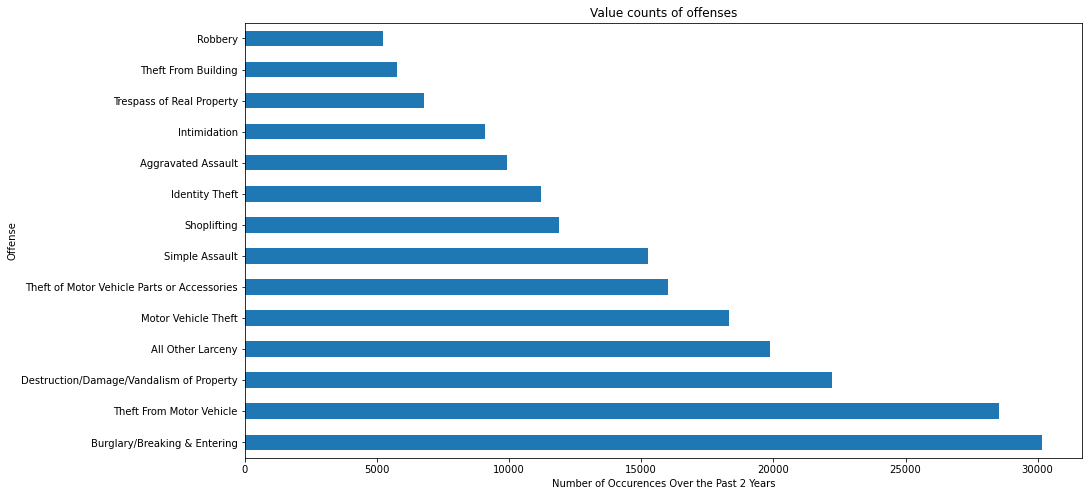

In [9]:
ax = df.value_counts('Offense').plot.barh(figsize = (15,8), title = "Value counts of offenses");
ax.set_xlabel("Number of Occurences Over the Past 2 Years");

We can see that there's an imbalance, so let's use SMOTE to address that

In [10]:
sm = SMOTE(random_state = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)

Now it's time to initialize our model

## Random Forest Model ##

In [11]:
rf = RandomForestClassifier(criterion= "entropy",random_state = 1,  max_depth = 5)

rf.fit(X_train, y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

In [12]:
print(classification_report(y_train, rf_train_pred))

C:\Users\aleja\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                             precision    recall  f1-score   support

                         Aggravated Assault       0.38      0.61      0.47     22703
                          All Other Larceny       0.00      0.00      0.00     22703
               Burglary/Breaking & Entering       0.19      0.14      0.16     22703
   Destruction/Damage/Vandalism of Property       0.20      0.00      0.00     22703
                             Identity Theft       0.26      0.85      0.39     22703
                               Intimidation       0.47      0.32      0.38     22703
                        Motor Vehicle Theft       0.22      0.06      0.09     22703
                                    Robbery       0.23      0.11      0.15     22703
                                Shoplifting       0.19      0.47      0.27     22703
                             Simple Assault       0.39      0.28      0.33     22703
                        Theft From Building       0.15      0.24

In [13]:
print(classification_report(y_test, rf_test_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.33      0.57      0.42      2493
                          All Other Larceny       0.00      0.00      0.00      4879
               Burglary/Breaking & Entering       0.30      0.13      0.18      7460
   Destruction/Damage/Vandalism of Property       0.20      0.00      0.00      5540
                             Identity Theft       0.18      0.86      0.29      2921
                               Intimidation       0.37      0.31      0.34      2250
                        Motor Vehicle Theft       0.22      0.06      0.10      4563
                                    Robbery       0.07      0.10      0.08      1319
                                Shoplifting       0.14      0.46      0.22      2975
                             Simple Assault       0.48      0.29      0.36      3790
                        Theft From Building       0.05      0.22

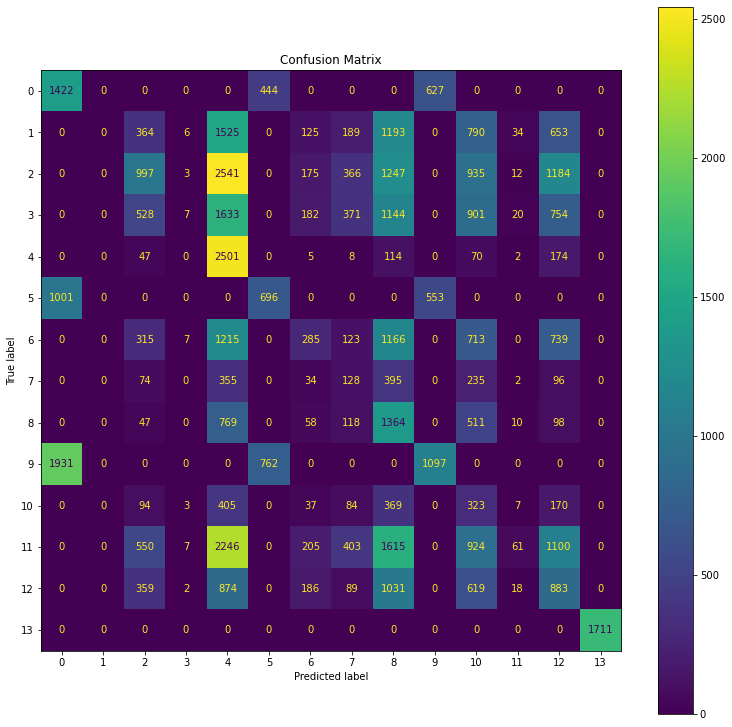

In [14]:
cm = confusion_matrix(y_test, rf_test_pred);
cmp = ConfusionMatrixDisplay(cm);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

### Crime Key ###

**To make our confusion matrix more readable, we represented the crimes as numeric values. Below is a key that matches the numeric value to the crime**

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Intimidation

5) Motor Vehicle Theft

6) Shoplifting

7) Simple Assault

8) Theft From Motor Vehicle

9) Theft of Motor Vehicle Parts or Accessories


### Classification Report ###

Let's take a look at our test model classification report results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .33, a recall score of .57, and an f1 score of .42. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 33% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 57% of them.
* There is an f1 score of .42, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .0, a recall score of .0, and an f1 score of .0. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 0% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 0% of them.
* There is an f1 score of 0, indicating the worst possible performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .30, a recall score of .13, and an f1 score of .18. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 30% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 13% of them.
* There is an f1 score of .18, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .20, a recall score of 0, and an f1 score of 0. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 20% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 0% of them.
* There is an f1 score of 0, indicating the worst possible performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .18, a recall score of .86, and an f1 score of .29. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 18% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 86% of them.
* There is an f1 score of .29, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .37, a recall score of .31, and an f1 score of .34. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 37% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 31% of them.
* There is an f1 score of .34, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .22, a recall score of .06, and an f1 score of .10. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 22% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 6% of them.
* There is an f1 score of .10, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .07, a recall score of .10, and an f1 score of .08. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 7% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 10% of them.
* There is an f1 score of .08, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .14, a recall score of .46, and an f1 score of .22. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 14% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 46% of them.
* There is an f1 score of .22, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .48, a recall score of .29, and an f1 score of .36. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 48% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 29% of them.
* There is an f1 score of .36, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .05, a recall score of .22, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 5% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 22% of them.
* There is an f1 score of .09, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .37, a recall score of .01, and an f1 score of .02. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 37% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 1% of them.
* There is an f1 score of .02, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .15, a recall score of .22, and an f1 score of .18. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 15% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 22% of them.
* There is an f1 score of .18, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 1422 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,071 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 2,932 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,851 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 0 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,879 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 0 crimes were wrongly predicted as being "All Other Larceny" crimes
* 47,686 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 997 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 6,463 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 2,378 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 43,091 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 7 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 5,533 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 28 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,525 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 2,501 crimes were correctly predicted as being "Identity Theft" crimes
* 420 crimes were wrongly predicted as not being "Identity Theft" crimes
* 11,563 crimes were wrongly predicted as being "Identity Theft" crimes
* 44,701 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 696 crimes were correctly predicted as being "Intimidation" crimes
* 1,554 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,206 crimes were wrongly predicted as being "Intimidation" crimes
* 50,554 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 285 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 4,278 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 1,007 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 49,056 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 128 crimes were correctly predicted as being "Robbery" crimes
* 1,191 crimes were wrongly predicted as not being "Robbery" crimes
* 1,751 crimes were wrongly predicted as being "Robbery" crimes
* 51,015 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting**

* 1,364 crimes were correctly predicted as being "Shoplifting" crimes
* 1,611 crimes were wrongly predicted as not being "Shoplifting" crimes
* 8,274 crimes were wrongly predicted as being "Shoplifting" crimes
* 47,567 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 1,097 crimes were correctly predicted as being "Simple Assault" crimes
* 2,693 crimes were wrongly predicted as not being "Simple Assault" crimes
* 1,180 crimes were wrongly predicted as being "Simple Assault" crimes
* 51,465 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 323 crimes were correctly predicted as being "Theft From Building" crimes
* 1,169 crimes were wrongly predicted as not being "Theft From Building" crimes
* 5,698 crimes were wrongly predicted as being "Theft From Building" crimes
* 50,519 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 61 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,050 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 105 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 51,383 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 883 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,178 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 4,968 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,679 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

## Random Forest Tuning ##

In [15]:
rf2 = RandomForestClassifier()

param_grid = {
    'criterion': ['entropy'],
    'random_state': [1],
    'max_depth': [1, 3, 5],
    'min_samples_split': [0.2, 0.3, 0.4 ],
    'min_samples_leaf': [0.1, 0.2, 0.3]
}


gs_rf = GridSearchCV(rf2, param_grid)
gs_rf.fit(X_train, y_train)
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.3,
 'random_state': 1}

In [16]:
rf2 = RandomForestClassifier(criterion= "entropy",random_state = 1,  max_depth = 3, min_samples_leaf = 0.1, min_samples_split = 0.3)

rf2.fit(X_train, y_train)
rf_train_pred2 = rf2.predict(X_train)
rf_test_pred2 = rf2.predict(X_test)

In [17]:
rf_train_pred2 = rf2.predict(X_train)
rf_test_pred2 = rf2.predict(X_test)

In [18]:
print(classification_report(y_train, rf_train_pred2))

C:\Users\aleja\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                             precision    recall  f1-score   support

                         Aggravated Assault       0.36      0.60      0.45     22703
                          All Other Larceny       0.00      0.00      0.00     22703
               Burglary/Breaking & Entering       0.15      0.20      0.17     22703
   Destruction/Damage/Vandalism of Property       0.00      0.00      0.00     22703
                             Identity Theft       0.22      0.85      0.35     22703
                               Intimidation       0.39      0.30      0.34     22703
                        Motor Vehicle Theft       0.16      0.07      0.10     22703
                                    Robbery       0.13      0.06      0.08     22703
                                Shoplifting       0.17      0.44      0.25     22703
                             Simple Assault       0.36      0.21      0.27     22703
                        Theft From Building       0.16      0.12

In [19]:
print(classification_report(y_test, rf_test_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.31      0.58      0.41      2493
                          All Other Larceny       0.00      0.00      0.00      4879
               Burglary/Breaking & Entering       0.24      0.19      0.22      7460
   Destruction/Damage/Vandalism of Property       0.00      0.00      0.00      5540
                             Identity Theft       0.17      0.85      0.28      2921
                               Intimidation       0.30      0.29      0.29      2250
                        Motor Vehicle Theft       0.17      0.07      0.10      4563
                                    Robbery       0.04      0.06      0.05      1319
                                Shoplifting       0.13      0.44      0.20      2975
                             Simple Assault       0.47      0.21      0.29      3790
                        Theft From Building       0.06      0.11

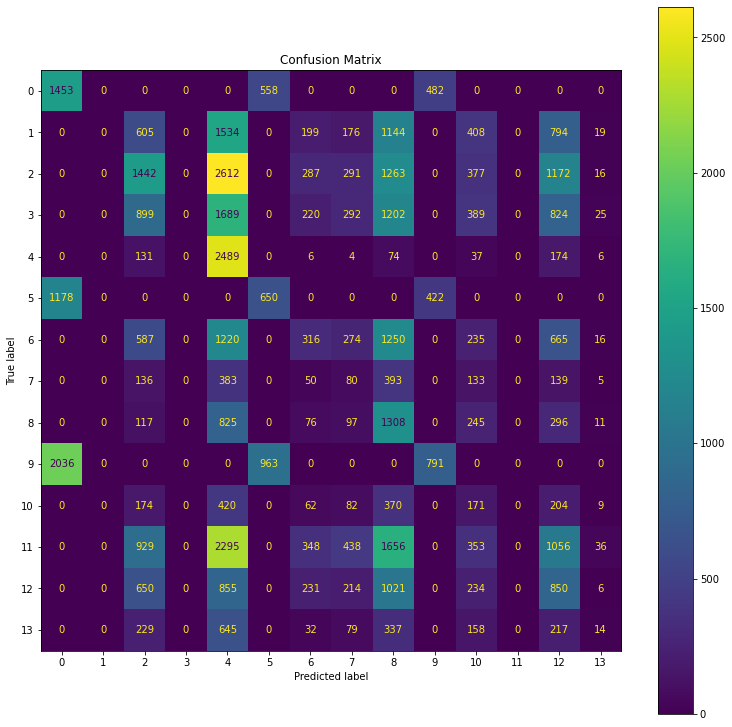

In [20]:
cm2 = confusion_matrix(y_test, rf_test_pred2);
cmp2 = ConfusionMatrixDisplay(cm2);
fig, ax = plt.subplots(figsize=(13,13));
cmp2.plot(ax=ax);
cmp2.ax_.set_title("Confusion Matrix");

### Crime Key ###

**To make our confusion matrix more readable, we represented the crimes as numeric values. Below is a key that matches the numeric value to the crime**

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Intimidation

5) Motor Vehicle Theft

6) Shoplifting

7) Simple Assault

8) Theft From Motor Vehicle

9) Theft of Motor Vehicle Parts or Accessories


### Classification Report ###

Let's take a look at our test model classification report results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .31, a recall score of .58, and an f1 score of .41. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 31% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 58% of them.
* There is an f1 score of .41, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of 0, a recall score of 0, and an f1 score of 0. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 0% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 0% of them.
* There is an f1 score of 0, indicating the worst possible performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .24, a recall score of .19, and an f1 score of .22. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 24% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 19% of them.
* There is an f1 score of .22, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of 0, a recall score of 0, and an f1 score of 0. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 0% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 0% of them.
* There is an f1 score of 0, indicating worst possible performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .17, a recall score of .85, and an f1 score of .28. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 17% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 85% of them.
* There is an f1 score of .28, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .30, a recall score of .29, and an f1 score of .29. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 30% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 29% of them.
* There is an f1 score of .29, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .17, a recall score of .07, and an f1 score of .10. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 17% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 7% of them.
* There is an f1 score of .10, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .04, a recall score of .06, and an f1 score of .05. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 4% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 6% of them.
* There is an f1 score of .05, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .13, a recall score of .44, and an f1 score of .20. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 13% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 44% of them.
* There is an f1 score of .20, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .47, a recall score of .21, and an f1 score of .29. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 47% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 21% of them.
* There is an f1 score of .29, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .06, a recall score of .11, and an f1 score of .08. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 6% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 11% of them.
* There is an f1 score of .08, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of 0, a recall score of 0, and an f1 score of 0. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 0% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 0% of them.
* There is an f1 score of .0, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .13, a recall score of .21, and an f1 score of .16. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 13% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 21% of them.
* There is an f1 score of .16, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of .09, a recall score of .01, and an f1 score of 0.1. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 9% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 1% of them.
* There is an f1 score of 0.1, indicating poor performance on predicting probability of the crime being a Trespass of Real Property crime.

### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 1,453 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,040 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 3,214 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 46,858 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 0 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,879 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 0 crimes were wrongly predicted as being "All Other Larceny" crimes
* 47,686 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 1,442 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 6,018 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 4,457 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 41,253 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 0 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 5,540 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 0 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,924 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 2,489 crimes were correctly predicted as being "Identity Theft" crimes
* 432 crimes were wrongly predicted as not being "Identity Theft" crimes
* 12,478 crimes were wrongly predicted as being "Identity Theft" crimes
* 43,132 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 650 crimes were correctly predicted as being "Intimidation" crimes
* 1,600 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,521 crimes were wrongly predicted as being "Intimidation" crimes
* 50,530 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 316 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 4,247 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 1,511 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 49,010 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 80 crimes were correctly predicted as being "Robbery" crimes
* 1,239 crimes were wrongly predicted as not being "Robbery" crimes
* 1,947 crimes were wrongly predicted as being "Robbery" crimes
* 50,905 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting**

* 1,308 crimes were correctly predicted as being "Shoplifting" crimes
* 1,611 crimes were wrongly predicted as not being "Shoplifting" crimes
* 8,274 crimes were wrongly predicted as being "Shoplifting" crimes
* 66,801 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 791 crimes were correctly predicted as being "Simple Assault" crimes
* 2,999 crimes were wrongly predicted as not being "Simple Assault" crimes
* 904 crimes were wrongly predicted as being "Simple Assault" crimes
* 51,771 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 171 crimes were correctly predicted as being "Theft From Building" crimes
* 1,312 crimes were wrongly predicted as not being "Theft From Building" crimes
* 2,569 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,433 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 0 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,111 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 0 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 51,470 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 850 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,211 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 5,541 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,489 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 14 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 1,697 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 149 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,854 crimes were correctly predicted as not being "Trespass of Real Property" crimes

## CatBoost Model ##

In [21]:
CBC = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
)

In [22]:
CBC.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.106154
0:	learn: 2.4152795	total: 346ms	remaining: 5m 45s
1:	learn: 2.2999611	total: 545ms	remaining: 4m 31s
2:	learn: 2.2194601	total: 742ms	remaining: 4m 6s
3:	learn: 2.1546015	total: 946ms	remaining: 3m 55s
4:	learn: 2.1023865	total: 1.14s	remaining: 3m 46s
5:	learn: 2.0583486	total: 1.34s	remaining: 3m 41s
6:	learn: 2.0212087	total: 1.54s	remaining: 3m 38s
7:	learn: 1.9898034	total: 1.74s	remaining: 3m 35s
8:	learn: 1.9629609	total: 1.93s	remaining: 3m 32s
9:	learn: 1.9385266	total: 2.12s	remaining: 3m 29s
10:	learn: 1.9170486	total: 2.31s	remaining: 3m 27s
11:	learn: 1.8977704	total: 2.49s	remaining: 3m 25s
12:	learn: 1.8810050	total: 2.68s	remaining: 3m 23s
13:	learn: 1.8659622	total: 2.87s	remaining: 3m 22s
14:	learn: 1.8528057	total: 3.06s	remaining: 3m 20s
15:	learn: 1.8413095	total: 3.25s	remaining: 3m 19s
16:	learn: 1.8304887	total: 3.44s	remaining: 3m 18s
17:	learn: 1.8207193	total: 3.62s	remaining: 3m 17s
18:	learn: 1.8118833	total: 3.81s	remaining: 

158:	learn: 1.6251733	total: 30.3s	remaining: 2m 40s
159:	learn: 1.6246682	total: 30.5s	remaining: 2m 40s
160:	learn: 1.6240814	total: 30.7s	remaining: 2m 40s
161:	learn: 1.6234912	total: 30.9s	remaining: 2m 39s
162:	learn: 1.6227072	total: 31.1s	remaining: 2m 39s
163:	learn: 1.6221519	total: 31.3s	remaining: 2m 39s
164:	learn: 1.6218260	total: 31.5s	remaining: 2m 39s
165:	learn: 1.6211820	total: 31.7s	remaining: 2m 39s
166:	learn: 1.6204335	total: 31.9s	remaining: 2m 39s
167:	learn: 1.6199455	total: 32.1s	remaining: 2m 39s
168:	learn: 1.6193922	total: 32.3s	remaining: 2m 38s
169:	learn: 1.6187407	total: 32.5s	remaining: 2m 38s
170:	learn: 1.6180585	total: 32.7s	remaining: 2m 38s
171:	learn: 1.6176398	total: 32.9s	remaining: 2m 38s
172:	learn: 1.6170568	total: 33.1s	remaining: 2m 38s
173:	learn: 1.6165132	total: 33.3s	remaining: 2m 37s
174:	learn: 1.6159495	total: 33.5s	remaining: 2m 37s
175:	learn: 1.6153028	total: 33.7s	remaining: 2m 37s
176:	learn: 1.6146298	total: 33.9s	remaining: 

314:	learn: 1.5649341	total: 1m	remaining: 2m 12s
315:	learn: 1.5647062	total: 1m	remaining: 2m 11s
316:	learn: 1.5645829	total: 1m 1s	remaining: 2m 11s
317:	learn: 1.5642024	total: 1m 1s	remaining: 2m 11s
318:	learn: 1.5640665	total: 1m 1s	remaining: 2m 11s
319:	learn: 1.5637100	total: 1m 1s	remaining: 2m 11s
320:	learn: 1.5633905	total: 1m 1s	remaining: 2m 10s
321:	learn: 1.5631116	total: 1m 2s	remaining: 2m 10s
322:	learn: 1.5627410	total: 1m 2s	remaining: 2m 10s
323:	learn: 1.5624283	total: 1m 2s	remaining: 2m 10s
324:	learn: 1.5621756	total: 1m 2s	remaining: 2m 10s
325:	learn: 1.5618323	total: 1m 2s	remaining: 2m 9s
326:	learn: 1.5616583	total: 1m 2s	remaining: 2m 9s
327:	learn: 1.5613896	total: 1m 3s	remaining: 2m 9s
328:	learn: 1.5609458	total: 1m 3s	remaining: 2m 9s
329:	learn: 1.5606630	total: 1m 3s	remaining: 2m 9s
330:	learn: 1.5603782	total: 1m 3s	remaining: 2m 8s
331:	learn: 1.5601729	total: 1m 3s	remaining: 2m 8s
332:	learn: 1.5598859	total: 1m 4s	remaining: 2m 8s
333:	le

468:	learn: 1.5303809	total: 1m 29s	remaining: 1m 41s
469:	learn: 1.5302180	total: 1m 30s	remaining: 1m 41s
470:	learn: 1.5299901	total: 1m 30s	remaining: 1m 41s
471:	learn: 1.5297455	total: 1m 30s	remaining: 1m 41s
472:	learn: 1.5295825	total: 1m 30s	remaining: 1m 41s
473:	learn: 1.5294413	total: 1m 30s	remaining: 1m 40s
474:	learn: 1.5292287	total: 1m 31s	remaining: 1m 40s
475:	learn: 1.5289551	total: 1m 31s	remaining: 1m 40s
476:	learn: 1.5286701	total: 1m 31s	remaining: 1m 40s
477:	learn: 1.5285735	total: 1m 31s	remaining: 1m 40s
478:	learn: 1.5283585	total: 1m 31s	remaining: 1m 39s
479:	learn: 1.5281016	total: 1m 32s	remaining: 1m 39s
480:	learn: 1.5279492	total: 1m 32s	remaining: 1m 39s
481:	learn: 1.5278739	total: 1m 32s	remaining: 1m 39s
482:	learn: 1.5277657	total: 1m 32s	remaining: 1m 39s
483:	learn: 1.5276349	total: 1m 32s	remaining: 1m 38s
484:	learn: 1.5274693	total: 1m 33s	remaining: 1m 38s
485:	learn: 1.5272937	total: 1m 33s	remaining: 1m 38s
486:	learn: 1.5271195	total:

620:	learn: 1.5061325	total: 1m 59s	remaining: 1m 12s
621:	learn: 1.5060006	total: 1m 59s	remaining: 1m 12s
622:	learn: 1.5058894	total: 1m 59s	remaining: 1m 12s
623:	learn: 1.5057118	total: 1m 59s	remaining: 1m 12s
624:	learn: 1.5056597	total: 1m 59s	remaining: 1m 11s
625:	learn: 1.5055096	total: 1m 59s	remaining: 1m 11s
626:	learn: 1.5053330	total: 2m	remaining: 1m 11s
627:	learn: 1.5051102	total: 2m	remaining: 1m 11s
628:	learn: 1.5049670	total: 2m	remaining: 1m 11s
629:	learn: 1.5048555	total: 2m	remaining: 1m 10s
630:	learn: 1.5047674	total: 2m	remaining: 1m 10s
631:	learn: 1.5045301	total: 2m 1s	remaining: 1m 10s
632:	learn: 1.5044772	total: 2m 1s	remaining: 1m 10s
633:	learn: 1.5043542	total: 2m 1s	remaining: 1m 10s
634:	learn: 1.5042600	total: 2m 1s	remaining: 1m 9s
635:	learn: 1.5040910	total: 2m 1s	remaining: 1m 9s
636:	learn: 1.5039614	total: 2m 2s	remaining: 1m 9s
637:	learn: 1.5037723	total: 2m 2s	remaining: 1m 9s
638:	learn: 1.5036974	total: 2m 2s	remaining: 1m 9s
639:	le

777:	learn: 1.4853740	total: 2m 29s	remaining: 42.6s
778:	learn: 1.4852877	total: 2m 29s	remaining: 42.4s
779:	learn: 1.4851963	total: 2m 29s	remaining: 42.2s
780:	learn: 1.4849726	total: 2m 29s	remaining: 42s
781:	learn: 1.4849048	total: 2m 29s	remaining: 41.8s
782:	learn: 1.4848062	total: 2m 30s	remaining: 41.6s
783:	learn: 1.4847028	total: 2m 30s	remaining: 41.4s
784:	learn: 1.4846536	total: 2m 30s	remaining: 41.2s
785:	learn: 1.4843678	total: 2m 30s	remaining: 41s
786:	learn: 1.4842474	total: 2m 30s	remaining: 40.8s
787:	learn: 1.4841990	total: 2m 31s	remaining: 40.6s
788:	learn: 1.4840352	total: 2m 31s	remaining: 40.4s
789:	learn: 1.4838728	total: 2m 31s	remaining: 40.3s
790:	learn: 1.4837988	total: 2m 31s	remaining: 40.1s
791:	learn: 1.4836912	total: 2m 31s	remaining: 39.9s
792:	learn: 1.4835674	total: 2m 32s	remaining: 39.7s
793:	learn: 1.4834131	total: 2m 32s	remaining: 39.5s
794:	learn: 1.4832386	total: 2m 32s	remaining: 39.3s
795:	learn: 1.4831564	total: 2m 32s	remaining: 39.

934:	learn: 1.4688580	total: 2m 59s	remaining: 12.5s
935:	learn: 1.4688009	total: 2m 59s	remaining: 12.3s
936:	learn: 1.4687425	total: 2m 59s	remaining: 12.1s
937:	learn: 1.4686443	total: 3m	remaining: 11.9s
938:	learn: 1.4685779	total: 3m	remaining: 11.7s
939:	learn: 1.4685203	total: 3m	remaining: 11.5s
940:	learn: 1.4683926	total: 3m	remaining: 11.3s
941:	learn: 1.4682419	total: 3m	remaining: 11.1s
942:	learn: 1.4681218	total: 3m 1s	remaining: 10.9s
943:	learn: 1.4680295	total: 3m 1s	remaining: 10.8s
944:	learn: 1.4679649	total: 3m 1s	remaining: 10.6s
945:	learn: 1.4678936	total: 3m 1s	remaining: 10.4s
946:	learn: 1.4678353	total: 3m 1s	remaining: 10.2s
947:	learn: 1.4677239	total: 3m 2s	remaining: 9.99s
948:	learn: 1.4676501	total: 3m 2s	remaining: 9.79s
949:	learn: 1.4675029	total: 3m 2s	remaining: 9.6s
950:	learn: 1.4672623	total: 3m 2s	remaining: 9.41s
951:	learn: 1.4671748	total: 3m 2s	remaining: 9.22s
952:	learn: 1.4670202	total: 3m 3s	remaining: 9.03s
953:	learn: 1.4669491	tot

In [23]:
CBC_train_pred = CBC.predict(X_train)
CBC_test_pred = CBC.predict(X_test)

In [24]:
print(classification_report(y_train, CBC_train_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.54      0.50      0.52     22703
                          All Other Larceny       0.27      0.13      0.17     22703
               Burglary/Breaking & Entering       0.31      0.35      0.33     22703
   Destruction/Damage/Vandalism of Property       0.28      0.13      0.18     22703
                             Identity Theft       0.51      0.76      0.61     22703
                               Intimidation       0.55      0.58      0.56     22703
                        Motor Vehicle Theft       0.31      0.28      0.29     22703
                                    Robbery       0.44      0.49      0.46     22703
                                Shoplifting       0.43      0.66      0.52     22703
                             Simple Assault       0.52      0.53      0.52     22703
                        Theft From Building       0.40      0.45

In [25]:
print(classification_report(y_test, CBC_test_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.36      0.28      0.32      2493
                          All Other Larceny       0.20      0.10      0.14      4879
               Burglary/Breaking & Entering       0.32      0.33      0.32      7460
   Destruction/Damage/Vandalism of Property       0.22      0.10      0.14      5540
                             Identity Theft       0.36      0.73      0.48      2921
                               Intimidation       0.35      0.32      0.33      2250
                        Motor Vehicle Theft       0.24      0.29      0.26      4563
                                    Robbery       0.12      0.08      0.10      1319
                                Shoplifting       0.32      0.62      0.42      2975
                             Simple Assault       0.47      0.56      0.51      3790
                        Theft From Building       0.09      0.09

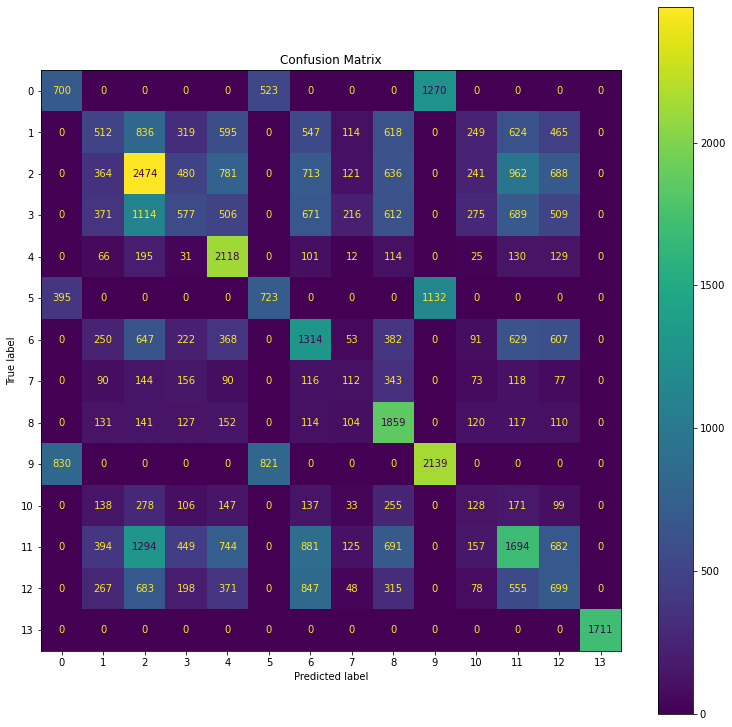

In [26]:
cm = confusion_matrix(y_test, CBC_test_pred);
cmp = ConfusionMatrixDisplay(cm);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

### Crime Key ###

**To make our confusion matrix more readable, we represented the crimes as numeric values. Below is a key that matches the numeric value to the crime**

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Identity Theft

5) Intimidation

6) Motor Vehicle Theft

7) Robbery

8) Shoplifting

9) Simple Assault

10) Theft From Building

11) Theft From Motor Vehicle

12) Theft of Motor Vehicle Parts or Accessories

13) Trespass of Real Property 

### Classification Report ###

Let's take a look at our test model classification report results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .36, a recall score of .28, and an f1 score of .32. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 36% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 28% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .20, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 20% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .32, a recall score of .33, and an f1 score of .32. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 32% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 33% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .22, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 22% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .36, a recall score of .73, and an f1 score of .48. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 36% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 73% of them.
* There is an f1 score of .48, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .35, a recall score of .32, and an f1 score of .33. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 35% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 32% of them.
* There is an f1 score of .33, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .24, a recall score of .29, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 24% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 29% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .12, a recall score of .08, and an f1 score of .10. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 12% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .10, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .32, a recall score of .62, and an f1 score of .42. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 32% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 62% of them.
* There is an f1 score of .42, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .47, a recall score of .56, and an f1 score of .51. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 47% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 56% of them.
* There is an f1 score of .51, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .09, a recall score of .09, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 9% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 9% of them.
* There is an f1 score of .09, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .30, a recall score of .24, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 30% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 24% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .17, a recall score of .17, and an f1 score of .17. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 17% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 700 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,793 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,225 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,252 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 512 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,367 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,071 crimes were wrongly predicted as being "All Other Larceny" crimes
* 44,863 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,474 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 4,986 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,332 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 40,973 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 577 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,963 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,088 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,221 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 2,118 crimes were correctly predicted as being "Identity Theft" crimes
* 803 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,754 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,064 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 723 crimes were correctly predicted as being "Intimidation" crimes
* 1,527 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,344 crimes were wrongly predicted as being "Intimidation" crimes
* 49,889 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,314 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,249 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 4,127 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,531 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 112 crimes were correctly predicted as being "Robbery" crimes
* 1,207 crimes were wrongly predicted as not being "Robbery" crimes
* 826 crimes were wrongly predicted as being "Robbery" crimes
* 51,532 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting**

* 1,859 crimes were correctly predicted as being "Shoplifting" crimes
* 1,116 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,966 crimes were wrongly predicted as being "Shoplifting" crimes
* 49,098 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 2,139 crimes were correctly predicted as being "Simple Assault" crimes
* 1,651 crimes were wrongly predicted as not being "Simple Assault" crimes
* 3,409 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,423 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 128 crimes were correctly predicted as being "Theft From Building" crimes
* 1,364 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,309 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,929 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,694 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,111 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 3,995 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,631 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 699 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,362 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,366 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,863 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

In [27]:
params = {'learning_rate': [0.05, 0.1, 0.5],
          'loss_function': ['MultiClass'],
          'task_type': ['GPU'],
          'random_state' : [1],
          'depth': [2, 4, 6],
          'iterations': [100, 500, 1000]
         }

In [28]:
CBC_gs = GridSearchCV(CBC, params)
CBC_gs.fit(X_train, y_train, early_stopping_rounds=5, plot = True)
CBC_gs.best_params_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419844	total: 13.1ms	remaining: 1.3s
1:	learn: 2.4762514	total: 25ms	remaining: 1.22s
2:	learn: 2.4237441	total: 36.8ms	remaining: 1.19s
3:	learn: 2.3795726	total: 48.6ms	remaining: 1.17s
4:	learn: 2.3414035	total: 60.3ms	remaining: 1.15s
5:	learn: 2.3078013	total: 72ms	remaining: 1.13s
6:	learn: 2.2778569	total: 83.5ms	remaining: 1.11s
7:	learn: 2.2509267	total: 94.2ms	remaining: 1.08s
8:	learn: 2.2265149	total: 105ms	remaining: 1.06s
9:	learn: 2.2043153	total: 116ms	remaining: 1.04s
10:	learn: 2.1839448	total: 126ms	remaining: 1.02s
11:	learn: 2.1652505	total: 137ms	remaining: 1s
12:	learn: 2.1480046	total: 148ms	remaining: 989ms
13:	learn: 2.1320227	total: 158ms	remaining: 973ms
14:	learn: 2.1172350	total: 169ms	remaining: 958ms
15:	learn: 2.1034803	total: 180ms	remaining: 943ms
16:	learn: 2.0906594	total: 190ms	remaining: 929ms
17:	learn: 2.0787237	total: 201ms	remaining: 917ms
18:	learn: 2.0675539	total: 212ms	remaining: 904ms
19:	learn: 2.0571035	total: 223ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419859	total: 12ms	remaining: 1.18s
1:	learn: 2.4762576	total: 22.8ms	remaining: 1.11s
2:	learn: 2.4237358	total: 33.6ms	remaining: 1.09s
3:	learn: 2.3795674	total: 44.4ms	remaining: 1.06s
4:	learn: 2.3413909	total: 55.2ms	remaining: 1.05s
5:	learn: 2.3077991	total: 66.1ms	remaining: 1.04s
6:	learn: 2.2778537	total: 76.9ms	remaining: 1.02s
7:	learn: 2.2509244	total: 87.5ms	remaining: 1.01s
8:	learn: 2.2265174	total: 98.4ms	remaining: 995ms
9:	learn: 2.2043126	total: 109ms	remaining: 983ms
10:	learn: 2.1839418	total: 120ms	remaining: 972ms
11:	learn: 2.1652518	total: 131ms	remaining: 961ms
12:	learn: 2.1479991	total: 142ms	remaining: 951ms
13:	learn: 2.1320212	total: 153ms	remaining: 940ms
14:	learn: 2.1172271	total: 164ms	remaining: 929ms
15:	learn: 2.1034693	total: 175ms	remaining: 919ms
16:	learn: 2.0906570	total: 186ms	remaining: 908ms
17:	learn: 2.0787215	total: 197ms	remaining: 896ms
18:	learn: 2.0675514	total: 208ms	remaining: 885ms
19:	learn: 2.0571039	total: 219ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419884	total: 11.8ms	remaining: 1.17s
1:	learn: 2.4762643	total: 22.7ms	remaining: 1.11s
2:	learn: 2.4237410	total: 33.5ms	remaining: 1.08s
3:	learn: 2.3795753	total: 44.3ms	remaining: 1.06s
4:	learn: 2.3413940	total: 55.2ms	remaining: 1.05s
5:	learn: 2.3077917	total: 66.1ms	remaining: 1.03s
6:	learn: 2.2778548	total: 76.9ms	remaining: 1.02s
7:	learn: 2.2509154	total: 87.7ms	remaining: 1.01s
8:	learn: 2.2265216	total: 98.6ms	remaining: 997ms
9:	learn: 2.2043303	total: 109ms	remaining: 985ms
10:	learn: 2.1839467	total: 120ms	remaining: 973ms
11:	learn: 2.1652460	total: 131ms	remaining: 962ms
12:	learn: 2.1480037	total: 142ms	remaining: 951ms
13:	learn: 2.1320178	total: 153ms	remaining: 939ms
14:	learn: 2.1172227	total: 164ms	remaining: 929ms
15:	learn: 2.1034706	total: 175ms	remaining: 918ms
16:	learn: 2.0906613	total: 186ms	remaining: 908ms
17:	learn: 2.0787261	total: 197ms	remaining: 899ms
18:	learn: 2.0675760	total: 209ms	remaining: 890ms
19:	learn: 2.0571258	total: 220m

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419926	total: 12ms	remaining: 1.19s
1:	learn: 2.4762685	total: 22.9ms	remaining: 1.12s
2:	learn: 2.4237447	total: 33.8ms	remaining: 1.09s
3:	learn: 2.3795782	total: 44.7ms	remaining: 1.07s
4:	learn: 2.3413953	total: 55.7ms	remaining: 1.06s
5:	learn: 2.3078053	total: 66.6ms	remaining: 1.04s
6:	learn: 2.2778565	total: 77.6ms	remaining: 1.03s
7:	learn: 2.2509227	total: 88.5ms	remaining: 1.02s
8:	learn: 2.2265251	total: 99.6ms	remaining: 1.01s
9:	learn: 2.2043273	total: 110ms	remaining: 994ms
10:	learn: 2.1839504	total: 121ms	remaining: 981ms
11:	learn: 2.1652580	total: 132ms	remaining: 968ms
12:	learn: 2.1480047	total: 143ms	remaining: 956ms
13:	learn: 2.1320323	total: 154ms	remaining: 944ms
14:	learn: 2.1172286	total: 164ms	remaining: 932ms
15:	learn: 2.1034730	total: 175ms	remaining: 920ms
16:	learn: 2.0906647	total: 186ms	remaining: 909ms
17:	learn: 2.0787273	total: 197ms	remaining: 898ms
18:	learn: 2.0675735	total: 208ms	remaining: 888ms
19:	learn: 2.0571302	total: 219ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419936	total: 11.9ms	remaining: 1.18s
1:	learn: 2.4762635	total: 22.8ms	remaining: 1.12s
2:	learn: 2.4237493	total: 33.8ms	remaining: 1.09s
3:	learn: 2.3795777	total: 44.7ms	remaining: 1.07s
4:	learn: 2.3413977	total: 55.6ms	remaining: 1.05s
5:	learn: 2.3077957	total: 66.5ms	remaining: 1.04s
6:	learn: 2.2778528	total: 77.2ms	remaining: 1.02s
7:	learn: 2.2509235	total: 88ms	remaining: 1.01s
8:	learn: 2.2265224	total: 98.9ms	remaining: 1s
9:	learn: 2.2043106	total: 110ms	remaining: 989ms
10:	learn: 2.1839472	total: 121ms	remaining: 977ms
11:	learn: 2.1652482	total: 132ms	remaining: 965ms
12:	learn: 2.1479995	total: 142ms	remaining: 953ms
13:	learn: 2.1320242	total: 153ms	remaining: 942ms
14:	learn: 2.1172318	total: 164ms	remaining: 930ms
15:	learn: 2.1034802	total: 175ms	remaining: 918ms
16:	learn: 2.0906601	total: 186ms	remaining: 906ms
17:	learn: 2.0787222	total: 197ms	remaining: 895ms
18:	learn: 2.0675551	total: 207ms	remaining: 885ms
19:	learn: 2.0571097	total: 218ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 11.9ms	remaining: 1.18s
1:	learn: 2.3598895	total: 22.8ms	remaining: 1.12s
2:	learn: 2.2913397	total: 33.5ms	remaining: 1.08s
3:	learn: 2.2369277	total: 44.3ms	remaining: 1.06s
4:	learn: 2.1922569	total: 54.9ms	remaining: 1.04s
5:	learn: 2.1547724	total: 65.7ms	remaining: 1.03s
6:	learn: 2.1228984	total: 76.4ms	remaining: 1.01s
7:	learn: 2.0954139	total: 87.3ms	remaining: 1s
8:	learn: 2.0716174	total: 98.1ms	remaining: 992ms
9:	learn: 2.0508297	total: 109ms	remaining: 980ms
10:	learn: 2.0271504	total: 120ms	remaining: 969ms
11:	learn: 2.0081887	total: 131ms	remaining: 959ms
12:	learn: 1.9930108	total: 141ms	remaining: 946ms
13:	learn: 1.9817104	total: 152ms	remaining: 934ms
14:	learn: 1.9679394	total: 163ms	remaining: 924ms
15:	learn: 1.9588124	total: 174ms	remaining: 912ms
16:	learn: 1.9460533	total: 185ms	remaining: 902ms
17:	learn: 1.9355642	total: 195ms	remaining: 889ms
18:	learn: 1.9294893	total: 206ms	remaining: 879ms
19:	learn: 1.9230229	total: 217ms	r

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519402	total: 12.1ms	remaining: 1.2s
1:	learn: 2.3598792	total: 22.9ms	remaining: 1.12s
2:	learn: 2.2913389	total: 33.8ms	remaining: 1.09s
3:	learn: 2.2369233	total: 44.7ms	remaining: 1.07s
4:	learn: 2.1922464	total: 55.6ms	remaining: 1.06s
5:	learn: 2.1547680	total: 66.5ms	remaining: 1.04s
6:	learn: 2.1228947	total: 77.5ms	remaining: 1.03s
7:	learn: 2.0954130	total: 88.4ms	remaining: 1.02s
8:	learn: 2.0716164	total: 99.2ms	remaining: 1s
9:	learn: 2.0508225	total: 110ms	remaining: 990ms
10:	learn: 2.0270752	total: 121ms	remaining: 980ms
11:	learn: 2.0104777	total: 132ms	remaining: 966ms
12:	learn: 1.9988608	total: 143ms	remaining: 954ms
13:	learn: 1.9820011	total: 154ms	remaining: 944ms
14:	learn: 1.9669209	total: 165ms	remaining: 933ms
15:	learn: 1.9591943	total: 175ms	remaining: 921ms
16:	learn: 1.9464717	total: 186ms	remaining: 910ms
17:	learn: 1.9359811	total: 197ms	remaining: 898ms
18:	learn: 1.9264027	total: 208ms	remaining: 887ms
19:	learn: 1.9200553	total: 219ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519377	total: 12ms	remaining: 1.19s
1:	learn: 2.3598852	total: 22.9ms	remaining: 1.12s
2:	learn: 2.2913316	total: 33.7ms	remaining: 1.09s
3:	learn: 2.2369270	total: 44.5ms	remaining: 1.07s
4:	learn: 2.1922606	total: 55.4ms	remaining: 1.05s
5:	learn: 2.1547796	total: 66.2ms	remaining: 1.04s
6:	learn: 2.1228896	total: 77.1ms	remaining: 1.02s
7:	learn: 2.0954111	total: 88.1ms	remaining: 1.01s
8:	learn: 2.0716292	total: 99.1ms	remaining: 1s
9:	learn: 2.0508355	total: 110ms	remaining: 989ms
10:	learn: 2.0271105	total: 121ms	remaining: 979ms
11:	learn: 2.0105113	total: 132ms	remaining: 966ms
12:	learn: 1.9924271	total: 143ms	remaining: 956ms
13:	learn: 1.9822251	total: 154ms	remaining: 943ms
14:	learn: 1.9684885	total: 164ms	remaining: 932ms
15:	learn: 1.9593067	total: 175ms	remaining: 920ms
16:	learn: 1.9465944	total: 186ms	remaining: 909ms
17:	learn: 1.9361021	total: 197ms	remaining: 896ms
18:	learn: 1.9296535	total: 208ms	remaining: 886ms
19:	learn: 1.9202074	total: 219ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 12.3ms	remaining: 1.21s
1:	learn: 2.3598864	total: 23.5ms	remaining: 1.15s
2:	learn: 2.2913452	total: 34.3ms	remaining: 1.11s
3:	learn: 2.2369309	total: 45.1ms	remaining: 1.08s
4:	learn: 2.1922601	total: 56ms	remaining: 1.06s
5:	learn: 2.1547794	total: 66.8ms	remaining: 1.05s
6:	learn: 2.1229024	total: 77.7ms	remaining: 1.03s
7:	learn: 2.0954266	total: 88.5ms	remaining: 1.02s
8:	learn: 2.0716272	total: 99.4ms	remaining: 1s
9:	learn: 2.0508480	total: 110ms	remaining: 993ms
10:	learn: 2.0271347	total: 121ms	remaining: 982ms
11:	learn: 2.0105356	total: 132ms	remaining: 969ms
12:	learn: 1.9924692	total: 143ms	remaining: 958ms
13:	learn: 1.9823054	total: 154ms	remaining: 946ms
14:	learn: 1.9673154	total: 165ms	remaining: 935ms
15:	learn: 1.9591126	total: 176ms	remaining: 923ms
16:	learn: 1.9467489	total: 187ms	remaining: 911ms
17:	learn: 1.9362572	total: 197ms	remaining: 900ms
18:	learn: 1.9302153	total: 209ms	remaining: 889ms
19:	learn: 1.9237625	total: 219ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519369	total: 12ms	remaining: 1.19s
1:	learn: 2.3598854	total: 22.9ms	remaining: 1.12s
2:	learn: 2.2913371	total: 33.7ms	remaining: 1.09s
3:	learn: 2.2369275	total: 44.4ms	remaining: 1.07s
4:	learn: 2.1922648	total: 55.1ms	remaining: 1.05s
5:	learn: 2.1547779	total: 66ms	remaining: 1.03s
6:	learn: 2.1228920	total: 76.9ms	remaining: 1.02s
7:	learn: 2.0954177	total: 87.7ms	remaining: 1.01s
8:	learn: 2.0716157	total: 98.6ms	remaining: 997ms
9:	learn: 2.0508376	total: 109ms	remaining: 984ms
10:	learn: 2.0270725	total: 120ms	remaining: 974ms
11:	learn: 2.0104720	total: 131ms	remaining: 961ms
12:	learn: 1.9988462	total: 142ms	remaining: 950ms
13:	learn: 1.9821266	total: 153ms	remaining: 940ms
14:	learn: 1.9670318	total: 164ms	remaining: 930ms
15:	learn: 1.9588435	total: 175ms	remaining: 920ms
16:	learn: 1.9465869	total: 186ms	remaining: 910ms
17:	learn: 1.9360987	total: 197ms	remaining: 898ms
18:	learn: 1.9296689	total: 208ms	remaining: 888ms
19:	learn: 1.9202301	total: 219ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 11.9ms	remaining: 1.18s
1:	learn: 1.9520626	total: 23.1ms	remaining: 1.13s
2:	learn: 1.8880726	total: 34ms	remaining: 1.1s
3:	learn: 1.8521886	total: 45ms	remaining: 1.08s
4:	learn: 1.8356852	total: 56.1ms	remaining: 1.06s
5:	learn: 1.8255545	total: 66.9ms	remaining: 1.05s
6:	learn: 1.8101048	total: 77.7ms	remaining: 1.03s
7:	learn: 1.8011887	total: 88.7ms	remaining: 1.02s
8:	learn: 1.7935489	total: 99.9ms	remaining: 1.01s
9:	learn: 1.7872375	total: 111ms	remaining: 999ms
10:	learn: 1.7818157	total: 122ms	remaining: 983ms
11:	learn: 1.7774933	total: 132ms	remaining: 971ms
12:	learn: 1.7720439	total: 144ms	remaining: 962ms
13:	learn: 1.7672707	total: 155ms	remaining: 950ms
14:	learn: 1.7647359	total: 166ms	remaining: 938ms
15:	learn: 1.7584613	total: 176ms	remaining: 926ms
16:	learn: 1.7548140	total: 188ms	remaining: 916ms
17:	learn: 1.7523383	total: 199ms	remaining: 905ms
18:	learn: 1.7449284	total: 210ms	remaining: 895ms
19:	learn: 1.7430135	total: 221ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 12ms	remaining: 1.19s
1:	learn: 1.9517887	total: 23.5ms	remaining: 1.15s
2:	learn: 1.8886576	total: 34.3ms	remaining: 1.11s
3:	learn: 1.8529391	total: 45.7ms	remaining: 1.1s
4:	learn: 1.8330487	total: 56.9ms	remaining: 1.08s
5:	learn: 1.8228298	total: 67.9ms	remaining: 1.06s
6:	learn: 1.8124496	total: 79.3ms	remaining: 1.05s
7:	learn: 1.7977723	total: 90.4ms	remaining: 1.04s
8:	learn: 1.7908950	total: 102ms	remaining: 1.03s
9:	learn: 1.7853127	total: 112ms	remaining: 1.01s
10:	learn: 1.7791104	total: 123ms	remaining: 997ms
11:	learn: 1.7754517	total: 134ms	remaining: 984ms
12:	learn: 1.7716681	total: 145ms	remaining: 973ms
13:	learn: 1.7686968	total: 157ms	remaining: 963ms
14:	learn: 1.7658101	total: 168ms	remaining: 951ms
15:	learn: 1.7577360	total: 179ms	remaining: 938ms
16:	learn: 1.7550342	total: 189ms	remaining: 925ms
17:	learn: 1.7534943	total: 200ms	remaining: 911ms
18:	learn: 1.7500029	total: 211ms	remaining: 901ms
19:	learn: 1.7469650	total: 222ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756961	total: 11.7ms	remaining: 1.16s
1:	learn: 1.9519060	total: 22.8ms	remaining: 1.11s
2:	learn: 1.8888378	total: 33.6ms	remaining: 1.09s
3:	learn: 1.8532656	total: 44.8ms	remaining: 1.07s
4:	learn: 1.8370752	total: 56.4ms	remaining: 1.07s
5:	learn: 1.8272524	total: 67.4ms	remaining: 1.05s
6:	learn: 1.8181762	total: 78.5ms	remaining: 1.04s
7:	learn: 1.8077452	total: 90ms	remaining: 1.03s
8:	learn: 1.7947343	total: 101ms	remaining: 1.02s
9:	learn: 1.7880572	total: 112ms	remaining: 1.01s
10:	learn: 1.7825849	total: 123ms	remaining: 996ms
11:	learn: 1.7740262	total: 134ms	remaining: 982ms
12:	learn: 1.7695079	total: 145ms	remaining: 970ms
13:	learn: 1.7663957	total: 156ms	remaining: 958ms
14:	learn: 1.7627022	total: 167ms	remaining: 946ms
15:	learn: 1.7594748	total: 178ms	remaining: 933ms
16:	learn: 1.7548248	total: 189ms	remaining: 921ms
17:	learn: 1.7527021	total: 200ms	remaining: 911ms
18:	learn: 1.7499505	total: 211ms	remaining: 900ms
19:	learn: 1.7461350	total: 222ms	r

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 12.2ms	remaining: 1.21s
1:	learn: 1.9519929	total: 23.2ms	remaining: 1.14s
2:	learn: 1.8889246	total: 34.2ms	remaining: 1.1s
3:	learn: 1.8535364	total: 45.5ms	remaining: 1.09s
4:	learn: 1.8340449	total: 56.7ms	remaining: 1.08s
5:	learn: 1.8238953	total: 67.8ms	remaining: 1.06s
6:	learn: 1.8162297	total: 78.8ms	remaining: 1.05s
7:	learn: 1.8014082	total: 89.8ms	remaining: 1.03s
8:	learn: 1.7950082	total: 101ms	remaining: 1.02s
9:	learn: 1.7892779	total: 112ms	remaining: 1.01s
10:	learn: 1.7836333	total: 123ms	remaining: 992ms
11:	learn: 1.7789927	total: 134ms	remaining: 981ms
12:	learn: 1.7714938	total: 145ms	remaining: 970ms
13:	learn: 1.7681402	total: 156ms	remaining: 957ms
14:	learn: 1.7653015	total: 167ms	remaining: 947ms
15:	learn: 1.7573033	total: 178ms	remaining: 935ms
16:	learn: 1.7539602	total: 189ms	remaining: 923ms
17:	learn: 1.7508530	total: 200ms	remaining: 910ms
18:	learn: 1.7481670	total: 211ms	remaining: 899ms
19:	learn: 1.7448731	total: 222ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756925	total: 12ms	remaining: 1.19s
1:	learn: 1.9517452	total: 23.2ms	remaining: 1.14s
2:	learn: 1.8888390	total: 34ms	remaining: 1.1s
3:	learn: 1.8531955	total: 45.3ms	remaining: 1.09s
4:	learn: 1.8335323	total: 56.5ms	remaining: 1.07s
5:	learn: 1.8233264	total: 67.5ms	remaining: 1.06s
6:	learn: 1.8157679	total: 78.6ms	remaining: 1.04s
7:	learn: 1.8008698	total: 89.4ms	remaining: 1.03s
8:	learn: 1.7944986	total: 101ms	remaining: 1.02s
9:	learn: 1.7897202	total: 112ms	remaining: 1s
10:	learn: 1.7810923	total: 122ms	remaining: 991ms
11:	learn: 1.7755224	total: 133ms	remaining: 977ms
12:	learn: 1.7681780	total: 144ms	remaining: 967ms
13:	learn: 1.7640494	total: 155ms	remaining: 955ms
14:	learn: 1.7611054	total: 167ms	remaining: 944ms
15:	learn: 1.7569326	total: 178ms	remaining: 933ms
16:	learn: 1.7515369	total: 188ms	remaining: 920ms
17:	learn: 1.7484704	total: 200ms	remaining: 909ms
18:	learn: 1.7450672	total: 210ms	remaining: 897ms
19:	learn: 1.7421793	total: 221ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419846	total: 12.1ms	remaining: 6.04s
1:	learn: 2.4762512	total: 23ms	remaining: 5.73s
2:	learn: 2.4237444	total: 33.8ms	remaining: 5.6s
3:	learn: 2.3795726	total: 44.6ms	remaining: 5.53s
4:	learn: 2.3414035	total: 55.5ms	remaining: 5.49s
5:	learn: 2.3078011	total: 66.2ms	remaining: 5.45s
6:	learn: 2.2778569	total: 76.8ms	remaining: 5.41s
7:	learn: 2.2509267	total: 87.6ms	remaining: 5.39s
8:	learn: 2.2265149	total: 98.4ms	remaining: 5.37s
9:	learn: 2.2043153	total: 109ms	remaining: 5.35s
10:	learn: 2.1839448	total: 120ms	remaining: 5.33s
11:	learn: 2.1652505	total: 131ms	remaining: 5.32s
12:	learn: 2.1480046	total: 142ms	remaining: 5.3s
13:	learn: 2.1320225	total: 152ms	remaining: 5.29s
14:	learn: 2.1172350	total: 163ms	remaining: 5.28s
15:	learn: 2.1034801	total: 174ms	remaining: 5.26s
16:	learn: 2.0906592	total: 185ms	remaining: 5.25s
17:	learn: 2.0787237	total: 196ms	remaining: 5.24s
18:	learn: 2.0675539	total: 207ms	remaining: 5.23s
19:	learn: 2.0571036	total: 217ms	re

168:	learn: 1.7697905	total: 1.86s	remaining: 3.65s
169:	learn: 1.7693404	total: 1.88s	remaining: 3.64s
170:	learn: 1.7689921	total: 1.89s	remaining: 3.63s
171:	learn: 1.7685852	total: 1.9s	remaining: 3.62s
172:	learn: 1.7681784	total: 1.91s	remaining: 3.61s
173:	learn: 1.7678955	total: 1.92s	remaining: 3.6s
174:	learn: 1.7672910	total: 1.93s	remaining: 3.58s
175:	learn: 1.7668745	total: 1.94s	remaining: 3.57s
176:	learn: 1.7659997	total: 1.95s	remaining: 3.56s
177:	learn: 1.7655906	total: 1.96s	remaining: 3.55s
178:	learn: 1.7653113	total: 1.97s	remaining: 3.54s
179:	learn: 1.7649124	total: 1.99s	remaining: 3.53s
180:	learn: 1.7645243	total: 2s	remaining: 3.52s
181:	learn: 1.7642732	total: 2.01s	remaining: 3.51s
182:	learn: 1.7639451	total: 2.02s	remaining: 3.5s
183:	learn: 1.7630631	total: 2.03s	remaining: 3.48s
184:	learn: 1.7627943	total: 2.04s	remaining: 3.47s
185:	learn: 1.7621814	total: 2.05s	remaining: 3.46s
186:	learn: 1.7618502	total: 2.06s	remaining: 3.45s
187:	learn: 1.7614

336:	learn: 1.7174254	total: 3.71s	remaining: 1.79s
337:	learn: 1.7172929	total: 3.72s	remaining: 1.78s
338:	learn: 1.7171864	total: 3.73s	remaining: 1.77s
339:	learn: 1.7169288	total: 3.74s	remaining: 1.76s
340:	learn: 1.7167702	total: 3.75s	remaining: 1.75s
341:	learn: 1.7165620	total: 3.76s	remaining: 1.74s
342:	learn: 1.7164299	total: 3.77s	remaining: 1.73s
343:	learn: 1.7162823	total: 3.78s	remaining: 1.72s
344:	learn: 1.7160442	total: 3.79s	remaining: 1.71s
345:	learn: 1.7155439	total: 3.81s	remaining: 1.69s
346:	learn: 1.7151150	total: 3.82s	remaining: 1.68s
347:	learn: 1.7148387	total: 3.83s	remaining: 1.67s
348:	learn: 1.7146481	total: 3.84s	remaining: 1.66s
349:	learn: 1.7144623	total: 3.85s	remaining: 1.65s
350:	learn: 1.7140463	total: 3.86s	remaining: 1.64s
351:	learn: 1.7139350	total: 3.87s	remaining: 1.63s
352:	learn: 1.7137137	total: 3.88s	remaining: 1.62s
353:	learn: 1.7136036	total: 3.89s	remaining: 1.61s
354:	learn: 1.7134933	total: 3.9s	remaining: 1.59s
355:	learn: 1

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419859	total: 12.1ms	remaining: 6.02s
1:	learn: 2.4762573	total: 22.8ms	remaining: 5.69s
2:	learn: 2.4237358	total: 33.5ms	remaining: 5.55s
3:	learn: 2.3795672	total: 44.3ms	remaining: 5.49s
4:	learn: 2.3413909	total: 55.2ms	remaining: 5.46s
5:	learn: 2.3077991	total: 66.1ms	remaining: 5.44s
6:	learn: 2.2778537	total: 76.9ms	remaining: 5.42s
7:	learn: 2.2509244	total: 87.7ms	remaining: 5.39s
8:	learn: 2.2265174	total: 98.5ms	remaining: 5.38s
9:	learn: 2.2043126	total: 109ms	remaining: 5.36s
10:	learn: 2.1839418	total: 120ms	remaining: 5.34s
11:	learn: 2.1652518	total: 131ms	remaining: 5.33s
12:	learn: 2.1479991	total: 142ms	remaining: 5.32s
13:	learn: 2.1320212	total: 153ms	remaining: 5.31s
14:	learn: 2.1172271	total: 164ms	remaining: 5.3s
15:	learn: 2.1034695	total: 175ms	remaining: 5.29s
16:	learn: 2.0906572	total: 186ms	remaining: 5.28s
17:	learn: 2.0787215	total: 197ms	remaining: 5.26s
18:	learn: 2.0675514	total: 208ms	remaining: 5.25s
19:	learn: 2.0571040	total: 219ms

169:	learn: 1.7717656	total: 1.87s	remaining: 3.64s
170:	learn: 1.7715257	total: 1.89s	remaining: 3.63s
171:	learn: 1.7711414	total: 1.9s	remaining: 3.63s
172:	learn: 1.7702934	total: 1.91s	remaining: 3.62s
173:	learn: 1.7699678	total: 1.92s	remaining: 3.6s
174:	learn: 1.7696165	total: 1.93s	remaining: 3.59s
175:	learn: 1.7692865	total: 1.95s	remaining: 3.58s
176:	learn: 1.7688966	total: 1.96s	remaining: 3.57s
177:	learn: 1.7684586	total: 1.97s	remaining: 3.56s
178:	learn: 1.7680450	total: 1.98s	remaining: 3.55s
179:	learn: 1.7677042	total: 1.99s	remaining: 3.54s
180:	learn: 1.7673414	total: 2s	remaining: 3.52s
181:	learn: 1.7669492	total: 2.01s	remaining: 3.51s
182:	learn: 1.7663631	total: 2.02s	remaining: 3.5s
183:	learn: 1.7660971	total: 2.03s	remaining: 3.49s
184:	learn: 1.7656888	total: 2.04s	remaining: 3.48s
185:	learn: 1.7654494	total: 2.06s	remaining: 3.47s
186:	learn: 1.7651067	total: 2.07s	remaining: 3.46s
187:	learn: 1.7648898	total: 2.08s	remaining: 3.45s
188:	learn: 1.7643

336:	learn: 1.7254810	total: 3.72s	remaining: 1.8s
337:	learn: 1.7252267	total: 3.73s	remaining: 1.79s
338:	learn: 1.7249981	total: 3.74s	remaining: 1.78s
339:	learn: 1.7248179	total: 3.75s	remaining: 1.76s
340:	learn: 1.7246847	total: 3.76s	remaining: 1.75s
341:	learn: 1.7245670	total: 3.77s	remaining: 1.74s
342:	learn: 1.7244356	total: 3.79s	remaining: 1.73s
343:	learn: 1.7241503	total: 3.8s	remaining: 1.72s
344:	learn: 1.7240550	total: 3.81s	remaining: 1.71s
345:	learn: 1.7238328	total: 3.82s	remaining: 1.7s
346:	learn: 1.7237444	total: 3.83s	remaining: 1.69s
347:	learn: 1.7235689	total: 3.84s	remaining: 1.68s
348:	learn: 1.7234316	total: 3.85s	remaining: 1.67s
349:	learn: 1.7232609	total: 3.86s	remaining: 1.66s
350:	learn: 1.7230725	total: 3.87s	remaining: 1.64s
351:	learn: 1.7229636	total: 3.88s	remaining: 1.63s
352:	learn: 1.7227547	total: 3.9s	remaining: 1.62s
353:	learn: 1.7225904	total: 3.91s	remaining: 1.61s
354:	learn: 1.7224040	total: 3.92s	remaining: 1.6s
355:	learn: 1.722

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419887	total: 11.8ms	remaining: 5.89s
1:	learn: 2.4762643	total: 22.7ms	remaining: 5.65s
2:	learn: 2.4237412	total: 33.5ms	remaining: 5.55s
3:	learn: 2.3795755	total: 44.4ms	remaining: 5.5s
4:	learn: 2.3413940	total: 55.4ms	remaining: 5.49s
5:	learn: 2.3077917	total: 66.4ms	remaining: 5.47s
6:	learn: 2.2778548	total: 77.2ms	remaining: 5.43s
7:	learn: 2.2509156	total: 88.1ms	remaining: 5.42s
8:	learn: 2.2265219	total: 99.1ms	remaining: 5.41s
9:	learn: 2.2043303	total: 110ms	remaining: 5.39s
10:	learn: 2.1839467	total: 121ms	remaining: 5.37s
11:	learn: 2.1652457	total: 132ms	remaining: 5.36s
12:	learn: 2.1480037	total: 143ms	remaining: 5.34s
13:	learn: 2.1320178	total: 154ms	remaining: 5.33s
14:	learn: 2.1172227	total: 164ms	remaining: 5.32s
15:	learn: 2.1034706	total: 175ms	remaining: 5.3s
16:	learn: 2.0906613	total: 186ms	remaining: 5.29s
17:	learn: 2.0787261	total: 197ms	remaining: 5.28s
18:	learn: 2.0675760	total: 208ms	remaining: 5.27s
19:	learn: 2.0571256	total: 219ms	

168:	learn: 1.7721756	total: 1.87s	remaining: 3.66s
169:	learn: 1.7719297	total: 1.88s	remaining: 3.65s
170:	learn: 1.7716182	total: 1.89s	remaining: 3.64s
171:	learn: 1.7712592	total: 1.9s	remaining: 3.63s
172:	learn: 1.7709824	total: 1.91s	remaining: 3.62s
173:	learn: 1.7705022	total: 1.92s	remaining: 3.6s
174:	learn: 1.7701279	total: 1.93s	remaining: 3.59s
175:	learn: 1.7692790	total: 1.95s	remaining: 3.58s
176:	learn: 1.7689649	total: 1.96s	remaining: 3.57s
177:	learn: 1.7687203	total: 1.97s	remaining: 3.56s
178:	learn: 1.7684491	total: 1.98s	remaining: 3.55s
179:	learn: 1.7680291	total: 1.99s	remaining: 3.54s
180:	learn: 1.7676242	total: 2s	remaining: 3.52s
181:	learn: 1.7668320	total: 2.01s	remaining: 3.51s
182:	learn: 1.7664578	total: 2.02s	remaining: 3.5s
183:	learn: 1.7661542	total: 2.03s	remaining: 3.49s
184:	learn: 1.7658441	total: 2.04s	remaining: 3.48s
185:	learn: 1.7654212	total: 2.06s	remaining: 3.47s
186:	learn: 1.7652019	total: 2.07s	remaining: 3.46s
187:	learn: 1.7648

334:	learn: 1.7270893	total: 3.71s	remaining: 1.83s
335:	learn: 1.7269900	total: 3.72s	remaining: 1.82s
336:	learn: 1.7268756	total: 3.73s	remaining: 1.8s
337:	learn: 1.7264114	total: 3.74s	remaining: 1.79s
338:	learn: 1.7261628	total: 3.75s	remaining: 1.78s
339:	learn: 1.7260437	total: 3.76s	remaining: 1.77s
340:	learn: 1.7258120	total: 3.77s	remaining: 1.76s
341:	learn: 1.7257230	total: 3.79s	remaining: 1.75s
342:	learn: 1.7255732	total: 3.8s	remaining: 1.74s
343:	learn: 1.7254246	total: 3.81s	remaining: 1.73s
344:	learn: 1.7251685	total: 3.82s	remaining: 1.72s
345:	learn: 1.7249526	total: 3.83s	remaining: 1.7s
346:	learn: 1.7247322	total: 3.84s	remaining: 1.69s
347:	learn: 1.7245129	total: 3.85s	remaining: 1.68s
348:	learn: 1.7244126	total: 3.86s	remaining: 1.67s
349:	learn: 1.7239393	total: 3.87s	remaining: 1.66s
350:	learn: 1.7237591	total: 3.88s	remaining: 1.65s
351:	learn: 1.7236531	total: 3.9s	remaining: 1.64s
352:	learn: 1.7232508	total: 3.91s	remaining: 1.63s
353:	learn: 1.72

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419926	total: 12.2ms	remaining: 6.08s
1:	learn: 2.4762685	total: 23.1ms	remaining: 5.76s
2:	learn: 2.4237449	total: 34.1ms	remaining: 5.64s
3:	learn: 2.3795782	total: 45ms	remaining: 5.58s
4:	learn: 2.3413953	total: 55.9ms	remaining: 5.54s
5:	learn: 2.3078053	total: 66.8ms	remaining: 5.5s
6:	learn: 2.2778565	total: 77.8ms	remaining: 5.48s
7:	learn: 2.2509227	total: 88.7ms	remaining: 5.46s
8:	learn: 2.2265251	total: 99.6ms	remaining: 5.43s
9:	learn: 2.2043273	total: 110ms	remaining: 5.41s
10:	learn: 2.1839507	total: 121ms	remaining: 5.4s
11:	learn: 2.1652582	total: 132ms	remaining: 5.38s
12:	learn: 2.1480047	total: 143ms	remaining: 5.37s
13:	learn: 2.1320323	total: 154ms	remaining: 5.35s
14:	learn: 2.1172286	total: 165ms	remaining: 5.34s
15:	learn: 2.1034728	total: 176ms	remaining: 5.33s
16:	learn: 2.0906643	total: 187ms	remaining: 5.31s
17:	learn: 2.0787273	total: 198ms	remaining: 5.3s
18:	learn: 2.0675735	total: 209ms	remaining: 5.29s
19:	learn: 2.0571302	total: 220ms	rem

168:	learn: 1.7723057	total: 1.87s	remaining: 3.66s
169:	learn: 1.7720012	total: 1.88s	remaining: 3.65s
170:	learn: 1.7716885	total: 1.89s	remaining: 3.64s
171:	learn: 1.7713321	total: 1.9s	remaining: 3.63s
172:	learn: 1.7707777	total: 1.91s	remaining: 3.62s
173:	learn: 1.7704596	total: 1.92s	remaining: 3.6s
174:	learn: 1.7700673	total: 1.93s	remaining: 3.59s
175:	learn: 1.7697452	total: 1.95s	remaining: 3.58s
176:	learn: 1.7693539	total: 1.96s	remaining: 3.57s
177:	learn: 1.7691083	total: 1.97s	remaining: 3.56s
178:	learn: 1.7687764	total: 1.98s	remaining: 3.55s
179:	learn: 1.7685008	total: 1.99s	remaining: 3.54s
180:	learn: 1.7681099	total: 2s	remaining: 3.52s
181:	learn: 1.7677545	total: 2.01s	remaining: 3.51s
182:	learn: 1.7669141	total: 2.02s	remaining: 3.5s
183:	learn: 1.7666116	total: 2.03s	remaining: 3.49s
184:	learn: 1.7662325	total: 2.04s	remaining: 3.48s
185:	learn: 1.7659429	total: 2.06s	remaining: 3.47s
186:	learn: 1.7656413	total: 2.07s	remaining: 3.46s
187:	learn: 1.7652

336:	learn: 1.7245757	total: 3.72s	remaining: 1.8s
337:	learn: 1.7244252	total: 3.73s	remaining: 1.79s
338:	learn: 1.7242546	total: 3.75s	remaining: 1.78s
339:	learn: 1.7240798	total: 3.76s	remaining: 1.77s
340:	learn: 1.7235883	total: 3.77s	remaining: 1.76s
341:	learn: 1.7233626	total: 3.78s	remaining: 1.75s
342:	learn: 1.7231857	total: 3.79s	remaining: 1.73s
343:	learn: 1.7227292	total: 3.8s	remaining: 1.72s
344:	learn: 1.7225509	total: 3.81s	remaining: 1.71s
345:	learn: 1.7224265	total: 3.82s	remaining: 1.7s
346:	learn: 1.7223347	total: 3.83s	remaining: 1.69s
347:	learn: 1.7221956	total: 3.84s	remaining: 1.68s
348:	learn: 1.7220567	total: 3.85s	remaining: 1.67s
349:	learn: 1.7219128	total: 3.87s	remaining: 1.66s
350:	learn: 1.7216907	total: 3.88s	remaining: 1.65s
351:	learn: 1.7215356	total: 3.89s	remaining: 1.63s
352:	learn: 1.7212134	total: 3.9s	remaining: 1.62s
353:	learn: 1.7209677	total: 3.91s	remaining: 1.61s
354:	learn: 1.7205039	total: 3.92s	remaining: 1.6s
355:	learn: 1.720

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419933	total: 11.9ms	remaining: 5.96s
1:	learn: 2.4762635	total: 22.9ms	remaining: 5.71s
2:	learn: 2.4237493	total: 33.8ms	remaining: 5.6s
3:	learn: 2.3795780	total: 44.7ms	remaining: 5.55s
4:	learn: 2.3413977	total: 56ms	remaining: 5.54s
5:	learn: 2.3077954	total: 66.9ms	remaining: 5.51s
6:	learn: 2.2778528	total: 77.9ms	remaining: 5.49s
7:	learn: 2.2509232	total: 88.8ms	remaining: 5.46s
8:	learn: 2.2265224	total: 99.7ms	remaining: 5.44s
9:	learn: 2.2043106	total: 111ms	remaining: 5.42s
10:	learn: 2.1839472	total: 122ms	remaining: 5.4s
11:	learn: 2.1652479	total: 132ms	remaining: 5.39s
12:	learn: 2.1479995	total: 143ms	remaining: 5.37s
13:	learn: 2.1320242	total: 154ms	remaining: 5.36s
14:	learn: 2.1172318	total: 165ms	remaining: 5.34s
15:	learn: 2.1034799	total: 176ms	remaining: 5.33s
16:	learn: 2.0906601	total: 187ms	remaining: 5.32s
17:	learn: 2.0787219	total: 198ms	remaining: 5.3s
18:	learn: 2.0675551	total: 209ms	remaining: 5.29s
19:	learn: 2.0571095	total: 220ms	rem

167:	learn: 1.7731935	total: 1.86s	remaining: 3.67s
168:	learn: 1.7727710	total: 1.87s	remaining: 3.66s
169:	learn: 1.7723726	total: 1.88s	remaining: 3.65s
170:	learn: 1.7719634	total: 1.89s	remaining: 3.64s
171:	learn: 1.7716733	total: 1.9s	remaining: 3.63s
172:	learn: 1.7713381	total: 1.91s	remaining: 3.61s
173:	learn: 1.7709522	total: 1.92s	remaining: 3.6s
174:	learn: 1.7701138	total: 1.93s	remaining: 3.59s
175:	learn: 1.7693697	total: 1.95s	remaining: 3.58s
176:	learn: 1.7688446	total: 1.96s	remaining: 3.57s
177:	learn: 1.7684078	total: 1.97s	remaining: 3.56s
178:	learn: 1.7680524	total: 1.98s	remaining: 3.55s
179:	learn: 1.7677713	total: 1.99s	remaining: 3.54s
180:	learn: 1.7674186	total: 2s	remaining: 3.53s
181:	learn: 1.7670811	total: 2.01s	remaining: 3.52s
182:	learn: 1.7666789	total: 2.02s	remaining: 3.5s
183:	learn: 1.7664473	total: 2.03s	remaining: 3.49s
184:	learn: 1.7660727	total: 2.04s	remaining: 3.48s
185:	learn: 1.7652854	total: 2.06s	remaining: 3.47s
186:	learn: 1.7645

334:	learn: 1.7253396	total: 3.7s	remaining: 1.82s
335:	learn: 1.7251088	total: 3.71s	remaining: 1.81s
336:	learn: 1.7247373	total: 3.72s	remaining: 1.8s
337:	learn: 1.7246044	total: 3.73s	remaining: 1.79s
338:	learn: 1.7243865	total: 3.75s	remaining: 1.78s
339:	learn: 1.7238980	total: 3.76s	remaining: 1.77s
340:	learn: 1.7237976	total: 3.77s	remaining: 1.76s
341:	learn: 1.7236946	total: 3.78s	remaining: 1.75s
342:	learn: 1.7234519	total: 3.79s	remaining: 1.73s
343:	learn: 1.7233014	total: 3.8s	remaining: 1.72s
344:	learn: 1.7230030	total: 3.81s	remaining: 1.71s
345:	learn: 1.7228825	total: 3.82s	remaining: 1.7s
346:	learn: 1.7227553	total: 3.83s	remaining: 1.69s
347:	learn: 1.7225245	total: 3.84s	remaining: 1.68s
348:	learn: 1.7223239	total: 3.85s	remaining: 1.67s
349:	learn: 1.7220893	total: 3.87s	remaining: 1.66s
350:	learn: 1.7219160	total: 3.88s	remaining: 1.65s
351:	learn: 1.7218276	total: 3.89s	remaining: 1.63s
352:	learn: 1.7217371	total: 3.9s	remaining: 1.62s
353:	learn: 1.721

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 12ms	remaining: 6s
1:	learn: 2.3598895	total: 22.9ms	remaining: 5.71s
2:	learn: 2.2913397	total: 33.7ms	remaining: 5.58s
3:	learn: 2.2369277	total: 44.5ms	remaining: 5.52s
4:	learn: 2.1922569	total: 55.4ms	remaining: 5.48s
5:	learn: 2.1547724	total: 66.3ms	remaining: 5.46s
6:	learn: 2.1228984	total: 77.1ms	remaining: 5.43s
7:	learn: 2.0954139	total: 88ms	remaining: 5.41s
8:	learn: 2.0716174	total: 98.7ms	remaining: 5.38s
9:	learn: 2.0508296	total: 110ms	remaining: 5.37s
10:	learn: 2.0271502	total: 121ms	remaining: 5.36s
11:	learn: 2.0081888	total: 132ms	remaining: 5.35s
12:	learn: 1.9930111	total: 142ms	remaining: 5.33s
13:	learn: 1.9817104	total: 153ms	remaining: 5.31s
14:	learn: 1.9679392	total: 164ms	remaining: 5.3s
15:	learn: 1.9588125	total: 174ms	remaining: 5.28s
16:	learn: 1.9460533	total: 185ms	remaining: 5.27s
17:	learn: 1.9355642	total: 196ms	remaining: 5.25s
18:	learn: 1.9294892	total: 207ms	remaining: 5.25s
19:	learn: 1.9230232	total: 218ms	remain

168:	learn: 1.7170585	total: 1.86s	remaining: 3.65s
169:	learn: 1.7168362	total: 1.87s	remaining: 3.64s
170:	learn: 1.7159009	total: 1.88s	remaining: 3.62s
171:	learn: 1.7155938	total: 1.9s	remaining: 3.61s
172:	learn: 1.7153971	total: 1.91s	remaining: 3.6s
173:	learn: 1.7150504	total: 1.92s	remaining: 3.59s
174:	learn: 1.7146615	total: 1.93s	remaining: 3.58s
175:	learn: 1.7138391	total: 1.94s	remaining: 3.57s
176:	learn: 1.7133016	total: 1.95s	remaining: 3.56s
177:	learn: 1.7129842	total: 1.96s	remaining: 3.55s
178:	learn: 1.7124143	total: 1.97s	remaining: 3.54s
179:	learn: 1.7119135	total: 1.98s	remaining: 3.52s
180:	learn: 1.7117449	total: 1.99s	remaining: 3.51s
181:	learn: 1.7113050	total: 2s	remaining: 3.5s
182:	learn: 1.7109578	total: 2.02s	remaining: 3.49s
183:	learn: 1.7107239	total: 2.03s	remaining: 3.48s
184:	learn: 1.7105026	total: 2.04s	remaining: 3.47s
185:	learn: 1.7100924	total: 2.05s	remaining: 3.46s
186:	learn: 1.7098660	total: 2.06s	remaining: 3.45s
187:	learn: 1.7093

336:	learn: 1.6606541	total: 3.71s	remaining: 1.79s
337:	learn: 1.6603121	total: 3.72s	remaining: 1.78s
338:	learn: 1.6600521	total: 3.73s	remaining: 1.77s
339:	learn: 1.6597709	total: 3.74s	remaining: 1.76s
340:	learn: 1.6596045	total: 3.75s	remaining: 1.75s
341:	learn: 1.6592688	total: 3.76s	remaining: 1.74s
342:	learn: 1.6590171	total: 3.77s	remaining: 1.73s
343:	learn: 1.6588410	total: 3.78s	remaining: 1.72s
344:	learn: 1.6586313	total: 3.79s	remaining: 1.71s
345:	learn: 1.6583869	total: 3.81s	remaining: 1.69s
346:	learn: 1.6575278	total: 3.82s	remaining: 1.68s
347:	learn: 1.6574469	total: 3.83s	remaining: 1.67s
348:	learn: 1.6572565	total: 3.84s	remaining: 1.66s
349:	learn: 1.6567302	total: 3.85s	remaining: 1.65s
350:	learn: 1.6566443	total: 3.86s	remaining: 1.64s
351:	learn: 1.6565441	total: 3.87s	remaining: 1.63s
352:	learn: 1.6563208	total: 3.88s	remaining: 1.62s
353:	learn: 1.6562071	total: 3.89s	remaining: 1.61s
354:	learn: 1.6560870	total: 3.9s	remaining: 1.59s
355:	learn: 1

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519402	total: 12.1ms	remaining: 6.03s
1:	learn: 2.3598792	total: 23ms	remaining: 5.72s
2:	learn: 2.2913389	total: 33.9ms	remaining: 5.61s
3:	learn: 2.2369233	total: 44.8ms	remaining: 5.55s
4:	learn: 2.1922464	total: 55.7ms	remaining: 5.51s
5:	learn: 2.1547680	total: 66.5ms	remaining: 5.48s
6:	learn: 2.1228947	total: 77.5ms	remaining: 5.45s
7:	learn: 2.0954127	total: 88.7ms	remaining: 5.45s
8:	learn: 2.0716164	total: 100ms	remaining: 5.47s
9:	learn: 2.0508223	total: 112ms	remaining: 5.49s
10:	learn: 2.0270754	total: 124ms	remaining: 5.51s
11:	learn: 2.0104775	total: 135ms	remaining: 5.47s
12:	learn: 1.9988608	total: 145ms	remaining: 5.44s
13:	learn: 1.9820011	total: 156ms	remaining: 5.43s
14:	learn: 1.9669211	total: 167ms	remaining: 5.41s
15:	learn: 1.9591944	total: 178ms	remaining: 5.39s
16:	learn: 1.9464717	total: 189ms	remaining: 5.37s
17:	learn: 1.9359811	total: 200ms	remaining: 5.35s
18:	learn: 1.9264026	total: 211ms	remaining: 5.33s
19:	learn: 1.9200550	total: 222ms	r

167:	learn: 1.7223320	total: 1.87s	remaining: 3.69s
168:	learn: 1.7219290	total: 1.88s	remaining: 3.68s
169:	learn: 1.7216965	total: 1.89s	remaining: 3.67s
170:	learn: 1.7215226	total: 1.9s	remaining: 3.66s
171:	learn: 1.7212687	total: 1.91s	remaining: 3.65s
172:	learn: 1.7210343	total: 1.93s	remaining: 3.64s
173:	learn: 1.7207305	total: 1.94s	remaining: 3.63s
174:	learn: 1.7205421	total: 1.95s	remaining: 3.62s
175:	learn: 1.7202878	total: 1.96s	remaining: 3.6s
176:	learn: 1.7200975	total: 1.97s	remaining: 3.59s
177:	learn: 1.7196663	total: 1.98s	remaining: 3.58s
178:	learn: 1.7193972	total: 1.99s	remaining: 3.57s
179:	learn: 1.7190078	total: 2s	remaining: 3.56s
180:	learn: 1.7187617	total: 2.01s	remaining: 3.55s
181:	learn: 1.7182854	total: 2.02s	remaining: 3.54s
182:	learn: 1.7180234	total: 2.03s	remaining: 3.52s
183:	learn: 1.7177863	total: 2.04s	remaining: 3.51s
184:	learn: 1.7170455	total: 2.06s	remaining: 3.5s
185:	learn: 1.7168880	total: 2.07s	remaining: 3.49s
186:	learn: 1.7165

332:	learn: 1.6780752	total: 3.71s	remaining: 1.86s
333:	learn: 1.6778386	total: 3.72s	remaining: 1.85s
334:	learn: 1.6775780	total: 3.73s	remaining: 1.84s
335:	learn: 1.6769882	total: 3.74s	remaining: 1.83s
336:	learn: 1.6764735	total: 3.75s	remaining: 1.81s
337:	learn: 1.6762860	total: 3.76s	remaining: 1.8s
338:	learn: 1.6760652	total: 3.77s	remaining: 1.79s
339:	learn: 1.6758199	total: 3.79s	remaining: 1.78s
340:	learn: 1.6756682	total: 3.8s	remaining: 1.77s
341:	learn: 1.6755525	total: 3.81s	remaining: 1.76s
342:	learn: 1.6753201	total: 3.82s	remaining: 1.75s
343:	learn: 1.6750854	total: 3.83s	remaining: 1.74s
344:	learn: 1.6748447	total: 3.84s	remaining: 1.73s
345:	learn: 1.6746396	total: 3.85s	remaining: 1.71s
346:	learn: 1.6745184	total: 3.86s	remaining: 1.7s
347:	learn: 1.6743613	total: 3.87s	remaining: 1.69s
348:	learn: 1.6742803	total: 3.88s	remaining: 1.68s
349:	learn: 1.6741133	total: 3.9s	remaining: 1.67s
350:	learn: 1.6738864	total: 3.91s	remaining: 1.66s
351:	learn: 1.67

498:	learn: 1.6516316	total: 5.54s	remaining: 11.1ms
499:	learn: 1.6513471	total: 5.55s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519377	total: 12.8ms	remaining: 6.39s
1:	learn: 2.3598852	total: 24.3ms	remaining: 6.06s
2:	learn: 2.2913316	total: 35.3ms	remaining: 5.86s
3:	learn: 2.2369272	total: 46.5ms	remaining: 5.76s
4:	learn: 2.1922604	total: 57.3ms	remaining: 5.68s
5:	learn: 2.1547794	total: 68.3ms	remaining: 5.62s
6:	learn: 2.1228896	total: 79.2ms	remaining: 5.58s
7:	learn: 2.0954111	total: 90.1ms	remaining: 5.54s
8:	learn: 2.0716292	total: 101ms	remaining: 5.5s
9:	learn: 2.0508355	total: 112ms	remaining: 5.47s
10:	learn: 2.0271105	total: 123ms	remaining: 5.45s
11:	learn: 2.0105111	total: 133ms	remaining: 5.42s
12:	learn: 1.9924271	total: 145ms	remaining: 5.41s
13:	learn: 1.9822253	total: 155ms	remaining: 5.39s
14:	learn: 1.9684887	total: 166ms	remaining: 5.38s
15:	learn: 1.9593068	total: 177ms	remaining: 5.36s
16:	learn: 1.9465943	total: 188ms	remaining: 5.35s
17:	learn: 1.9361023	total: 199ms	remaining: 5.33s
18:	learn: 1.9296534	total: 210ms	remaining: 5.32s
19:	learn: 1.9202076	total: 221ms	

168:	learn: 1.7252554	total: 1.87s	remaining: 3.66s
169:	learn: 1.7247658	total: 1.88s	remaining: 3.65s
170:	learn: 1.7245983	total: 1.89s	remaining: 3.64s
171:	learn: 1.7243724	total: 1.9s	remaining: 3.63s
172:	learn: 1.7235926	total: 1.91s	remaining: 3.62s
173:	learn: 1.7226712	total: 1.93s	remaining: 3.61s
174:	learn: 1.7224601	total: 1.94s	remaining: 3.6s
175:	learn: 1.7222860	total: 1.95s	remaining: 3.58s
176:	learn: 1.7220745	total: 1.96s	remaining: 3.57s
177:	learn: 1.7219105	total: 1.97s	remaining: 3.56s
178:	learn: 1.7215326	total: 1.98s	remaining: 3.55s
179:	learn: 1.7212228	total: 1.99s	remaining: 3.54s
180:	learn: 1.7208162	total: 2s	remaining: 3.53s
181:	learn: 1.7202948	total: 2.01s	remaining: 3.52s
182:	learn: 1.7199873	total: 2.02s	remaining: 3.5s
183:	learn: 1.7197923	total: 2.03s	remaining: 3.49s
184:	learn: 1.7194713	total: 2.04s	remaining: 3.48s
185:	learn: 1.7191847	total: 2.06s	remaining: 3.47s
186:	learn: 1.7187770	total: 2.07s	remaining: 3.46s
187:	learn: 1.7183

334:	learn: 1.6814384	total: 3.7s	remaining: 1.82s
335:	learn: 1.6812437	total: 3.71s	remaining: 1.81s
336:	learn: 1.6810122	total: 3.73s	remaining: 1.8s
337:	learn: 1.6807434	total: 3.74s	remaining: 1.79s
338:	learn: 1.6805969	total: 3.75s	remaining: 1.78s
339:	learn: 1.6804718	total: 3.76s	remaining: 1.77s
340:	learn: 1.6802867	total: 3.77s	remaining: 1.76s
341:	learn: 1.6800378	total: 3.78s	remaining: 1.75s
342:	learn: 1.6798988	total: 3.79s	remaining: 1.74s
343:	learn: 1.6798058	total: 3.8s	remaining: 1.72s
344:	learn: 1.6789724	total: 3.81s	remaining: 1.71s
345:	learn: 1.6787044	total: 3.83s	remaining: 1.7s
346:	learn: 1.6781583	total: 3.84s	remaining: 1.69s
347:	learn: 1.6780088	total: 3.85s	remaining: 1.68s
348:	learn: 1.6779393	total: 3.86s	remaining: 1.67s
349:	learn: 1.6776864	total: 3.87s	remaining: 1.66s
350:	learn: 1.6775524	total: 3.88s	remaining: 1.65s
351:	learn: 1.6774714	total: 3.89s	remaining: 1.64s
352:	learn: 1.6773573	total: 3.9s	remaining: 1.63s
353:	learn: 1.677

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 12.1ms	remaining: 6.02s
1:	learn: 2.3598864	total: 23.1ms	remaining: 5.74s
2:	learn: 2.2913449	total: 33.9ms	remaining: 5.62s
3:	learn: 2.2369312	total: 44.9ms	remaining: 5.56s
4:	learn: 2.1922601	total: 56ms	remaining: 5.54s
5:	learn: 2.1547794	total: 67.1ms	remaining: 5.52s
6:	learn: 2.1229024	total: 78.1ms	remaining: 5.5s
7:	learn: 2.0954266	total: 89ms	remaining: 5.47s
8:	learn: 2.0716272	total: 99.9ms	remaining: 5.45s
9:	learn: 2.0508480	total: 111ms	remaining: 5.44s
10:	learn: 2.0271347	total: 122ms	remaining: 5.42s
11:	learn: 2.0105356	total: 133ms	remaining: 5.4s
12:	learn: 1.9924694	total: 144ms	remaining: 5.39s
13:	learn: 1.9823055	total: 155ms	remaining: 5.38s
14:	learn: 1.9673155	total: 166ms	remaining: 5.36s
15:	learn: 1.9591126	total: 177ms	remaining: 5.34s
16:	learn: 1.9467488	total: 188ms	remaining: 5.33s
17:	learn: 1.9362571	total: 198ms	remaining: 5.31s
18:	learn: 1.9302153	total: 209ms	remaining: 5.3s
19:	learn: 1.9237625	total: 220ms	remai

169:	learn: 1.7229276	total: 1.88s	remaining: 3.64s
170:	learn: 1.7226030	total: 1.89s	remaining: 3.63s
171:	learn: 1.7217336	total: 1.9s	remaining: 3.62s
172:	learn: 1.7212978	total: 1.91s	remaining: 3.61s
173:	learn: 1.7210905	total: 1.92s	remaining: 3.6s
174:	learn: 1.7201572	total: 1.93s	remaining: 3.59s
175:	learn: 1.7198213	total: 1.94s	remaining: 3.58s
176:	learn: 1.7194424	total: 1.95s	remaining: 3.56s
177:	learn: 1.7188316	total: 1.96s	remaining: 3.55s
178:	learn: 1.7185171	total: 1.98s	remaining: 3.54s
179:	learn: 1.7181448	total: 1.99s	remaining: 3.53s
180:	learn: 1.7178311	total: 2s	remaining: 3.52s
181:	learn: 1.7174286	total: 2.01s	remaining: 3.51s
182:	learn: 1.7171962	total: 2.02s	remaining: 3.5s
183:	learn: 1.7167641	total: 2.03s	remaining: 3.49s
184:	learn: 1.7165333	total: 2.04s	remaining: 3.47s
185:	learn: 1.7162661	total: 2.05s	remaining: 3.46s
186:	learn: 1.7158662	total: 2.06s	remaining: 3.45s
187:	learn: 1.7155769	total: 2.07s	remaining: 3.44s
188:	learn: 1.7153

337:	learn: 1.6741426	total: 3.73s	remaining: 1.79s
338:	learn: 1.6737996	total: 3.75s	remaining: 1.78s
339:	learn: 1.6736576	total: 3.76s	remaining: 1.77s
340:	learn: 1.6735303	total: 3.77s	remaining: 1.76s
341:	learn: 1.6734511	total: 3.78s	remaining: 1.75s
342:	learn: 1.6732512	total: 3.79s	remaining: 1.73s
343:	learn: 1.6731460	total: 3.8s	remaining: 1.72s
344:	learn: 1.6730525	total: 3.81s	remaining: 1.71s
345:	learn: 1.6726684	total: 3.82s	remaining: 1.7s
346:	learn: 1.6725228	total: 3.83s	remaining: 1.69s
347:	learn: 1.6724073	total: 3.84s	remaining: 1.68s
348:	learn: 1.6722122	total: 3.86s	remaining: 1.67s
349:	learn: 1.6720259	total: 3.87s	remaining: 1.66s
350:	learn: 1.6719514	total: 3.88s	remaining: 1.65s
351:	learn: 1.6718145	total: 3.89s	remaining: 1.64s
352:	learn: 1.6716855	total: 3.9s	remaining: 1.62s
353:	learn: 1.6714639	total: 3.91s	remaining: 1.61s
354:	learn: 1.6712329	total: 3.92s	remaining: 1.6s
355:	learn: 1.6711219	total: 3.93s	remaining: 1.59s
356:	learn: 1.67

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 12ms	remaining: 6s
1:	learn: 2.3598854	total: 23ms	remaining: 5.72s
2:	learn: 2.2913373	total: 33.9ms	remaining: 5.61s
3:	learn: 2.2369272	total: 44.6ms	remaining: 5.54s
4:	learn: 2.1922650	total: 55.5ms	remaining: 5.5s
5:	learn: 2.1547782	total: 66.4ms	remaining: 5.46s
6:	learn: 2.1228920	total: 77.2ms	remaining: 5.44s
7:	learn: 2.0954175	total: 88.1ms	remaining: 5.42s
8:	learn: 2.0716157	total: 98.9ms	remaining: 5.39s
9:	learn: 2.0508378	total: 110ms	remaining: 5.38s
10:	learn: 2.0270725	total: 121ms	remaining: 5.37s
11:	learn: 2.0104718	total: 131ms	remaining: 5.35s
12:	learn: 1.9988460	total: 142ms	remaining: 5.33s
13:	learn: 1.9821267	total: 153ms	remaining: 5.32s
14:	learn: 1.9670319	total: 164ms	remaining: 5.32s
15:	learn: 1.9588432	total: 175ms	remaining: 5.3s
16:	learn: 1.9465869	total: 186ms	remaining: 5.29s
17:	learn: 1.9360987	total: 197ms	remaining: 5.28s
18:	learn: 1.9296688	total: 208ms	remaining: 5.26s
19:	learn: 1.9202300	total: 219ms	remaini

169:	learn: 1.7216311	total: 1.88s	remaining: 3.64s
170:	learn: 1.7211813	total: 1.89s	remaining: 3.63s
171:	learn: 1.7208811	total: 1.9s	remaining: 3.62s
172:	learn: 1.7205870	total: 1.91s	remaining: 3.61s
173:	learn: 1.7203055	total: 1.92s	remaining: 3.6s
174:	learn: 1.7198841	total: 1.93s	remaining: 3.59s
175:	learn: 1.7195341	total: 1.94s	remaining: 3.58s
176:	learn: 1.7192073	total: 1.95s	remaining: 3.57s
177:	learn: 1.7189189	total: 1.97s	remaining: 3.56s
178:	learn: 1.7184166	total: 1.98s	remaining: 3.54s
179:	learn: 1.7181047	total: 1.99s	remaining: 3.53s
180:	learn: 1.7179266	total: 2s	remaining: 3.52s
181:	learn: 1.7177287	total: 2.01s	remaining: 3.51s
182:	learn: 1.7167786	total: 2.02s	remaining: 3.5s
183:	learn: 1.7165185	total: 2.03s	remaining: 3.49s
184:	learn: 1.7163105	total: 2.04s	remaining: 3.48s
185:	learn: 1.7160402	total: 2.05s	remaining: 3.46s
186:	learn: 1.7155674	total: 2.06s	remaining: 3.45s
187:	learn: 1.7152321	total: 2.07s	remaining: 3.44s
188:	learn: 1.7147

336:	learn: 1.6731764	total: 3.72s	remaining: 1.8s
337:	learn: 1.6729069	total: 3.73s	remaining: 1.79s
338:	learn: 1.6726500	total: 3.74s	remaining: 1.77s
339:	learn: 1.6724730	total: 3.75s	remaining: 1.76s
340:	learn: 1.6719865	total: 3.76s	remaining: 1.75s
341:	learn: 1.6718519	total: 3.77s	remaining: 1.74s
342:	learn: 1.6716501	total: 3.78s	remaining: 1.73s
343:	learn: 1.6715671	total: 3.79s	remaining: 1.72s
344:	learn: 1.6713152	total: 3.81s	remaining: 1.71s
345:	learn: 1.6710735	total: 3.82s	remaining: 1.7s
346:	learn: 1.6706302	total: 3.83s	remaining: 1.69s
347:	learn: 1.6705107	total: 3.84s	remaining: 1.68s
348:	learn: 1.6704327	total: 3.85s	remaining: 1.67s
349:	learn: 1.6700912	total: 3.86s	remaining: 1.65s
350:	learn: 1.6700218	total: 3.87s	remaining: 1.64s
351:	learn: 1.6698421	total: 3.88s	remaining: 1.63s
352:	learn: 1.6696711	total: 3.89s	remaining: 1.62s
353:	learn: 1.6695235	total: 3.9s	remaining: 1.61s
354:	learn: 1.6693749	total: 3.91s	remaining: 1.6s
355:	learn: 1.66

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 11.9ms	remaining: 5.96s
1:	learn: 1.9520627	total: 23ms	remaining: 5.73s
2:	learn: 1.8880726	total: 33.9ms	remaining: 5.62s
3:	learn: 1.8521886	total: 44.9ms	remaining: 5.57s
4:	learn: 1.8356852	total: 56.1ms	remaining: 5.56s
5:	learn: 1.8255545	total: 67.1ms	remaining: 5.53s
6:	learn: 1.8101051	total: 77.8ms	remaining: 5.48s
7:	learn: 1.8011887	total: 89ms	remaining: 5.47s
8:	learn: 1.7935489	total: 99.9ms	remaining: 5.45s
9:	learn: 1.7872375	total: 111ms	remaining: 5.44s
10:	learn: 1.7818155	total: 122ms	remaining: 5.41s
11:	learn: 1.7774935	total: 133ms	remaining: 5.39s
12:	learn: 1.7720436	total: 144ms	remaining: 5.38s
13:	learn: 1.7672707	total: 155ms	remaining: 5.37s
14:	learn: 1.7647360	total: 165ms	remaining: 5.35s
15:	learn: 1.7584613	total: 176ms	remaining: 5.33s
16:	learn: 1.7548140	total: 187ms	remaining: 5.32s
17:	learn: 1.7523384	total: 199ms	remaining: 5.32s
18:	learn: 1.7449283	total: 210ms	remaining: 5.31s
19:	learn: 1.7430137	total: 221ms	re

168:	learn: 1.5766274	total: 1.87s	remaining: 3.67s
169:	learn: 1.5760376	total: 1.88s	remaining: 3.65s
170:	learn: 1.5751508	total: 1.89s	remaining: 3.64s
171:	learn: 1.5748934	total: 1.9s	remaining: 3.63s
172:	learn: 1.5743551	total: 1.92s	remaining: 3.62s
173:	learn: 1.5741339	total: 1.93s	remaining: 3.61s
174:	learn: 1.5734886	total: 1.94s	remaining: 3.6s
175:	learn: 1.5728537	total: 1.95s	remaining: 3.59s
176:	learn: 1.5714616	total: 1.96s	remaining: 3.58s
177:	learn: 1.5712570	total: 1.97s	remaining: 3.56s
178:	learn: 1.5706557	total: 1.98s	remaining: 3.55s
179:	learn: 1.5696049	total: 1.99s	remaining: 3.54s
180:	learn: 1.5692619	total: 2s	remaining: 3.53s
181:	learn: 1.5686424	total: 2.01s	remaining: 3.52s
182:	learn: 1.5682369	total: 2.02s	remaining: 3.51s
183:	learn: 1.5677048	total: 2.04s	remaining: 3.5s
184:	learn: 1.5672474	total: 2.05s	remaining: 3.49s
185:	learn: 1.5671508	total: 2.06s	remaining: 3.47s
186:	learn: 1.5667914	total: 2.07s	remaining: 3.46s
187:	learn: 1.5660

335:	learn: 1.5278400	total: 3.71s	remaining: 1.81s
336:	learn: 1.5277388	total: 3.73s	remaining: 1.8s
337:	learn: 1.5275644	total: 3.74s	remaining: 1.79s
338:	learn: 1.5274898	total: 3.75s	remaining: 1.78s
339:	learn: 1.5273597	total: 3.76s	remaining: 1.77s
340:	learn: 1.5272591	total: 3.77s	remaining: 1.76s
341:	learn: 1.5270815	total: 3.78s	remaining: 1.75s
342:	learn: 1.5269838	total: 3.79s	remaining: 1.74s
343:	learn: 1.5267461	total: 3.8s	remaining: 1.73s
344:	learn: 1.5266050	total: 3.81s	remaining: 1.71s
345:	learn: 1.5265186	total: 3.83s	remaining: 1.7s
346:	learn: 1.5262342	total: 3.84s	remaining: 1.69s
347:	learn: 1.5259545	total: 3.85s	remaining: 1.68s
348:	learn: 1.5256317	total: 3.86s	remaining: 1.67s
349:	learn: 1.5255301	total: 3.87s	remaining: 1.66s
350:	learn: 1.5254432	total: 3.88s	remaining: 1.65s
351:	learn: 1.5253894	total: 3.89s	remaining: 1.64s
352:	learn: 1.5252723	total: 3.9s	remaining: 1.63s
353:	learn: 1.5252031	total: 3.91s	remaining: 1.61s
354:	learn: 1.52

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756829	total: 11.9ms	remaining: 5.93s
1:	learn: 1.9517888	total: 23ms	remaining: 5.73s
2:	learn: 1.8886576	total: 33.9ms	remaining: 5.62s
3:	learn: 1.8529391	total: 45.2ms	remaining: 5.61s
4:	learn: 1.8330485	total: 56.3ms	remaining: 5.58s
5:	learn: 1.8228298	total: 67.4ms	remaining: 5.55s
6:	learn: 1.8124496	total: 78.7ms	remaining: 5.54s
7:	learn: 1.7977725	total: 89.6ms	remaining: 5.51s
8:	learn: 1.7908948	total: 101ms	remaining: 5.5s
9:	learn: 1.7853124	total: 112ms	remaining: 5.48s
10:	learn: 1.7791106	total: 123ms	remaining: 5.45s
11:	learn: 1.7754517	total: 134ms	remaining: 5.43s
12:	learn: 1.7716680	total: 145ms	remaining: 5.43s
13:	learn: 1.7686969	total: 156ms	remaining: 5.42s
14:	learn: 1.7658100	total: 167ms	remaining: 5.4s
15:	learn: 1.7577360	total: 178ms	remaining: 5.38s
16:	learn: 1.7550340	total: 189ms	remaining: 5.36s
17:	learn: 1.7534943	total: 200ms	remaining: 5.34s
18:	learn: 1.7500033	total: 211ms	remaining: 5.34s
19:	learn: 1.7469650	total: 222ms	rem

166:	learn: 1.6113202	total: 1.85s	remaining: 3.69s
167:	learn: 1.6106826	total: 1.86s	remaining: 3.68s
168:	learn: 1.6105291	total: 1.87s	remaining: 3.67s
169:	learn: 1.6099710	total: 1.88s	remaining: 3.66s
170:	learn: 1.6092675	total: 1.9s	remaining: 3.65s
171:	learn: 1.6090180	total: 1.91s	remaining: 3.64s
172:	learn: 1.6087499	total: 1.92s	remaining: 3.62s
173:	learn: 1.6081737	total: 1.93s	remaining: 3.61s
174:	learn: 1.6080459	total: 1.94s	remaining: 3.6s
175:	learn: 1.6078580	total: 1.95s	remaining: 3.59s
176:	learn: 1.6076381	total: 1.96s	remaining: 3.58s
177:	learn: 1.6069633	total: 1.97s	remaining: 3.57s
178:	learn: 1.6066538	total: 1.98s	remaining: 3.56s
179:	learn: 1.6065355	total: 2s	remaining: 3.55s
180:	learn: 1.6062220	total: 2.01s	remaining: 3.54s
181:	learn: 1.6060079	total: 2.02s	remaining: 3.52s
182:	learn: 1.6058209	total: 2.03s	remaining: 3.51s
183:	learn: 1.6055255	total: 2.04s	remaining: 3.5s
184:	learn: 1.6052174	total: 2.05s	remaining: 3.49s
185:	learn: 1.6049

335:	learn: 1.5717901	total: 3.72s	remaining: 1.81s
336:	learn: 1.5716700	total: 3.73s	remaining: 1.8s
337:	learn: 1.5715754	total: 3.74s	remaining: 1.79s
338:	learn: 1.5714241	total: 3.75s	remaining: 1.78s
339:	learn: 1.5712196	total: 3.76s	remaining: 1.77s
340:	learn: 1.5709074	total: 3.77s	remaining: 1.76s
341:	learn: 1.5707496	total: 3.79s	remaining: 1.75s
342:	learn: 1.5706523	total: 3.8s	remaining: 1.74s
343:	learn: 1.5705769	total: 3.81s	remaining: 1.73s
344:	learn: 1.5703990	total: 3.82s	remaining: 1.72s
345:	learn: 1.5702868	total: 3.83s	remaining: 1.7s
346:	learn: 1.5702259	total: 3.84s	remaining: 1.69s
347:	learn: 1.5700364	total: 3.85s	remaining: 1.68s
348:	learn: 1.5698135	total: 3.86s	remaining: 1.67s
349:	learn: 1.5696092	total: 3.87s	remaining: 1.66s
350:	learn: 1.5694734	total: 3.88s	remaining: 1.65s
351:	learn: 1.5693803	total: 3.9s	remaining: 1.64s
352:	learn: 1.5693075	total: 3.91s	remaining: 1.63s
353:	learn: 1.5692044	total: 3.92s	remaining: 1.62s
354:	learn: 1.56

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756957	total: 11.7ms	remaining: 5.84s
1:	learn: 1.9519058	total: 22.9ms	remaining: 5.69s
2:	learn: 1.8888378	total: 33.7ms	remaining: 5.58s
3:	learn: 1.8532653	total: 44.7ms	remaining: 5.55s
4:	learn: 1.8370755	total: 56ms	remaining: 5.54s
5:	learn: 1.8272527	total: 67ms	remaining: 5.52s
6:	learn: 1.8181761	total: 78.2ms	remaining: 5.5s
7:	learn: 1.8077454	total: 89.5ms	remaining: 5.51s
8:	learn: 1.7947342	total: 100ms	remaining: 5.48s
9:	learn: 1.7880572	total: 112ms	remaining: 5.47s
10:	learn: 1.7825851	total: 123ms	remaining: 5.45s
11:	learn: 1.7740260	total: 133ms	remaining: 5.42s
12:	learn: 1.7695076	total: 144ms	remaining: 5.41s
13:	learn: 1.7663958	total: 155ms	remaining: 5.39s
14:	learn: 1.7627023	total: 166ms	remaining: 5.38s
15:	learn: 1.7594749	total: 177ms	remaining: 5.36s
16:	learn: 1.7548248	total: 188ms	remaining: 5.34s
17:	learn: 1.7527021	total: 199ms	remaining: 5.33s
18:	learn: 1.7499503	total: 210ms	remaining: 5.32s
19:	learn: 1.7461351	total: 221ms	rema

168:	learn: 1.6142967	total: 1.86s	remaining: 3.65s
169:	learn: 1.6140028	total: 1.87s	remaining: 3.64s
170:	learn: 1.6135859	total: 1.89s	remaining: 3.63s
171:	learn: 1.6134222	total: 1.9s	remaining: 3.62s
172:	learn: 1.6130381	total: 1.91s	remaining: 3.6s
173:	learn: 1.6126624	total: 1.92s	remaining: 3.59s
174:	learn: 1.6125453	total: 1.93s	remaining: 3.58s
175:	learn: 1.6121853	total: 1.94s	remaining: 3.57s
176:	learn: 1.6115142	total: 1.95s	remaining: 3.56s
177:	learn: 1.6111772	total: 1.96s	remaining: 3.55s
178:	learn: 1.6106512	total: 1.97s	remaining: 3.54s
179:	learn: 1.6101409	total: 1.98s	remaining: 3.53s
180:	learn: 1.6099228	total: 2s	remaining: 3.52s
181:	learn: 1.6098248	total: 2s	remaining: 3.5s
182:	learn: 1.6096122	total: 2.02s	remaining: 3.49s
183:	learn: 1.6092811	total: 2.03s	remaining: 3.48s
184:	learn: 1.6090153	total: 2.04s	remaining: 3.47s
185:	learn: 1.6088491	total: 2.05s	remaining: 3.46s
186:	learn: 1.6085909	total: 2.07s	remaining: 3.46s
187:	learn: 1.6081782

334:	learn: 1.5789028	total: 3.71s	remaining: 1.82s
335:	learn: 1.5788690	total: 3.72s	remaining: 1.81s
336:	learn: 1.5787622	total: 3.73s	remaining: 1.8s
337:	learn: 1.5786134	total: 3.74s	remaining: 1.79s
338:	learn: 1.5784867	total: 3.75s	remaining: 1.78s
339:	learn: 1.5783923	total: 3.76s	remaining: 1.77s
340:	learn: 1.5783109	total: 3.77s	remaining: 1.76s
341:	learn: 1.5782105	total: 3.78s	remaining: 1.75s
342:	learn: 1.5781083	total: 3.79s	remaining: 1.74s
343:	learn: 1.5778648	total: 3.81s	remaining: 1.73s
344:	learn: 1.5777749	total: 3.82s	remaining: 1.71s
345:	learn: 1.5775384	total: 3.83s	remaining: 1.7s
346:	learn: 1.5769678	total: 3.84s	remaining: 1.69s
347:	learn: 1.5768991	total: 3.85s	remaining: 1.68s
348:	learn: 1.5768311	total: 3.86s	remaining: 1.67s
349:	learn: 1.5767286	total: 3.87s	remaining: 1.66s
350:	learn: 1.5766513	total: 3.88s	remaining: 1.65s
351:	learn: 1.5765433	total: 3.89s	remaining: 1.64s
352:	learn: 1.5764516	total: 3.9s	remaining: 1.63s
353:	learn: 1.5

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 12ms	remaining: 6s
1:	learn: 1.9519926	total: 23.1ms	remaining: 5.76s
2:	learn: 1.8889244	total: 34.1ms	remaining: 5.64s
3:	learn: 1.8535363	total: 45.4ms	remaining: 5.63s
4:	learn: 1.8340450	total: 56.6ms	remaining: 5.6s
5:	learn: 1.8238953	total: 67.6ms	remaining: 5.57s
6:	learn: 1.8162299	total: 78.7ms	remaining: 5.55s
7:	learn: 1.8014082	total: 89.6ms	remaining: 5.51s
8:	learn: 1.7950082	total: 101ms	remaining: 5.5s
9:	learn: 1.7892778	total: 112ms	remaining: 5.49s
10:	learn: 1.7836333	total: 123ms	remaining: 5.47s
11:	learn: 1.7789928	total: 134ms	remaining: 5.45s
12:	learn: 1.7714938	total: 145ms	remaining: 5.44s
13:	learn: 1.7681404	total: 156ms	remaining: 5.42s
14:	learn: 1.7653017	total: 167ms	remaining: 5.42s
15:	learn: 1.7573031	total: 178ms	remaining: 5.4s
16:	learn: 1.7539602	total: 189ms	remaining: 5.38s
17:	learn: 1.7508532	total: 200ms	remaining: 5.35s
18:	learn: 1.7481672	total: 211ms	remaining: 5.34s
19:	learn: 1.7448729	total: 222ms	remaini

169:	learn: 1.6051771	total: 1.88s	remaining: 3.65s
170:	learn: 1.6046307	total: 1.89s	remaining: 3.63s
171:	learn: 1.6044792	total: 1.9s	remaining: 3.62s
172:	learn: 1.6042823	total: 1.91s	remaining: 3.61s
173:	learn: 1.6041088	total: 1.92s	remaining: 3.6s
174:	learn: 1.6037325	total: 1.93s	remaining: 3.59s
175:	learn: 1.6035546	total: 1.94s	remaining: 3.58s
176:	learn: 1.6030114	total: 1.95s	remaining: 3.57s
177:	learn: 1.6024800	total: 1.97s	remaining: 3.56s
178:	learn: 1.6022632	total: 1.98s	remaining: 3.54s
179:	learn: 1.6019872	total: 1.99s	remaining: 3.53s
180:	learn: 1.6013799	total: 2s	remaining: 3.52s
181:	learn: 1.6011130	total: 2.01s	remaining: 3.51s
182:	learn: 1.6008866	total: 2.02s	remaining: 3.5s
183:	learn: 1.6007516	total: 2.03s	remaining: 3.49s
184:	learn: 1.6002666	total: 2.04s	remaining: 3.48s
185:	learn: 1.6000744	total: 2.05s	remaining: 3.47s
186:	learn: 1.5998249	total: 2.06s	remaining: 3.46s
187:	learn: 1.5996031	total: 2.08s	remaining: 3.45s
188:	learn: 1.5992

338:	learn: 1.5677999	total: 3.74s	remaining: 1.77s
339:	learn: 1.5675741	total: 3.75s	remaining: 1.76s
340:	learn: 1.5673653	total: 3.76s	remaining: 1.75s
341:	learn: 1.5672949	total: 3.77s	remaining: 1.74s
342:	learn: 1.5671224	total: 3.78s	remaining: 1.73s
343:	learn: 1.5669645	total: 3.79s	remaining: 1.72s
344:	learn: 1.5668699	total: 3.81s	remaining: 1.71s
345:	learn: 1.5667454	total: 3.82s	remaining: 1.7s
346:	learn: 1.5666128	total: 3.83s	remaining: 1.69s
347:	learn: 1.5663836	total: 3.84s	remaining: 1.68s
348:	learn: 1.5662793	total: 3.85s	remaining: 1.67s
349:	learn: 1.5661297	total: 3.86s	remaining: 1.65s
350:	learn: 1.5660925	total: 3.87s	remaining: 1.64s
351:	learn: 1.5660517	total: 3.88s	remaining: 1.63s
352:	learn: 1.5658048	total: 3.89s	remaining: 1.62s
353:	learn: 1.5657034	total: 3.9s	remaining: 1.61s
354:	learn: 1.5655227	total: 3.92s	remaining: 1.6s
355:	learn: 1.5654099	total: 3.93s	remaining: 1.59s
356:	learn: 1.5653089	total: 3.94s	remaining: 1.58s
357:	learn: 1.5

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756927	total: 11.9ms	remaining: 5.92s
1:	learn: 1.9517451	total: 23ms	remaining: 5.73s
2:	learn: 1.8888388	total: 34.1ms	remaining: 5.64s
3:	learn: 1.8531955	total: 45.5ms	remaining: 5.64s
4:	learn: 1.8335321	total: 56.6ms	remaining: 5.6s
5:	learn: 1.8233263	total: 67.6ms	remaining: 5.56s
6:	learn: 1.8157680	total: 78.6ms	remaining: 5.54s
7:	learn: 1.8008696	total: 89.5ms	remaining: 5.5s
8:	learn: 1.7944985	total: 101ms	remaining: 5.48s
9:	learn: 1.7897203	total: 111ms	remaining: 5.46s
10:	learn: 1.7810922	total: 122ms	remaining: 5.43s
11:	learn: 1.7755224	total: 133ms	remaining: 5.41s
12:	learn: 1.7681777	total: 144ms	remaining: 5.41s
13:	learn: 1.7640496	total: 156ms	remaining: 5.4s
14:	learn: 1.7611054	total: 167ms	remaining: 5.39s
15:	learn: 1.7569324	total: 178ms	remaining: 5.38s
16:	learn: 1.7515370	total: 189ms	remaining: 5.36s
17:	learn: 1.7484704	total: 200ms	remaining: 5.34s
18:	learn: 1.7450673	total: 210ms	remaining: 5.33s
19:	learn: 1.7421793	total: 222ms	rema

167:	learn: 1.5964036	total: 1.85s	remaining: 3.65s
168:	learn: 1.5957187	total: 1.86s	remaining: 3.65s
169:	learn: 1.5953984	total: 1.87s	remaining: 3.63s
170:	learn: 1.5950338	total: 1.88s	remaining: 3.62s
171:	learn: 1.5947871	total: 1.89s	remaining: 3.61s
172:	learn: 1.5942190	total: 1.91s	remaining: 3.6s
173:	learn: 1.5940953	total: 1.92s	remaining: 3.59s
174:	learn: 1.5938095	total: 1.93s	remaining: 3.58s
175:	learn: 1.5936053	total: 1.94s	remaining: 3.57s
176:	learn: 1.5933142	total: 1.95s	remaining: 3.56s
177:	learn: 1.5932482	total: 1.96s	remaining: 3.55s
178:	learn: 1.5930484	total: 1.97s	remaining: 3.54s
179:	learn: 1.5928354	total: 1.98s	remaining: 3.52s
180:	learn: 1.5925930	total: 1.99s	remaining: 3.51s
181:	learn: 1.5924215	total: 2s	remaining: 3.5s
182:	learn: 1.5921323	total: 2.02s	remaining: 3.49s
183:	learn: 1.5918000	total: 2.03s	remaining: 3.48s
184:	learn: 1.5917363	total: 2.04s	remaining: 3.47s
185:	learn: 1.5915232	total: 2.05s	remaining: 3.46s
186:	learn: 1.591

334:	learn: 1.5578896	total: 3.71s	remaining: 1.82s
335:	learn: 1.5576800	total: 3.72s	remaining: 1.81s
336:	learn: 1.5575002	total: 3.73s	remaining: 1.8s
337:	learn: 1.5572002	total: 3.74s	remaining: 1.79s
338:	learn: 1.5570942	total: 3.75s	remaining: 1.78s
339:	learn: 1.5569713	total: 3.76s	remaining: 1.77s
340:	learn: 1.5568798	total: 3.77s	remaining: 1.76s
341:	learn: 1.5567939	total: 3.78s	remaining: 1.75s
342:	learn: 1.5567019	total: 3.79s	remaining: 1.74s
343:	learn: 1.5566192	total: 3.81s	remaining: 1.73s
344:	learn: 1.5564766	total: 3.82s	remaining: 1.71s
345:	learn: 1.5563971	total: 3.83s	remaining: 1.7s
346:	learn: 1.5562678	total: 3.84s	remaining: 1.69s
347:	learn: 1.5560396	total: 3.85s	remaining: 1.68s
348:	learn: 1.5559490	total: 3.86s	remaining: 1.67s
349:	learn: 1.5558710	total: 3.87s	remaining: 1.66s
350:	learn: 1.5558118	total: 3.88s	remaining: 1.65s
351:	learn: 1.5557235	total: 3.89s	remaining: 1.64s
352:	learn: 1.5556677	total: 3.9s	remaining: 1.63s
353:	learn: 1.5

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419846	total: 12ms	remaining: 12s
1:	learn: 2.4762512	total: 22.8ms	remaining: 11.4s
2:	learn: 2.4237444	total: 33.7ms	remaining: 11.2s
3:	learn: 2.3795726	total: 44.5ms	remaining: 11.1s
4:	learn: 2.3414035	total: 55.3ms	remaining: 11s
5:	learn: 2.3078011	total: 66.1ms	remaining: 11s
6:	learn: 2.2778569	total: 76.9ms	remaining: 10.9s
7:	learn: 2.2509267	total: 87.8ms	remaining: 10.9s
8:	learn: 2.2265149	total: 98.6ms	remaining: 10.9s
9:	learn: 2.2043153	total: 109ms	remaining: 10.8s
10:	learn: 2.1839448	total: 120ms	remaining: 10.8s
11:	learn: 2.1652505	total: 131ms	remaining: 10.8s
12:	learn: 2.1480046	total: 142ms	remaining: 10.8s
13:	learn: 2.1320225	total: 153ms	remaining: 10.8s
14:	learn: 2.1172352	total: 164ms	remaining: 10.8s
15:	learn: 2.1034806	total: 175ms	remaining: 10.7s
16:	learn: 2.0906592	total: 185ms	remaining: 10.7s
17:	learn: 2.0787240	total: 196ms	remaining: 10.7s
18:	learn: 2.0675539	total: 207ms	remaining: 10.7s
19:	learn: 2.0571035	total: 218ms	remain

170:	learn: 1.7689921	total: 1.88s	remaining: 9.12s
171:	learn: 1.7685853	total: 1.89s	remaining: 9.11s
172:	learn: 1.7681788	total: 1.9s	remaining: 9.1s
173:	learn: 1.7678955	total: 1.91s	remaining: 9.09s
174:	learn: 1.7672911	total: 1.93s	remaining: 9.08s
175:	learn: 1.7668745	total: 1.94s	remaining: 9.07s
176:	learn: 1.7659997	total: 1.95s	remaining: 9.06s
177:	learn: 1.7655908	total: 1.96s	remaining: 9.04s
178:	learn: 1.7653112	total: 1.97s	remaining: 9.03s
179:	learn: 1.7649126	total: 1.98s	remaining: 9.02s
180:	learn: 1.7645240	total: 1.99s	remaining: 9.01s
181:	learn: 1.7642732	total: 2s	remaining: 9s
182:	learn: 1.7639449	total: 2.01s	remaining: 8.99s
183:	learn: 1.7630631	total: 2.02s	remaining: 8.98s
184:	learn: 1.7627942	total: 2.04s	remaining: 8.97s
185:	learn: 1.7621817	total: 2.05s	remaining: 8.96s
186:	learn: 1.7618502	total: 2.06s	remaining: 8.94s
187:	learn: 1.7614320	total: 2.07s	remaining: 8.93s
188:	learn: 1.7606212	total: 2.08s	remaining: 8.92s
189:	learn: 1.760300

337:	learn: 1.7172932	total: 3.73s	remaining: 7.3s
338:	learn: 1.7171864	total: 3.74s	remaining: 7.29s
339:	learn: 1.7169288	total: 3.75s	remaining: 7.28s
340:	learn: 1.7167703	total: 3.76s	remaining: 7.26s
341:	learn: 1.7165617	total: 3.77s	remaining: 7.25s
342:	learn: 1.7164298	total: 3.78s	remaining: 7.24s
343:	learn: 1.7162823	total: 3.79s	remaining: 7.23s
344:	learn: 1.7160444	total: 3.8s	remaining: 7.22s
345:	learn: 1.7155438	total: 3.81s	remaining: 7.21s
346:	learn: 1.7151150	total: 3.82s	remaining: 7.2s
347:	learn: 1.7148386	total: 3.83s	remaining: 7.18s
348:	learn: 1.7146481	total: 3.85s	remaining: 7.17s
349:	learn: 1.7144623	total: 3.86s	remaining: 7.16s
350:	learn: 1.7140465	total: 3.87s	remaining: 7.15s
351:	learn: 1.7139349	total: 3.88s	remaining: 7.14s
352:	learn: 1.7137137	total: 3.89s	remaining: 7.13s
353:	learn: 1.7136035	total: 3.9s	remaining: 7.12s
354:	learn: 1.7134935	total: 3.91s	remaining: 7.11s
355:	learn: 1.7133484	total: 3.92s	remaining: 7.1s
356:	learn: 1.713

505:	learn: 1.6856099	total: 5.57s	remaining: 5.44s
506:	learn: 1.6855130	total: 5.58s	remaining: 5.43s
507:	learn: 1.6853450	total: 5.59s	remaining: 5.42s
508:	learn: 1.6850678	total: 5.6s	remaining: 5.41s
509:	learn: 1.6849583	total: 5.61s	remaining: 5.39s
510:	learn: 1.6848413	total: 5.63s	remaining: 5.38s
511:	learn: 1.6846812	total: 5.64s	remaining: 5.37s
512:	learn: 1.6845208	total: 5.65s	remaining: 5.36s
513:	learn: 1.6844294	total: 5.66s	remaining: 5.35s
514:	learn: 1.6842981	total: 5.67s	remaining: 5.34s
515:	learn: 1.6842321	total: 5.68s	remaining: 5.33s
516:	learn: 1.6840866	total: 5.69s	remaining: 5.32s
517:	learn: 1.6840103	total: 5.7s	remaining: 5.3s
518:	learn: 1.6836525	total: 5.71s	remaining: 5.29s
519:	learn: 1.6835315	total: 5.72s	remaining: 5.28s
520:	learn: 1.6834083	total: 5.73s	remaining: 5.27s
521:	learn: 1.6832044	total: 5.75s	remaining: 5.26s
522:	learn: 1.6830265	total: 5.76s	remaining: 5.25s
523:	learn: 1.6829366	total: 5.77s	remaining: 5.24s
524:	learn: 1.6

672:	learn: 1.6618443	total: 7.41s	remaining: 3.6s
673:	learn: 1.6616981	total: 7.42s	remaining: 3.59s
674:	learn: 1.6616512	total: 7.43s	remaining: 3.58s
675:	learn: 1.6613484	total: 7.44s	remaining: 3.57s
676:	learn: 1.6612384	total: 7.46s	remaining: 3.56s
677:	learn: 1.6611935	total: 7.47s	remaining: 3.54s
678:	learn: 1.6610790	total: 7.48s	remaining: 3.53s
679:	learn: 1.6610431	total: 7.49s	remaining: 3.52s
680:	learn: 1.6608955	total: 7.5s	remaining: 3.51s
681:	learn: 1.6605026	total: 7.51s	remaining: 3.5s
682:	learn: 1.6603547	total: 7.52s	remaining: 3.49s
683:	learn: 1.6601876	total: 7.53s	remaining: 3.48s
684:	learn: 1.6601304	total: 7.54s	remaining: 3.47s
685:	learn: 1.6600822	total: 7.55s	remaining: 3.46s
686:	learn: 1.6599450	total: 7.57s	remaining: 3.45s
687:	learn: 1.6598084	total: 7.58s	remaining: 3.44s
688:	learn: 1.6597266	total: 7.59s	remaining: 3.42s
689:	learn: 1.6595642	total: 7.6s	remaining: 3.41s
690:	learn: 1.6595194	total: 7.61s	remaining: 3.4s
691:	learn: 1.659

838:	learn: 1.6439977	total: 9.24s	remaining: 1.77s
839:	learn: 1.6439473	total: 9.25s	remaining: 1.76s
840:	learn: 1.6439105	total: 9.26s	remaining: 1.75s
841:	learn: 1.6437944	total: 9.27s	remaining: 1.74s
842:	learn: 1.6437328	total: 9.29s	remaining: 1.73s
843:	learn: 1.6433891	total: 9.3s	remaining: 1.72s
844:	learn: 1.6433186	total: 9.31s	remaining: 1.71s
845:	learn: 1.6432560	total: 9.32s	remaining: 1.7s
846:	learn: 1.6429441	total: 9.33s	remaining: 1.69s
847:	learn: 1.6428715	total: 9.34s	remaining: 1.67s
848:	learn: 1.6427878	total: 9.35s	remaining: 1.66s
849:	learn: 1.6425653	total: 9.36s	remaining: 1.65s
850:	learn: 1.6424781	total: 9.37s	remaining: 1.64s
851:	learn: 1.6422910	total: 9.38s	remaining: 1.63s
852:	learn: 1.6421796	total: 9.39s	remaining: 1.62s
853:	learn: 1.6421505	total: 9.41s	remaining: 1.61s
854:	learn: 1.6421161	total: 9.42s	remaining: 1.6s
855:	learn: 1.6420509	total: 9.43s	remaining: 1.59s
856:	learn: 1.6419409	total: 9.44s	remaining: 1.57s
857:	learn: 1.6

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419856	total: 12ms	remaining: 11.9s
1:	learn: 2.4762576	total: 22.8ms	remaining: 11.4s
2:	learn: 2.4237358	total: 33.6ms	remaining: 11.2s
3:	learn: 2.3795672	total: 44.5ms	remaining: 11.1s
4:	learn: 2.3413907	total: 55.3ms	remaining: 11s
5:	learn: 2.3077991	total: 66.1ms	remaining: 11s
6:	learn: 2.2778537	total: 76.9ms	remaining: 10.9s
7:	learn: 2.2509244	total: 87.7ms	remaining: 10.9s
8:	learn: 2.2265171	total: 98.5ms	remaining: 10.8s
9:	learn: 2.2043126	total: 109ms	remaining: 10.8s
10:	learn: 2.1839418	total: 120ms	remaining: 10.8s
11:	learn: 2.1652518	total: 131ms	remaining: 10.8s
12:	learn: 2.1479991	total: 142ms	remaining: 10.8s
13:	learn: 2.1320212	total: 153ms	remaining: 10.7s
14:	learn: 2.1172271	total: 163ms	remaining: 10.7s
15:	learn: 2.1034693	total: 174ms	remaining: 10.7s
16:	learn: 2.0906570	total: 185ms	remaining: 10.7s
17:	learn: 2.0787215	total: 196ms	remaining: 10.7s
18:	learn: 2.0675514	total: 207ms	remaining: 10.7s
19:	learn: 2.0571040	total: 218ms	rema

167:	learn: 1.7725444	total: 1.86s	remaining: 9.22s
168:	learn: 1.7720953	total: 1.87s	remaining: 9.21s
169:	learn: 1.7717654	total: 1.88s	remaining: 9.2s
170:	learn: 1.7715256	total: 1.89s	remaining: 9.19s
171:	learn: 1.7711418	total: 1.91s	remaining: 9.17s
172:	learn: 1.7702930	total: 1.92s	remaining: 9.16s
173:	learn: 1.7699677	total: 1.93s	remaining: 9.15s
174:	learn: 1.7696166	total: 1.94s	remaining: 9.14s
175:	learn: 1.7692866	total: 1.95s	remaining: 9.13s
176:	learn: 1.7688968	total: 1.96s	remaining: 9.12s
177:	learn: 1.7684585	total: 1.97s	remaining: 9.11s
178:	learn: 1.7680452	total: 1.98s	remaining: 9.1s
179:	learn: 1.7677044	total: 1.99s	remaining: 9.08s
180:	learn: 1.7673412	total: 2s	remaining: 9.07s
181:	learn: 1.7669493	total: 2.02s	remaining: 9.06s
182:	learn: 1.7663634	total: 2.03s	remaining: 9.05s
183:	learn: 1.7660972	total: 2.04s	remaining: 9.04s
184:	learn: 1.7656891	total: 2.05s	remaining: 9.03s
185:	learn: 1.7654496	total: 2.06s	remaining: 9.02s
186:	learn: 1.765

335:	learn: 1.7259191	total: 3.71s	remaining: 7.34s
336:	learn: 1.7254810	total: 3.73s	remaining: 7.33s
337:	learn: 1.7252266	total: 3.74s	remaining: 7.32s
338:	learn: 1.7249980	total: 3.75s	remaining: 7.31s
339:	learn: 1.7248175	total: 3.76s	remaining: 7.29s
340:	learn: 1.7246848	total: 3.77s	remaining: 7.28s
341:	learn: 1.7245673	total: 3.78s	remaining: 7.27s
342:	learn: 1.7244358	total: 3.79s	remaining: 7.26s
343:	learn: 1.7241503	total: 3.8s	remaining: 7.25s
344:	learn: 1.7240548	total: 3.81s	remaining: 7.24s
345:	learn: 1.7238326	total: 3.82s	remaining: 7.23s
346:	learn: 1.7237441	total: 3.83s	remaining: 7.21s
347:	learn: 1.7235688	total: 3.85s	remaining: 7.2s
348:	learn: 1.7234317	total: 3.86s	remaining: 7.19s
349:	learn: 1.7232609	total: 3.87s	remaining: 7.18s
350:	learn: 1.7230725	total: 3.88s	remaining: 7.17s
351:	learn: 1.7229635	total: 3.89s	remaining: 7.16s
352:	learn: 1.7227548	total: 3.9s	remaining: 7.15s
353:	learn: 1.7225905	total: 3.91s	remaining: 7.14s
354:	learn: 1.7

502:	learn: 1.6990583	total: 5.55s	remaining: 5.49s
503:	learn: 1.6988930	total: 5.56s	remaining: 5.48s
504:	learn: 1.6987128	total: 5.58s	remaining: 5.46s
505:	learn: 1.6986267	total: 5.59s	remaining: 5.45s
506:	learn: 1.6982302	total: 5.6s	remaining: 5.44s
507:	learn: 1.6980621	total: 5.61s	remaining: 5.43s
508:	learn: 1.6980008	total: 5.62s	remaining: 5.42s
509:	learn: 1.6979371	total: 5.63s	remaining: 5.41s
510:	learn: 1.6977842	total: 5.64s	remaining: 5.4s
511:	learn: 1.6976794	total: 5.65s	remaining: 5.39s
512:	learn: 1.6976245	total: 5.66s	remaining: 5.38s
513:	learn: 1.6974448	total: 5.67s	remaining: 5.37s
514:	learn: 1.6973874	total: 5.69s	remaining: 5.36s
515:	learn: 1.6971380	total: 5.7s	remaining: 5.34s
516:	learn: 1.6970868	total: 5.71s	remaining: 5.33s
517:	learn: 1.6969485	total: 5.72s	remaining: 5.32s
518:	learn: 1.6968717	total: 5.73s	remaining: 5.31s
519:	learn: 1.6968002	total: 5.74s	remaining: 5.3s
520:	learn: 1.6966787	total: 5.75s	remaining: 5.29s
521:	learn: 1.69

669:	learn: 1.6794977	total: 7.39s	remaining: 3.64s
670:	learn: 1.6793335	total: 7.4s	remaining: 3.63s
671:	learn: 1.6791731	total: 7.42s	remaining: 3.62s
672:	learn: 1.6790949	total: 7.43s	remaining: 3.61s
673:	learn: 1.6789653	total: 7.44s	remaining: 3.6s
674:	learn: 1.6788610	total: 7.45s	remaining: 3.59s
675:	learn: 1.6788184	total: 7.46s	remaining: 3.58s
676:	learn: 1.6787579	total: 7.47s	remaining: 3.56s
677:	learn: 1.6787005	total: 7.48s	remaining: 3.55s
678:	learn: 1.6785824	total: 7.49s	remaining: 3.54s
679:	learn: 1.6784985	total: 7.5s	remaining: 3.53s
680:	learn: 1.6783928	total: 7.51s	remaining: 3.52s
681:	learn: 1.6782914	total: 7.52s	remaining: 3.51s
682:	learn: 1.6782411	total: 7.54s	remaining: 3.5s
683:	learn: 1.6781792	total: 7.55s	remaining: 3.49s
684:	learn: 1.6778706	total: 7.56s	remaining: 3.48s
685:	learn: 1.6777498	total: 7.57s	remaining: 3.46s
686:	learn: 1.6776881	total: 7.58s	remaining: 3.45s
687:	learn: 1.6776105	total: 7.59s	remaining: 3.44s
688:	learn: 1.67

834:	learn: 1.6643364	total: 9.21s	remaining: 1.82s
835:	learn: 1.6643074	total: 9.23s	remaining: 1.81s
836:	learn: 1.6640664	total: 9.24s	remaining: 1.8s
837:	learn: 1.6639739	total: 9.25s	remaining: 1.79s
838:	learn: 1.6638989	total: 9.26s	remaining: 1.78s
839:	learn: 1.6638340	total: 9.27s	remaining: 1.76s
840:	learn: 1.6638040	total: 9.28s	remaining: 1.75s
841:	learn: 1.6637612	total: 9.29s	remaining: 1.74s
842:	learn: 1.6637244	total: 9.3s	remaining: 1.73s
843:	learn: 1.6636606	total: 9.31s	remaining: 1.72s
844:	learn: 1.6635805	total: 9.32s	remaining: 1.71s
845:	learn: 1.6634639	total: 9.34s	remaining: 1.7s
846:	learn: 1.6633830	total: 9.35s	remaining: 1.69s
847:	learn: 1.6633242	total: 9.36s	remaining: 1.68s
848:	learn: 1.6630809	total: 9.37s	remaining: 1.67s
849:	learn: 1.6630254	total: 9.38s	remaining: 1.66s
850:	learn: 1.6629553	total: 9.39s	remaining: 1.64s
851:	learn: 1.6629139	total: 9.4s	remaining: 1.63s
852:	learn: 1.6628431	total: 9.41s	remaining: 1.62s
853:	learn: 1.66

994:	learn: 1.6530024	total: 11s	remaining: 55.2ms
995:	learn: 1.6529326	total: 11s	remaining: 44.2ms
996:	learn: 1.6528971	total: 11s	remaining: 33.1ms
997:	learn: 1.6528784	total: 11s	remaining: 22.1ms
998:	learn: 1.6528223	total: 11s	remaining: 11ms
999:	learn: 1.6527765	total: 11s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419884	total: 12.1ms	remaining: 12.1s
1:	learn: 2.4762643	total: 23.1ms	remaining: 11.5s
2:	learn: 2.4237410	total: 34.2ms	remaining: 11.4s
3:	learn: 2.3795750	total: 45.2ms	remaining: 11.3s
4:	learn: 2.3413938	total: 56.1ms	remaining: 11.2s
5:	learn: 2.3077920	total: 66.9ms	remaining: 11.1s
6:	learn: 2.2778548	total: 77.8ms	remaining: 11s
7:	learn: 2.2509158	total: 88.7ms	remaining: 11s
8:	learn: 2.2265216	total: 99.6ms	remaining: 11s
9:	learn: 2.2043303	total: 110ms	remaining: 10.9s
10:	learn: 2.1839470	total: 121ms	remaining: 10.9s
11:	learn: 2.1652460	total: 132ms	remaining: 10.9s
12:	learn: 2.1480037	total: 143ms	remaining: 10.8s
13:	learn: 2.1320178	total: 154ms	remaining: 10.8s
14:	learn: 2.1172227	total: 165ms	remaining: 10.8s
15:	learn: 2.1034706	total: 175ms	remaining: 10.8s
16:	learn: 2.0906616	total: 186ms	remaining: 10.8s
17:	learn: 2.0787261	total: 197ms	remaining: 10.8s
18:	learn: 2.0675760	total: 208ms	remaining: 10.7s
19:	learn: 2.0571258	total: 219ms	rema

169:	learn: 1.7719296	total: 1.87s	remaining: 9.15s
170:	learn: 1.7716179	total: 1.88s	remaining: 9.14s
171:	learn: 1.7712591	total: 1.9s	remaining: 9.13s
172:	learn: 1.7709824	total: 1.91s	remaining: 9.12s
173:	learn: 1.7705022	total: 1.92s	remaining: 9.11s
174:	learn: 1.7701279	total: 1.93s	remaining: 9.1s
175:	learn: 1.7692789	total: 1.94s	remaining: 9.09s
176:	learn: 1.7689648	total: 1.95s	remaining: 9.08s
177:	learn: 1.7687205	total: 1.96s	remaining: 9.07s
178:	learn: 1.7684491	total: 1.97s	remaining: 9.06s
179:	learn: 1.7680290	total: 1.99s	remaining: 9.04s
180:	learn: 1.7676243	total: 2s	remaining: 9.03s
181:	learn: 1.7668322	total: 2.01s	remaining: 9.02s
182:	learn: 1.7664578	total: 2.02s	remaining: 9.01s
183:	learn: 1.7661544	total: 2.03s	remaining: 9s
184:	learn: 1.7658440	total: 2.04s	remaining: 8.99s
185:	learn: 1.7654212	total: 2.05s	remaining: 8.98s
186:	learn: 1.7652019	total: 2.06s	remaining: 8.97s
187:	learn: 1.7648603	total: 2.07s	remaining: 8.96s
188:	learn: 1.764513

335:	learn: 1.7269902	total: 3.71s	remaining: 7.33s
336:	learn: 1.7268755	total: 3.72s	remaining: 7.32s
337:	learn: 1.7264115	total: 3.73s	remaining: 7.3s
338:	learn: 1.7261626	total: 3.74s	remaining: 7.29s
339:	learn: 1.7260438	total: 3.75s	remaining: 7.28s
340:	learn: 1.7258123	total: 3.76s	remaining: 7.27s
341:	learn: 1.7257230	total: 3.77s	remaining: 7.26s
342:	learn: 1.7255731	total: 3.78s	remaining: 7.25s
343:	learn: 1.7254244	total: 3.79s	remaining: 7.24s
344:	learn: 1.7251685	total: 3.81s	remaining: 7.23s
345:	learn: 1.7249525	total: 3.82s	remaining: 7.22s
346:	learn: 1.7247322	total: 3.83s	remaining: 7.2s
347:	learn: 1.7245131	total: 3.84s	remaining: 7.19s
348:	learn: 1.7244124	total: 3.85s	remaining: 7.18s
349:	learn: 1.7239393	total: 3.86s	remaining: 7.17s
350:	learn: 1.7237591	total: 3.87s	remaining: 7.16s
351:	learn: 1.7236529	total: 3.88s	remaining: 7.15s
352:	learn: 1.7232509	total: 3.89s	remaining: 7.14s
353:	learn: 1.7231656	total: 3.9s	remaining: 7.13s
354:	learn: 1.7

503:	learn: 1.7004942	total: 5.56s	remaining: 5.47s
504:	learn: 1.7004402	total: 5.57s	remaining: 5.46s
505:	learn: 1.7003335	total: 5.58s	remaining: 5.45s
506:	learn: 1.7002777	total: 5.59s	remaining: 5.43s
507:	learn: 1.7001473	total: 5.6s	remaining: 5.42s
508:	learn: 1.6999707	total: 5.61s	remaining: 5.41s
509:	learn: 1.6998414	total: 5.62s	remaining: 5.4s
510:	learn: 1.6997663	total: 5.63s	remaining: 5.39s
511:	learn: 1.6996756	total: 5.64s	remaining: 5.38s
512:	learn: 1.6995829	total: 5.66s	remaining: 5.37s
513:	learn: 1.6994281	total: 5.67s	remaining: 5.36s
514:	learn: 1.6993030	total: 5.68s	remaining: 5.35s
515:	learn: 1.6991636	total: 5.69s	remaining: 5.34s
516:	learn: 1.6991181	total: 5.7s	remaining: 5.32s
517:	learn: 1.6989606	total: 5.71s	remaining: 5.31s
518:	learn: 1.6988559	total: 5.72s	remaining: 5.3s
519:	learn: 1.6987032	total: 5.73s	remaining: 5.29s
520:	learn: 1.6985972	total: 5.74s	remaining: 5.28s
521:	learn: 1.6984293	total: 5.75s	remaining: 5.27s
522:	learn: 1.69

669:	learn: 1.6821101	total: 7.38s	remaining: 3.64s
670:	learn: 1.6820161	total: 7.4s	remaining: 3.63s
671:	learn: 1.6819434	total: 7.41s	remaining: 3.62s
672:	learn: 1.6818732	total: 7.42s	remaining: 3.6s
673:	learn: 1.6817718	total: 7.43s	remaining: 3.59s
674:	learn: 1.6817153	total: 7.44s	remaining: 3.58s
675:	learn: 1.6816257	total: 7.45s	remaining: 3.57s
676:	learn: 1.6815181	total: 7.46s	remaining: 3.56s
677:	learn: 1.6812996	total: 7.47s	remaining: 3.55s
678:	learn: 1.6812121	total: 7.49s	remaining: 3.54s
679:	learn: 1.6811695	total: 7.5s	remaining: 3.53s
680:	learn: 1.6810289	total: 7.51s	remaining: 3.52s
681:	learn: 1.6809538	total: 7.52s	remaining: 3.5s
682:	learn: 1.6809044	total: 7.53s	remaining: 3.49s
683:	learn: 1.6808384	total: 7.54s	remaining: 3.48s
684:	learn: 1.6805157	total: 7.55s	remaining: 3.47s
685:	learn: 1.6804429	total: 7.56s	remaining: 3.46s
686:	learn: 1.6803859	total: 7.57s	remaining: 3.45s
687:	learn: 1.6803331	total: 7.58s	remaining: 3.44s
688:	learn: 1.68

836:	learn: 1.6678322	total: 9.22s	remaining: 1.8s
837:	learn: 1.6678037	total: 9.23s	remaining: 1.78s
838:	learn: 1.6677371	total: 9.24s	remaining: 1.77s
839:	learn: 1.6676758	total: 9.26s	remaining: 1.76s
840:	learn: 1.6676141	total: 9.27s	remaining: 1.75s
841:	learn: 1.6674968	total: 9.28s	remaining: 1.74s
842:	learn: 1.6671312	total: 9.29s	remaining: 1.73s
843:	learn: 1.6670934	total: 9.3s	remaining: 1.72s
844:	learn: 1.6670012	total: 9.31s	remaining: 1.71s
845:	learn: 1.6668924	total: 9.32s	remaining: 1.7s
846:	learn: 1.6668138	total: 9.33s	remaining: 1.69s
847:	learn: 1.6667566	total: 9.34s	remaining: 1.67s
848:	learn: 1.6667098	total: 9.35s	remaining: 1.66s
849:	learn: 1.6666221	total: 9.37s	remaining: 1.65s
850:	learn: 1.6665976	total: 9.38s	remaining: 1.64s
851:	learn: 1.6665396	total: 9.39s	remaining: 1.63s
852:	learn: 1.6664543	total: 9.4s	remaining: 1.62s
853:	learn: 1.6664185	total: 9.41s	remaining: 1.61s
854:	learn: 1.6662443	total: 9.42s	remaining: 1.6s
855:	learn: 1.666

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419926	total: 12.8ms	remaining: 12.8s
1:	learn: 2.4762682	total: 23.8ms	remaining: 11.9s
2:	learn: 2.4237449	total: 34.8ms	remaining: 11.6s
3:	learn: 2.3795782	total: 45.7ms	remaining: 11.4s
4:	learn: 2.3413950	total: 56.6ms	remaining: 11.3s
5:	learn: 2.3078053	total: 67.5ms	remaining: 11.2s
6:	learn: 2.2778563	total: 78.4ms	remaining: 11.1s
7:	learn: 2.2509227	total: 89.2ms	remaining: 11.1s
8:	learn: 2.2265251	total: 100ms	remaining: 11s
9:	learn: 2.2043273	total: 111ms	remaining: 11s
10:	learn: 2.1839504	total: 122ms	remaining: 10.9s
11:	learn: 2.1652580	total: 133ms	remaining: 10.9s
12:	learn: 2.1480050	total: 143ms	remaining: 10.9s
13:	learn: 2.1320323	total: 154ms	remaining: 10.9s
14:	learn: 2.1172286	total: 165ms	remaining: 10.8s
15:	learn: 2.1034730	total: 176ms	remaining: 10.8s
16:	learn: 2.0906645	total: 187ms	remaining: 10.8s
17:	learn: 2.0787273	total: 198ms	remaining: 10.8s
18:	learn: 2.0675735	total: 209ms	remaining: 10.8s
19:	learn: 2.0571302	total: 220ms	rem

167:	learn: 1.7727561	total: 1.86s	remaining: 9.19s
168:	learn: 1.7723059	total: 1.87s	remaining: 9.18s
169:	learn: 1.7720014	total: 1.88s	remaining: 9.18s
170:	learn: 1.7716882	total: 1.89s	remaining: 9.16s
171:	learn: 1.7713318	total: 1.9s	remaining: 9.15s
172:	learn: 1.7707777	total: 1.91s	remaining: 9.14s
173:	learn: 1.7704595	total: 1.92s	remaining: 9.13s
174:	learn: 1.7700671	total: 1.94s	remaining: 9.12s
175:	learn: 1.7697452	total: 1.95s	remaining: 9.11s
176:	learn: 1.7693542	total: 1.96s	remaining: 9.1s
177:	learn: 1.7691081	total: 1.97s	remaining: 9.09s
178:	learn: 1.7687764	total: 1.98s	remaining: 9.08s
179:	learn: 1.7685007	total: 1.99s	remaining: 9.07s
180:	learn: 1.7681099	total: 2s	remaining: 9.06s
181:	learn: 1.7677545	total: 2.01s	remaining: 9.05s
182:	learn: 1.7669142	total: 2.02s	remaining: 9.04s
183:	learn: 1.7666118	total: 2.03s	remaining: 9.02s
184:	learn: 1.7662324	total: 2.05s	remaining: 9.01s
185:	learn: 1.7659431	total: 2.06s	remaining: 9s
186:	learn: 1.765641

336:	learn: 1.7245760	total: 3.72s	remaining: 7.32s
337:	learn: 1.7244252	total: 3.73s	remaining: 7.31s
338:	learn: 1.7242546	total: 3.74s	remaining: 7.3s
339:	learn: 1.7240798	total: 3.75s	remaining: 7.29s
340:	learn: 1.7235883	total: 3.77s	remaining: 7.28s
341:	learn: 1.7233626	total: 3.78s	remaining: 7.27s
342:	learn: 1.7231855	total: 3.79s	remaining: 7.25s
343:	learn: 1.7227291	total: 3.8s	remaining: 7.24s
344:	learn: 1.7225506	total: 3.81s	remaining: 7.23s
345:	learn: 1.7224264	total: 3.82s	remaining: 7.22s
346:	learn: 1.7223347	total: 3.83s	remaining: 7.21s
347:	learn: 1.7221957	total: 3.84s	remaining: 7.2s
348:	learn: 1.7220570	total: 3.85s	remaining: 7.19s
349:	learn: 1.7219126	total: 3.86s	remaining: 7.18s
350:	learn: 1.7216904	total: 3.88s	remaining: 7.17s
351:	learn: 1.7215356	total: 3.89s	remaining: 7.15s
352:	learn: 1.7212136	total: 3.9s	remaining: 7.14s
353:	learn: 1.7209678	total: 3.91s	remaining: 7.13s
354:	learn: 1.7205039	total: 3.92s	remaining: 7.12s
355:	learn: 1.72

503:	learn: 1.6967762	total: 5.56s	remaining: 5.47s
504:	learn: 1.6966048	total: 5.57s	remaining: 5.46s
505:	learn: 1.6965314	total: 5.58s	remaining: 5.45s
506:	learn: 1.6964803	total: 5.59s	remaining: 5.44s
507:	learn: 1.6964295	total: 5.61s	remaining: 5.43s
508:	learn: 1.6962578	total: 5.62s	remaining: 5.42s
509:	learn: 1.6961083	total: 5.63s	remaining: 5.41s
510:	learn: 1.6960084	total: 5.64s	remaining: 5.4s
511:	learn: 1.6959149	total: 5.65s	remaining: 5.38s
512:	learn: 1.6958187	total: 5.66s	remaining: 5.37s
513:	learn: 1.6957116	total: 5.67s	remaining: 5.36s
514:	learn: 1.6956269	total: 5.68s	remaining: 5.35s
515:	learn: 1.6955630	total: 5.69s	remaining: 5.34s
516:	learn: 1.6954890	total: 5.71s	remaining: 5.33s
517:	learn: 1.6951267	total: 5.72s	remaining: 5.32s
518:	learn: 1.6949790	total: 5.73s	remaining: 5.31s
519:	learn: 1.6949131	total: 5.74s	remaining: 5.3s
520:	learn: 1.6946999	total: 5.75s	remaining: 5.29s
521:	learn: 1.6942896	total: 5.76s	remaining: 5.27s
522:	learn: 1.

669:	learn: 1.6764401	total: 7.39s	remaining: 3.64s
670:	learn: 1.6763908	total: 7.4s	remaining: 3.63s
671:	learn: 1.6762643	total: 7.41s	remaining: 3.62s
672:	learn: 1.6762040	total: 7.42s	remaining: 3.61s
673:	learn: 1.6761151	total: 7.44s	remaining: 3.6s
674:	learn: 1.6759887	total: 7.45s	remaining: 3.58s
675:	learn: 1.6758290	total: 7.46s	remaining: 3.57s
676:	learn: 1.6753556	total: 7.47s	remaining: 3.56s
677:	learn: 1.6752983	total: 7.48s	remaining: 3.55s
678:	learn: 1.6752679	total: 7.49s	remaining: 3.54s
679:	learn: 1.6752199	total: 7.5s	remaining: 3.53s
680:	learn: 1.6751805	total: 7.51s	remaining: 3.52s
681:	learn: 1.6750487	total: 7.52s	remaining: 3.51s
682:	learn: 1.6750151	total: 7.54s	remaining: 3.5s
683:	learn: 1.6749733	total: 7.55s	remaining: 3.49s
684:	learn: 1.6748773	total: 7.56s	remaining: 3.48s
685:	learn: 1.6748393	total: 7.57s	remaining: 3.46s
686:	learn: 1.6747630	total: 7.58s	remaining: 3.45s
687:	learn: 1.6746415	total: 7.59s	remaining: 3.44s
688:	learn: 1.67

835:	learn: 1.6605551	total: 9.24s	remaining: 1.81s
836:	learn: 1.6605132	total: 9.25s	remaining: 1.8s
837:	learn: 1.6604272	total: 9.26s	remaining: 1.79s
838:	learn: 1.6603364	total: 9.27s	remaining: 1.78s
839:	learn: 1.6603031	total: 9.28s	remaining: 1.77s
840:	learn: 1.6602473	total: 9.29s	remaining: 1.76s
841:	learn: 1.6601675	total: 9.3s	remaining: 1.75s
842:	learn: 1.6601034	total: 9.31s	remaining: 1.73s
843:	learn: 1.6598624	total: 9.32s	remaining: 1.72s
844:	learn: 1.6597578	total: 9.34s	remaining: 1.71s
845:	learn: 1.6596810	total: 9.35s	remaining: 1.7s
846:	learn: 1.6595740	total: 9.36s	remaining: 1.69s
847:	learn: 1.6595025	total: 9.37s	remaining: 1.68s
848:	learn: 1.6594060	total: 9.38s	remaining: 1.67s
849:	learn: 1.6593380	total: 9.39s	remaining: 1.66s
850:	learn: 1.6593027	total: 9.4s	remaining: 1.65s
851:	learn: 1.6592652	total: 9.41s	remaining: 1.64s
852:	learn: 1.6592097	total: 9.42s	remaining: 1.62s
853:	learn: 1.6591403	total: 9.44s	remaining: 1.61s
854:	learn: 1.65

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419933	total: 12ms	remaining: 12s
1:	learn: 2.4762635	total: 23.1ms	remaining: 11.5s
2:	learn: 2.4237493	total: 34.1ms	remaining: 11.3s
3:	learn: 2.3795777	total: 45ms	remaining: 11.2s
4:	learn: 2.3413980	total: 55.9ms	remaining: 11.1s
5:	learn: 2.3077952	total: 66.8ms	remaining: 11.1s
6:	learn: 2.2778531	total: 77.9ms	remaining: 11.1s
7:	learn: 2.2509235	total: 88.7ms	remaining: 11s
8:	learn: 2.2265221	total: 99.6ms	remaining: 11s
9:	learn: 2.2043106	total: 111ms	remaining: 10.9s
10:	learn: 2.1839472	total: 121ms	remaining: 10.9s
11:	learn: 2.1652482	total: 132ms	remaining: 10.9s
12:	learn: 2.1479993	total: 143ms	remaining: 10.9s
13:	learn: 2.1320242	total: 154ms	remaining: 10.9s
14:	learn: 2.1172318	total: 165ms	remaining: 10.8s
15:	learn: 2.1034799	total: 176ms	remaining: 10.8s
16:	learn: 2.0906598	total: 187ms	remaining: 10.8s
17:	learn: 2.0787219	total: 198ms	remaining: 10.8s
18:	learn: 2.0675551	total: 209ms	remaining: 10.8s
19:	learn: 2.0571095	total: 220ms	remainin

167:	learn: 1.7731935	total: 1.85s	remaining: 9.19s
168:	learn: 1.7727706	total: 1.87s	remaining: 9.18s
169:	learn: 1.7723726	total: 1.88s	remaining: 9.17s
170:	learn: 1.7719634	total: 1.89s	remaining: 9.16s
171:	learn: 1.7716732	total: 1.9s	remaining: 9.14s
172:	learn: 1.7713382	total: 1.91s	remaining: 9.13s
173:	learn: 1.7709525	total: 1.92s	remaining: 9.12s
174:	learn: 1.7701138	total: 1.93s	remaining: 9.11s
175:	learn: 1.7693700	total: 1.94s	remaining: 9.1s
176:	learn: 1.7688445	total: 1.95s	remaining: 9.09s
177:	learn: 1.7684077	total: 1.97s	remaining: 9.08s
178:	learn: 1.7680525	total: 1.98s	remaining: 9.07s
179:	learn: 1.7677712	total: 1.99s	remaining: 9.06s
180:	learn: 1.7674183	total: 2s	remaining: 9.04s
181:	learn: 1.7670810	total: 2.01s	remaining: 9.03s
182:	learn: 1.7666789	total: 2.02s	remaining: 9.02s
183:	learn: 1.7664474	total: 2.03s	remaining: 9.01s
184:	learn: 1.7660730	total: 2.04s	remaining: 9s
185:	learn: 1.7652856	total: 2.05s	remaining: 8.99s
186:	learn: 1.764546

335:	learn: 1.7251088	total: 3.71s	remaining: 7.33s
336:	learn: 1.7247370	total: 3.72s	remaining: 7.32s
337:	learn: 1.7246043	total: 3.73s	remaining: 7.31s
338:	learn: 1.7243866	total: 3.75s	remaining: 7.3s
339:	learn: 1.7238977	total: 3.76s	remaining: 7.29s
340:	learn: 1.7237973	total: 3.77s	remaining: 7.28s
341:	learn: 1.7236946	total: 3.78s	remaining: 7.27s
342:	learn: 1.7234521	total: 3.79s	remaining: 7.26s
343:	learn: 1.7233016	total: 3.8s	remaining: 7.25s
344:	learn: 1.7230032	total: 3.81s	remaining: 7.23s
345:	learn: 1.7228820	total: 3.82s	remaining: 7.22s
346:	learn: 1.7227548	total: 3.83s	remaining: 7.21s
347:	learn: 1.7225245	total: 3.84s	remaining: 7.2s
348:	learn: 1.7223239	total: 3.85s	remaining: 7.19s
349:	learn: 1.7220890	total: 3.87s	remaining: 7.18s
350:	learn: 1.7219161	total: 3.88s	remaining: 7.17s
351:	learn: 1.7218275	total: 3.89s	remaining: 7.16s
352:	learn: 1.7217371	total: 3.9s	remaining: 7.14s
353:	learn: 1.7215339	total: 3.91s	remaining: 7.13s
354:	learn: 1.72

502:	learn: 1.6960572	total: 5.55s	remaining: 5.48s
503:	learn: 1.6959264	total: 5.56s	remaining: 5.47s
504:	learn: 1.6955634	total: 5.57s	remaining: 5.46s
505:	learn: 1.6954556	total: 5.58s	remaining: 5.45s
506:	learn: 1.6953709	total: 5.59s	remaining: 5.44s
507:	learn: 1.6949880	total: 5.61s	remaining: 5.43s
508:	learn: 1.6947986	total: 5.62s	remaining: 5.42s
509:	learn: 1.6947394	total: 5.63s	remaining: 5.41s
510:	learn: 1.6945964	total: 5.64s	remaining: 5.39s
511:	learn: 1.6945075	total: 5.65s	remaining: 5.38s
512:	learn: 1.6944488	total: 5.66s	remaining: 5.37s
513:	learn: 1.6943342	total: 5.67s	remaining: 5.36s
514:	learn: 1.6941651	total: 5.68s	remaining: 5.35s
515:	learn: 1.6938942	total: 5.69s	remaining: 5.34s
516:	learn: 1.6937506	total: 5.7s	remaining: 5.33s
517:	learn: 1.6936907	total: 5.71s	remaining: 5.32s
518:	learn: 1.6936064	total: 5.73s	remaining: 5.31s
519:	learn: 1.6934495	total: 5.74s	remaining: 5.3s
520:	learn: 1.6933687	total: 5.75s	remaining: 5.28s
521:	learn: 1.

669:	learn: 1.6743918	total: 7.4s	remaining: 3.64s
670:	learn: 1.6743522	total: 7.41s	remaining: 3.63s
671:	learn: 1.6742757	total: 7.42s	remaining: 3.62s
672:	learn: 1.6741779	total: 7.43s	remaining: 3.61s
673:	learn: 1.6741166	total: 7.44s	remaining: 3.6s
674:	learn: 1.6740624	total: 7.45s	remaining: 3.59s
675:	learn: 1.6739649	total: 7.46s	remaining: 3.58s
676:	learn: 1.6738579	total: 7.48s	remaining: 3.57s
677:	learn: 1.6737903	total: 7.49s	remaining: 3.56s
678:	learn: 1.6737246	total: 7.5s	remaining: 3.54s
679:	learn: 1.6735426	total: 7.51s	remaining: 3.53s
680:	learn: 1.6734935	total: 7.52s	remaining: 3.52s
681:	learn: 1.6734271	total: 7.53s	remaining: 3.51s
682:	learn: 1.6733196	total: 7.54s	remaining: 3.5s
683:	learn: 1.6732359	total: 7.55s	remaining: 3.49s
684:	learn: 1.6730638	total: 7.56s	remaining: 3.48s
685:	learn: 1.6730199	total: 7.58s	remaining: 3.47s
686:	learn: 1.6727350	total: 7.59s	remaining: 3.46s
687:	learn: 1.6725985	total: 7.6s	remaining: 3.44s
688:	learn: 1.672

835:	learn: 1.6579783	total: 9.23s	remaining: 1.81s
836:	learn: 1.6577470	total: 9.24s	remaining: 1.8s
837:	learn: 1.6575030	total: 9.25s	remaining: 1.79s
838:	learn: 1.6573987	total: 9.27s	remaining: 1.78s
839:	learn: 1.6571925	total: 9.28s	remaining: 1.77s
840:	learn: 1.6571634	total: 9.29s	remaining: 1.75s
841:	learn: 1.6570823	total: 9.3s	remaining: 1.74s
842:	learn: 1.6570158	total: 9.31s	remaining: 1.73s
843:	learn: 1.6569661	total: 9.32s	remaining: 1.72s
844:	learn: 1.6569352	total: 9.33s	remaining: 1.71s
845:	learn: 1.6568893	total: 9.34s	remaining: 1.7s
846:	learn: 1.6568153	total: 9.35s	remaining: 1.69s
847:	learn: 1.6566656	total: 9.36s	remaining: 1.68s
848:	learn: 1.6565819	total: 9.38s	remaining: 1.67s
849:	learn: 1.6565153	total: 9.39s	remaining: 1.66s
850:	learn: 1.6564364	total: 9.4s	remaining: 1.65s
851:	learn: 1.6563423	total: 9.41s	remaining: 1.63s
852:	learn: 1.6562054	total: 9.42s	remaining: 1.62s
853:	learn: 1.6561433	total: 9.43s	remaining: 1.61s
854:	learn: 1.65

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 11.9ms	remaining: 11.9s
1:	learn: 2.3598895	total: 22.8ms	remaining: 11.4s
2:	learn: 2.2913397	total: 33.6ms	remaining: 11.2s
3:	learn: 2.2369277	total: 44.4ms	remaining: 11.1s
4:	learn: 2.1922569	total: 55.2ms	remaining: 11s
5:	learn: 2.1547724	total: 66ms	remaining: 10.9s
6:	learn: 2.1228984	total: 76.8ms	remaining: 10.9s
7:	learn: 2.0954142	total: 87.6ms	remaining: 10.9s
8:	learn: 2.0716177	total: 98.3ms	remaining: 10.8s
9:	learn: 2.0508295	total: 109ms	remaining: 10.8s
10:	learn: 2.0271504	total: 120ms	remaining: 10.8s
11:	learn: 2.0081887	total: 131ms	remaining: 10.8s
12:	learn: 1.9930111	total: 142ms	remaining: 10.8s
13:	learn: 1.9817104	total: 153ms	remaining: 10.7s
14:	learn: 1.9679395	total: 163ms	remaining: 10.7s
15:	learn: 1.9588124	total: 174ms	remaining: 10.7s
16:	learn: 1.9460534	total: 185ms	remaining: 10.7s
17:	learn: 1.9355643	total: 196ms	remaining: 10.7s
18:	learn: 1.9294893	total: 207ms	remaining: 10.7s
19:	learn: 1.9230232	total: 218ms	re

169:	learn: 1.7168361	total: 1.87s	remaining: 9.13s
170:	learn: 1.7159011	total: 1.88s	remaining: 9.12s
171:	learn: 1.7155939	total: 1.89s	remaining: 9.11s
172:	learn: 1.7153969	total: 1.9s	remaining: 9.1s
173:	learn: 1.7150501	total: 1.92s	remaining: 9.09s
174:	learn: 1.7146614	total: 1.93s	remaining: 9.08s
175:	learn: 1.7138391	total: 1.94s	remaining: 9.07s
176:	learn: 1.7133014	total: 1.95s	remaining: 9.06s
177:	learn: 1.7129844	total: 1.96s	remaining: 9.04s
178:	learn: 1.7124142	total: 1.97s	remaining: 9.04s
179:	learn: 1.7119135	total: 1.98s	remaining: 9.02s
180:	learn: 1.7117450	total: 1.99s	remaining: 9.02s
181:	learn: 1.7113049	total: 2s	remaining: 9.01s
182:	learn: 1.7109582	total: 2.02s	remaining: 9s
183:	learn: 1.7107239	total: 2.03s	remaining: 8.99s
184:	learn: 1.7105025	total: 2.04s	remaining: 8.97s
185:	learn: 1.7100925	total: 2.05s	remaining: 8.96s
186:	learn: 1.7098661	total: 2.06s	remaining: 8.95s
187:	learn: 1.7093656	total: 2.07s	remaining: 8.94s
188:	learn: 1.708654

336:	learn: 1.6606541	total: 3.71s	remaining: 7.3s
337:	learn: 1.6603123	total: 3.72s	remaining: 7.29s
338:	learn: 1.6600520	total: 3.73s	remaining: 7.28s
339:	learn: 1.6597711	total: 3.74s	remaining: 7.27s
340:	learn: 1.6596045	total: 3.75s	remaining: 7.26s
341:	learn: 1.6592687	total: 3.77s	remaining: 7.25s
342:	learn: 1.6590172	total: 3.78s	remaining: 7.24s
343:	learn: 1.6588411	total: 3.79s	remaining: 7.22s
344:	learn: 1.6586313	total: 3.8s	remaining: 7.21s
345:	learn: 1.6583869	total: 3.81s	remaining: 7.2s
346:	learn: 1.6575278	total: 3.82s	remaining: 7.19s
347:	learn: 1.6574470	total: 3.83s	remaining: 7.18s
348:	learn: 1.6572563	total: 3.84s	remaining: 7.17s
349:	learn: 1.6567302	total: 3.85s	remaining: 7.16s
350:	learn: 1.6566443	total: 3.87s	remaining: 7.15s
351:	learn: 1.6565446	total: 3.88s	remaining: 7.13s
352:	learn: 1.6563209	total: 3.89s	remaining: 7.13s
353:	learn: 1.6562074	total: 3.9s	remaining: 7.11s
354:	learn: 1.6560869	total: 3.91s	remaining: 7.1s
355:	learn: 1.655

502:	learn: 1.6279822	total: 5.54s	remaining: 5.47s
503:	learn: 1.6279244	total: 5.55s	remaining: 5.46s
504:	learn: 1.6277398	total: 5.56s	remaining: 5.45s
505:	learn: 1.6276445	total: 5.57s	remaining: 5.44s
506:	learn: 1.6275482	total: 5.58s	remaining: 5.43s
507:	learn: 1.6274915	total: 5.59s	remaining: 5.42s
508:	learn: 1.6270673	total: 5.61s	remaining: 5.41s
509:	learn: 1.6269239	total: 5.62s	remaining: 5.4s
510:	learn: 1.6267629	total: 5.63s	remaining: 5.38s
511:	learn: 1.6266848	total: 5.64s	remaining: 5.37s
512:	learn: 1.6263838	total: 5.65s	remaining: 5.36s
513:	learn: 1.6263120	total: 5.66s	remaining: 5.35s
514:	learn: 1.6262731	total: 5.67s	remaining: 5.34s
515:	learn: 1.6261478	total: 5.68s	remaining: 5.33s
516:	learn: 1.6259814	total: 5.69s	remaining: 5.32s
517:	learn: 1.6259329	total: 5.7s	remaining: 5.31s
518:	learn: 1.6258533	total: 5.72s	remaining: 5.3s
519:	learn: 1.6257499	total: 5.73s	remaining: 5.29s
520:	learn: 1.6256730	total: 5.74s	remaining: 5.28s
521:	learn: 1.6

668:	learn: 1.6059272	total: 7.38s	remaining: 3.65s
669:	learn: 1.6057923	total: 7.39s	remaining: 3.64s
670:	learn: 1.6056855	total: 7.4s	remaining: 3.63s
671:	learn: 1.6055598	total: 7.41s	remaining: 3.62s
672:	learn: 1.6054359	total: 7.42s	remaining: 3.61s
673:	learn: 1.6053699	total: 7.43s	remaining: 3.6s
674:	learn: 1.6052492	total: 7.45s	remaining: 3.58s
675:	learn: 1.6051312	total: 7.46s	remaining: 3.57s
676:	learn: 1.6050135	total: 7.47s	remaining: 3.56s
677:	learn: 1.6048456	total: 7.48s	remaining: 3.55s
678:	learn: 1.6048103	total: 7.49s	remaining: 3.54s
679:	learn: 1.6047770	total: 7.5s	remaining: 3.53s
680:	learn: 1.6045717	total: 7.51s	remaining: 3.52s
681:	learn: 1.6044389	total: 7.52s	remaining: 3.51s
682:	learn: 1.6043363	total: 7.53s	remaining: 3.5s
683:	learn: 1.6041496	total: 7.54s	remaining: 3.48s
684:	learn: 1.6039468	total: 7.55s	remaining: 3.47s
685:	learn: 1.6039200	total: 7.57s	remaining: 3.46s
686:	learn: 1.6038341	total: 7.58s	remaining: 3.45s
687:	learn: 1.60

832:	learn: 1.5877772	total: 9.19s	remaining: 1.84s
833:	learn: 1.5877226	total: 9.2s	remaining: 1.83s
834:	learn: 1.5875943	total: 9.21s	remaining: 1.82s
835:	learn: 1.5873965	total: 9.22s	remaining: 1.81s
836:	learn: 1.5873471	total: 9.23s	remaining: 1.8s
837:	learn: 1.5873131	total: 9.24s	remaining: 1.79s
838:	learn: 1.5872915	total: 9.25s	remaining: 1.77s
839:	learn: 1.5872651	total: 9.26s	remaining: 1.76s
840:	learn: 1.5872113	total: 9.28s	remaining: 1.75s
841:	learn: 1.5871657	total: 9.29s	remaining: 1.74s
842:	learn: 1.5869888	total: 9.3s	remaining: 1.73s
843:	learn: 1.5869437	total: 9.31s	remaining: 1.72s
844:	learn: 1.5868803	total: 9.32s	remaining: 1.71s
845:	learn: 1.5868317	total: 9.33s	remaining: 1.7s
846:	learn: 1.5867016	total: 9.34s	remaining: 1.69s
847:	learn: 1.5866339	total: 9.35s	remaining: 1.68s
848:	learn: 1.5865667	total: 9.36s	remaining: 1.67s
849:	learn: 1.5864734	total: 9.38s	remaining: 1.65s
850:	learn: 1.5864257	total: 9.39s	remaining: 1.64s
851:	learn: 1.58

997:	learn: 1.5729794	total: 11s	remaining: 22.1ms
998:	learn: 1.5728801	total: 11s	remaining: 11ms
999:	learn: 1.5727429	total: 11s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519402	total: 12.1ms	remaining: 12s
1:	learn: 2.3598789	total: 22.9ms	remaining: 11.4s
2:	learn: 2.2913389	total: 33.7ms	remaining: 11.2s
3:	learn: 2.2369233	total: 44.6ms	remaining: 11.1s
4:	learn: 2.1922461	total: 55.4ms	remaining: 11s
5:	learn: 2.1547680	total: 66.3ms	remaining: 11s
6:	learn: 2.1228947	total: 77.2ms	remaining: 11s
7:	learn: 2.0954127	total: 88.1ms	remaining: 10.9s
8:	learn: 2.0716164	total: 99ms	remaining: 10.9s
9:	learn: 2.0508223	total: 110ms	remaining: 10.9s
10:	learn: 2.0270752	total: 121ms	remaining: 10.9s
11:	learn: 2.0104777	total: 132ms	remaining: 10.8s
12:	learn: 1.9988608	total: 142ms	remaining: 10.8s
13:	learn: 1.9820011	total: 153ms	remaining: 10.8s
14:	learn: 1.9669209	total: 164ms	remaining: 10.8s
15:	learn: 1.9591944	total: 175ms	remaining: 10.8s
16:	learn: 1.9464718	total: 186ms	remaining: 10.8s
17:	learn: 1.9359811	total: 197ms	remaining: 10.7s
18:	learn: 1.9264023	total: 208ms	remaining: 10.7s
19:	learn: 1.9200550	total: 219ms	remainin

167:	learn: 1.7223320	total: 1.85s	remaining: 9.18s
168:	learn: 1.7219293	total: 1.86s	remaining: 9.18s
169:	learn: 1.7216966	total: 1.88s	remaining: 9.17s
170:	learn: 1.7215226	total: 1.89s	remaining: 9.16s
171:	learn: 1.7212688	total: 1.9s	remaining: 9.15s
172:	learn: 1.7210345	total: 1.91s	remaining: 9.14s
173:	learn: 1.7207305	total: 1.92s	remaining: 9.13s
174:	learn: 1.7205420	total: 1.93s	remaining: 9.12s
175:	learn: 1.7202877	total: 1.95s	remaining: 9.11s
176:	learn: 1.7200975	total: 1.96s	remaining: 9.1s
177:	learn: 1.7196662	total: 1.97s	remaining: 9.09s
178:	learn: 1.7193972	total: 1.98s	remaining: 9.08s
179:	learn: 1.7190078	total: 1.99s	remaining: 9.07s
180:	learn: 1.7187618	total: 2s	remaining: 9.06s
181:	learn: 1.7182854	total: 2.01s	remaining: 9.05s
182:	learn: 1.7180233	total: 2.02s	remaining: 9.04s
183:	learn: 1.7177863	total: 2.04s	remaining: 9.03s
184:	learn: 1.7170454	total: 2.05s	remaining: 9.02s
185:	learn: 1.7168878	total: 2.06s	remaining: 9.01s
186:	learn: 1.716

335:	learn: 1.6769879	total: 3.71s	remaining: 7.33s
336:	learn: 1.6764735	total: 3.72s	remaining: 7.32s
337:	learn: 1.6762859	total: 3.73s	remaining: 7.31s
338:	learn: 1.6760652	total: 3.74s	remaining: 7.3s
339:	learn: 1.6758198	total: 3.75s	remaining: 7.29s
340:	learn: 1.6756681	total: 3.76s	remaining: 7.28s
341:	learn: 1.6755525	total: 3.78s	remaining: 7.26s
342:	learn: 1.6753199	total: 3.79s	remaining: 7.25s
343:	learn: 1.6750857	total: 3.8s	remaining: 7.24s
344:	learn: 1.6748447	total: 3.81s	remaining: 7.23s
345:	learn: 1.6746394	total: 3.82s	remaining: 7.22s
346:	learn: 1.6745185	total: 3.83s	remaining: 7.21s
347:	learn: 1.6743613	total: 3.84s	remaining: 7.2s
348:	learn: 1.6742803	total: 3.85s	remaining: 7.19s
349:	learn: 1.6741134	total: 3.86s	remaining: 7.18s
350:	learn: 1.6738863	total: 3.88s	remaining: 7.17s
351:	learn: 1.6737112	total: 3.89s	remaining: 7.15s
352:	learn: 1.6733918	total: 3.9s	remaining: 7.14s
353:	learn: 1.6733154	total: 3.91s	remaining: 7.13s
354:	learn: 1.67

501:	learn: 1.6510549	total: 5.54s	remaining: 5.5s
502:	learn: 1.6509924	total: 5.55s	remaining: 5.49s
503:	learn: 1.6509505	total: 5.57s	remaining: 5.48s
504:	learn: 1.6507909	total: 5.58s	remaining: 5.47s
505:	learn: 1.6507534	total: 5.59s	remaining: 5.46s
506:	learn: 1.6505765	total: 5.6s	remaining: 5.44s
507:	learn: 1.6504829	total: 5.61s	remaining: 5.43s
508:	learn: 1.6503630	total: 5.62s	remaining: 5.42s
509:	learn: 1.6502956	total: 5.63s	remaining: 5.41s
510:	learn: 1.6502041	total: 5.64s	remaining: 5.4s
511:	learn: 1.6500271	total: 5.65s	remaining: 5.39s
512:	learn: 1.6499740	total: 5.66s	remaining: 5.38s
513:	learn: 1.6498022	total: 5.67s	remaining: 5.37s
514:	learn: 1.6497623	total: 5.69s	remaining: 5.36s
515:	learn: 1.6496819	total: 5.7s	remaining: 5.34s
516:	learn: 1.6496097	total: 5.71s	remaining: 5.33s
517:	learn: 1.6494730	total: 5.72s	remaining: 5.32s
518:	learn: 1.6492893	total: 5.73s	remaining: 5.31s
519:	learn: 1.6491186	total: 5.74s	remaining: 5.3s
520:	learn: 1.648

667:	learn: 1.6331475	total: 7.38s	remaining: 3.67s
668:	learn: 1.6331148	total: 7.39s	remaining: 3.65s
669:	learn: 1.6330181	total: 7.4s	remaining: 3.64s
670:	learn: 1.6329477	total: 7.41s	remaining: 3.63s
671:	learn: 1.6328925	total: 7.42s	remaining: 3.62s
672:	learn: 1.6328428	total: 7.43s	remaining: 3.61s
673:	learn: 1.6327944	total: 7.44s	remaining: 3.6s
674:	learn: 1.6327543	total: 7.45s	remaining: 3.59s
675:	learn: 1.6327129	total: 7.46s	remaining: 3.58s
676:	learn: 1.6325409	total: 7.48s	remaining: 3.57s
677:	learn: 1.6324975	total: 7.49s	remaining: 3.56s
678:	learn: 1.6324436	total: 7.5s	remaining: 3.54s
679:	learn: 1.6323721	total: 7.51s	remaining: 3.53s
680:	learn: 1.6322273	total: 7.52s	remaining: 3.52s
681:	learn: 1.6320824	total: 7.53s	remaining: 3.51s
682:	learn: 1.6320192	total: 7.54s	remaining: 3.5s
683:	learn: 1.6319632	total: 7.55s	remaining: 3.49s
684:	learn: 1.6317033	total: 7.57s	remaining: 3.48s
685:	learn: 1.6315239	total: 7.58s	remaining: 3.47s
686:	learn: 1.63

832:	learn: 1.6186776	total: 9.2s	remaining: 1.84s
833:	learn: 1.6185441	total: 9.21s	remaining: 1.83s
834:	learn: 1.6184637	total: 9.22s	remaining: 1.82s
835:	learn: 1.6183460	total: 9.23s	remaining: 1.81s
836:	learn: 1.6182056	total: 9.25s	remaining: 1.8s
837:	learn: 1.6181324	total: 9.26s	remaining: 1.79s
838:	learn: 1.6179349	total: 9.27s	remaining: 1.78s
839:	learn: 1.6179074	total: 9.28s	remaining: 1.77s
840:	learn: 1.6178141	total: 9.29s	remaining: 1.76s
841:	learn: 1.6177767	total: 9.3s	remaining: 1.75s
842:	learn: 1.6177459	total: 9.31s	remaining: 1.73s
843:	learn: 1.6176802	total: 9.32s	remaining: 1.72s
844:	learn: 1.6175870	total: 9.34s	remaining: 1.71s
845:	learn: 1.6174606	total: 9.35s	remaining: 1.7s
846:	learn: 1.6173665	total: 9.36s	remaining: 1.69s
847:	learn: 1.6172550	total: 9.37s	remaining: 1.68s
848:	learn: 1.6172291	total: 9.38s	remaining: 1.67s
849:	learn: 1.6171353	total: 9.39s	remaining: 1.66s
850:	learn: 1.6170877	total: 9.4s	remaining: 1.65s
851:	learn: 1.617

999:	learn: 1.6072185	total: 11s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519374	total: 12ms	remaining: 12s
1:	learn: 2.3598852	total: 22.9ms	remaining: 11.4s
2:	learn: 2.2913316	total: 33.8ms	remaining: 11.2s
3:	learn: 2.2369270	total: 44.9ms	remaining: 11.2s
4:	learn: 2.1922601	total: 55.8ms	remaining: 11.1s
5:	learn: 2.1547796	total: 66.7ms	remaining: 11.1s
6:	learn: 2.1228893	total: 77.7ms	remaining: 11s
7:	learn: 2.0954113	total: 88.7ms	remaining: 11s
8:	learn: 2.0716289	total: 99.7ms	remaining: 11s
9:	learn: 2.0508357	total: 111ms	remaining: 10.9s
10:	learn: 2.0271104	total: 122ms	remaining: 10.9s
11:	learn: 2.0105112	total: 132ms	remaining: 10.9s
12:	learn: 1.9924267	total: 143ms	remaining: 10.9s
13:	learn: 1.9822250	total: 154ms	remaining: 10.9s
14:	learn: 1.9684883	total: 165ms	remaining: 10.8s
15:	learn: 1.9593069	total: 176ms	remaining: 10.8s
16:	learn: 1.9465945	total: 187ms	remaining: 10.8s
17:	learn: 1.9361021	total: 198ms	remaining: 10.8s
18:	learn: 1.9296533	total: 209ms	remaining: 10.8s
19:	learn: 1.9202078	total: 220ms	remainin

168:	learn: 1.7252553	total: 1.87s	remaining: 9.18s
169:	learn: 1.7247659	total: 1.88s	remaining: 9.17s
170:	learn: 1.7245981	total: 1.89s	remaining: 9.16s
171:	learn: 1.7243723	total: 1.9s	remaining: 9.15s
172:	learn: 1.7235926	total: 1.91s	remaining: 9.14s
173:	learn: 1.7226712	total: 1.92s	remaining: 9.13s
174:	learn: 1.7224599	total: 1.93s	remaining: 9.11s
175:	learn: 1.7222859	total: 1.94s	remaining: 9.1s
176:	learn: 1.7220747	total: 1.95s	remaining: 9.09s
177:	learn: 1.7219106	total: 1.97s	remaining: 9.08s
178:	learn: 1.7215326	total: 1.98s	remaining: 9.06s
179:	learn: 1.7212228	total: 1.99s	remaining: 9.05s
180:	learn: 1.7208163	total: 2s	remaining: 9.04s
181:	learn: 1.7202950	total: 2.01s	remaining: 9.03s
182:	learn: 1.7199875	total: 2.02s	remaining: 9.02s
183:	learn: 1.7197922	total: 2.03s	remaining: 9.01s
184:	learn: 1.7194715	total: 2.04s	remaining: 9s
185:	learn: 1.7191846	total: 2.05s	remaining: 8.99s
186:	learn: 1.7187770	total: 2.06s	remaining: 8.98s
187:	learn: 1.718397

335:	learn: 1.6812437	total: 3.71s	remaining: 7.34s
336:	learn: 1.6810123	total: 3.73s	remaining: 7.33s
337:	learn: 1.6807433	total: 3.74s	remaining: 7.32s
338:	learn: 1.6805969	total: 3.75s	remaining: 7.31s
339:	learn: 1.6804717	total: 3.76s	remaining: 7.29s
340:	learn: 1.6802867	total: 3.77s	remaining: 7.28s
341:	learn: 1.6800381	total: 3.78s	remaining: 7.27s
342:	learn: 1.6798992	total: 3.79s	remaining: 7.26s
343:	learn: 1.6798057	total: 3.8s	remaining: 7.25s
344:	learn: 1.6789723	total: 3.81s	remaining: 7.24s
345:	learn: 1.6787044	total: 3.83s	remaining: 7.23s
346:	learn: 1.6781585	total: 3.84s	remaining: 7.22s
347:	learn: 1.6780088	total: 3.85s	remaining: 7.21s
348:	learn: 1.6779393	total: 3.86s	remaining: 7.2s
349:	learn: 1.6776863	total: 3.87s	remaining: 7.19s
350:	learn: 1.6775524	total: 3.88s	remaining: 7.18s
351:	learn: 1.6774712	total: 3.89s	remaining: 7.17s
352:	learn: 1.6773573	total: 3.9s	remaining: 7.16s
353:	learn: 1.6772084	total: 3.92s	remaining: 7.14s
354:	learn: 1.6

502:	learn: 1.6550779	total: 5.56s	remaining: 5.49s
503:	learn: 1.6549710	total: 5.57s	remaining: 5.48s
504:	learn: 1.6548718	total: 5.58s	remaining: 5.47s
505:	learn: 1.6547945	total: 5.59s	remaining: 5.46s
506:	learn: 1.6546472	total: 5.6s	remaining: 5.45s
507:	learn: 1.6544803	total: 5.61s	remaining: 5.43s
508:	learn: 1.6543719	total: 5.62s	remaining: 5.42s
509:	learn: 1.6543103	total: 5.63s	remaining: 5.41s
510:	learn: 1.6541576	total: 5.64s	remaining: 5.4s
511:	learn: 1.6540430	total: 5.66s	remaining: 5.39s
512:	learn: 1.6539013	total: 5.67s	remaining: 5.38s
513:	learn: 1.6537274	total: 5.68s	remaining: 5.37s
514:	learn: 1.6535752	total: 5.69s	remaining: 5.36s
515:	learn: 1.6534972	total: 5.7s	remaining: 5.35s
516:	learn: 1.6534595	total: 5.71s	remaining: 5.33s
517:	learn: 1.6533653	total: 5.72s	remaining: 5.32s
518:	learn: 1.6531987	total: 5.73s	remaining: 5.31s
519:	learn: 1.6529478	total: 5.74s	remaining: 5.3s
520:	learn: 1.6528885	total: 5.75s	remaining: 5.29s
521:	learn: 1.65

669:	learn: 1.6369050	total: 7.4s	remaining: 3.64s
670:	learn: 1.6367699	total: 7.41s	remaining: 3.63s
671:	learn: 1.6367147	total: 7.42s	remaining: 3.62s
672:	learn: 1.6366560	total: 7.43s	remaining: 3.61s
673:	learn: 1.6365293	total: 7.44s	remaining: 3.6s
674:	learn: 1.6364215	total: 7.46s	remaining: 3.59s
675:	learn: 1.6363654	total: 7.47s	remaining: 3.58s
676:	learn: 1.6362832	total: 7.48s	remaining: 3.57s
677:	learn: 1.6362112	total: 7.49s	remaining: 3.56s
678:	learn: 1.6361398	total: 7.5s	remaining: 3.54s
679:	learn: 1.6360201	total: 7.51s	remaining: 3.53s
680:	learn: 1.6359443	total: 7.52s	remaining: 3.52s
681:	learn: 1.6358903	total: 7.53s	remaining: 3.51s
682:	learn: 1.6357757	total: 7.54s	remaining: 3.5s
683:	learn: 1.6357162	total: 7.55s	remaining: 3.49s
684:	learn: 1.6356255	total: 7.57s	remaining: 3.48s
685:	learn: 1.6355693	total: 7.58s	remaining: 3.47s
686:	learn: 1.6354872	total: 7.59s	remaining: 3.46s
687:	learn: 1.6354047	total: 7.6s	remaining: 3.44s
688:	learn: 1.635

835:	learn: 1.6230867	total: 9.23s	remaining: 1.81s
836:	learn: 1.6229589	total: 9.24s	remaining: 1.8s
837:	learn: 1.6229229	total: 9.25s	remaining: 1.79s
838:	learn: 1.6228750	total: 9.26s	remaining: 1.78s
839:	learn: 1.6228359	total: 9.27s	remaining: 1.77s
840:	learn: 1.6227280	total: 9.29s	remaining: 1.75s
841:	learn: 1.6225860	total: 9.3s	remaining: 1.74s
842:	learn: 1.6224710	total: 9.31s	remaining: 1.73s
843:	learn: 1.6224017	total: 9.32s	remaining: 1.72s
844:	learn: 1.6223137	total: 9.33s	remaining: 1.71s
845:	learn: 1.6221743	total: 9.34s	remaining: 1.7s
846:	learn: 1.6220968	total: 9.35s	remaining: 1.69s
847:	learn: 1.6220180	total: 9.36s	remaining: 1.68s
848:	learn: 1.6219183	total: 9.37s	remaining: 1.67s
849:	learn: 1.6218789	total: 9.38s	remaining: 1.66s
850:	learn: 1.6215854	total: 9.4s	remaining: 1.65s
851:	learn: 1.6215340	total: 9.41s	remaining: 1.63s
852:	learn: 1.6214724	total: 9.42s	remaining: 1.62s
853:	learn: 1.6214474	total: 9.43s	remaining: 1.61s
854:	learn: 1.62

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 12.1ms	remaining: 12.1s
1:	learn: 2.3598864	total: 23.1ms	remaining: 11.5s
2:	learn: 2.2913452	total: 34.1ms	remaining: 11.3s
3:	learn: 2.2369312	total: 45ms	remaining: 11.2s
4:	learn: 2.1922601	total: 55.9ms	remaining: 11.1s
5:	learn: 2.1547794	total: 66.8ms	remaining: 11.1s
6:	learn: 2.1229021	total: 77.6ms	remaining: 11s
7:	learn: 2.0954268	total: 88.5ms	remaining: 11s
8:	learn: 2.0716272	total: 99.4ms	remaining: 10.9s
9:	learn: 2.0508478	total: 110ms	remaining: 10.9s
10:	learn: 2.0271345	total: 121ms	remaining: 10.9s
11:	learn: 2.0105358	total: 132ms	remaining: 10.9s
12:	learn: 1.9924691	total: 143ms	remaining: 10.9s
13:	learn: 1.9823054	total: 154ms	remaining: 10.8s
14:	learn: 1.9673155	total: 165ms	remaining: 10.8s
15:	learn: 1.9591126	total: 176ms	remaining: 10.8s
16:	learn: 1.9467488	total: 187ms	remaining: 10.8s
17:	learn: 1.9362572	total: 197ms	remaining: 10.8s
18:	learn: 1.9302154	total: 208ms	remaining: 10.8s
19:	learn: 1.9237625	total: 219ms	rema

169:	learn: 1.7229277	total: 1.88s	remaining: 9.17s
170:	learn: 1.7226031	total: 1.89s	remaining: 9.16s
171:	learn: 1.7217336	total: 1.9s	remaining: 9.15s
172:	learn: 1.7212977	total: 1.91s	remaining: 9.13s
173:	learn: 1.7210905	total: 1.92s	remaining: 9.12s
174:	learn: 1.7201572	total: 1.93s	remaining: 9.12s
175:	learn: 1.7198214	total: 1.95s	remaining: 9.11s
176:	learn: 1.7194423	total: 1.96s	remaining: 9.1s
177:	learn: 1.7188316	total: 1.97s	remaining: 9.09s
178:	learn: 1.7185170	total: 1.98s	remaining: 9.07s
179:	learn: 1.7181447	total: 1.99s	remaining: 9.06s
180:	learn: 1.7178310	total: 2s	remaining: 9.05s
181:	learn: 1.7174286	total: 2.01s	remaining: 9.04s
182:	learn: 1.7171962	total: 2.02s	remaining: 9.03s
183:	learn: 1.7167640	total: 2.03s	remaining: 9.02s
184:	learn: 1.7165331	total: 2.04s	remaining: 9s
185:	learn: 1.7162661	total: 2.06s	remaining: 8.99s
186:	learn: 1.7158662	total: 2.07s	remaining: 8.98s
187:	learn: 1.7155770	total: 2.08s	remaining: 8.97s
188:	learn: 1.715321

336:	learn: 1.6743960	total: 3.72s	remaining: 7.32s
337:	learn: 1.6741426	total: 3.73s	remaining: 7.31s
338:	learn: 1.6737996	total: 3.75s	remaining: 7.31s
339:	learn: 1.6736575	total: 3.76s	remaining: 7.3s
340:	learn: 1.6735303	total: 3.77s	remaining: 7.29s
341:	learn: 1.6734509	total: 3.78s	remaining: 7.28s
342:	learn: 1.6732512	total: 3.79s	remaining: 7.27s
343:	learn: 1.6731459	total: 3.81s	remaining: 7.26s
344:	learn: 1.6730525	total: 3.82s	remaining: 7.25s
345:	learn: 1.6726684	total: 3.83s	remaining: 7.24s
346:	learn: 1.6725229	total: 3.84s	remaining: 7.23s
347:	learn: 1.6724070	total: 3.85s	remaining: 7.21s
348:	learn: 1.6722124	total: 3.86s	remaining: 7.2s
349:	learn: 1.6720258	total: 3.87s	remaining: 7.19s
350:	learn: 1.6719513	total: 3.88s	remaining: 7.18s
351:	learn: 1.6718145	total: 3.9s	remaining: 7.17s
352:	learn: 1.6716855	total: 3.91s	remaining: 7.16s
353:	learn: 1.6714640	total: 3.92s	remaining: 7.15s
354:	learn: 1.6712330	total: 3.93s	remaining: 7.14s
355:	learn: 1.6

502:	learn: 1.6463628	total: 5.57s	remaining: 5.5s
503:	learn: 1.6462718	total: 5.58s	remaining: 5.49s
504:	learn: 1.6462180	total: 5.59s	remaining: 5.48s
505:	learn: 1.6460131	total: 5.6s	remaining: 5.46s
506:	learn: 1.6458380	total: 5.61s	remaining: 5.45s
507:	learn: 1.6457720	total: 5.62s	remaining: 5.44s
508:	learn: 1.6455784	total: 5.63s	remaining: 5.43s
509:	learn: 1.6453941	total: 5.64s	remaining: 5.42s
510:	learn: 1.6453161	total: 5.65s	remaining: 5.41s
511:	learn: 1.6451783	total: 5.66s	remaining: 5.4s
512:	learn: 1.6449932	total: 5.67s	remaining: 5.39s
513:	learn: 1.6448932	total: 5.69s	remaining: 5.38s
514:	learn: 1.6447333	total: 5.7s	remaining: 5.37s
515:	learn: 1.6446560	total: 5.71s	remaining: 5.35s
516:	learn: 1.6445800	total: 5.72s	remaining: 5.34s
517:	learn: 1.6444996	total: 5.73s	remaining: 5.33s
518:	learn: 1.6443286	total: 5.74s	remaining: 5.32s
519:	learn: 1.6442360	total: 5.75s	remaining: 5.31s
520:	learn: 1.6441769	total: 5.76s	remaining: 5.3s
521:	learn: 1.644

668:	learn: 1.6273622	total: 7.4s	remaining: 3.66s
669:	learn: 1.6272667	total: 7.41s	remaining: 3.65s
670:	learn: 1.6271992	total: 7.42s	remaining: 3.64s
671:	learn: 1.6271451	total: 7.43s	remaining: 3.63s
672:	learn: 1.6270254	total: 7.45s	remaining: 3.62s
673:	learn: 1.6269624	total: 7.46s	remaining: 3.61s
674:	learn: 1.6268931	total: 7.47s	remaining: 3.6s
675:	learn: 1.6267600	total: 7.48s	remaining: 3.58s
676:	learn: 1.6264394	total: 7.49s	remaining: 3.57s
677:	learn: 1.6262542	total: 7.5s	remaining: 3.56s
678:	learn: 1.6262283	total: 7.51s	remaining: 3.55s
679:	learn: 1.6260965	total: 7.52s	remaining: 3.54s
680:	learn: 1.6260337	total: 7.53s	remaining: 3.53s
681:	learn: 1.6259866	total: 7.54s	remaining: 3.52s
682:	learn: 1.6259618	total: 7.55s	remaining: 3.51s
683:	learn: 1.6259219	total: 7.57s	remaining: 3.5s
684:	learn: 1.6258849	total: 7.58s	remaining: 3.48s
685:	learn: 1.6258501	total: 7.59s	remaining: 3.47s
686:	learn: 1.6257622	total: 7.6s	remaining: 3.46s
687:	learn: 1.625

836:	learn: 1.6130273	total: 9.25s	remaining: 1.8s
837:	learn: 1.6129576	total: 9.26s	remaining: 1.79s
838:	learn: 1.6128643	total: 9.27s	remaining: 1.78s
839:	learn: 1.6128023	total: 9.29s	remaining: 1.77s
840:	learn: 1.6127421	total: 9.3s	remaining: 1.76s
841:	learn: 1.6125750	total: 9.31s	remaining: 1.75s
842:	learn: 1.6124601	total: 9.32s	remaining: 1.74s
843:	learn: 1.6124249	total: 9.33s	remaining: 1.72s
844:	learn: 1.6123611	total: 9.34s	remaining: 1.71s
845:	learn: 1.6122516	total: 9.35s	remaining: 1.7s
846:	learn: 1.6121306	total: 9.36s	remaining: 1.69s
847:	learn: 1.6118612	total: 9.37s	remaining: 1.68s
848:	learn: 1.6118020	total: 9.38s	remaining: 1.67s
849:	learn: 1.6117342	total: 9.4s	remaining: 1.66s
850:	learn: 1.6116950	total: 9.41s	remaining: 1.65s
851:	learn: 1.6116510	total: 9.42s	remaining: 1.64s
852:	learn: 1.6116027	total: 9.43s	remaining: 1.62s
853:	learn: 1.6115529	total: 9.44s	remaining: 1.61s
854:	learn: 1.6114860	total: 9.45s	remaining: 1.6s
855:	learn: 1.611

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 12ms	remaining: 12s
1:	learn: 2.3598854	total: 22.9ms	remaining: 11.4s
2:	learn: 2.2913371	total: 33.8ms	remaining: 11.2s
3:	learn: 2.2369275	total: 44.7ms	remaining: 11.1s
4:	learn: 2.1922648	total: 55.6ms	remaining: 11.1s
5:	learn: 2.1547782	total: 66.6ms	remaining: 11s
6:	learn: 2.1228920	total: 77.5ms	remaining: 11s
7:	learn: 2.0954177	total: 88.4ms	remaining: 11s
8:	learn: 2.0716159	total: 99.4ms	remaining: 10.9s
9:	learn: 2.0508376	total: 110ms	remaining: 10.9s
10:	learn: 2.0270725	total: 121ms	remaining: 10.9s
11:	learn: 2.0104718	total: 132ms	remaining: 10.9s
12:	learn: 1.9988462	total: 143ms	remaining: 10.9s
13:	learn: 1.9821267	total: 154ms	remaining: 10.9s
14:	learn: 1.9670319	total: 165ms	remaining: 10.8s
15:	learn: 1.9588435	total: 176ms	remaining: 10.8s
16:	learn: 1.9465869	total: 187ms	remaining: 10.8s
17:	learn: 1.9360988	total: 198ms	remaining: 10.8s
18:	learn: 1.9296688	total: 209ms	remaining: 10.8s
19:	learn: 1.9202300	total: 220ms	remainin

167:	learn: 1.7224425	total: 1.86s	remaining: 9.22s
168:	learn: 1.7220271	total: 1.87s	remaining: 9.21s
169:	learn: 1.7216312	total: 1.88s	remaining: 9.2s
170:	learn: 1.7211813	total: 1.9s	remaining: 9.19s
171:	learn: 1.7208809	total: 1.91s	remaining: 9.18s
172:	learn: 1.7205870	total: 1.92s	remaining: 9.16s
173:	learn: 1.7203055	total: 1.93s	remaining: 9.15s
174:	learn: 1.7198840	total: 1.94s	remaining: 9.14s
175:	learn: 1.7195342	total: 1.95s	remaining: 9.13s
176:	learn: 1.7192072	total: 1.96s	remaining: 9.12s
177:	learn: 1.7189189	total: 1.97s	remaining: 9.11s
178:	learn: 1.7184166	total: 1.98s	remaining: 9.1s
179:	learn: 1.7181045	total: 1.99s	remaining: 9.09s
180:	learn: 1.7179266	total: 2s	remaining: 9.08s
181:	learn: 1.7177288	total: 2.02s	remaining: 9.06s
182:	learn: 1.7167785	total: 2.03s	remaining: 9.05s
183:	learn: 1.7165184	total: 2.04s	remaining: 9.04s
184:	learn: 1.7163106	total: 2.05s	remaining: 9.03s
185:	learn: 1.7160401	total: 2.06s	remaining: 9.02s
186:	learn: 1.7155

334:	learn: 1.6735432	total: 3.71s	remaining: 7.37s
335:	learn: 1.6733164	total: 3.72s	remaining: 7.36s
336:	learn: 1.6731763	total: 3.73s	remaining: 7.35s
337:	learn: 1.6729071	total: 3.75s	remaining: 7.34s
338:	learn: 1.6726500	total: 3.76s	remaining: 7.33s
339:	learn: 1.6724730	total: 3.77s	remaining: 7.32s
340:	learn: 1.6719865	total: 3.78s	remaining: 7.3s
341:	learn: 1.6718519	total: 3.79s	remaining: 7.29s
342:	learn: 1.6716498	total: 3.8s	remaining: 7.28s
343:	learn: 1.6715670	total: 3.81s	remaining: 7.27s
344:	learn: 1.6713152	total: 3.82s	remaining: 7.26s
345:	learn: 1.6710733	total: 3.83s	remaining: 7.25s
346:	learn: 1.6706304	total: 3.85s	remaining: 7.24s
347:	learn: 1.6705107	total: 3.86s	remaining: 7.22s
348:	learn: 1.6704327	total: 3.87s	remaining: 7.21s
349:	learn: 1.6700914	total: 3.88s	remaining: 7.2s
350:	learn: 1.6700216	total: 3.89s	remaining: 7.19s
351:	learn: 1.6698418	total: 3.9s	remaining: 7.18s
352:	learn: 1.6696711	total: 3.91s	remaining: 7.17s
353:	learn: 1.66

501:	learn: 1.6437472	total: 5.55s	remaining: 5.51s
502:	learn: 1.6436691	total: 5.57s	remaining: 5.5s
503:	learn: 1.6435882	total: 5.58s	remaining: 5.49s
504:	learn: 1.6431779	total: 5.59s	remaining: 5.48s
505:	learn: 1.6431030	total: 5.6s	remaining: 5.47s
506:	learn: 1.6430092	total: 5.61s	remaining: 5.46s
507:	learn: 1.6428641	total: 5.62s	remaining: 5.44s
508:	learn: 1.6427078	total: 5.63s	remaining: 5.43s
509:	learn: 1.6426693	total: 5.64s	remaining: 5.42s
510:	learn: 1.6426177	total: 5.65s	remaining: 5.41s
511:	learn: 1.6424437	total: 5.66s	remaining: 5.4s
512:	learn: 1.6423430	total: 5.67s	remaining: 5.39s
513:	learn: 1.6421161	total: 5.69s	remaining: 5.38s
514:	learn: 1.6419678	total: 5.7s	remaining: 5.37s
515:	learn: 1.6417844	total: 5.71s	remaining: 5.35s
516:	learn: 1.6416385	total: 5.72s	remaining: 5.34s
517:	learn: 1.6415604	total: 5.73s	remaining: 5.33s
518:	learn: 1.6414938	total: 5.74s	remaining: 5.32s
519:	learn: 1.6412765	total: 5.75s	remaining: 5.31s
520:	learn: 1.64

667:	learn: 1.6228344	total: 7.39s	remaining: 3.67s
668:	learn: 1.6226079	total: 7.4s	remaining: 3.66s
669:	learn: 1.6224685	total: 7.41s	remaining: 3.65s
670:	learn: 1.6224403	total: 7.42s	remaining: 3.64s
671:	learn: 1.6223676	total: 7.43s	remaining: 3.63s
672:	learn: 1.6222816	total: 7.44s	remaining: 3.62s
673:	learn: 1.6221626	total: 7.46s	remaining: 3.61s
674:	learn: 1.6220783	total: 7.47s	remaining: 3.6s
675:	learn: 1.6220395	total: 7.48s	remaining: 3.58s
676:	learn: 1.6219574	total: 7.49s	remaining: 3.57s
677:	learn: 1.6218824	total: 7.5s	remaining: 3.56s
678:	learn: 1.6217595	total: 7.51s	remaining: 3.55s
679:	learn: 1.6217136	total: 7.52s	remaining: 3.54s
680:	learn: 1.6216515	total: 7.53s	remaining: 3.53s
681:	learn: 1.6215969	total: 7.54s	remaining: 3.52s
682:	learn: 1.6215035	total: 7.55s	remaining: 3.51s
683:	learn: 1.6214471	total: 7.57s	remaining: 3.5s
684:	learn: 1.6213477	total: 7.58s	remaining: 3.48s
685:	learn: 1.6213086	total: 7.59s	remaining: 3.47s
686:	learn: 1.62

833:	learn: 1.6083172	total: 9.22s	remaining: 1.83s
834:	learn: 1.6082633	total: 9.23s	remaining: 1.82s
835:	learn: 1.6082291	total: 9.24s	remaining: 1.81s
836:	learn: 1.6080606	total: 9.26s	remaining: 1.8s
837:	learn: 1.6079937	total: 9.27s	remaining: 1.79s
838:	learn: 1.6079618	total: 9.28s	remaining: 1.78s
839:	learn: 1.6078405	total: 9.29s	remaining: 1.77s
840:	learn: 1.6077317	total: 9.3s	remaining: 1.76s
841:	learn: 1.6075724	total: 9.31s	remaining: 1.75s
842:	learn: 1.6075002	total: 9.32s	remaining: 1.74s
843:	learn: 1.6073860	total: 9.33s	remaining: 1.73s
844:	learn: 1.6073477	total: 9.34s	remaining: 1.71s
845:	learn: 1.6072967	total: 9.36s	remaining: 1.7s
846:	learn: 1.6072459	total: 9.37s	remaining: 1.69s
847:	learn: 1.6071894	total: 9.38s	remaining: 1.68s
848:	learn: 1.6069175	total: 9.39s	remaining: 1.67s
849:	learn: 1.6068344	total: 9.4s	remaining: 1.66s
850:	learn: 1.6067743	total: 9.41s	remaining: 1.65s
851:	learn: 1.6066120	total: 9.42s	remaining: 1.64s
852:	learn: 1.60

997:	learn: 1.5954939	total: 11s	remaining: 22.1ms
998:	learn: 1.5954461	total: 11s	remaining: 11.1ms
999:	learn: 1.5954220	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 11.9ms	remaining: 11.8s
1:	learn: 1.9520627	total: 22.9ms	remaining: 11.4s
2:	learn: 1.8880726	total: 34ms	remaining: 11.3s
3:	learn: 1.8521886	total: 45.1ms	remaining: 11.2s
4:	learn: 1.8356853	total: 56.3ms	remaining: 11.2s
5:	learn: 1.8255547	total: 67.3ms	remaining: 11.2s
6:	learn: 1.8101049	total: 78.4ms	remaining: 11.1s
7:	learn: 1.8011888	total: 89.5ms	remaining: 11.1s
8:	learn: 1.7935490	total: 101ms	remaining: 11.1s
9:	learn: 1.7872374	total: 112ms	remaining: 11.1s
10:	learn: 1.7818152	total: 123ms	remaining: 11s
11:	learn: 1.7774931	total: 134ms	remaining: 11.1s
12:	learn: 1.7720436	total: 146ms	remaining: 11.1s
13:	learn: 1.7672707	total: 157ms	remaining: 11.1s
14:	learn: 1.7647358	total: 168ms	remaining: 11s
15:	learn: 1.7584613	total: 179ms	remaining: 11s
16:	learn: 1.7548142	total: 190ms	remaining: 11s
17:	learn: 1.7523384	total: 201ms	remaining: 11s
18:	learn: 1.7449283	total: 213ms	remaining: 11s
19:	learn: 1.7430137	total: 223ms	remaining: 10

166:	learn: 1.5774335	total: 1.85s	remaining: 9.24s
167:	learn: 1.5768191	total: 1.86s	remaining: 9.23s
168:	learn: 1.5766273	total: 1.87s	remaining: 9.22s
169:	learn: 1.5760376	total: 1.89s	remaining: 9.21s
170:	learn: 1.5751507	total: 1.9s	remaining: 9.2s
171:	learn: 1.5748935	total: 1.91s	remaining: 9.19s
172:	learn: 1.5743551	total: 1.92s	remaining: 9.17s
173:	learn: 1.5741340	total: 1.93s	remaining: 9.16s
174:	learn: 1.5734883	total: 1.94s	remaining: 9.15s
175:	learn: 1.5728537	total: 1.95s	remaining: 9.14s
176:	learn: 1.5714618	total: 1.96s	remaining: 9.13s
177:	learn: 1.5712570	total: 1.97s	remaining: 9.12s
178:	learn: 1.5706557	total: 1.99s	remaining: 9.11s
179:	learn: 1.5696048	total: 2s	remaining: 9.09s
180:	learn: 1.5692618	total: 2.01s	remaining: 9.08s
181:	learn: 1.5686423	total: 2.02s	remaining: 9.07s
182:	learn: 1.5682368	total: 2.03s	remaining: 9.06s
183:	learn: 1.5677049	total: 2.04s	remaining: 9.05s
184:	learn: 1.5672472	total: 2.05s	remaining: 9.04s
185:	learn: 1.567

335:	learn: 1.5278400	total: 3.72s	remaining: 7.35s
336:	learn: 1.5277385	total: 3.73s	remaining: 7.33s
337:	learn: 1.5275644	total: 3.74s	remaining: 7.32s
338:	learn: 1.5274898	total: 3.75s	remaining: 7.31s
339:	learn: 1.5273600	total: 3.76s	remaining: 7.3s
340:	learn: 1.5272593	total: 3.77s	remaining: 7.29s
341:	learn: 1.5270816	total: 3.78s	remaining: 7.28s
342:	learn: 1.5269839	total: 3.79s	remaining: 7.27s
343:	learn: 1.5267461	total: 3.81s	remaining: 7.26s
344:	learn: 1.5266050	total: 3.82s	remaining: 7.25s
345:	learn: 1.5265186	total: 3.83s	remaining: 7.24s
346:	learn: 1.5262342	total: 3.84s	remaining: 7.22s
347:	learn: 1.5259545	total: 3.85s	remaining: 7.21s
348:	learn: 1.5256317	total: 3.86s	remaining: 7.2s
349:	learn: 1.5255303	total: 3.87s	remaining: 7.19s
350:	learn: 1.5254432	total: 3.88s	remaining: 7.18s
351:	learn: 1.5253894	total: 3.9s	remaining: 7.17s
352:	learn: 1.5252724	total: 3.91s	remaining: 7.16s
353:	learn: 1.5252029	total: 3.92s	remaining: 7.15s
354:	learn: 1.5

504:	learn: 1.5077529	total: 5.59s	remaining: 5.48s
505:	learn: 1.5076748	total: 5.6s	remaining: 5.46s
506:	learn: 1.5074075	total: 5.61s	remaining: 5.45s
507:	learn: 1.5073572	total: 5.62s	remaining: 5.44s
508:	learn: 1.5073150	total: 5.63s	remaining: 5.43s
509:	learn: 1.5072104	total: 5.64s	remaining: 5.42s
510:	learn: 1.5071231	total: 5.65s	remaining: 5.41s
511:	learn: 1.5070735	total: 5.66s	remaining: 5.4s
512:	learn: 1.5069448	total: 5.68s	remaining: 5.39s
513:	learn: 1.5068714	total: 5.69s	remaining: 5.38s
514:	learn: 1.5067982	total: 5.7s	remaining: 5.37s
515:	learn: 1.5067203	total: 5.71s	remaining: 5.36s
516:	learn: 1.5065370	total: 5.72s	remaining: 5.34s
517:	learn: 1.5063836	total: 5.73s	remaining: 5.33s
518:	learn: 1.5063240	total: 5.74s	remaining: 5.32s
519:	learn: 1.5062575	total: 5.75s	remaining: 5.31s
520:	learn: 1.5061893	total: 5.76s	remaining: 5.3s
521:	learn: 1.5061328	total: 5.78s	remaining: 5.29s
522:	learn: 1.5060931	total: 5.79s	remaining: 5.28s
523:	learn: 1.50

669:	learn: 1.4958041	total: 7.41s	remaining: 3.65s
670:	learn: 1.4957476	total: 7.42s	remaining: 3.64s
671:	learn: 1.4957001	total: 7.43s	remaining: 3.63s
672:	learn: 1.4956424	total: 7.44s	remaining: 3.62s
673:	learn: 1.4956119	total: 7.46s	remaining: 3.61s
674:	learn: 1.4955848	total: 7.47s	remaining: 3.6s
675:	learn: 1.4955485	total: 7.48s	remaining: 3.58s
676:	learn: 1.4955020	total: 7.49s	remaining: 3.57s
677:	learn: 1.4954639	total: 7.5s	remaining: 3.56s
678:	learn: 1.4954318	total: 7.51s	remaining: 3.55s
679:	learn: 1.4954020	total: 7.52s	remaining: 3.54s
680:	learn: 1.4953542	total: 7.53s	remaining: 3.53s
681:	learn: 1.4953142	total: 7.54s	remaining: 3.52s
682:	learn: 1.4952874	total: 7.55s	remaining: 3.51s
683:	learn: 1.4952134	total: 7.57s	remaining: 3.5s
684:	learn: 1.4951881	total: 7.58s	remaining: 3.48s
685:	learn: 1.4951678	total: 7.59s	remaining: 3.47s
686:	learn: 1.4951119	total: 7.6s	remaining: 3.46s
687:	learn: 1.4950338	total: 7.61s	remaining: 3.45s
688:	learn: 1.49

834:	learn: 1.4874444	total: 9.24s	remaining: 1.82s
835:	learn: 1.4874220	total: 9.25s	remaining: 1.81s
836:	learn: 1.4874157	total: 9.26s	remaining: 1.8s
837:	learn: 1.4873897	total: 9.27s	remaining: 1.79s
838:	learn: 1.4873470	total: 9.28s	remaining: 1.78s
839:	learn: 1.4872899	total: 9.29s	remaining: 1.77s
840:	learn: 1.4872593	total: 9.3s	remaining: 1.76s
841:	learn: 1.4871946	total: 9.32s	remaining: 1.75s
842:	learn: 1.4871258	total: 9.33s	remaining: 1.74s
843:	learn: 1.4870943	total: 9.34s	remaining: 1.73s
844:	learn: 1.4870124	total: 9.35s	remaining: 1.71s
845:	learn: 1.4869830	total: 9.36s	remaining: 1.7s
846:	learn: 1.4869380	total: 9.37s	remaining: 1.69s
847:	learn: 1.4869020	total: 9.38s	remaining: 1.68s
848:	learn: 1.4868903	total: 9.39s	remaining: 1.67s
849:	learn: 1.4868794	total: 9.4s	remaining: 1.66s
850:	learn: 1.4868462	total: 9.41s	remaining: 1.65s
851:	learn: 1.4868104	total: 9.43s	remaining: 1.64s
852:	learn: 1.4867908	total: 9.44s	remaining: 1.63s
853:	learn: 1.48

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 12.4ms	remaining: 12.4s
1:	learn: 1.9517887	total: 23.9ms	remaining: 11.9s
2:	learn: 1.8886577	total: 35ms	remaining: 11.6s
3:	learn: 1.8529393	total: 46.6ms	remaining: 11.6s
4:	learn: 1.8330485	total: 58.3ms	remaining: 11.6s
5:	learn: 1.8228301	total: 69.7ms	remaining: 11.5s
6:	learn: 1.8124496	total: 81.4ms	remaining: 11.5s
7:	learn: 1.7977725	total: 92.6ms	remaining: 11.5s
8:	learn: 1.7908950	total: 104ms	remaining: 11.5s
9:	learn: 1.7853127	total: 115ms	remaining: 11.4s
10:	learn: 1.7791104	total: 126ms	remaining: 11.3s
11:	learn: 1.7754519	total: 137ms	remaining: 11.3s
12:	learn: 1.7716680	total: 149ms	remaining: 11.3s
13:	learn: 1.7686968	total: 160ms	remaining: 11.3s
14:	learn: 1.7658099	total: 171ms	remaining: 11.2s
15:	learn: 1.7577359	total: 182ms	remaining: 11.2s
16:	learn: 1.7550340	total: 193ms	remaining: 11.2s
17:	learn: 1.7534940	total: 204ms	remaining: 11.1s
18:	learn: 1.7500031	total: 215ms	remaining: 11.1s
19:	learn: 1.7469650	total: 226ms	r

166:	learn: 1.6113203	total: 1.86s	remaining: 9.29s
167:	learn: 1.6106830	total: 1.87s	remaining: 9.28s
168:	learn: 1.6105292	total: 1.89s	remaining: 9.27s
169:	learn: 1.6099709	total: 1.9s	remaining: 9.26s
170:	learn: 1.6092673	total: 1.91s	remaining: 9.25s
171:	learn: 1.6090179	total: 1.92s	remaining: 9.24s
172:	learn: 1.6087500	total: 1.93s	remaining: 9.22s
173:	learn: 1.6081736	total: 1.94s	remaining: 9.21s
174:	learn: 1.6080462	total: 1.95s	remaining: 9.2s
175:	learn: 1.6078584	total: 1.96s	remaining: 9.19s
176:	learn: 1.6076380	total: 1.97s	remaining: 9.18s
177:	learn: 1.6069633	total: 1.99s	remaining: 9.17s
178:	learn: 1.6066538	total: 2s	remaining: 9.16s
179:	learn: 1.6065355	total: 2.01s	remaining: 9.15s
180:	learn: 1.6062221	total: 2.02s	remaining: 9.13s
181:	learn: 1.6060080	total: 2.03s	remaining: 9.12s
182:	learn: 1.6058209	total: 2.04s	remaining: 9.11s
183:	learn: 1.6055252	total: 2.05s	remaining: 9.1s
184:	learn: 1.6052175	total: 2.06s	remaining: 9.09s
185:	learn: 1.6049

332:	learn: 1.5724201	total: 3.7s	remaining: 7.42s
333:	learn: 1.5723315	total: 3.71s	remaining: 7.41s
334:	learn: 1.5718975	total: 3.73s	remaining: 7.4s
335:	learn: 1.5717901	total: 3.74s	remaining: 7.39s
336:	learn: 1.5716701	total: 3.75s	remaining: 7.38s
337:	learn: 1.5715756	total: 3.76s	remaining: 7.37s
338:	learn: 1.5714241	total: 3.77s	remaining: 7.35s
339:	learn: 1.5712196	total: 3.78s	remaining: 7.34s
340:	learn: 1.5709074	total: 3.79s	remaining: 7.33s
341:	learn: 1.5707495	total: 3.81s	remaining: 7.32s
342:	learn: 1.5706522	total: 3.82s	remaining: 7.31s
343:	learn: 1.5705769	total: 3.83s	remaining: 7.3s
344:	learn: 1.5703990	total: 3.84s	remaining: 7.29s
345:	learn: 1.5702867	total: 3.85s	remaining: 7.28s
346:	learn: 1.5702261	total: 3.86s	remaining: 7.26s
347:	learn: 1.5700362	total: 3.87s	remaining: 7.25s
348:	learn: 1.5698136	total: 3.88s	remaining: 7.24s
349:	learn: 1.5696090	total: 3.89s	remaining: 7.23s
350:	learn: 1.5694734	total: 3.9s	remaining: 7.22s
351:	learn: 1.56

498:	learn: 1.5547296	total: 5.54s	remaining: 5.56s
499:	learn: 1.5546730	total: 5.55s	remaining: 5.55s
500:	learn: 1.5545048	total: 5.56s	remaining: 5.54s
501:	learn: 1.5544324	total: 5.58s	remaining: 5.53s
502:	learn: 1.5543826	total: 5.59s	remaining: 5.52s
503:	learn: 1.5542149	total: 5.6s	remaining: 5.51s
504:	learn: 1.5541449	total: 5.61s	remaining: 5.5s
505:	learn: 1.5540959	total: 5.62s	remaining: 5.49s
506:	learn: 1.5540089	total: 5.63s	remaining: 5.48s
507:	learn: 1.5539394	total: 5.64s	remaining: 5.46s
508:	learn: 1.5539050	total: 5.65s	remaining: 5.45s
509:	learn: 1.5538550	total: 5.66s	remaining: 5.44s
510:	learn: 1.5537671	total: 5.67s	remaining: 5.43s
511:	learn: 1.5537337	total: 5.68s	remaining: 5.42s
512:	learn: 1.5536876	total: 5.7s	remaining: 5.41s
513:	learn: 1.5536653	total: 5.71s	remaining: 5.4s
514:	learn: 1.5535133	total: 5.72s	remaining: 5.38s
515:	learn: 1.5534819	total: 5.73s	remaining: 5.37s
516:	learn: 1.5534422	total: 5.74s	remaining: 5.36s
517:	learn: 1.55

664:	learn: 1.5430721	total: 7.38s	remaining: 3.72s
665:	learn: 1.5430276	total: 7.39s	remaining: 3.71s
666:	learn: 1.5429691	total: 7.41s	remaining: 3.7s
667:	learn: 1.5429324	total: 7.42s	remaining: 3.69s
668:	learn: 1.5429041	total: 7.43s	remaining: 3.67s
669:	learn: 1.5428640	total: 7.44s	remaining: 3.66s
670:	learn: 1.5428504	total: 7.45s	remaining: 3.65s
671:	learn: 1.5428207	total: 7.46s	remaining: 3.64s
672:	learn: 1.5427890	total: 7.47s	remaining: 3.63s
673:	learn: 1.5427389	total: 7.48s	remaining: 3.62s
674:	learn: 1.5426863	total: 7.49s	remaining: 3.61s
675:	learn: 1.5426552	total: 7.5s	remaining: 3.6s
676:	learn: 1.5425846	total: 7.51s	remaining: 3.58s
677:	learn: 1.5425510	total: 7.53s	remaining: 3.57s
678:	learn: 1.5425253	total: 7.54s	remaining: 3.56s
679:	learn: 1.5424775	total: 7.55s	remaining: 3.55s
680:	learn: 1.5424468	total: 7.56s	remaining: 3.54s
681:	learn: 1.5422888	total: 7.57s	remaining: 3.53s
682:	learn: 1.5422037	total: 7.58s	remaining: 3.52s
683:	learn: 1.5

831:	learn: 1.5356434	total: 9.24s	remaining: 1.87s
832:	learn: 1.5356038	total: 9.25s	remaining: 1.85s
833:	learn: 1.5355768	total: 9.26s	remaining: 1.84s
834:	learn: 1.5355328	total: 9.28s	remaining: 1.83s
835:	learn: 1.5355044	total: 9.29s	remaining: 1.82s
836:	learn: 1.5354522	total: 9.3s	remaining: 1.81s
837:	learn: 1.5354196	total: 9.31s	remaining: 1.8s
838:	learn: 1.5353880	total: 9.32s	remaining: 1.79s
839:	learn: 1.5353733	total: 9.33s	remaining: 1.78s
840:	learn: 1.5353026	total: 9.34s	remaining: 1.77s
841:	learn: 1.5352664	total: 9.35s	remaining: 1.75s
842:	learn: 1.5352340	total: 9.37s	remaining: 1.74s
843:	learn: 1.5352075	total: 9.38s	remaining: 1.73s
844:	learn: 1.5351801	total: 9.39s	remaining: 1.72s
845:	learn: 1.5351288	total: 9.4s	remaining: 1.71s
846:	learn: 1.5351060	total: 9.41s	remaining: 1.7s
847:	learn: 1.5350716	total: 9.42s	remaining: 1.69s
848:	learn: 1.5350199	total: 9.43s	remaining: 1.68s
849:	learn: 1.5350003	total: 9.44s	remaining: 1.67s
850:	learn: 1.53

992:	learn: 1.5299446	total: 11s	remaining: 77.8ms
993:	learn: 1.5299208	total: 11.1s	remaining: 66.7ms
994:	learn: 1.5299156	total: 11.1s	remaining: 55.6ms
995:	learn: 1.5298915	total: 11.1s	remaining: 44.5ms
996:	learn: 1.5298713	total: 11.1s	remaining: 33.4ms
997:	learn: 1.5298501	total: 11.1s	remaining: 22.2ms
998:	learn: 1.5298203	total: 11.1s	remaining: 11.1ms
999:	learn: 1.5297704	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 11.9ms	remaining: 11.9s
1:	learn: 1.9519060	total: 23.1ms	remaining: 11.5s
2:	learn: 1.8888379	total: 34.1ms	remaining: 11.3s
3:	learn: 1.8532654	total: 45.2ms	remaining: 11.3s
4:	learn: 1.8370754	total: 56.5ms	remaining: 11.2s
5:	learn: 1.8272525	total: 67.5ms	remaining: 11.2s
6:	learn: 1.8181763	total: 78.6ms	remaining: 11.2s
7:	learn: 1.8077454	total: 90ms	remaining: 11.2s
8:	learn: 1.7947340	total: 101ms	remaining: 11.1s
9:	learn: 1.7880572	total: 112ms	remaining: 11.1s
10:	learn: 1.7825851	total: 123ms	remaining: 11.1s
11:	learn: 1.7740259	total: 134ms	remaining: 11s
12:	learn: 1.7695079	total: 145ms	remaining: 11s
13:	learn: 1.7663957	total: 156ms	remaining: 11s
14:	learn: 1.7627021	total: 167ms	remaining: 11s
15:	learn: 1.7594749	total: 178ms	remaining: 11s
16:	learn: 1.7548246	total: 189ms	remaining: 10.9s
17:	learn: 1.7527019	total: 200ms	remaining: 10.9s
18:	learn: 1.7499503	total: 211ms	remaining: 10.9s
19:	learn: 1.7461350	total: 223ms	remaining: 

168:	learn: 1.6142969	total: 1.87s	remaining: 9.21s
169:	learn: 1.6140029	total: 1.88s	remaining: 9.2s
170:	learn: 1.6135859	total: 1.89s	remaining: 9.19s
171:	learn: 1.6134222	total: 1.91s	remaining: 9.18s
172:	learn: 1.6130380	total: 1.92s	remaining: 9.16s
173:	learn: 1.6126623	total: 1.93s	remaining: 9.15s
174:	learn: 1.6125452	total: 1.94s	remaining: 9.14s
175:	learn: 1.6121853	total: 1.95s	remaining: 9.13s
176:	learn: 1.6115141	total: 1.96s	remaining: 9.12s
177:	learn: 1.6111773	total: 1.97s	remaining: 9.11s
178:	learn: 1.6106514	total: 1.98s	remaining: 9.1s
179:	learn: 1.6101408	total: 2s	remaining: 9.09s
180:	learn: 1.6099228	total: 2.01s	remaining: 9.08s
181:	learn: 1.6098249	total: 2.02s	remaining: 9.07s
182:	learn: 1.6096123	total: 2.03s	remaining: 9.07s
183:	learn: 1.6092811	total: 2.04s	remaining: 9.06s
184:	learn: 1.6090150	total: 2.05s	remaining: 9.04s
185:	learn: 1.6088491	total: 2.06s	remaining: 9.04s
186:	learn: 1.6085908	total: 2.08s	remaining: 9.03s
187:	learn: 1.608

334:	learn: 1.5789030	total: 3.73s	remaining: 7.39s
335:	learn: 1.5788692	total: 3.74s	remaining: 7.38s
336:	learn: 1.5787621	total: 3.75s	remaining: 7.37s
337:	learn: 1.5786133	total: 3.76s	remaining: 7.36s
338:	learn: 1.5784866	total: 3.77s	remaining: 7.35s
339:	learn: 1.5783922	total: 3.78s	remaining: 7.34s
340:	learn: 1.5783111	total: 3.79s	remaining: 7.33s
341:	learn: 1.5782107	total: 3.8s	remaining: 7.32s
342:	learn: 1.5781084	total: 3.81s	remaining: 7.31s
343:	learn: 1.5778648	total: 3.83s	remaining: 7.29s
344:	learn: 1.5777749	total: 3.84s	remaining: 7.28s
345:	learn: 1.5775385	total: 3.85s	remaining: 7.27s
346:	learn: 1.5769682	total: 3.86s	remaining: 7.26s
347:	learn: 1.5768990	total: 3.87s	remaining: 7.25s
348:	learn: 1.5768314	total: 3.88s	remaining: 7.24s
349:	learn: 1.5767286	total: 3.89s	remaining: 7.23s
350:	learn: 1.5766513	total: 3.9s	remaining: 7.22s
351:	learn: 1.5765434	total: 3.92s	remaining: 7.21s
352:	learn: 1.5764516	total: 3.93s	remaining: 7.2s
353:	learn: 1.5

499:	learn: 1.5613272	total: 5.56s	remaining: 5.56s
500:	learn: 1.5612765	total: 5.58s	remaining: 5.55s
501:	learn: 1.5612258	total: 5.59s	remaining: 5.54s
502:	learn: 1.5611984	total: 5.6s	remaining: 5.53s
503:	learn: 1.5611493	total: 5.61s	remaining: 5.52s
504:	learn: 1.5610631	total: 5.62s	remaining: 5.51s
505:	learn: 1.5610278	total: 5.63s	remaining: 5.5s
506:	learn: 1.5609616	total: 5.64s	remaining: 5.49s
507:	learn: 1.5609212	total: 5.65s	remaining: 5.47s
508:	learn: 1.5608006	total: 5.66s	remaining: 5.46s
509:	learn: 1.5607079	total: 5.67s	remaining: 5.45s
510:	learn: 1.5604477	total: 5.69s	remaining: 5.44s
511:	learn: 1.5604140	total: 5.7s	remaining: 5.43s
512:	learn: 1.5603565	total: 5.71s	remaining: 5.42s
513:	learn: 1.5602716	total: 5.72s	remaining: 5.41s
514:	learn: 1.5602401	total: 5.73s	remaining: 5.4s
515:	learn: 1.5600584	total: 5.74s	remaining: 5.38s
516:	learn: 1.5599690	total: 5.75s	remaining: 5.37s
517:	learn: 1.5598906	total: 5.76s	remaining: 5.36s
518:	learn: 1.55

663:	learn: 1.5511062	total: 7.4s	remaining: 3.74s
664:	learn: 1.5510748	total: 7.41s	remaining: 3.73s
665:	learn: 1.5510296	total: 7.42s	remaining: 3.72s
666:	learn: 1.5509774	total: 7.43s	remaining: 3.71s
667:	learn: 1.5509340	total: 7.44s	remaining: 3.7s
668:	learn: 1.5508832	total: 7.45s	remaining: 3.69s
669:	learn: 1.5507408	total: 7.46s	remaining: 3.67s
670:	learn: 1.5506938	total: 7.47s	remaining: 3.66s
671:	learn: 1.5506613	total: 7.49s	remaining: 3.65s
672:	learn: 1.5506373	total: 7.5s	remaining: 3.64s
673:	learn: 1.5506104	total: 7.51s	remaining: 3.63s
674:	learn: 1.5505706	total: 7.52s	remaining: 3.62s
675:	learn: 1.5505392	total: 7.53s	remaining: 3.61s
676:	learn: 1.5504904	total: 7.54s	remaining: 3.6s
677:	learn: 1.5504538	total: 7.55s	remaining: 3.59s
678:	learn: 1.5504240	total: 7.56s	remaining: 3.57s
679:	learn: 1.5503866	total: 7.57s	remaining: 3.56s
680:	learn: 1.5503557	total: 7.58s	remaining: 3.55s
681:	learn: 1.5503108	total: 7.59s	remaining: 3.54s
682:	learn: 1.55

828:	learn: 1.5438190	total: 9.23s	remaining: 1.9s
829:	learn: 1.5437847	total: 9.24s	remaining: 1.89s
830:	learn: 1.5437311	total: 9.25s	remaining: 1.88s
831:	learn: 1.5436822	total: 9.26s	remaining: 1.87s
832:	learn: 1.5436580	total: 9.27s	remaining: 1.86s
833:	learn: 1.5435541	total: 9.28s	remaining: 1.85s
834:	learn: 1.5435061	total: 9.29s	remaining: 1.84s
835:	learn: 1.5434696	total: 9.31s	remaining: 1.82s
836:	learn: 1.5434047	total: 9.32s	remaining: 1.81s
837:	learn: 1.5433916	total: 9.33s	remaining: 1.8s
838:	learn: 1.5433447	total: 9.34s	remaining: 1.79s
839:	learn: 1.5433124	total: 9.35s	remaining: 1.78s
840:	learn: 1.5432546	total: 9.36s	remaining: 1.77s
841:	learn: 1.5432066	total: 9.37s	remaining: 1.76s
842:	learn: 1.5431859	total: 9.38s	remaining: 1.75s
843:	learn: 1.5431578	total: 9.39s	remaining: 1.74s
844:	learn: 1.5431255	total: 9.41s	remaining: 1.73s
845:	learn: 1.5430911	total: 9.42s	remaining: 1.71s
846:	learn: 1.5430630	total: 9.43s	remaining: 1.7s
847:	learn: 1.5

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 12.1ms	remaining: 12.1s
1:	learn: 1.9519925	total: 23.2ms	remaining: 11.6s
2:	learn: 1.8889247	total: 34.2ms	remaining: 11.4s
3:	learn: 1.8535364	total: 45.5ms	remaining: 11.3s
4:	learn: 1.8340448	total: 56.7ms	remaining: 11.3s
5:	learn: 1.8238953	total: 67.7ms	remaining: 11.2s
6:	learn: 1.8162297	total: 78.8ms	remaining: 11.2s
7:	learn: 1.8014082	total: 89.8ms	remaining: 11.1s
8:	learn: 1.7950082	total: 101ms	remaining: 11.1s
9:	learn: 1.7892780	total: 112ms	remaining: 11.1s
10:	learn: 1.7836331	total: 123ms	remaining: 11.1s
11:	learn: 1.7789927	total: 134ms	remaining: 11s
12:	learn: 1.7714942	total: 145ms	remaining: 11s
13:	learn: 1.7681402	total: 156ms	remaining: 11s
14:	learn: 1.7653014	total: 167ms	remaining: 11s
15:	learn: 1.7573031	total: 178ms	remaining: 11s
16:	learn: 1.7539602	total: 189ms	remaining: 11s
17:	learn: 1.7508534	total: 200ms	remaining: 10.9s
18:	learn: 1.7481670	total: 212ms	remaining: 10.9s
19:	learn: 1.7448731	total: 223ms	remaining: 

166:	learn: 1.6063184	total: 1.85s	remaining: 9.24s
167:	learn: 1.6056639	total: 1.86s	remaining: 9.23s
168:	learn: 1.6053530	total: 1.88s	remaining: 9.23s
169:	learn: 1.6051770	total: 1.89s	remaining: 9.22s
170:	learn: 1.6046309	total: 1.9s	remaining: 9.21s
171:	learn: 1.6044792	total: 1.91s	remaining: 9.19s
172:	learn: 1.6042822	total: 1.92s	remaining: 9.18s
173:	learn: 1.6041088	total: 1.93s	remaining: 9.17s
174:	learn: 1.6037326	total: 1.94s	remaining: 9.16s
175:	learn: 1.6035544	total: 1.95s	remaining: 9.14s
176:	learn: 1.6030114	total: 1.96s	remaining: 9.13s
177:	learn: 1.6024800	total: 1.97s	remaining: 9.12s
178:	learn: 1.6022631	total: 1.99s	remaining: 9.11s
179:	learn: 1.6019871	total: 2s	remaining: 9.1s
180:	learn: 1.6013799	total: 2.01s	remaining: 9.09s
181:	learn: 1.6011128	total: 2.02s	remaining: 9.08s
182:	learn: 1.6008865	total: 2.03s	remaining: 9.07s
183:	learn: 1.6007516	total: 2.04s	remaining: 9.06s
184:	learn: 1.6002663	total: 2.05s	remaining: 9.05s
185:	learn: 1.600

332:	learn: 1.5686334	total: 3.71s	remaining: 7.42s
333:	learn: 1.5685266	total: 3.72s	remaining: 7.41s
334:	learn: 1.5683324	total: 3.73s	remaining: 7.4s
335:	learn: 1.5681809	total: 3.74s	remaining: 7.39s
336:	learn: 1.5680159	total: 3.75s	remaining: 7.38s
337:	learn: 1.5678878	total: 3.76s	remaining: 7.37s
338:	learn: 1.5677999	total: 3.77s	remaining: 7.35s
339:	learn: 1.5675743	total: 3.78s	remaining: 7.34s
340:	learn: 1.5673656	total: 3.79s	remaining: 7.33s
341:	learn: 1.5672948	total: 3.81s	remaining: 7.32s
342:	learn: 1.5671224	total: 3.81s	remaining: 7.31s
343:	learn: 1.5669645	total: 3.83s	remaining: 7.3s
344:	learn: 1.5668698	total: 3.84s	remaining: 7.29s
345:	learn: 1.5667454	total: 3.85s	remaining: 7.28s
346:	learn: 1.5666126	total: 3.86s	remaining: 7.26s
347:	learn: 1.5663836	total: 3.87s	remaining: 7.25s
348:	learn: 1.5662793	total: 3.88s	remaining: 7.24s
349:	learn: 1.5661293	total: 3.89s	remaining: 7.23s
350:	learn: 1.5660925	total: 3.9s	remaining: 7.22s
351:	learn: 1.5

498:	learn: 1.5516885	total: 5.55s	remaining: 5.57s
499:	learn: 1.5516314	total: 5.56s	remaining: 5.56s
500:	learn: 1.5515243	total: 5.57s	remaining: 5.55s
501:	learn: 1.5514777	total: 5.58s	remaining: 5.54s
502:	learn: 1.5514128	total: 5.59s	remaining: 5.53s
503:	learn: 1.5513690	total: 5.6s	remaining: 5.51s
504:	learn: 1.5513404	total: 5.61s	remaining: 5.5s
505:	learn: 1.5512980	total: 5.62s	remaining: 5.49s
506:	learn: 1.5512335	total: 5.63s	remaining: 5.48s
507:	learn: 1.5510141	total: 5.65s	remaining: 5.47s
508:	learn: 1.5509727	total: 5.66s	remaining: 5.46s
509:	learn: 1.5508869	total: 5.67s	remaining: 5.45s
510:	learn: 1.5507828	total: 5.68s	remaining: 5.43s
511:	learn: 1.5507276	total: 5.69s	remaining: 5.42s
512:	learn: 1.5506734	total: 5.7s	remaining: 5.41s
513:	learn: 1.5506334	total: 5.71s	remaining: 5.4s
514:	learn: 1.5505365	total: 5.72s	remaining: 5.39s
515:	learn: 1.5504853	total: 5.74s	remaining: 5.38s
516:	learn: 1.5504452	total: 5.75s	remaining: 5.37s
517:	learn: 1.55

664:	learn: 1.5413250	total: 7.38s	remaining: 3.72s
665:	learn: 1.5413128	total: 7.39s	remaining: 3.71s
666:	learn: 1.5412884	total: 7.41s	remaining: 3.7s
667:	learn: 1.5412454	total: 7.42s	remaining: 3.69s
668:	learn: 1.5412215	total: 7.43s	remaining: 3.67s
669:	learn: 1.5411853	total: 7.44s	remaining: 3.66s
670:	learn: 1.5411461	total: 7.45s	remaining: 3.65s
671:	learn: 1.5411022	total: 7.46s	remaining: 3.64s
672:	learn: 1.5410876	total: 7.47s	remaining: 3.63s
673:	learn: 1.5410602	total: 7.48s	remaining: 3.62s
674:	learn: 1.5410399	total: 7.49s	remaining: 3.61s
675:	learn: 1.5409967	total: 7.5s	remaining: 3.6s
676:	learn: 1.5409175	total: 7.51s	remaining: 3.58s
677:	learn: 1.5408949	total: 7.53s	remaining: 3.57s
678:	learn: 1.5408516	total: 7.54s	remaining: 3.56s
679:	learn: 1.5408070	total: 7.55s	remaining: 3.55s
680:	learn: 1.5407595	total: 7.56s	remaining: 3.54s
681:	learn: 1.5407052	total: 7.57s	remaining: 3.53s
682:	learn: 1.5406625	total: 7.58s	remaining: 3.52s
683:	learn: 1.5

829:	learn: 1.5346473	total: 9.22s	remaining: 1.89s
830:	learn: 1.5346244	total: 9.23s	remaining: 1.88s
831:	learn: 1.5345953	total: 9.24s	remaining: 1.86s
832:	learn: 1.5345815	total: 9.25s	remaining: 1.85s
833:	learn: 1.5345433	total: 9.26s	remaining: 1.84s
834:	learn: 1.5345192	total: 9.27s	remaining: 1.83s
835:	learn: 1.5344851	total: 9.28s	remaining: 1.82s
836:	learn: 1.5344548	total: 9.29s	remaining: 1.81s
837:	learn: 1.5344076	total: 9.3s	remaining: 1.8s
838:	learn: 1.5343711	total: 9.31s	remaining: 1.79s
839:	learn: 1.5343391	total: 9.33s	remaining: 1.78s
840:	learn: 1.5343000	total: 9.34s	remaining: 1.76s
841:	learn: 1.5342588	total: 9.35s	remaining: 1.75s
842:	learn: 1.5342516	total: 9.36s	remaining: 1.74s
843:	learn: 1.5341763	total: 9.37s	remaining: 1.73s
844:	learn: 1.5341337	total: 9.38s	remaining: 1.72s
845:	learn: 1.5340915	total: 9.39s	remaining: 1.71s
846:	learn: 1.5340711	total: 9.4s	remaining: 1.7s
847:	learn: 1.5338816	total: 9.41s	remaining: 1.69s
848:	learn: 1.53

993:	learn: 1.5287946	total: 11s	remaining: 66.6ms
994:	learn: 1.5287717	total: 11s	remaining: 55.5ms
995:	learn: 1.5287618	total: 11.1s	remaining: 44.4ms
996:	learn: 1.5287381	total: 11.1s	remaining: 33.3ms
997:	learn: 1.5287233	total: 11.1s	remaining: 22.2ms
998:	learn: 1.5286991	total: 11.1s	remaining: 11.1ms
999:	learn: 1.5286851	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756927	total: 12ms	remaining: 11.9s
1:	learn: 1.9517452	total: 23ms	remaining: 11.5s
2:	learn: 1.8888390	total: 34ms	remaining: 11.3s
3:	learn: 1.8531954	total: 45.3ms	remaining: 11.3s
4:	learn: 1.8335319	total: 56.5ms	remaining: 11.3s
5:	learn: 1.8233263	total: 67.6ms	remaining: 11.2s
6:	learn: 1.8157678	total: 78.6ms	remaining: 11.2s
7:	learn: 1.8008697	total: 89.4ms	remaining: 11.1s
8:	learn: 1.7944985	total: 101ms	remaining: 11.1s
9:	learn: 1.7897201	total: 112ms	remaining: 11.1s
10:	learn: 1.7810922	total: 123ms	remaining: 11s
11:	learn: 1.7755224	total: 134ms	remaining: 11s
12:	learn: 1.7681781	total: 145ms	remaining: 11s
13:	learn: 1.7640496	total: 156ms	remaining: 11s
14:	learn: 1.7611054	total: 168ms	remaining: 11s
15:	learn: 1.7569326	total: 179ms	remaining: 11s
16:	learn: 1.7515369	total: 190ms	remaining: 11s
17:	learn: 1.7484703	total: 201ms	remaining: 11s
18:	learn: 1.7450673	total: 212ms	remaining: 10.9s
19:	learn: 1.7421793	total: 223ms	remaining: 10.9s
20:	

167:	learn: 1.5964038	total: 1.85s	remaining: 9.18s
168:	learn: 1.5957186	total: 1.86s	remaining: 9.17s
169:	learn: 1.5953984	total: 1.88s	remaining: 9.16s
170:	learn: 1.5950336	total: 1.89s	remaining: 9.15s
171:	learn: 1.5947873	total: 1.9s	remaining: 9.14s
172:	learn: 1.5942190	total: 1.91s	remaining: 9.13s
173:	learn: 1.5940951	total: 1.92s	remaining: 9.11s
174:	learn: 1.5938094	total: 1.93s	remaining: 9.1s
175:	learn: 1.5936052	total: 1.94s	remaining: 9.09s
176:	learn: 1.5933142	total: 1.95s	remaining: 9.08s
177:	learn: 1.5932481	total: 1.96s	remaining: 9.07s
178:	learn: 1.5930486	total: 1.97s	remaining: 9.06s
179:	learn: 1.5928353	total: 1.99s	remaining: 9.04s
180:	learn: 1.5925929	total: 2s	remaining: 9.03s
181:	learn: 1.5924216	total: 2.01s	remaining: 9.02s
182:	learn: 1.5921327	total: 2.02s	remaining: 9.01s
183:	learn: 1.5918002	total: 2.03s	remaining: 9s
184:	learn: 1.5917364	total: 2.04s	remaining: 8.99s
185:	learn: 1.5915232	total: 2.05s	remaining: 8.97s
186:	learn: 1.591201

335:	learn: 1.5576799	total: 3.71s	remaining: 7.33s
336:	learn: 1.5575002	total: 3.72s	remaining: 7.31s
337:	learn: 1.5572005	total: 3.73s	remaining: 7.3s
338:	learn: 1.5570942	total: 3.74s	remaining: 7.29s
339:	learn: 1.5569713	total: 3.75s	remaining: 7.28s
340:	learn: 1.5568800	total: 3.76s	remaining: 7.27s
341:	learn: 1.5567938	total: 3.77s	remaining: 7.26s
342:	learn: 1.5567018	total: 3.78s	remaining: 7.25s
343:	learn: 1.5566193	total: 3.79s	remaining: 7.24s
344:	learn: 1.5564766	total: 3.81s	remaining: 7.23s
345:	learn: 1.5563971	total: 3.82s	remaining: 7.22s
346:	learn: 1.5562675	total: 3.83s	remaining: 7.21s
347:	learn: 1.5560397	total: 3.84s	remaining: 7.2s
348:	learn: 1.5559491	total: 3.85s	remaining: 7.18s
349:	learn: 1.5558710	total: 3.86s	remaining: 7.17s
350:	learn: 1.5558117	total: 3.87s	remaining: 7.16s
351:	learn: 1.5557235	total: 3.88s	remaining: 7.15s
352:	learn: 1.5556677	total: 3.9s	remaining: 7.14s
353:	learn: 1.5550789	total: 3.91s	remaining: 7.13s
354:	learn: 1.5

501:	learn: 1.5409804	total: 5.54s	remaining: 5.5s
502:	learn: 1.5409285	total: 5.56s	remaining: 5.49s
503:	learn: 1.5408876	total: 5.57s	remaining: 5.48s
504:	learn: 1.5408184	total: 5.58s	remaining: 5.47s
505:	learn: 1.5407614	total: 5.59s	remaining: 5.46s
506:	learn: 1.5406846	total: 5.6s	remaining: 5.45s
507:	learn: 1.5406257	total: 5.61s	remaining: 5.43s
508:	learn: 1.5405257	total: 5.62s	remaining: 5.42s
509:	learn: 1.5404442	total: 5.63s	remaining: 5.41s
510:	learn: 1.5403816	total: 5.64s	remaining: 5.4s
511:	learn: 1.5403123	total: 5.66s	remaining: 5.39s
512:	learn: 1.5402761	total: 5.67s	remaining: 5.38s
513:	learn: 1.5402126	total: 5.68s	remaining: 5.37s
514:	learn: 1.5400718	total: 5.69s	remaining: 5.36s
515:	learn: 1.5400354	total: 5.7s	remaining: 5.35s
516:	learn: 1.5395250	total: 5.71s	remaining: 5.33s
517:	learn: 1.5394234	total: 5.72s	remaining: 5.32s
518:	learn: 1.5393730	total: 5.73s	remaining: 5.31s
519:	learn: 1.5393376	total: 5.74s	remaining: 5.3s
520:	learn: 1.539

668:	learn: 1.5301380	total: 7.39s	remaining: 3.66s
669:	learn: 1.5301202	total: 7.4s	remaining: 3.65s
670:	learn: 1.5300584	total: 7.41s	remaining: 3.63s
671:	learn: 1.5300258	total: 7.42s	remaining: 3.62s
672:	learn: 1.5299462	total: 7.44s	remaining: 3.61s
673:	learn: 1.5299302	total: 7.45s	remaining: 3.6s
674:	learn: 1.5298888	total: 7.46s	remaining: 3.59s
675:	learn: 1.5298086	total: 7.47s	remaining: 3.58s
676:	learn: 1.5297708	total: 7.48s	remaining: 3.57s
677:	learn: 1.5297259	total: 7.49s	remaining: 3.56s
678:	learn: 1.5296709	total: 7.5s	remaining: 3.55s
679:	learn: 1.5296314	total: 7.51s	remaining: 3.54s
680:	learn: 1.5295930	total: 7.53s	remaining: 3.52s
681:	learn: 1.5295492	total: 7.54s	remaining: 3.51s
682:	learn: 1.5295018	total: 7.55s	remaining: 3.5s
683:	learn: 1.5294805	total: 7.56s	remaining: 3.49s
684:	learn: 1.5294519	total: 7.57s	remaining: 3.48s
685:	learn: 1.5294053	total: 7.58s	remaining: 3.47s
686:	learn: 1.5291610	total: 7.59s	remaining: 3.46s
687:	learn: 1.52

833:	learn: 1.5232146	total: 9.22s	remaining: 1.83s
834:	learn: 1.5231893	total: 9.23s	remaining: 1.82s
835:	learn: 1.5231594	total: 9.24s	remaining: 1.81s
836:	learn: 1.5231063	total: 9.26s	remaining: 1.8s
837:	learn: 1.5230917	total: 9.27s	remaining: 1.79s
838:	learn: 1.5230716	total: 9.28s	remaining: 1.78s
839:	learn: 1.5230491	total: 9.29s	remaining: 1.77s
840:	learn: 1.5230267	total: 9.3s	remaining: 1.76s
841:	learn: 1.5229912	total: 9.31s	remaining: 1.75s
842:	learn: 1.5229033	total: 9.32s	remaining: 1.74s
843:	learn: 1.5228751	total: 9.34s	remaining: 1.73s
844:	learn: 1.5227805	total: 9.35s	remaining: 1.71s
845:	learn: 1.5227502	total: 9.36s	remaining: 1.7s
846:	learn: 1.5227244	total: 9.37s	remaining: 1.69s
847:	learn: 1.5226932	total: 9.38s	remaining: 1.68s
848:	learn: 1.5226441	total: 9.39s	remaining: 1.67s
849:	learn: 1.5226160	total: 9.4s	remaining: 1.66s
850:	learn: 1.5225789	total: 9.41s	remaining: 1.65s
851:	learn: 1.5224497	total: 9.42s	remaining: 1.64s
852:	learn: 1.52

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303195	total: 16.1ms	remaining: 1.6s
1:	learn: 2.4562847	total: 31.2ms	remaining: 1.53s
2:	learn: 2.3972986	total: 46ms	remaining: 1.49s
3:	learn: 2.3478727	total: 60.9ms	remaining: 1.46s
4:	learn: 2.3040738	total: 76ms	remaining: 1.44s
5:	learn: 2.2666563	total: 90.9ms	remaining: 1.42s
6:	learn: 2.2324942	total: 106ms	remaining: 1.41s
7:	learn: 2.2019527	total: 121ms	remaining: 1.39s
8:	learn: 2.1749564	total: 136ms	remaining: 1.37s
9:	learn: 2.1497023	total: 151ms	remaining: 1.35s
10:	learn: 2.1267530	total: 166ms	remaining: 1.34s
11:	learn: 2.1056674	total: 180ms	remaining: 1.32s
12:	learn: 2.0860451	total: 195ms	remaining: 1.3s
13:	learn: 2.0679457	total: 210ms	remaining: 1.29s
14:	learn: 2.0505099	total: 225ms	remaining: 1.27s
15:	learn: 2.0349634	total: 240ms	remaining: 1.26s
16:	learn: 2.0202661	total: 255ms	remaining: 1.24s
17:	learn: 2.0065541	total: 269ms	remaining: 1.23s
18:	learn: 1.9938835	total: 284ms	remaining: 1.21s
19:	learn: 1.9818822	total: 299ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305199	total: 16ms	remaining: 1.59s
1:	learn: 2.4565823	total: 31.1ms	remaining: 1.52s
2:	learn: 2.3976668	total: 46ms	remaining: 1.49s
3:	learn: 2.3470342	total: 61.1ms	remaining: 1.47s
4:	learn: 2.3043793	total: 75.9ms	remaining: 1.44s
5:	learn: 2.2660256	total: 91.1ms	remaining: 1.43s
6:	learn: 2.2320464	total: 106ms	remaining: 1.41s
7:	learn: 2.2021624	total: 121ms	remaining: 1.4s
8:	learn: 2.1746256	total: 137ms	remaining: 1.38s
9:	learn: 2.1494459	total: 152ms	remaining: 1.36s
10:	learn: 2.1269834	total: 167ms	remaining: 1.35s
11:	learn: 2.1059105	total: 182ms	remaining: 1.33s
12:	learn: 2.0862882	total: 197ms	remaining: 1.32s
13:	learn: 2.0681544	total: 212ms	remaining: 1.3s
14:	learn: 2.0513778	total: 227ms	remaining: 1.28s
15:	learn: 2.0357310	total: 241ms	remaining: 1.27s
16:	learn: 2.0211826	total: 256ms	remaining: 1.25s
17:	learn: 2.0070178	total: 271ms	remaining: 1.24s
18:	learn: 1.9943710	total: 286ms	remaining: 1.22s
19:	learn: 1.9819538	total: 301ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305797	total: 16ms	remaining: 1.58s
1:	learn: 2.4566784	total: 31ms	remaining: 1.52s
2:	learn: 2.3977769	total: 46ms	remaining: 1.49s
3:	learn: 2.3472221	total: 61.2ms	remaining: 1.47s
4:	learn: 2.3045814	total: 76.1ms	remaining: 1.45s
5:	learn: 2.2662848	total: 91.3ms	remaining: 1.43s
6:	learn: 2.2330245	total: 106ms	remaining: 1.41s
7:	learn: 2.2024976	total: 121ms	remaining: 1.4s
8:	learn: 2.1748783	total: 137ms	remaining: 1.38s
9:	learn: 2.1503250	total: 152ms	remaining: 1.37s
10:	learn: 2.1274152	total: 167ms	remaining: 1.35s
11:	learn: 2.1063341	total: 182ms	remaining: 1.33s
12:	learn: 2.0867374	total: 197ms	remaining: 1.32s
13:	learn: 2.0688286	total: 212ms	remaining: 1.3s
14:	learn: 2.0519053	total: 227ms	remaining: 1.28s
15:	learn: 2.0364040	total: 242ms	remaining: 1.27s
16:	learn: 2.0213114	total: 257ms	remaining: 1.26s
17:	learn: 2.0076262	total: 272ms	remaining: 1.24s
18:	learn: 1.9950018	total: 287ms	remaining: 1.22s
19:	learn: 1.9827154	total: 302ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306274	total: 16ms	remaining: 1.58s
1:	learn: 2.4567285	total: 31.1ms	remaining: 1.52s
2:	learn: 2.3978290	total: 46.2ms	remaining: 1.49s
3:	learn: 2.3472765	total: 61.3ms	remaining: 1.47s
4:	learn: 2.3046271	total: 76.2ms	remaining: 1.45s
5:	learn: 2.2663377	total: 91.2ms	remaining: 1.43s
6:	learn: 2.2324117	total: 106ms	remaining: 1.41s
7:	learn: 2.2025286	total: 121ms	remaining: 1.4s
8:	learn: 2.1749255	total: 136ms	remaining: 1.38s
9:	learn: 2.1498934	total: 151ms	remaining: 1.36s
10:	learn: 2.1274309	total: 166ms	remaining: 1.34s
11:	learn: 2.1063779	total: 181ms	remaining: 1.33s
12:	learn: 2.0867846	total: 196ms	remaining: 1.31s
13:	learn: 2.0686771	total: 211ms	remaining: 1.3s
14:	learn: 2.0519168	total: 226ms	remaining: 1.28s
15:	learn: 2.0364270	total: 241ms	remaining: 1.27s
16:	learn: 2.0213298	total: 256ms	remaining: 1.25s
17:	learn: 2.0076466	total: 271ms	remaining: 1.23s
18:	learn: 1.9950179	total: 286ms	remaining: 1.22s
19:	learn: 1.9830494	total: 300ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306628	total: 16.4ms	remaining: 1.62s
1:	learn: 2.4567580	total: 31.9ms	remaining: 1.56s
2:	learn: 2.3978398	total: 47.2ms	remaining: 1.53s
3:	learn: 2.3472079	total: 63.1ms	remaining: 1.51s
4:	learn: 2.3036606	total: 78.1ms	remaining: 1.48s
5:	learn: 2.2661551	total: 93.2ms	remaining: 1.46s
6:	learn: 2.2321907	total: 108ms	remaining: 1.44s
7:	learn: 2.2017892	total: 124ms	remaining: 1.42s
8:	learn: 2.1747350	total: 139ms	remaining: 1.41s
9:	learn: 2.1495879	total: 154ms	remaining: 1.39s
10:	learn: 2.1271072	total: 170ms	remaining: 1.37s
11:	learn: 2.1061296	total: 185ms	remaining: 1.36s
12:	learn: 2.0866587	total: 200ms	remaining: 1.34s
13:	learn: 2.0683886	total: 215ms	remaining: 1.32s
14:	learn: 2.0515248	total: 230ms	remaining: 1.3s
15:	learn: 2.0359411	total: 246ms	remaining: 1.29s
16:	learn: 2.0208108	total: 261ms	remaining: 1.27s
17:	learn: 2.0071726	total: 276ms	remaining: 1.26s
18:	learn: 1.9944849	total: 291ms	remaining: 1.24s
19:	learn: 1.9825551	total: 306ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293142	total: 17.1ms	remaining: 1.69s
1:	learn: 2.3258508	total: 32ms	remaining: 1.57s
2:	learn: 2.2470017	total: 47ms	remaining: 1.52s
3:	learn: 2.1853075	total: 62.1ms	remaining: 1.49s
4:	learn: 2.1347167	total: 77ms	remaining: 1.46s
5:	learn: 2.0933340	total: 91.8ms	remaining: 1.44s
6:	learn: 2.0558545	total: 107ms	remaining: 1.42s
7:	learn: 2.0254801	total: 121ms	remaining: 1.4s
8:	learn: 1.9975361	total: 136ms	remaining: 1.38s
9:	learn: 1.9737892	total: 151ms	remaining: 1.36s
10:	learn: 1.9525963	total: 166ms	remaining: 1.34s
11:	learn: 1.9340382	total: 180ms	remaining: 1.32s
12:	learn: 1.9173717	total: 195ms	remaining: 1.3s
13:	learn: 1.9025378	total: 209ms	remaining: 1.28s
14:	learn: 1.8893983	total: 224ms	remaining: 1.27s
15:	learn: 1.8769074	total: 239ms	remaining: 1.25s
16:	learn: 1.8664318	total: 254ms	remaining: 1.24s
17:	learn: 1.8563979	total: 268ms	remaining: 1.22s
18:	learn: 1.8463902	total: 283ms	remaining: 1.21s
19:	learn: 1.8385489	total: 298ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296969	total: 16.2ms	remaining: 1.6s
1:	learn: 2.3263200	total: 31.2ms	remaining: 1.53s
2:	learn: 2.2473299	total: 46.3ms	remaining: 1.5s
3:	learn: 2.1855447	total: 61.4ms	remaining: 1.47s
4:	learn: 2.1349792	total: 76.4ms	remaining: 1.45s
5:	learn: 2.0924425	total: 91.4ms	remaining: 1.43s
6:	learn: 2.0564181	total: 106ms	remaining: 1.41s
7:	learn: 2.0251397	total: 121ms	remaining: 1.39s
8:	learn: 1.9982156	total: 136ms	remaining: 1.37s
9:	learn: 1.9744556	total: 151ms	remaining: 1.36s
10:	learn: 1.9527454	total: 166ms	remaining: 1.34s
11:	learn: 1.9341613	total: 181ms	remaining: 1.32s
12:	learn: 1.9178277	total: 195ms	remaining: 1.3s
13:	learn: 1.9027477	total: 210ms	remaining: 1.29s
14:	learn: 1.8896484	total: 225ms	remaining: 1.27s
15:	learn: 1.8776323	total: 239ms	remaining: 1.26s
16:	learn: 1.8658060	total: 255ms	remaining: 1.24s
17:	learn: 1.8563991	total: 270ms	remaining: 1.23s
18:	learn: 1.8474763	total: 284ms	remaining: 1.21s
19:	learn: 1.8397645	total: 299ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298122	total: 16.1ms	remaining: 1.59s
1:	learn: 2.3264672	total: 31.2ms	remaining: 1.53s
2:	learn: 2.2476079	total: 46.4ms	remaining: 1.5s
3:	learn: 2.1859075	total: 61.6ms	remaining: 1.48s
4:	learn: 2.1354179	total: 76.7ms	remaining: 1.46s
5:	learn: 2.0941236	total: 91.7ms	remaining: 1.44s
6:	learn: 2.0579113	total: 107ms	remaining: 1.42s
7:	learn: 2.0267531	total: 121ms	remaining: 1.39s
8:	learn: 1.9995695	total: 136ms	remaining: 1.38s
9:	learn: 1.9748508	total: 151ms	remaining: 1.36s
10:	learn: 1.9540665	total: 166ms	remaining: 1.35s
11:	learn: 1.9354829	total: 181ms	remaining: 1.33s
12:	learn: 1.9185160	total: 196ms	remaining: 1.31s
13:	learn: 1.9038894	total: 211ms	remaining: 1.29s
14:	learn: 1.8909631	total: 225ms	remaining: 1.28s
15:	learn: 1.8790525	total: 240ms	remaining: 1.26s
16:	learn: 1.8684524	total: 255ms	remaining: 1.25s
17:	learn: 1.8574237	total: 270ms	remaining: 1.23s
18:	learn: 1.8488213	total: 285ms	remaining: 1.21s
19:	learn: 1.8406445	total: 300ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298967	total: 16.2ms	remaining: 1.6s
1:	learn: 2.3265299	total: 31.2ms	remaining: 1.53s
2:	learn: 2.2476760	total: 46.4ms	remaining: 1.5s
3:	learn: 2.1859822	total: 61.5ms	remaining: 1.48s
4:	learn: 2.1355433	total: 76.5ms	remaining: 1.45s
5:	learn: 2.0930679	total: 91.7ms	remaining: 1.44s
6:	learn: 2.0572828	total: 107ms	remaining: 1.42s
7:	learn: 2.0258469	total: 121ms	remaining: 1.4s
8:	learn: 1.9990656	total: 137ms	remaining: 1.38s
9:	learn: 1.9745843	total: 151ms	remaining: 1.36s
10:	learn: 1.9536236	total: 166ms	remaining: 1.34s
11:	learn: 1.9350693	total: 181ms	remaining: 1.33s
12:	learn: 1.9187151	total: 196ms	remaining: 1.31s
13:	learn: 1.9037375	total: 210ms	remaining: 1.29s
14:	learn: 1.8906638	total: 225ms	remaining: 1.28s
15:	learn: 1.8787302	total: 240ms	remaining: 1.26s
16:	learn: 1.8678096	total: 255ms	remaining: 1.25s
17:	learn: 1.8582787	total: 270ms	remaining: 1.23s
18:	learn: 1.8497204	total: 285ms	remaining: 1.21s
19:	learn: 1.8416096	total: 300ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299636	total: 16.1ms	remaining: 1.59s
1:	learn: 2.3241316	total: 31.3ms	remaining: 1.53s
2:	learn: 2.2473712	total: 46.5ms	remaining: 1.5s
3:	learn: 2.1857121	total: 61.9ms	remaining: 1.49s
4:	learn: 2.1362947	total: 77.2ms	remaining: 1.47s
5:	learn: 2.0939063	total: 92.2ms	remaining: 1.44s
6:	learn: 2.0573337	total: 107ms	remaining: 1.43s
7:	learn: 2.0261930	total: 122ms	remaining: 1.4s
8:	learn: 1.9989983	total: 137ms	remaining: 1.39s
9:	learn: 1.9742761	total: 152ms	remaining: 1.37s
10:	learn: 1.9534931	total: 167ms	remaining: 1.35s
11:	learn: 1.9343097	total: 182ms	remaining: 1.33s
12:	learn: 1.9178789	total: 196ms	remaining: 1.31s
13:	learn: 1.9033696	total: 211ms	remaining: 1.3s
14:	learn: 1.8898703	total: 226ms	remaining: 1.28s
15:	learn: 1.8782906	total: 241ms	remaining: 1.26s
16:	learn: 1.8677880	total: 256ms	remaining: 1.25s
17:	learn: 1.8568808	total: 271ms	remaining: 1.23s
18:	learn: 1.8483446	total: 286ms	remaining: 1.22s
19:	learn: 1.8401111	total: 301ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166428	total: 16ms	remaining: 1.58s
1:	learn: 1.8971945	total: 31.6ms	remaining: 1.55s
2:	learn: 1.8405347	total: 46.7ms	remaining: 1.51s
3:	learn: 1.8095940	total: 61.8ms	remaining: 1.48s
4:	learn: 1.7843726	total: 76.9ms	remaining: 1.46s
5:	learn: 1.7693146	total: 91.7ms	remaining: 1.44s
6:	learn: 1.7588222	total: 107ms	remaining: 1.42s
7:	learn: 1.7476883	total: 121ms	remaining: 1.39s
8:	learn: 1.7428613	total: 136ms	remaining: 1.37s
9:	learn: 1.7335524	total: 150ms	remaining: 1.35s
10:	learn: 1.7280725	total: 166ms	remaining: 1.34s
11:	learn: 1.7217202	total: 180ms	remaining: 1.32s
12:	learn: 1.7156232	total: 195ms	remaining: 1.3s
13:	learn: 1.7098956	total: 209ms	remaining: 1.28s
14:	learn: 1.7008769	total: 224ms	remaining: 1.27s
15:	learn: 1.6934725	total: 238ms	remaining: 1.25s
16:	learn: 1.6889275	total: 253ms	remaining: 1.23s
17:	learn: 1.6864584	total: 267ms	remaining: 1.22s
18:	learn: 1.6836068	total: 281ms	remaining: 1.2s
19:	learn: 1.6774889	total: 295ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173087	total: 16ms	remaining: 1.58s
1:	learn: 1.8982345	total: 31.6ms	remaining: 1.55s
2:	learn: 1.8417920	total: 46.8ms	remaining: 1.51s
3:	learn: 1.8100384	total: 62.1ms	remaining: 1.49s
4:	learn: 1.7845428	total: 76.9ms	remaining: 1.46s
5:	learn: 1.7738720	total: 91.8ms	remaining: 1.44s
6:	learn: 1.7625485	total: 107ms	remaining: 1.42s
7:	learn: 1.7566741	total: 121ms	remaining: 1.4s
8:	learn: 1.7442422	total: 136ms	remaining: 1.38s
9:	learn: 1.7369535	total: 151ms	remaining: 1.36s
10:	learn: 1.7290765	total: 166ms	remaining: 1.34s
11:	learn: 1.7240155	total: 180ms	remaining: 1.32s
12:	learn: 1.7172612	total: 195ms	remaining: 1.3s
13:	learn: 1.7132216	total: 210ms	remaining: 1.29s
14:	learn: 1.7095534	total: 225ms	remaining: 1.28s
15:	learn: 1.7062857	total: 240ms	remaining: 1.26s
16:	learn: 1.7002797	total: 254ms	remaining: 1.24s
17:	learn: 1.6958943	total: 269ms	remaining: 1.23s
18:	learn: 1.6924445	total: 284ms	remaining: 1.21s
19:	learn: 1.6891438	total: 298ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174963	total: 16.2ms	remaining: 1.6s
1:	learn: 1.8991134	total: 31.7ms	remaining: 1.55s
2:	learn: 1.8433431	total: 47.4ms	remaining: 1.53s
3:	learn: 1.8095395	total: 62.8ms	remaining: 1.51s
4:	learn: 1.7904900	total: 78.1ms	remaining: 1.48s
5:	learn: 1.7772648	total: 93.1ms	remaining: 1.46s
6:	learn: 1.7659848	total: 108ms	remaining: 1.44s
7:	learn: 1.7544433	total: 123ms	remaining: 1.42s
8:	learn: 1.7456171	total: 138ms	remaining: 1.4s
9:	learn: 1.7383370	total: 153ms	remaining: 1.38s
10:	learn: 1.7337895	total: 168ms	remaining: 1.36s
11:	learn: 1.7274071	total: 183ms	remaining: 1.34s
12:	learn: 1.7232546	total: 199ms	remaining: 1.33s
13:	learn: 1.7160643	total: 213ms	remaining: 1.31s
14:	learn: 1.7128989	total: 229ms	remaining: 1.3s
15:	learn: 1.7092160	total: 244ms	remaining: 1.28s
16:	learn: 1.7050905	total: 259ms	remaining: 1.26s
17:	learn: 1.7015938	total: 275ms	remaining: 1.25s
18:	learn: 1.6981912	total: 289ms	remaining: 1.23s
19:	learn: 1.6957326	total: 303ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173874	total: 16.2ms	remaining: 1.6s
1:	learn: 1.8990865	total: 32ms	remaining: 1.56s
2:	learn: 1.8427795	total: 47.5ms	remaining: 1.53s
3:	learn: 1.8100236	total: 62.9ms	remaining: 1.51s
4:	learn: 1.7888050	total: 78.1ms	remaining: 1.48s
5:	learn: 1.7784543	total: 93.4ms	remaining: 1.46s
6:	learn: 1.7666589	total: 108ms	remaining: 1.44s
7:	learn: 1.7567306	total: 123ms	remaining: 1.41s
8:	learn: 1.7487319	total: 137ms	remaining: 1.38s
9:	learn: 1.7398993	total: 151ms	remaining: 1.36s
10:	learn: 1.7339681	total: 166ms	remaining: 1.34s
11:	learn: 1.7264045	total: 181ms	remaining: 1.33s
12:	learn: 1.7204153	total: 195ms	remaining: 1.31s
13:	learn: 1.7146017	total: 211ms	remaining: 1.29s
14:	learn: 1.7104042	total: 226ms	remaining: 1.28s
15:	learn: 1.7063070	total: 241ms	remaining: 1.26s
16:	learn: 1.7008381	total: 255ms	remaining: 1.25s
17:	learn: 1.6961124	total: 269ms	remaining: 1.23s
18:	learn: 1.6926339	total: 284ms	remaining: 1.21s
19:	learn: 1.6891532	total: 298ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172340	total: 16.1ms	remaining: 1.6s
1:	learn: 1.8984888	total: 31.8ms	remaining: 1.56s
2:	learn: 1.8422449	total: 47.2ms	remaining: 1.53s
3:	learn: 1.8106935	total: 62.6ms	remaining: 1.5s
4:	learn: 1.7868684	total: 77.8ms	remaining: 1.48s
5:	learn: 1.7728923	total: 93.2ms	remaining: 1.46s
6:	learn: 1.7582344	total: 108ms	remaining: 1.44s
7:	learn: 1.7486310	total: 123ms	remaining: 1.41s
8:	learn: 1.7412544	total: 138ms	remaining: 1.39s
9:	learn: 1.7294085	total: 152ms	remaining: 1.37s
10:	learn: 1.7245405	total: 167ms	remaining: 1.35s
11:	learn: 1.7201542	total: 181ms	remaining: 1.32s
12:	learn: 1.7129047	total: 195ms	remaining: 1.31s
13:	learn: 1.7090668	total: 210ms	remaining: 1.29s
14:	learn: 1.7053254	total: 224ms	remaining: 1.27s
15:	learn: 1.7028706	total: 238ms	remaining: 1.25s
16:	learn: 1.6982403	total: 253ms	remaining: 1.24s
17:	learn: 1.6937227	total: 268ms	remaining: 1.22s
18:	learn: 1.6884864	total: 283ms	remaining: 1.2s
19:	learn: 1.6835202	total: 297ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303198	total: 15.8ms	remaining: 7.9s
1:	learn: 2.4562847	total: 30.8ms	remaining: 7.68s
2:	learn: 2.3972986	total: 45.8ms	remaining: 7.58s
3:	learn: 2.3478727	total: 60.6ms	remaining: 7.52s
4:	learn: 2.3040735	total: 75.6ms	remaining: 7.49s
5:	learn: 2.2666563	total: 90.4ms	remaining: 7.45s
6:	learn: 2.2324942	total: 105ms	remaining: 7.42s
7:	learn: 2.2019525	total: 120ms	remaining: 7.4s
8:	learn: 2.1749564	total: 135ms	remaining: 7.37s
9:	learn: 2.1497025	total: 150ms	remaining: 7.35s
10:	learn: 2.1267530	total: 165ms	remaining: 7.34s
11:	learn: 2.1056672	total: 180ms	remaining: 7.32s
12:	learn: 2.0860451	total: 194ms	remaining: 7.28s
13:	learn: 2.0679459	total: 209ms	remaining: 7.27s
14:	learn: 2.0505102	total: 224ms	remaining: 7.26s
15:	learn: 2.0349630	total: 240ms	remaining: 7.24s
16:	learn: 2.0202660	total: 254ms	remaining: 7.22s
17:	learn: 2.0065539	total: 269ms	remaining: 7.2s
18:	learn: 1.9938835	total: 284ms	remaining: 7.19s
19:	learn: 1.9818820	total: 298ms	rema

163:	learn: 1.7035047	total: 2.42s	remaining: 4.97s
164:	learn: 1.7028965	total: 2.44s	remaining: 4.95s
165:	learn: 1.7020233	total: 2.45s	remaining: 4.94s
166:	learn: 1.7016505	total: 2.47s	remaining: 4.92s
167:	learn: 1.7010440	total: 2.48s	remaining: 4.91s
168:	learn: 1.7006422	total: 2.5s	remaining: 4.89s
169:	learn: 1.7003549	total: 2.51s	remaining: 4.88s
170:	learn: 1.7000292	total: 2.53s	remaining: 4.86s
171:	learn: 1.6995266	total: 2.54s	remaining: 4.85s
172:	learn: 1.6988434	total: 2.56s	remaining: 4.83s
173:	learn: 1.6979429	total: 2.57s	remaining: 4.82s
174:	learn: 1.6972414	total: 2.59s	remaining: 4.8s
175:	learn: 1.6965143	total: 2.6s	remaining: 4.79s
176:	learn: 1.6961242	total: 2.62s	remaining: 4.77s
177:	learn: 1.6956681	total: 2.63s	remaining: 4.76s
178:	learn: 1.6953470	total: 2.65s	remaining: 4.74s
179:	learn: 1.6949623	total: 2.66s	remaining: 4.73s
180:	learn: 1.6947411	total: 2.67s	remaining: 4.71s
181:	learn: 1.6942485	total: 2.69s	remaining: 4.7s
182:	learn: 1.69

329:	learn: 1.6416097	total: 4.84s	remaining: 2.49s
330:	learn: 1.6412992	total: 4.86s	remaining: 2.48s
331:	learn: 1.6411234	total: 4.87s	remaining: 2.46s
332:	learn: 1.6409269	total: 4.88s	remaining: 2.45s
333:	learn: 1.6407336	total: 4.9s	remaining: 2.43s
334:	learn: 1.6405453	total: 4.91s	remaining: 2.42s
335:	learn: 1.6402017	total: 4.93s	remaining: 2.4s
336:	learn: 1.6399098	total: 4.94s	remaining: 2.39s
337:	learn: 1.6394601	total: 4.96s	remaining: 2.38s
338:	learn: 1.6391002	total: 4.97s	remaining: 2.36s
339:	learn: 1.6388615	total: 4.99s	remaining: 2.35s
340:	learn: 1.6385800	total: 5s	remaining: 2.33s
341:	learn: 1.6383459	total: 5.01s	remaining: 2.32s
342:	learn: 1.6381869	total: 5.03s	remaining: 2.3s
343:	learn: 1.6377216	total: 5.04s	remaining: 2.29s
344:	learn: 1.6374227	total: 5.06s	remaining: 2.27s
345:	learn: 1.6370099	total: 5.07s	remaining: 2.26s
346:	learn: 1.6367605	total: 5.09s	remaining: 2.24s
347:	learn: 1.6366113	total: 5.1s	remaining: 2.23s
348:	learn: 1.63639

495:	learn: 1.6055855	total: 7.25s	remaining: 58.5ms
496:	learn: 1.6054548	total: 7.27s	remaining: 43.9ms
497:	learn: 1.6052375	total: 7.28s	remaining: 29.2ms
498:	learn: 1.6050963	total: 7.3s	remaining: 14.6ms
499:	learn: 1.6049275	total: 7.31s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305196	total: 16.1ms	remaining: 8.02s
1:	learn: 2.4565821	total: 31.1ms	remaining: 7.75s
2:	learn: 2.3976668	total: 46ms	remaining: 7.62s
3:	learn: 2.3470340	total: 61ms	remaining: 7.57s
4:	learn: 2.3043793	total: 75.9ms	remaining: 7.51s
5:	learn: 2.2660258	total: 91ms	remaining: 7.49s
6:	learn: 2.2320466	total: 106ms	remaining: 7.47s
7:	learn: 2.2021621	total: 121ms	remaining: 7.44s
8:	learn: 2.1746258	total: 136ms	remaining: 7.42s
9:	learn: 2.1494459	total: 151ms	remaining: 7.41s
10:	learn: 2.1269836	total: 166ms	remaining: 7.39s
11:	learn: 2.1059105	total: 181ms	remaining: 7.36s
12:	learn: 2.0862882	total: 196ms	remaining: 7.34s
13:	learn: 2.0681541	total: 211ms	remaining: 7.32s
14:	learn: 2.0513775	total: 226ms	remaining: 7.31s
15:	learn: 2.0357310	total: 240ms	remaining: 7.27s
16:	learn: 2.0211824	total: 255ms	remaining: 7.26s
17:	learn: 2.0070177	total: 270ms	remaining: 7.24s
18:	learn: 1.9943711	total: 285ms	remaining: 7.22s
19:	learn: 1.9819539	total: 300ms	remaini

163:	learn: 1.7121537	total: 2.43s	remaining: 4.98s
164:	learn: 1.7118725	total: 2.45s	remaining: 4.97s
165:	learn: 1.7113446	total: 2.46s	remaining: 4.95s
166:	learn: 1.7107121	total: 2.48s	remaining: 4.94s
167:	learn: 1.7102199	total: 2.49s	remaining: 4.92s
168:	learn: 1.7098821	total: 2.51s	remaining: 4.91s
169:	learn: 1.7092716	total: 2.52s	remaining: 4.89s
170:	learn: 1.7088775	total: 2.54s	remaining: 4.88s
171:	learn: 1.7085690	total: 2.55s	remaining: 4.86s
172:	learn: 1.7079254	total: 2.56s	remaining: 4.85s
173:	learn: 1.7076666	total: 2.58s	remaining: 4.83s
174:	learn: 1.7072121	total: 2.59s	remaining: 4.82s
175:	learn: 1.7066944	total: 2.61s	remaining: 4.8s
176:	learn: 1.7061810	total: 2.62s	remaining: 4.79s
177:	learn: 1.7056309	total: 2.64s	remaining: 4.77s
178:	learn: 1.7052816	total: 2.65s	remaining: 4.76s
179:	learn: 1.7048889	total: 2.67s	remaining: 4.74s
180:	learn: 1.7044224	total: 2.68s	remaining: 4.73s
181:	learn: 1.7038810	total: 2.7s	remaining: 4.71s
182:	learn: 1.

327:	learn: 1.6596612	total: 4.83s	remaining: 2.53s
328:	learn: 1.6594136	total: 4.85s	remaining: 2.52s
329:	learn: 1.6592147	total: 4.86s	remaining: 2.5s
330:	learn: 1.6589309	total: 4.88s	remaining: 2.49s
331:	learn: 1.6587879	total: 4.89s	remaining: 2.47s
332:	learn: 1.6585035	total: 4.91s	remaining: 2.46s
333:	learn: 1.6583786	total: 4.92s	remaining: 2.44s
334:	learn: 1.6581411	total: 4.93s	remaining: 2.43s
335:	learn: 1.6576546	total: 4.95s	remaining: 2.42s
336:	learn: 1.6575524	total: 4.96s	remaining: 2.4s
337:	learn: 1.6574146	total: 4.98s	remaining: 2.38s
338:	learn: 1.6572240	total: 4.99s	remaining: 2.37s
339:	learn: 1.6570282	total: 5.01s	remaining: 2.36s
340:	learn: 1.6567207	total: 5.02s	remaining: 2.34s
341:	learn: 1.6564448	total: 5.04s	remaining: 2.33s
342:	learn: 1.6560655	total: 5.05s	remaining: 2.31s
343:	learn: 1.6557836	total: 5.07s	remaining: 2.3s
344:	learn: 1.6555854	total: 5.08s	remaining: 2.28s
345:	learn: 1.6553929	total: 5.1s	remaining: 2.27s
346:	learn: 1.65

490:	learn: 1.6291197	total: 7.23s	remaining: 133ms
491:	learn: 1.6290053	total: 7.24s	remaining: 118ms
492:	learn: 1.6288603	total: 7.26s	remaining: 103ms
493:	learn: 1.6287417	total: 7.28s	remaining: 88.4ms
494:	learn: 1.6285850	total: 7.29s	remaining: 73.6ms
495:	learn: 1.6285160	total: 7.31s	remaining: 58.9ms
496:	learn: 1.6284068	total: 7.32s	remaining: 44.2ms
497:	learn: 1.6282708	total: 7.33s	remaining: 29.5ms
498:	learn: 1.6281339	total: 7.35s	remaining: 14.7ms
499:	learn: 1.6279528	total: 7.36s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305795	total: 16.1ms	remaining: 8.05s
1:	learn: 2.4566781	total: 31.2ms	remaining: 7.77s
2:	learn: 2.3977769	total: 46.1ms	remaining: 7.64s
3:	learn: 2.3472219	total: 61.3ms	remaining: 7.6s
4:	learn: 2.3045816	total: 76.3ms	remaining: 7.55s
5:	learn: 2.2662851	total: 91.6ms	remaining: 7.54s
6:	learn: 2.2330245	total: 107ms	remaining: 7.51s
7:	learn: 2.2024976	total: 122ms	remaining: 7.5s
8:	learn: 2.1748783	total: 137ms	remaining: 7.48s
9:	learn: 2.1503250	total: 152ms	remaining: 7.45s
10:	learn: 2.1274157	total: 167ms	remaining: 7.43s
11:	learn: 2.1063344	total: 182ms	remaining: 7.42s
12:	learn: 2.0867374	total: 197ms	remaining: 7.4s
13:	learn: 2.0688288	total: 213ms	remaining: 7.38s
14:	learn: 2.0519054	total: 227ms	remaining: 7.35s
15:	learn: 2.0364039	total: 242ms	remaining: 7.33s
16:	learn: 2.0213114	total: 257ms	remaining: 7.31s
17:	learn: 2.0076262	total: 272ms	remaining: 7.28s
18:	learn: 1.9950018	total: 287ms	remaining: 7.26s
19:	learn: 1.9827156	total: 302ms	rema

164:	learn: 1.7129215	total: 2.46s	remaining: 4.99s
165:	learn: 1.7125554	total: 2.47s	remaining: 4.97s
166:	learn: 1.7118716	total: 2.49s	remaining: 4.96s
167:	learn: 1.7112695	total: 2.5s	remaining: 4.94s
168:	learn: 1.7108630	total: 2.52s	remaining: 4.93s
169:	learn: 1.7106022	total: 2.53s	remaining: 4.91s
170:	learn: 1.7102875	total: 2.54s	remaining: 4.9s
171:	learn: 1.7100362	total: 2.56s	remaining: 4.88s
172:	learn: 1.7092139	total: 2.57s	remaining: 4.86s
173:	learn: 1.7088001	total: 2.59s	remaining: 4.85s
174:	learn: 1.7084554	total: 2.6s	remaining: 4.83s
175:	learn: 1.7081313	total: 2.62s	remaining: 4.82s
176:	learn: 1.7077891	total: 2.63s	remaining: 4.8s
177:	learn: 1.7074233	total: 2.65s	remaining: 4.79s
178:	learn: 1.7070198	total: 2.66s	remaining: 4.77s
179:	learn: 1.7067621	total: 2.67s	remaining: 4.75s
180:	learn: 1.7063129	total: 2.69s	remaining: 4.74s
181:	learn: 1.7058782	total: 2.71s	remaining: 4.73s
182:	learn: 1.7054268	total: 2.72s	remaining: 4.71s
183:	learn: 1.70

331:	learn: 1.6628148	total: 4.9s	remaining: 2.48s
332:	learn: 1.6624598	total: 4.91s	remaining: 2.46s
333:	learn: 1.6621451	total: 4.93s	remaining: 2.45s
334:	learn: 1.6618564	total: 4.94s	remaining: 2.43s
335:	learn: 1.6617357	total: 4.96s	remaining: 2.42s
336:	learn: 1.6615932	total: 4.97s	remaining: 2.4s
337:	learn: 1.6613095	total: 4.99s	remaining: 2.39s
338:	learn: 1.6610997	total: 5s	remaining: 2.38s
339:	learn: 1.6609291	total: 5.01s	remaining: 2.36s
340:	learn: 1.6607858	total: 5.03s	remaining: 2.35s
341:	learn: 1.6606411	total: 5.04s	remaining: 2.33s
342:	learn: 1.6604432	total: 5.06s	remaining: 2.32s
343:	learn: 1.6601343	total: 5.08s	remaining: 2.3s
344:	learn: 1.6599110	total: 5.09s	remaining: 2.29s
345:	learn: 1.6596588	total: 5.1s	remaining: 2.27s
346:	learn: 1.6593714	total: 5.12s	remaining: 2.26s
347:	learn: 1.6591031	total: 5.13s	remaining: 2.24s
348:	learn: 1.6590021	total: 5.15s	remaining: 2.23s
349:	learn: 1.6588315	total: 5.16s	remaining: 2.21s
350:	learn: 1.65853

497:	learn: 1.6326583	total: 7.32s	remaining: 29.4ms
498:	learn: 1.6324931	total: 7.34s	remaining: 14.7ms
499:	learn: 1.6323427	total: 7.35s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306269	total: 16.2ms	remaining: 8.06s
1:	learn: 2.4567283	total: 31.2ms	remaining: 7.77s
2:	learn: 2.3978292	total: 46.2ms	remaining: 7.65s
3:	learn: 2.3472765	total: 61.3ms	remaining: 7.6s
4:	learn: 2.3046271	total: 76.2ms	remaining: 7.55s
5:	learn: 2.2663374	total: 91.2ms	remaining: 7.51s
6:	learn: 2.2324119	total: 106ms	remaining: 7.49s
7:	learn: 2.2025286	total: 121ms	remaining: 7.46s
8:	learn: 2.1749260	total: 136ms	remaining: 7.45s
9:	learn: 2.1498934	total: 152ms	remaining: 7.43s
10:	learn: 2.1274309	total: 167ms	remaining: 7.4s
11:	learn: 2.1063779	total: 182ms	remaining: 7.38s
12:	learn: 2.0867843	total: 197ms	remaining: 7.37s
13:	learn: 2.0686774	total: 211ms	remaining: 7.34s
14:	learn: 2.0519171	total: 226ms	remaining: 7.32s
15:	learn: 2.0364270	total: 242ms	remaining: 7.3s
16:	learn: 2.0213300	total: 256ms	remaining: 7.28s
17:	learn: 2.0076466	total: 271ms	remaining: 7.25s
18:	learn: 1.9950182	total: 286ms	remaining: 7.23s
19:	learn: 1.9830494	total: 300ms	rema

163:	learn: 1.7098898	total: 2.44s	remaining: 5.01s
164:	learn: 1.7094603	total: 2.46s	remaining: 4.99s
165:	learn: 1.7091114	total: 2.47s	remaining: 4.98s
166:	learn: 1.7086380	total: 2.49s	remaining: 4.96s
167:	learn: 1.7082710	total: 2.5s	remaining: 4.95s
168:	learn: 1.7075977	total: 2.52s	remaining: 4.93s
169:	learn: 1.7073130	total: 2.53s	remaining: 4.92s
170:	learn: 1.7066969	total: 2.55s	remaining: 4.9s
171:	learn: 1.7058438	total: 2.56s	remaining: 4.89s
172:	learn: 1.7054248	total: 2.58s	remaining: 4.87s
173:	learn: 1.7051051	total: 2.59s	remaining: 4.86s
174:	learn: 1.7046148	total: 2.61s	remaining: 4.84s
175:	learn: 1.7041279	total: 2.62s	remaining: 4.83s
176:	learn: 1.7037799	total: 2.64s	remaining: 4.81s
177:	learn: 1.7035029	total: 2.65s	remaining: 4.79s
178:	learn: 1.7030911	total: 2.66s	remaining: 4.78s
179:	learn: 1.7028598	total: 2.68s	remaining: 4.76s
180:	learn: 1.7024820	total: 2.69s	remaining: 4.75s
181:	learn: 1.7021542	total: 2.71s	remaining: 4.73s
182:	learn: 1.

327:	learn: 1.6570158	total: 4.85s	remaining: 2.54s
328:	learn: 1.6568033	total: 4.87s	remaining: 2.53s
329:	learn: 1.6566994	total: 4.88s	remaining: 2.52s
330:	learn: 1.6565129	total: 4.9s	remaining: 2.5s
331:	learn: 1.6563589	total: 4.91s	remaining: 2.49s
332:	learn: 1.6562035	total: 4.93s	remaining: 2.47s
333:	learn: 1.6558148	total: 4.94s	remaining: 2.46s
334:	learn: 1.6556435	total: 4.96s	remaining: 2.44s
335:	learn: 1.6553853	total: 4.97s	remaining: 2.43s
336:	learn: 1.6551448	total: 4.99s	remaining: 2.41s
337:	learn: 1.6548738	total: 5s	remaining: 2.4s
338:	learn: 1.6546129	total: 5.01s	remaining: 2.38s
339:	learn: 1.6543671	total: 5.03s	remaining: 2.37s
340:	learn: 1.6540044	total: 5.04s	remaining: 2.35s
341:	learn: 1.6537485	total: 5.06s	remaining: 2.34s
342:	learn: 1.6534896	total: 5.07s	remaining: 2.32s
343:	learn: 1.6533003	total: 5.09s	remaining: 2.31s
344:	learn: 1.6529017	total: 5.1s	remaining: 2.29s
345:	learn: 1.6527405	total: 5.12s	remaining: 2.28s
346:	learn: 1.65251

492:	learn: 1.6256918	total: 7.26s	remaining: 103ms
493:	learn: 1.6255121	total: 7.27s	remaining: 88.3ms
494:	learn: 1.6253772	total: 7.29s	remaining: 73.6ms
495:	learn: 1.6252689	total: 7.3s	remaining: 58.9ms
496:	learn: 1.6251405	total: 7.32s	remaining: 44.2ms
497:	learn: 1.6249864	total: 7.33s	remaining: 29.4ms
498:	learn: 1.6248757	total: 7.35s	remaining: 14.7ms
499:	learn: 1.6245627	total: 7.36s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306628	total: 16.2ms	remaining: 8.06s
1:	learn: 2.4567575	total: 31.2ms	remaining: 7.77s
2:	learn: 2.3978395	total: 46.2ms	remaining: 7.65s
3:	learn: 2.3472076	total: 61.3ms	remaining: 7.6s
4:	learn: 2.3036606	total: 76.5ms	remaining: 7.57s
5:	learn: 2.2661553	total: 91.5ms	remaining: 7.54s
6:	learn: 2.2321910	total: 107ms	remaining: 7.51s
7:	learn: 2.2017887	total: 122ms	remaining: 7.49s
8:	learn: 2.1747345	total: 137ms	remaining: 7.46s
9:	learn: 2.1495879	total: 152ms	remaining: 7.45s
10:	learn: 2.1271072	total: 167ms	remaining: 7.42s
11:	learn: 2.1061299	total: 182ms	remaining: 7.41s
12:	learn: 2.0866587	total: 198ms	remaining: 7.41s
13:	learn: 2.0683886	total: 213ms	remaining: 7.39s
14:	learn: 2.0515249	total: 228ms	remaining: 7.36s
15:	learn: 2.0359412	total: 244ms	remaining: 7.38s
16:	learn: 2.0208108	total: 260ms	remaining: 7.38s
17:	learn: 2.0071725	total: 274ms	remaining: 7.34s
18:	learn: 1.9944849	total: 289ms	remaining: 7.32s
19:	learn: 1.9825551	total: 304ms	re

163:	learn: 1.7103586	total: 2.43s	remaining: 4.99s
164:	learn: 1.7099380	total: 2.45s	remaining: 4.97s
165:	learn: 1.7093632	total: 2.46s	remaining: 4.96s
166:	learn: 1.7087935	total: 2.48s	remaining: 4.95s
167:	learn: 1.7077262	total: 2.49s	remaining: 4.93s
168:	learn: 1.7072907	total: 2.51s	remaining: 4.92s
169:	learn: 1.7070016	total: 2.52s	remaining: 4.9s
170:	learn: 1.7066684	total: 2.54s	remaining: 4.88s
171:	learn: 1.7063006	total: 2.55s	remaining: 4.87s
172:	learn: 1.7058529	total: 2.57s	remaining: 4.85s
173:	learn: 1.7055575	total: 2.58s	remaining: 4.84s
174:	learn: 1.7050888	total: 2.6s	remaining: 4.82s
175:	learn: 1.7043397	total: 2.61s	remaining: 4.81s
176:	learn: 1.7038150	total: 2.63s	remaining: 4.79s
177:	learn: 1.7033875	total: 2.64s	remaining: 4.78s
178:	learn: 1.7024594	total: 2.65s	remaining: 4.76s
179:	learn: 1.7021368	total: 2.67s	remaining: 4.74s
180:	learn: 1.7017804	total: 2.68s	remaining: 4.73s
181:	learn: 1.7013533	total: 2.7s	remaining: 4.71s
182:	learn: 1.7

327:	learn: 1.6544547	total: 4.83s	remaining: 2.53s
328:	learn: 1.6539270	total: 4.84s	remaining: 2.52s
329:	learn: 1.6536447	total: 4.86s	remaining: 2.5s
330:	learn: 1.6535020	total: 4.88s	remaining: 2.49s
331:	learn: 1.6532709	total: 4.89s	remaining: 2.48s
332:	learn: 1.6531472	total: 4.91s	remaining: 2.46s
333:	learn: 1.6529701	total: 4.92s	remaining: 2.44s
334:	learn: 1.6527003	total: 4.93s	remaining: 2.43s
335:	learn: 1.6525172	total: 4.95s	remaining: 2.42s
336:	learn: 1.6522859	total: 4.96s	remaining: 2.4s
337:	learn: 1.6519505	total: 4.98s	remaining: 2.39s
338:	learn: 1.6516472	total: 4.99s	remaining: 2.37s
339:	learn: 1.6514351	total: 5.01s	remaining: 2.36s
340:	learn: 1.6513206	total: 5.02s	remaining: 2.34s
341:	learn: 1.6511247	total: 5.04s	remaining: 2.33s
342:	learn: 1.6510209	total: 5.05s	remaining: 2.31s
343:	learn: 1.6507885	total: 5.07s	remaining: 2.3s
344:	learn: 1.6504545	total: 5.08s	remaining: 2.28s
345:	learn: 1.6503120	total: 5.09s	remaining: 2.27s
346:	learn: 1.6

488:	learn: 1.6237336	total: 7.18s	remaining: 162ms
489:	learn: 1.6236066	total: 7.2s	remaining: 147ms
490:	learn: 1.6234951	total: 7.21s	remaining: 132ms
491:	learn: 1.6233181	total: 7.23s	remaining: 118ms
492:	learn: 1.6231721	total: 7.24s	remaining: 103ms
493:	learn: 1.6230382	total: 7.26s	remaining: 88.1ms
494:	learn: 1.6226194	total: 7.27s	remaining: 73.5ms
495:	learn: 1.6224401	total: 7.29s	remaining: 58.8ms
496:	learn: 1.6222397	total: 7.3s	remaining: 44.1ms
497:	learn: 1.6221387	total: 7.31s	remaining: 29.4ms
498:	learn: 1.6220417	total: 7.33s	remaining: 14.7ms
499:	learn: 1.6218657	total: 7.34s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293139	total: 16.4ms	remaining: 8.19s
1:	learn: 2.3258506	total: 31.7ms	remaining: 7.89s
2:	learn: 2.2470017	total: 46.9ms	remaining: 7.77s
3:	learn: 2.1853075	total: 61.8ms	remaining: 7.67s
4:	learn: 2.1347169	total: 76.7ms	remaining: 7.59s
5:	learn: 2.0933337	total: 91.5ms	remaining: 7.53s
6:	learn: 2.0558545	total: 106ms	remaining: 7.48s
7:	learn: 2.0254798	total: 121ms	remaining: 7.44s
8:	learn: 1.9975361	total: 136ms	remaining: 7.41s
9:	learn: 1.9737895	total: 151ms	remaining: 7.38s
10:	learn: 1.9525965	total: 165ms	remaining: 7.34s
11:	learn: 1.9340379	total: 180ms	remaining: 7.32s
12:	learn: 1.9173719	total: 195ms	remaining: 7.29s
13:	learn: 1.9025381	total: 209ms	remaining: 7.26s
14:	learn: 1.8893985	total: 224ms	remaining: 7.25s
15:	learn: 1.8769076	total: 239ms	remaining: 7.23s
16:	learn: 1.8664317	total: 253ms	remaining: 7.2s
17:	learn: 1.8563981	total: 268ms	remaining: 7.18s
18:	learn: 1.8463901	total: 283ms	remaining: 7.16s
19:	learn: 1.8385488	total: 297ms	re

164:	learn: 1.6416231	total: 2.44s	remaining: 4.95s
165:	learn: 1.6410794	total: 2.45s	remaining: 4.93s
166:	learn: 1.6406659	total: 2.47s	remaining: 4.92s
167:	learn: 1.6400265	total: 2.48s	remaining: 4.9s
168:	learn: 1.6395523	total: 2.5s	remaining: 4.89s
169:	learn: 1.6392798	total: 2.51s	remaining: 4.87s
170:	learn: 1.6387134	total: 2.52s	remaining: 4.86s
171:	learn: 1.6383348	total: 2.54s	remaining: 4.84s
172:	learn: 1.6370988	total: 2.55s	remaining: 4.83s
173:	learn: 1.6366772	total: 2.57s	remaining: 4.81s
174:	learn: 1.6362303	total: 2.58s	remaining: 4.79s
175:	learn: 1.6357886	total: 2.6s	remaining: 4.78s
176:	learn: 1.6354607	total: 2.61s	remaining: 4.76s
177:	learn: 1.6351406	total: 2.63s	remaining: 4.75s
178:	learn: 1.6349023	total: 2.64s	remaining: 4.73s
179:	learn: 1.6342755	total: 2.65s	remaining: 4.72s
180:	learn: 1.6340604	total: 2.67s	remaining: 4.7s
181:	learn: 1.6336752	total: 2.68s	remaining: 4.69s
182:	learn: 1.6335048	total: 2.7s	remaining: 4.67s
183:	learn: 1.632

328:	learn: 1.5786935	total: 4.83s	remaining: 2.51s
329:	learn: 1.5784225	total: 4.85s	remaining: 2.5s
330:	learn: 1.5778671	total: 4.86s	remaining: 2.48s
331:	learn: 1.5776867	total: 4.88s	remaining: 2.47s
332:	learn: 1.5775972	total: 4.89s	remaining: 2.45s
333:	learn: 1.5771532	total: 4.91s	remaining: 2.44s
334:	learn: 1.5767872	total: 4.92s	remaining: 2.42s
335:	learn: 1.5766372	total: 4.93s	remaining: 2.41s
336:	learn: 1.5763306	total: 4.95s	remaining: 2.39s
337:	learn: 1.5759067	total: 4.96s	remaining: 2.38s
338:	learn: 1.5756397	total: 4.98s	remaining: 2.36s
339:	learn: 1.5754535	total: 4.99s	remaining: 2.35s
340:	learn: 1.5751923	total: 5.01s	remaining: 2.33s
341:	learn: 1.5750077	total: 5.02s	remaining: 2.32s
342:	learn: 1.5746992	total: 5.04s	remaining: 2.31s
343:	learn: 1.5744856	total: 5.05s	remaining: 2.29s
344:	learn: 1.5741983	total: 5.07s	remaining: 2.27s
345:	learn: 1.5739434	total: 5.08s	remaining: 2.26s
346:	learn: 1.5735396	total: 5.09s	remaining: 2.25s
347:	learn: 1

491:	learn: 1.5428824	total: 7.24s	remaining: 118ms
492:	learn: 1.5426151	total: 7.25s	remaining: 103ms
493:	learn: 1.5423009	total: 7.27s	remaining: 88.3ms
494:	learn: 1.5420612	total: 7.28s	remaining: 73.5ms
495:	learn: 1.5419050	total: 7.3s	remaining: 58.8ms
496:	learn: 1.5416967	total: 7.31s	remaining: 44.1ms
497:	learn: 1.5413264	total: 7.33s	remaining: 29.4ms
498:	learn: 1.5411730	total: 7.34s	remaining: 14.7ms
499:	learn: 1.5409384	total: 7.36s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296966	total: 16.2ms	remaining: 8.07s
1:	learn: 2.3263203	total: 31.1ms	remaining: 7.75s
2:	learn: 2.2473299	total: 46.2ms	remaining: 7.66s
3:	learn: 2.1855444	total: 61.3ms	remaining: 7.6s
4:	learn: 2.1349792	total: 76.3ms	remaining: 7.56s
5:	learn: 2.0924427	total: 91.5ms	remaining: 7.53s
6:	learn: 2.0564182	total: 106ms	remaining: 7.46s
7:	learn: 2.0251397	total: 121ms	remaining: 7.43s
8:	learn: 1.9982157	total: 135ms	remaining: 7.38s
9:	learn: 1.9744557	total: 150ms	remaining: 7.37s
10:	learn: 1.9527455	total: 165ms	remaining: 7.34s
11:	learn: 1.9341613	total: 180ms	remaining: 7.32s
12:	learn: 1.9178280	total: 195ms	remaining: 7.29s
13:	learn: 1.9027479	total: 209ms	remaining: 7.26s
14:	learn: 1.8896486	total: 224ms	remaining: 7.25s
15:	learn: 1.8776320	total: 239ms	remaining: 7.23s
16:	learn: 1.8658059	total: 254ms	remaining: 7.22s
17:	learn: 1.8563992	total: 269ms	remaining: 7.21s
18:	learn: 1.8474763	total: 284ms	remaining: 7.18s
19:	learn: 1.8397641	total: 298ms	re

163:	learn: 1.6586269	total: 2.44s	remaining: 5s
164:	learn: 1.6580196	total: 2.45s	remaining: 4.98s
165:	learn: 1.6576069	total: 2.47s	remaining: 4.96s
166:	learn: 1.6572659	total: 2.48s	remaining: 4.95s
167:	learn: 1.6561954	total: 2.5s	remaining: 4.93s
168:	learn: 1.6559913	total: 2.51s	remaining: 4.92s
169:	learn: 1.6553251	total: 2.52s	remaining: 4.9s
170:	learn: 1.6548064	total: 2.54s	remaining: 4.88s
171:	learn: 1.6545051	total: 2.55s	remaining: 4.87s
172:	learn: 1.6539556	total: 2.57s	remaining: 4.85s
173:	learn: 1.6535996	total: 2.58s	remaining: 4.84s
174:	learn: 1.6531226	total: 2.6s	remaining: 4.83s
175:	learn: 1.6528838	total: 2.61s	remaining: 4.81s
176:	learn: 1.6525502	total: 2.63s	remaining: 4.8s
177:	learn: 1.6522759	total: 2.64s	remaining: 4.78s
178:	learn: 1.6519861	total: 2.66s	remaining: 4.76s
179:	learn: 1.6515213	total: 2.67s	remaining: 4.75s
180:	learn: 1.6509758	total: 2.69s	remaining: 4.73s
181:	learn: 1.6506277	total: 2.7s	remaining: 4.72s
182:	learn: 1.650079

327:	learn: 1.6076394	total: 4.83s	remaining: 2.53s
328:	learn: 1.6074420	total: 4.84s	remaining: 2.52s
329:	learn: 1.6073626	total: 4.86s	remaining: 2.5s
330:	learn: 1.6072410	total: 4.87s	remaining: 2.49s
331:	learn: 1.6070555	total: 4.89s	remaining: 2.47s
332:	learn: 1.6068426	total: 4.9s	remaining: 2.46s
333:	learn: 1.6066818	total: 4.92s	remaining: 2.44s
334:	learn: 1.6065383	total: 4.93s	remaining: 2.43s
335:	learn: 1.6063708	total: 4.95s	remaining: 2.42s
336:	learn: 1.6060740	total: 4.96s	remaining: 2.4s
337:	learn: 1.6057858	total: 4.98s	remaining: 2.39s
338:	learn: 1.6056329	total: 4.99s	remaining: 2.37s
339:	learn: 1.6053742	total: 5.01s	remaining: 2.36s
340:	learn: 1.6050523	total: 5.02s	remaining: 2.34s
341:	learn: 1.6048139	total: 5.04s	remaining: 2.33s
342:	learn: 1.6045751	total: 5.05s	remaining: 2.31s
343:	learn: 1.6042744	total: 5.07s	remaining: 2.3s
344:	learn: 1.6041005	total: 5.08s	remaining: 2.28s
345:	learn: 1.6038437	total: 5.1s	remaining: 2.27s
346:	learn: 1.603

491:	learn: 1.5773480	total: 7.24s	remaining: 118ms
492:	learn: 1.5771431	total: 7.25s	remaining: 103ms
493:	learn: 1.5769681	total: 7.27s	remaining: 88.3ms
494:	learn: 1.5768458	total: 7.28s	remaining: 73.6ms
495:	learn: 1.5767138	total: 7.3s	remaining: 58.9ms
496:	learn: 1.5765739	total: 7.31s	remaining: 44.1ms
497:	learn: 1.5763918	total: 7.33s	remaining: 29.4ms
498:	learn: 1.5761751	total: 7.34s	remaining: 14.7ms
499:	learn: 1.5760248	total: 7.36s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298124	total: 16.2ms	remaining: 8.07s
1:	learn: 2.3264672	total: 31.1ms	remaining: 7.75s
2:	learn: 2.2476076	total: 46.2ms	remaining: 7.66s
3:	learn: 2.1859070	total: 61.3ms	remaining: 7.6s
4:	learn: 2.1354179	total: 76.5ms	remaining: 7.57s
5:	learn: 2.0941231	total: 91.8ms	remaining: 7.56s
6:	learn: 2.0579113	total: 107ms	remaining: 7.55s
7:	learn: 2.0267534	total: 122ms	remaining: 7.5s
8:	learn: 1.9995694	total: 137ms	remaining: 7.48s
9:	learn: 1.9748509	total: 152ms	remaining: 7.46s
10:	learn: 1.9540665	total: 168ms	remaining: 7.48s
11:	learn: 1.9354829	total: 184ms	remaining: 7.47s
12:	learn: 1.9185163	total: 199ms	remaining: 7.44s
13:	learn: 1.9038892	total: 214ms	remaining: 7.42s
14:	learn: 1.8909628	total: 229ms	remaining: 7.39s
15:	learn: 1.8790523	total: 243ms	remaining: 7.35s
16:	learn: 1.8684524	total: 258ms	remaining: 7.32s
17:	learn: 1.8574237	total: 273ms	remaining: 7.31s
18:	learn: 1.8488212	total: 288ms	remaining: 7.28s
19:	learn: 1.8406446	total: 302ms	rem

164:	learn: 1.6601255	total: 2.44s	remaining: 4.96s
165:	learn: 1.6597241	total: 2.46s	remaining: 4.95s
166:	learn: 1.6591773	total: 2.47s	remaining: 4.93s
167:	learn: 1.6589548	total: 2.49s	remaining: 4.92s
168:	learn: 1.6587476	total: 2.5s	remaining: 4.9s
169:	learn: 1.6582455	total: 2.52s	remaining: 4.89s
170:	learn: 1.6579134	total: 2.53s	remaining: 4.87s
171:	learn: 1.6576073	total: 2.55s	remaining: 4.86s
172:	learn: 1.6570395	total: 2.56s	remaining: 4.84s
173:	learn: 1.6567488	total: 2.58s	remaining: 4.83s
174:	learn: 1.6563747	total: 2.59s	remaining: 4.81s
175:	learn: 1.6560599	total: 2.6s	remaining: 4.79s
176:	learn: 1.6556472	total: 2.62s	remaining: 4.78s
177:	learn: 1.6547659	total: 2.63s	remaining: 4.77s
178:	learn: 1.6541730	total: 2.65s	remaining: 4.75s
179:	learn: 1.6538981	total: 2.67s	remaining: 4.74s
180:	learn: 1.6535058	total: 2.68s	remaining: 4.72s
181:	learn: 1.6532650	total: 2.69s	remaining: 4.71s
182:	learn: 1.6529482	total: 2.71s	remaining: 4.69s
183:	learn: 1.6

327:	learn: 1.6110818	total: 4.84s	remaining: 2.54s
328:	learn: 1.6108338	total: 4.85s	remaining: 2.52s
329:	learn: 1.6106283	total: 4.87s	remaining: 2.51s
330:	learn: 1.6103887	total: 4.88s	remaining: 2.49s
331:	learn: 1.6102321	total: 4.9s	remaining: 2.48s
332:	learn: 1.6100234	total: 4.91s	remaining: 2.46s
333:	learn: 1.6098418	total: 4.93s	remaining: 2.45s
334:	learn: 1.6096293	total: 4.94s	remaining: 2.43s
335:	learn: 1.6094247	total: 4.96s	remaining: 2.42s
336:	learn: 1.6092460	total: 4.97s	remaining: 2.4s
337:	learn: 1.6090732	total: 4.99s	remaining: 2.39s
338:	learn: 1.6087825	total: 5s	remaining: 2.37s
339:	learn: 1.6085199	total: 5.01s	remaining: 2.36s
340:	learn: 1.6083300	total: 5.03s	remaining: 2.34s
341:	learn: 1.6081750	total: 5.04s	remaining: 2.33s
342:	learn: 1.6078329	total: 5.06s	remaining: 2.31s
343:	learn: 1.6076067	total: 5.07s	remaining: 2.3s
344:	learn: 1.6074487	total: 5.09s	remaining: 2.29s
345:	learn: 1.6070856	total: 5.1s	remaining: 2.27s
346:	learn: 1.60663

491:	learn: 1.5820575	total: 7.25s	remaining: 118ms
492:	learn: 1.5819282	total: 7.26s	remaining: 103ms
493:	learn: 1.5817397	total: 7.28s	remaining: 88.4ms
494:	learn: 1.5814690	total: 7.29s	remaining: 73.6ms
495:	learn: 1.5812834	total: 7.3s	remaining: 58.9ms
496:	learn: 1.5811946	total: 7.32s	remaining: 44.2ms
497:	learn: 1.5810496	total: 7.33s	remaining: 29.5ms
498:	learn: 1.5809166	total: 7.35s	remaining: 14.7ms
499:	learn: 1.5808269	total: 7.36s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298967	total: 16.1ms	remaining: 8.03s
1:	learn: 2.3265301	total: 31.1ms	remaining: 7.74s
2:	learn: 2.2476757	total: 46.2ms	remaining: 7.65s
3:	learn: 2.1859822	total: 61.4ms	remaining: 7.61s
4:	learn: 2.1355430	total: 76.5ms	remaining: 7.57s
5:	learn: 2.0930682	total: 92ms	remaining: 7.57s
6:	learn: 2.0572827	total: 108ms	remaining: 7.61s
7:	learn: 2.0258472	total: 124ms	remaining: 7.6s
8:	learn: 1.9990655	total: 139ms	remaining: 7.56s
9:	learn: 1.9745844	total: 153ms	remaining: 7.52s
10:	learn: 1.9536236	total: 168ms	remaining: 7.47s
11:	learn: 1.9350693	total: 183ms	remaining: 7.45s
12:	learn: 1.9187150	total: 198ms	remaining: 7.41s
13:	learn: 1.9037375	total: 212ms	remaining: 7.37s
14:	learn: 1.8906637	total: 228ms	remaining: 7.36s
15:	learn: 1.8787302	total: 242ms	remaining: 7.33s
16:	learn: 1.8678094	total: 257ms	remaining: 7.31s
17:	learn: 1.8582787	total: 274ms	remaining: 7.32s
18:	learn: 1.8497202	total: 289ms	remaining: 7.32s
19:	learn: 1.8416095	total: 304ms	rema

164:	learn: 1.6558929	total: 2.44s	remaining: 4.96s
165:	learn: 1.6552274	total: 2.46s	remaining: 4.94s
166:	learn: 1.6543570	total: 2.47s	remaining: 4.93s
167:	learn: 1.6541179	total: 2.48s	remaining: 4.91s
168:	learn: 1.6538632	total: 2.5s	remaining: 4.89s
169:	learn: 1.6535832	total: 2.51s	remaining: 4.88s
170:	learn: 1.6530023	total: 2.53s	remaining: 4.86s
171:	learn: 1.6524264	total: 2.54s	remaining: 4.85s
172:	learn: 1.6518673	total: 2.56s	remaining: 4.83s
173:	learn: 1.6515535	total: 2.57s	remaining: 4.82s
174:	learn: 1.6511407	total: 2.59s	remaining: 4.8s
175:	learn: 1.6505766	total: 2.6s	remaining: 4.79s
176:	learn: 1.6500800	total: 2.62s	remaining: 4.77s
177:	learn: 1.6497285	total: 2.63s	remaining: 4.76s
178:	learn: 1.6490877	total: 2.65s	remaining: 4.75s
179:	learn: 1.6483703	total: 2.66s	remaining: 4.73s
180:	learn: 1.6480522	total: 2.67s	remaining: 4.71s
181:	learn: 1.6477083	total: 2.69s	remaining: 4.7s
182:	learn: 1.6470978	total: 2.7s	remaining: 4.68s
183:	learn: 1.646

329:	learn: 1.6043304	total: 4.86s	remaining: 2.5s
330:	learn: 1.6041168	total: 4.88s	remaining: 2.49s
331:	learn: 1.6038834	total: 4.89s	remaining: 2.48s
332:	learn: 1.6037433	total: 4.91s	remaining: 2.46s
333:	learn: 1.6033958	total: 4.92s	remaining: 2.44s
334:	learn: 1.6031330	total: 4.93s	remaining: 2.43s
335:	learn: 1.6029855	total: 4.95s	remaining: 2.42s
336:	learn: 1.6027435	total: 4.96s	remaining: 2.4s
337:	learn: 1.6025067	total: 4.98s	remaining: 2.39s
338:	learn: 1.6023162	total: 4.99s	remaining: 2.37s
339:	learn: 1.6020668	total: 5.01s	remaining: 2.36s
340:	learn: 1.6018438	total: 5.02s	remaining: 2.34s
341:	learn: 1.6017776	total: 5.04s	remaining: 2.33s
342:	learn: 1.6013506	total: 5.05s	remaining: 2.31s
343:	learn: 1.6011430	total: 5.07s	remaining: 2.3s
344:	learn: 1.6009740	total: 5.08s	remaining: 2.28s
345:	learn: 1.6007794	total: 5.1s	remaining: 2.27s
346:	learn: 1.6006132	total: 5.11s	remaining: 2.25s
347:	learn: 1.6004622	total: 5.13s	remaining: 2.24s
348:	learn: 1.60

493:	learn: 1.5758490	total: 7.26s	remaining: 88.2ms
494:	learn: 1.5757825	total: 7.28s	remaining: 73.5ms
495:	learn: 1.5756035	total: 7.29s	remaining: 58.8ms
496:	learn: 1.5753923	total: 7.31s	remaining: 44.1ms
497:	learn: 1.5753331	total: 7.32s	remaining: 29.4ms
498:	learn: 1.5752266	total: 7.34s	remaining: 14.7ms
499:	learn: 1.5750378	total: 7.36s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299633	total: 16.1ms	remaining: 8.02s
1:	learn: 2.3241319	total: 31.2ms	remaining: 7.78s
2:	learn: 2.2473712	total: 46.3ms	remaining: 7.67s
3:	learn: 2.1857116	total: 61.4ms	remaining: 7.61s
4:	learn: 2.1362947	total: 76.2ms	remaining: 7.54s
5:	learn: 2.0939068	total: 91.2ms	remaining: 7.51s
6:	learn: 2.0573335	total: 106ms	remaining: 7.47s
7:	learn: 2.0261930	total: 121ms	remaining: 7.42s
8:	learn: 1.9989981	total: 136ms	remaining: 7.41s
9:	learn: 1.9742763	total: 151ms	remaining: 7.39s
10:	learn: 1.9534932	total: 166ms	remaining: 7.37s
11:	learn: 1.9343097	total: 181ms	remaining: 7.34s
12:	learn: 1.9178789	total: 195ms	remaining: 7.3s
13:	learn: 1.9033699	total: 210ms	remaining: 7.29s
14:	learn: 1.8898704	total: 225ms	remaining: 7.26s
15:	learn: 1.8782904	total: 239ms	remaining: 7.24s
16:	learn: 1.8677879	total: 254ms	remaining: 7.22s
17:	learn: 1.8568809	total: 269ms	remaining: 7.22s
18:	learn: 1.8483445	total: 285ms	remaining: 7.2s
19:	learn: 1.8401112	total: 299ms	rem

165:	learn: 1.6512946	total: 2.46s	remaining: 4.95s
166:	learn: 1.6503968	total: 2.48s	remaining: 4.94s
167:	learn: 1.6497968	total: 2.49s	remaining: 4.92s
168:	learn: 1.6494726	total: 2.51s	remaining: 4.91s
169:	learn: 1.6489242	total: 2.52s	remaining: 4.89s
170:	learn: 1.6485628	total: 2.54s	remaining: 4.88s
171:	learn: 1.6481398	total: 2.55s	remaining: 4.86s
172:	learn: 1.6477622	total: 2.56s	remaining: 4.85s
173:	learn: 1.6473639	total: 2.58s	remaining: 4.83s
174:	learn: 1.6471755	total: 2.59s	remaining: 4.82s
175:	learn: 1.6469635	total: 2.61s	remaining: 4.8s
176:	learn: 1.6464594	total: 2.62s	remaining: 4.79s
177:	learn: 1.6459650	total: 2.64s	remaining: 4.77s
178:	learn: 1.6455823	total: 2.65s	remaining: 4.76s
179:	learn: 1.6453009	total: 2.67s	remaining: 4.74s
180:	learn: 1.6450065	total: 2.68s	remaining: 4.72s
181:	learn: 1.6445401	total: 2.69s	remaining: 4.71s
182:	learn: 1.6440670	total: 2.71s	remaining: 4.69s
183:	learn: 1.6435661	total: 2.72s	remaining: 4.68s
184:	learn: 1

329:	learn: 1.5981364	total: 4.85s	remaining: 2.5s
330:	learn: 1.5978477	total: 4.87s	remaining: 2.48s
331:	learn: 1.5976089	total: 4.88s	remaining: 2.47s
332:	learn: 1.5973132	total: 4.9s	remaining: 2.46s
333:	learn: 1.5970345	total: 4.91s	remaining: 2.44s
334:	learn: 1.5969015	total: 4.93s	remaining: 2.43s
335:	learn: 1.5966761	total: 4.94s	remaining: 2.41s
336:	learn: 1.5964415	total: 4.96s	remaining: 2.4s
337:	learn: 1.5962460	total: 4.97s	remaining: 2.38s
338:	learn: 1.5960029	total: 4.99s	remaining: 2.37s
339:	learn: 1.5958505	total: 5s	remaining: 2.35s
340:	learn: 1.5957344	total: 5.01s	remaining: 2.34s
341:	learn: 1.5955571	total: 5.03s	remaining: 2.32s
342:	learn: 1.5952082	total: 5.04s	remaining: 2.31s
343:	learn: 1.5950655	total: 5.06s	remaining: 2.29s
344:	learn: 1.5948807	total: 5.07s	remaining: 2.28s
345:	learn: 1.5945718	total: 5.09s	remaining: 2.26s
346:	learn: 1.5943148	total: 5.1s	remaining: 2.25s
347:	learn: 1.5939216	total: 5.12s	remaining: 2.23s
348:	learn: 1.59358

493:	learn: 1.5688692	total: 7.26s	remaining: 88.1ms
494:	learn: 1.5687299	total: 7.27s	remaining: 73.5ms
495:	learn: 1.5684993	total: 7.29s	remaining: 58.8ms
496:	learn: 1.5683826	total: 7.3s	remaining: 44.1ms
497:	learn: 1.5682672	total: 7.32s	remaining: 29.4ms
498:	learn: 1.5681347	total: 7.33s	remaining: 14.7ms
499:	learn: 1.5679463	total: 7.35s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166428	total: 16ms	remaining: 8s
1:	learn: 1.8971944	total: 31.6ms	remaining: 7.88s
2:	learn: 1.8405347	total: 47ms	remaining: 7.78s
3:	learn: 1.8095940	total: 62.2ms	remaining: 7.71s
4:	learn: 1.7843726	total: 77.3ms	remaining: 7.65s
5:	learn: 1.7693146	total: 92ms	remaining: 7.58s
6:	learn: 1.7588220	total: 107ms	remaining: 7.53s
7:	learn: 1.7476883	total: 121ms	remaining: 7.45s
8:	learn: 1.7428611	total: 136ms	remaining: 7.42s
9:	learn: 1.7335522	total: 150ms	remaining: 7.37s
10:	learn: 1.7280724	total: 166ms	remaining: 7.36s
11:	learn: 1.7217201	total: 180ms	remaining: 7.31s
12:	learn: 1.7156233	total: 195ms	remaining: 7.29s
13:	learn: 1.7098953	total: 209ms	remaining: 7.27s
14:	learn: 1.7008770	total: 224ms	remaining: 7.25s
15:	learn: 1.6934727	total: 239ms	remaining: 7.22s
16:	learn: 1.6889275	total: 253ms	remaining: 7.2s
17:	learn: 1.6864586	total: 267ms	remaining: 7.15s
18:	learn: 1.6836065	total: 281ms	remaining: 7.12s
19:	learn: 1.6774889	total: 296ms	remaining: 

165:	learn: 1.4944502	total: 2.45s	remaining: 4.93s
166:	learn: 1.4936424	total: 2.46s	remaining: 4.92s
167:	learn: 1.4930295	total: 2.48s	remaining: 4.9s
168:	learn: 1.4927046	total: 2.5s	remaining: 4.89s
169:	learn: 1.4923668	total: 2.51s	remaining: 4.87s
170:	learn: 1.4919803	total: 2.53s	remaining: 4.86s
171:	learn: 1.4916127	total: 2.54s	remaining: 4.85s
172:	learn: 1.4912746	total: 2.56s	remaining: 4.83s
173:	learn: 1.4905766	total: 2.57s	remaining: 4.82s
174:	learn: 1.4902643	total: 2.58s	remaining: 4.8s
175:	learn: 1.4897984	total: 2.6s	remaining: 4.79s
176:	learn: 1.4894629	total: 2.62s	remaining: 4.77s
177:	learn: 1.4891098	total: 2.63s	remaining: 4.76s
178:	learn: 1.4886483	total: 2.65s	remaining: 4.74s
179:	learn: 1.4883198	total: 2.66s	remaining: 4.73s
180:	learn: 1.4880242	total: 2.67s	remaining: 4.71s
181:	learn: 1.4876443	total: 2.69s	remaining: 4.7s
182:	learn: 1.4871773	total: 2.7s	remaining: 4.68s
183:	learn: 1.4865460	total: 2.72s	remaining: 4.67s
184:	learn: 1.4863

326:	learn: 1.4460576	total: 4.85s	remaining: 2.56s
327:	learn: 1.4457507	total: 4.86s	remaining: 2.55s
328:	learn: 1.4455304	total: 4.88s	remaining: 2.54s
329:	learn: 1.4451880	total: 4.89s	remaining: 2.52s
330:	learn: 1.4448613	total: 4.91s	remaining: 2.51s
331:	learn: 1.4446928	total: 4.92s	remaining: 2.49s
332:	learn: 1.4444901	total: 4.94s	remaining: 2.48s
333:	learn: 1.4443230	total: 4.95s	remaining: 2.46s
334:	learn: 1.4440595	total: 4.97s	remaining: 2.45s
335:	learn: 1.4439129	total: 4.98s	remaining: 2.43s
336:	learn: 1.4435945	total: 5s	remaining: 2.42s
337:	learn: 1.4433070	total: 5.01s	remaining: 2.4s
338:	learn: 1.4430901	total: 5.03s	remaining: 2.39s
339:	learn: 1.4429079	total: 5.04s	remaining: 2.37s
340:	learn: 1.4427456	total: 5.06s	remaining: 2.36s
341:	learn: 1.4426528	total: 5.07s	remaining: 2.34s
342:	learn: 1.4423463	total: 5.09s	remaining: 2.33s
343:	learn: 1.4421408	total: 5.1s	remaining: 2.31s
344:	learn: 1.4419089	total: 5.12s	remaining: 2.3s
345:	learn: 1.4417

488:	learn: 1.4154613	total: 7.28s	remaining: 164ms
489:	learn: 1.4151979	total: 7.3s	remaining: 149ms
490:	learn: 1.4151333	total: 7.31s	remaining: 134ms
491:	learn: 1.4150634	total: 7.33s	remaining: 119ms
492:	learn: 1.4149293	total: 7.34s	remaining: 104ms
493:	learn: 1.4147556	total: 7.36s	remaining: 89.4ms
494:	learn: 1.4145884	total: 7.37s	remaining: 74.5ms
495:	learn: 1.4144964	total: 7.39s	remaining: 59.6ms
496:	learn: 1.4143045	total: 7.4s	remaining: 44.7ms
497:	learn: 1.4141177	total: 7.42s	remaining: 29.8ms
498:	learn: 1.4139886	total: 7.43s	remaining: 14.9ms
499:	learn: 1.4138288	total: 7.45s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173088	total: 16.1ms	remaining: 8.01s
1:	learn: 1.8982344	total: 31.8ms	remaining: 7.91s
2:	learn: 1.8417922	total: 47.1ms	remaining: 7.81s
3:	learn: 1.8100382	total: 62.5ms	remaining: 7.75s
4:	learn: 1.7845431	total: 77.3ms	remaining: 7.65s
5:	learn: 1.7738720	total: 92ms	remaining: 7.58s
6:	learn: 1.7625488	total: 107ms	remaining: 7.53s
7:	learn: 1.7566739	total: 122ms	remaining: 7.5s
8:	learn: 1.7442419	total: 137ms	remaining: 7.46s
9:	learn: 1.7369535	total: 152ms	remaining: 7.43s
10:	learn: 1.7290766	total: 166ms	remaining: 7.39s
11:	learn: 1.7240155	total: 181ms	remaining: 7.34s
12:	learn: 1.7172611	total: 195ms	remaining: 7.32s
13:	learn: 1.7132217	total: 211ms	remaining: 7.33s
14:	learn: 1.7095537	total: 226ms	remaining: 7.3s
15:	learn: 1.7062855	total: 240ms	remaining: 7.27s
16:	learn: 1.7002798	total: 255ms	remaining: 7.25s
17:	learn: 1.6958942	total: 270ms	remaining: 7.23s
18:	learn: 1.6924445	total: 285ms	remaining: 7.22s
19:	learn: 1.6891438	total: 299ms	remai

162:	learn: 1.5394484	total: 2.44s	remaining: 5.05s
163:	learn: 1.5389299	total: 2.46s	remaining: 5.04s
164:	learn: 1.5385496	total: 2.47s	remaining: 5.02s
165:	learn: 1.5383660	total: 2.49s	remaining: 5.01s
166:	learn: 1.5381180	total: 2.5s	remaining: 4.99s
167:	learn: 1.5379023	total: 2.52s	remaining: 4.98s
168:	learn: 1.5376946	total: 2.53s	remaining: 4.96s
169:	learn: 1.5374981	total: 2.55s	remaining: 4.95s
170:	learn: 1.5373806	total: 2.56s	remaining: 4.93s
171:	learn: 1.5371334	total: 2.58s	remaining: 4.91s
172:	learn: 1.5365728	total: 2.59s	remaining: 4.89s
173:	learn: 1.5361608	total: 2.6s	remaining: 4.88s
174:	learn: 1.5360125	total: 2.62s	remaining: 4.87s
175:	learn: 1.5353869	total: 2.63s	remaining: 4.85s
176:	learn: 1.5351394	total: 2.65s	remaining: 4.83s
177:	learn: 1.5347961	total: 2.66s	remaining: 4.82s
178:	learn: 1.5345126	total: 2.68s	remaining: 4.8s
179:	learn: 1.5341078	total: 2.69s	remaining: 4.79s
180:	learn: 1.5338639	total: 2.71s	remaining: 4.77s
181:	learn: 1.5

323:	learn: 1.4952471	total: 4.85s	remaining: 2.63s
324:	learn: 1.4950035	total: 4.86s	remaining: 2.62s
325:	learn: 1.4948102	total: 4.88s	remaining: 2.6s
326:	learn: 1.4945922	total: 4.89s	remaining: 2.59s
327:	learn: 1.4943267	total: 4.91s	remaining: 2.57s
328:	learn: 1.4942269	total: 4.92s	remaining: 2.56s
329:	learn: 1.4941056	total: 4.94s	remaining: 2.54s
330:	learn: 1.4938216	total: 4.95s	remaining: 2.53s
331:	learn: 1.4936296	total: 4.97s	remaining: 2.51s
332:	learn: 1.4933870	total: 4.98s	remaining: 2.5s
333:	learn: 1.4931545	total: 5s	remaining: 2.48s
334:	learn: 1.4930585	total: 5.01s	remaining: 2.47s
335:	learn: 1.4929656	total: 5.03s	remaining: 2.45s
336:	learn: 1.4928018	total: 5.04s	remaining: 2.44s
337:	learn: 1.4924970	total: 5.06s	remaining: 2.42s
338:	learn: 1.4923640	total: 5.07s	remaining: 2.41s
339:	learn: 1.4921916	total: 5.09s	remaining: 2.39s
340:	learn: 1.4919390	total: 5.1s	remaining: 2.38s
341:	learn: 1.4917150	total: 5.12s	remaining: 2.36s
342:	learn: 1.4916

482:	learn: 1.4671440	total: 7.24s	remaining: 255ms
483:	learn: 1.4670252	total: 7.26s	remaining: 240ms
484:	learn: 1.4668562	total: 7.27s	remaining: 225ms
485:	learn: 1.4666166	total: 7.29s	remaining: 210ms
486:	learn: 1.4663401	total: 7.3s	remaining: 195ms
487:	learn: 1.4661517	total: 7.32s	remaining: 180ms
488:	learn: 1.4659789	total: 7.33s	remaining: 165ms
489:	learn: 1.4657896	total: 7.35s	remaining: 150ms
490:	learn: 1.4656652	total: 7.36s	remaining: 135ms
491:	learn: 1.4655863	total: 7.38s	remaining: 120ms
492:	learn: 1.4654289	total: 7.39s	remaining: 105ms
493:	learn: 1.4653491	total: 7.41s	remaining: 90ms
494:	learn: 1.4651529	total: 7.42s	remaining: 75ms
495:	learn: 1.4650193	total: 7.44s	remaining: 60ms
496:	learn: 1.4648645	total: 7.45s	remaining: 45ms
497:	learn: 1.4647972	total: 7.47s	remaining: 30ms
498:	learn: 1.4646461	total: 7.48s	remaining: 15ms
499:	learn: 1.4644842	total: 7.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174963	total: 16.2ms	remaining: 8.1s
1:	learn: 1.8991136	total: 31.9ms	remaining: 7.93s
2:	learn: 1.8433430	total: 47.3ms	remaining: 7.84s
3:	learn: 1.8095394	total: 62.7ms	remaining: 7.77s
4:	learn: 1.7904899	total: 78.1ms	remaining: 7.73s
5:	learn: 1.7772648	total: 93.2ms	remaining: 7.67s
6:	learn: 1.7659848	total: 108ms	remaining: 7.6s
7:	learn: 1.7544432	total: 123ms	remaining: 7.57s
8:	learn: 1.7456169	total: 138ms	remaining: 7.54s
9:	learn: 1.7383370	total: 153ms	remaining: 7.5s
10:	learn: 1.7337895	total: 168ms	remaining: 7.46s
11:	learn: 1.7274070	total: 183ms	remaining: 7.44s
12:	learn: 1.7232546	total: 198ms	remaining: 7.43s
13:	learn: 1.7160647	total: 213ms	remaining: 7.38s
14:	learn: 1.7128989	total: 228ms	remaining: 7.37s
15:	learn: 1.7092159	total: 242ms	remaining: 7.33s
16:	learn: 1.7050905	total: 257ms	remaining: 7.31s
17:	learn: 1.7015939	total: 273ms	remaining: 7.32s
18:	learn: 1.6981915	total: 289ms	remaining: 7.3s
19:	learn: 1.6957325	total: 302ms	remai

164:	learn: 1.5471824	total: 2.45s	remaining: 4.97s
165:	learn: 1.5468561	total: 2.46s	remaining: 4.96s
166:	learn: 1.5465328	total: 2.48s	remaining: 4.94s
167:	learn: 1.5462309	total: 2.49s	remaining: 4.92s
168:	learn: 1.5458629	total: 2.51s	remaining: 4.91s
169:	learn: 1.5456492	total: 2.52s	remaining: 4.89s
170:	learn: 1.5449545	total: 2.54s	remaining: 4.88s
171:	learn: 1.5444958	total: 2.55s	remaining: 4.86s
172:	learn: 1.5440240	total: 2.57s	remaining: 4.85s
173:	learn: 1.5436972	total: 2.58s	remaining: 4.84s
174:	learn: 1.5433568	total: 2.6s	remaining: 4.82s
175:	learn: 1.5429719	total: 2.61s	remaining: 4.81s
176:	learn: 1.5427193	total: 2.63s	remaining: 4.79s
177:	learn: 1.5423096	total: 2.64s	remaining: 4.78s
178:	learn: 1.5417886	total: 2.65s	remaining: 4.76s
179:	learn: 1.5413198	total: 2.67s	remaining: 4.75s
180:	learn: 1.5409236	total: 2.69s	remaining: 4.74s
181:	learn: 1.5405418	total: 2.7s	remaining: 4.72s
182:	learn: 1.5403455	total: 2.72s	remaining: 4.71s
183:	learn: 1.

324:	learn: 1.5047129	total: 4.84s	remaining: 2.61s
325:	learn: 1.5044991	total: 4.86s	remaining: 2.59s
326:	learn: 1.5043456	total: 4.87s	remaining: 2.58s
327:	learn: 1.5040908	total: 4.89s	remaining: 2.56s
328:	learn: 1.5039336	total: 4.91s	remaining: 2.55s
329:	learn: 1.5036499	total: 4.92s	remaining: 2.54s
330:	learn: 1.5035102	total: 4.94s	remaining: 2.52s
331:	learn: 1.5033211	total: 4.95s	remaining: 2.51s
332:	learn: 1.5031116	total: 4.97s	remaining: 2.49s
333:	learn: 1.5029948	total: 4.98s	remaining: 2.48s
334:	learn: 1.5029128	total: 5s	remaining: 2.46s
335:	learn: 1.5026978	total: 5.01s	remaining: 2.45s
336:	learn: 1.5025927	total: 5.03s	remaining: 2.43s
337:	learn: 1.5024147	total: 5.04s	remaining: 2.42s
338:	learn: 1.5022607	total: 5.06s	remaining: 2.4s
339:	learn: 1.5020594	total: 5.07s	remaining: 2.39s
340:	learn: 1.5018897	total: 5.09s	remaining: 2.37s
341:	learn: 1.5016521	total: 5.1s	remaining: 2.36s
342:	learn: 1.5015322	total: 5.12s	remaining: 2.34s
343:	learn: 1.501

483:	learn: 1.4793057	total: 7.25s	remaining: 240ms
484:	learn: 1.4790946	total: 7.27s	remaining: 225ms
485:	learn: 1.4788361	total: 7.28s	remaining: 210ms
486:	learn: 1.4787686	total: 7.3s	remaining: 195ms
487:	learn: 1.4786525	total: 7.32s	remaining: 180ms
488:	learn: 1.4785855	total: 7.33s	remaining: 165ms
489:	learn: 1.4784532	total: 7.35s	remaining: 150ms
490:	learn: 1.4783047	total: 7.36s	remaining: 135ms
491:	learn: 1.4781572	total: 7.38s	remaining: 120ms
492:	learn: 1.4780232	total: 7.39s	remaining: 105ms
493:	learn: 1.4778895	total: 7.41s	remaining: 90ms
494:	learn: 1.4778244	total: 7.42s	remaining: 75ms
495:	learn: 1.4776658	total: 7.44s	remaining: 60ms
496:	learn: 1.4774528	total: 7.45s	remaining: 45ms
497:	learn: 1.4773864	total: 7.47s	remaining: 30ms
498:	learn: 1.4773389	total: 7.48s	remaining: 15ms
499:	learn: 1.4772793	total: 7.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173875	total: 16.1ms	remaining: 8.05s
1:	learn: 1.8990863	total: 31.8ms	remaining: 7.93s
2:	learn: 1.8427795	total: 47.2ms	remaining: 7.81s
3:	learn: 1.8100232	total: 62.7ms	remaining: 7.77s
4:	learn: 1.7888048	total: 77.8ms	remaining: 7.71s
5:	learn: 1.7784543	total: 93.1ms	remaining: 7.66s
6:	learn: 1.7666589	total: 108ms	remaining: 7.6s
7:	learn: 1.7567307	total: 122ms	remaining: 7.52s
8:	learn: 1.7487322	total: 136ms	remaining: 7.42s
9:	learn: 1.7398991	total: 151ms	remaining: 7.39s
10:	learn: 1.7339683	total: 165ms	remaining: 7.35s
11:	learn: 1.7264041	total: 180ms	remaining: 7.32s
12:	learn: 1.7204152	total: 195ms	remaining: 7.29s
13:	learn: 1.7146020	total: 210ms	remaining: 7.28s
14:	learn: 1.7104041	total: 225ms	remaining: 7.28s
15:	learn: 1.7063070	total: 240ms	remaining: 7.26s
16:	learn: 1.7008383	total: 255ms	remaining: 7.24s
17:	learn: 1.6961126	total: 269ms	remaining: 7.21s
18:	learn: 1.6926337	total: 284ms	remaining: 7.19s
19:	learn: 1.6891532	total: 299ms	re

164:	learn: 1.5414355	total: 2.44s	remaining: 4.94s
165:	learn: 1.5410921	total: 2.45s	remaining: 4.93s
166:	learn: 1.5409196	total: 2.46s	remaining: 4.91s
167:	learn: 1.5407154	total: 2.48s	remaining: 4.9s
168:	learn: 1.5404503	total: 2.49s	remaining: 4.88s
169:	learn: 1.5403084	total: 2.51s	remaining: 4.87s
170:	learn: 1.5400417	total: 2.52s	remaining: 4.86s
171:	learn: 1.5396335	total: 2.54s	remaining: 4.84s
172:	learn: 1.5393038	total: 2.55s	remaining: 4.83s
173:	learn: 1.5388380	total: 2.57s	remaining: 4.81s
174:	learn: 1.5386034	total: 2.58s	remaining: 4.8s
175:	learn: 1.5381440	total: 2.6s	remaining: 4.78s
176:	learn: 1.5377737	total: 2.61s	remaining: 4.77s
177:	learn: 1.5373234	total: 2.63s	remaining: 4.75s
178:	learn: 1.5368319	total: 2.64s	remaining: 4.74s
179:	learn: 1.5366365	total: 2.66s	remaining: 4.72s
180:	learn: 1.5361441	total: 2.67s	remaining: 4.71s
181:	learn: 1.5358151	total: 2.69s	remaining: 4.7s
182:	learn: 1.5352996	total: 2.7s	remaining: 4.68s
183:	learn: 1.535

327:	learn: 1.5014833	total: 4.88s	remaining: 2.56s
328:	learn: 1.5012666	total: 4.9s	remaining: 2.54s
329:	learn: 1.5011757	total: 4.91s	remaining: 2.53s
330:	learn: 1.5010496	total: 4.93s	remaining: 2.52s
331:	learn: 1.5008293	total: 4.94s	remaining: 2.5s
332:	learn: 1.5005953	total: 4.96s	remaining: 2.49s
333:	learn: 1.5004544	total: 4.97s	remaining: 2.47s
334:	learn: 1.5002586	total: 4.99s	remaining: 2.46s
335:	learn: 1.5001141	total: 5s	remaining: 2.44s
336:	learn: 1.4997803	total: 5.02s	remaining: 2.43s
337:	learn: 1.4995345	total: 5.03s	remaining: 2.41s
338:	learn: 1.4993542	total: 5.05s	remaining: 2.4s
339:	learn: 1.4991815	total: 5.06s	remaining: 2.38s
340:	learn: 1.4989840	total: 5.08s	remaining: 2.37s
341:	learn: 1.4988188	total: 5.09s	remaining: 2.35s
342:	learn: 1.4986523	total: 5.11s	remaining: 2.34s
343:	learn: 1.4984108	total: 5.12s	remaining: 2.32s
344:	learn: 1.4983575	total: 5.14s	remaining: 2.31s
345:	learn: 1.4981624	total: 5.15s	remaining: 2.29s
346:	learn: 1.4979

487:	learn: 1.4765366	total: 7.29s	remaining: 179ms
488:	learn: 1.4764320	total: 7.31s	remaining: 164ms
489:	learn: 1.4762552	total: 7.32s	remaining: 149ms
490:	learn: 1.4760681	total: 7.34s	remaining: 134ms
491:	learn: 1.4760088	total: 7.35s	remaining: 120ms
492:	learn: 1.4758284	total: 7.37s	remaining: 105ms
493:	learn: 1.4755055	total: 7.38s	remaining: 89.7ms
494:	learn: 1.4754124	total: 7.4s	remaining: 74.7ms
495:	learn: 1.4753467	total: 7.41s	remaining: 59.8ms
496:	learn: 1.4751937	total: 7.43s	remaining: 44.8ms
497:	learn: 1.4750578	total: 7.44s	remaining: 29.9ms
498:	learn: 1.4749097	total: 7.46s	remaining: 14.9ms
499:	learn: 1.4747395	total: 7.47s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172339	total: 16.1ms	remaining: 8.03s
1:	learn: 1.8984891	total: 31.9ms	remaining: 7.93s
2:	learn: 1.8422451	total: 47.3ms	remaining: 7.84s
3:	learn: 1.8106935	total: 62.8ms	remaining: 7.79s
4:	learn: 1.7868684	total: 78ms	remaining: 7.72s
5:	learn: 1.7728923	total: 93.4ms	remaining: 7.69s
6:	learn: 1.7582345	total: 108ms	remaining: 7.63s
7:	learn: 1.7486309	total: 123ms	remaining: 7.58s
8:	learn: 1.7412544	total: 138ms	remaining: 7.54s
9:	learn: 1.7294085	total: 153ms	remaining: 7.49s
10:	learn: 1.7245404	total: 167ms	remaining: 7.44s
11:	learn: 1.7201540	total: 182ms	remaining: 7.38s
12:	learn: 1.7129047	total: 196ms	remaining: 7.35s
13:	learn: 1.7090670	total: 211ms	remaining: 7.32s
14:	learn: 1.7053254	total: 225ms	remaining: 7.28s
15:	learn: 1.7028702	total: 239ms	remaining: 7.24s
16:	learn: 1.6982403	total: 254ms	remaining: 7.2s
17:	learn: 1.6937227	total: 268ms	remaining: 7.18s
18:	learn: 1.6884864	total: 283ms	remaining: 7.17s
19:	learn: 1.6835200	total: 297ms	rema

164:	learn: 1.5330663	total: 2.44s	remaining: 4.95s
165:	learn: 1.5327211	total: 2.45s	remaining: 4.93s
166:	learn: 1.5322210	total: 2.47s	remaining: 4.92s
167:	learn: 1.5317625	total: 2.48s	remaining: 4.9s
168:	learn: 1.5314792	total: 2.5s	remaining: 4.89s
169:	learn: 1.5311222	total: 2.51s	remaining: 4.87s
170:	learn: 1.5308377	total: 2.52s	remaining: 4.86s
171:	learn: 1.5304530	total: 2.54s	remaining: 4.84s
172:	learn: 1.5300752	total: 2.56s	remaining: 4.83s
173:	learn: 1.5299092	total: 2.57s	remaining: 4.81s
174:	learn: 1.5297538	total: 2.58s	remaining: 4.8s
175:	learn: 1.5294734	total: 2.6s	remaining: 4.79s
176:	learn: 1.5289905	total: 2.61s	remaining: 4.77s
177:	learn: 1.5286474	total: 2.63s	remaining: 4.75s
178:	learn: 1.5283191	total: 2.64s	remaining: 4.74s
179:	learn: 1.5279613	total: 2.66s	remaining: 4.72s
180:	learn: 1.5275570	total: 2.67s	remaining: 4.71s
181:	learn: 1.5273269	total: 2.69s	remaining: 4.7s
182:	learn: 1.5270907	total: 2.7s	remaining: 4.68s
183:	learn: 1.5269

325:	learn: 1.4909711	total: 4.85s	remaining: 2.59s
326:	learn: 1.4907565	total: 4.87s	remaining: 2.58s
327:	learn: 1.4905771	total: 4.88s	remaining: 2.56s
328:	learn: 1.4904846	total: 4.9s	remaining: 2.55s
329:	learn: 1.4903744	total: 4.91s	remaining: 2.53s
330:	learn: 1.4901546	total: 4.93s	remaining: 2.52s
331:	learn: 1.4899549	total: 4.94s	remaining: 2.5s
332:	learn: 1.4897102	total: 4.96s	remaining: 2.49s
333:	learn: 1.4894789	total: 4.97s	remaining: 2.47s
334:	learn: 1.4893434	total: 4.99s	remaining: 2.46s
335:	learn: 1.4890936	total: 5s	remaining: 2.44s
336:	learn: 1.4888451	total: 5.02s	remaining: 2.43s
337:	learn: 1.4885414	total: 5.03s	remaining: 2.41s
338:	learn: 1.4882473	total: 5.05s	remaining: 2.4s
339:	learn: 1.4881002	total: 5.06s	remaining: 2.38s
340:	learn: 1.4880245	total: 5.08s	remaining: 2.37s
341:	learn: 1.4878631	total: 5.09s	remaining: 2.35s
342:	learn: 1.4876560	total: 5.11s	remaining: 2.34s
343:	learn: 1.4875560	total: 5.12s	remaining: 2.32s
344:	learn: 1.4873

485:	learn: 1.4667481	total: 7.25s	remaining: 209ms
486:	learn: 1.4665722	total: 7.27s	remaining: 194ms
487:	learn: 1.4664906	total: 7.28s	remaining: 179ms
488:	learn: 1.4663907	total: 7.3s	remaining: 164ms
489:	learn: 1.4662054	total: 7.32s	remaining: 149ms
490:	learn: 1.4660388	total: 7.33s	remaining: 134ms
491:	learn: 1.4659367	total: 7.35s	remaining: 119ms
492:	learn: 1.4657659	total: 7.36s	remaining: 105ms
493:	learn: 1.4656404	total: 7.38s	remaining: 89.6ms
494:	learn: 1.4655959	total: 7.39s	remaining: 74.7ms
495:	learn: 1.4654927	total: 7.41s	remaining: 59.7ms
496:	learn: 1.4653624	total: 7.42s	remaining: 44.8ms
497:	learn: 1.4651873	total: 7.44s	remaining: 29.9ms
498:	learn: 1.4650654	total: 7.45s	remaining: 14.9ms
499:	learn: 1.4649532	total: 7.47s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303198	total: 15.9ms	remaining: 15.9s
1:	learn: 2.4562844	total: 30.8ms	remaining: 15.4s
2:	learn: 2.3972989	total: 45.7ms	remaining: 15.2s
3:	learn: 2.3478727	total: 60.5ms	remaining: 15.1s
4:	learn: 2.3040738	total: 75.6ms	remaining: 15s
5:	learn: 2.2666566	total: 90.4ms	remaining: 15s
6:	learn: 2.2324945	total: 105ms	remaining: 15s
7:	learn: 2.2019527	total: 121ms	remaining: 14.9s
8:	learn: 2.1749564	total: 135ms	remaining: 14.9s
9:	learn: 2.1497028	total: 150ms	remaining: 14.9s
10:	learn: 2.1267528	total: 165ms	remaining: 14.9s
11:	learn: 2.1056674	total: 180ms	remaining: 14.8s
12:	learn: 2.0860451	total: 195ms	remaining: 14.8s
13:	learn: 2.0679462	total: 210ms	remaining: 14.8s
14:	learn: 2.0505102	total: 225ms	remaining: 14.8s
15:	learn: 2.0349630	total: 240ms	remaining: 14.8s
16:	learn: 2.0202660	total: 256ms	remaining: 14.8s
17:	learn: 2.0065540	total: 272ms	remaining: 14.8s
18:	learn: 1.9938834	total: 287ms	remaining: 14.8s
19:	learn: 1.9818823	total: 301ms	remaini

164:	learn: 1.7028961	total: 2.45s	remaining: 12.4s
165:	learn: 1.7020234	total: 2.47s	remaining: 12.4s
166:	learn: 1.7016505	total: 2.48s	remaining: 12.4s
167:	learn: 1.7010440	total: 2.5s	remaining: 12.4s
168:	learn: 1.7006425	total: 2.51s	remaining: 12.4s
169:	learn: 1.7003550	total: 2.53s	remaining: 12.3s
170:	learn: 1.7000292	total: 2.54s	remaining: 12.3s
171:	learn: 1.6995263	total: 2.56s	remaining: 12.3s
172:	learn: 1.6988435	total: 2.57s	remaining: 12.3s
173:	learn: 1.6979428	total: 2.58s	remaining: 12.3s
174:	learn: 1.6972411	total: 2.6s	remaining: 12.3s
175:	learn: 1.6965143	total: 2.61s	remaining: 12.2s
176:	learn: 1.6961241	total: 2.63s	remaining: 12.2s
177:	learn: 1.6956680	total: 2.64s	remaining: 12.2s
178:	learn: 1.6953470	total: 2.66s	remaining: 12.2s
179:	learn: 1.6949622	total: 2.67s	remaining: 12.2s
180:	learn: 1.6947412	total: 2.69s	remaining: 12.2s
181:	learn: 1.6942485	total: 2.7s	remaining: 12.1s
182:	learn: 1.6938430	total: 2.72s	remaining: 12.1s
183:	learn: 1.6

329:	learn: 1.6416099	total: 4.86s	remaining: 9.87s
330:	learn: 1.6412990	total: 4.87s	remaining: 9.85s
331:	learn: 1.6411233	total: 4.89s	remaining: 9.83s
332:	learn: 1.6409271	total: 4.9s	remaining: 9.82s
333:	learn: 1.6407333	total: 4.92s	remaining: 9.8s
334:	learn: 1.6405454	total: 4.93s	remaining: 9.79s
335:	learn: 1.6402017	total: 4.95s	remaining: 9.77s
336:	learn: 1.6399095	total: 4.96s	remaining: 9.76s
337:	learn: 1.6394602	total: 4.97s	remaining: 9.74s
338:	learn: 1.6391001	total: 4.99s	remaining: 9.73s
339:	learn: 1.6388612	total: 5s	remaining: 9.71s
340:	learn: 1.6385800	total: 5.02s	remaining: 9.7s
341:	learn: 1.6383458	total: 5.03s	remaining: 9.68s
342:	learn: 1.6381869	total: 5.05s	remaining: 9.67s
343:	learn: 1.6377216	total: 5.06s	remaining: 9.65s
344:	learn: 1.6374227	total: 5.08s	remaining: 9.64s
345:	learn: 1.6370097	total: 5.09s	remaining: 9.63s
346:	learn: 1.6367606	total: 5.11s	remaining: 9.61s
347:	learn: 1.6366114	total: 5.12s	remaining: 9.6s
348:	learn: 1.63639

495:	learn: 1.6055852	total: 7.28s	remaining: 7.4s
496:	learn: 1.6054547	total: 7.29s	remaining: 7.38s
497:	learn: 1.6052375	total: 7.31s	remaining: 7.37s
498:	learn: 1.6050964	total: 7.32s	remaining: 7.35s
499:	learn: 1.6049273	total: 7.34s	remaining: 7.34s
500:	learn: 1.6046018	total: 7.35s	remaining: 7.32s
501:	learn: 1.6044622	total: 7.37s	remaining: 7.31s
502:	learn: 1.6043887	total: 7.38s	remaining: 7.29s
503:	learn: 1.6042135	total: 7.4s	remaining: 7.28s
504:	learn: 1.6040651	total: 7.41s	remaining: 7.26s
505:	learn: 1.6038541	total: 7.43s	remaining: 7.25s
506:	learn: 1.6037237	total: 7.44s	remaining: 7.24s
507:	learn: 1.6035467	total: 7.46s	remaining: 7.22s
508:	learn: 1.6033433	total: 7.47s	remaining: 7.21s
509:	learn: 1.6032086	total: 7.49s	remaining: 7.19s
510:	learn: 1.6030390	total: 7.5s	remaining: 7.18s
511:	learn: 1.6028496	total: 7.51s	remaining: 7.16s
512:	learn: 1.6025698	total: 7.53s	remaining: 7.15s
513:	learn: 1.6021928	total: 7.54s	remaining: 7.13s
514:	learn: 1.6

659:	learn: 1.5792140	total: 9.68s	remaining: 4.99s
660:	learn: 1.5790852	total: 9.69s	remaining: 4.97s
661:	learn: 1.5789758	total: 9.71s	remaining: 4.96s
662:	learn: 1.5788234	total: 9.72s	remaining: 4.94s
663:	learn: 1.5787303	total: 9.74s	remaining: 4.93s
664:	learn: 1.5786033	total: 9.75s	remaining: 4.91s
665:	learn: 1.5784740	total: 9.77s	remaining: 4.9s
666:	learn: 1.5783630	total: 9.78s	remaining: 4.88s
667:	learn: 1.5783072	total: 9.79s	remaining: 4.87s
668:	learn: 1.5781812	total: 9.81s	remaining: 4.85s
669:	learn: 1.5779827	total: 9.82s	remaining: 4.84s
670:	learn: 1.5777801	total: 9.84s	remaining: 4.82s
671:	learn: 1.5775843	total: 9.85s	remaining: 4.81s
672:	learn: 1.5774400	total: 9.87s	remaining: 4.79s
673:	learn: 1.5772306	total: 9.88s	remaining: 4.78s
674:	learn: 1.5771024	total: 9.9s	remaining: 4.76s
675:	learn: 1.5770131	total: 9.91s	remaining: 4.75s
676:	learn: 1.5768811	total: 9.93s	remaining: 4.74s
677:	learn: 1.5768341	total: 9.94s	remaining: 4.72s
678:	learn: 1.

822:	learn: 1.5588606	total: 12.1s	remaining: 2.59s
823:	learn: 1.5587130	total: 12.1s	remaining: 2.58s
824:	learn: 1.5586224	total: 12.1s	remaining: 2.56s
825:	learn: 1.5585043	total: 12.1s	remaining: 2.55s
826:	learn: 1.5583980	total: 12.1s	remaining: 2.54s
827:	learn: 1.5583304	total: 12.1s	remaining: 2.52s
828:	learn: 1.5582120	total: 12.2s	remaining: 2.51s
829:	learn: 1.5580976	total: 12.2s	remaining: 2.49s
830:	learn: 1.5579952	total: 12.2s	remaining: 2.48s
831:	learn: 1.5579047	total: 12.2s	remaining: 2.46s
832:	learn: 1.5577815	total: 12.2s	remaining: 2.45s
833:	learn: 1.5577190	total: 12.2s	remaining: 2.43s
834:	learn: 1.5576199	total: 12.2s	remaining: 2.42s
835:	learn: 1.5575087	total: 12.3s	remaining: 2.4s
836:	learn: 1.5574367	total: 12.3s	remaining: 2.39s
837:	learn: 1.5573167	total: 12.3s	remaining: 2.38s
838:	learn: 1.5572339	total: 12.3s	remaining: 2.36s
839:	learn: 1.5571131	total: 12.3s	remaining: 2.35s
840:	learn: 1.5569978	total: 12.3s	remaining: 2.33s
841:	learn: 1

984:	learn: 1.5424442	total: 14.5s	remaining: 220ms
985:	learn: 1.5423552	total: 14.5s	remaining: 205ms
986:	learn: 1.5422292	total: 14.5s	remaining: 191ms
987:	learn: 1.5421121	total: 14.5s	remaining: 176ms
988:	learn: 1.5420381	total: 14.5s	remaining: 161ms
989:	learn: 1.5419161	total: 14.5s	remaining: 147ms
990:	learn: 1.5418400	total: 14.5s	remaining: 132ms
991:	learn: 1.5417665	total: 14.6s	remaining: 117ms
992:	learn: 1.5416779	total: 14.6s	remaining: 103ms
993:	learn: 1.5415938	total: 14.6s	remaining: 88ms
994:	learn: 1.5414906	total: 14.6s	remaining: 73.4ms
995:	learn: 1.5414256	total: 14.6s	remaining: 58.7ms
996:	learn: 1.5413615	total: 14.6s	remaining: 44ms
997:	learn: 1.5412631	total: 14.6s	remaining: 29.4ms
998:	learn: 1.5411538	total: 14.7s	remaining: 14.7ms
999:	learn: 1.5410558	total: 14.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305196	total: 16ms	remaining: 16s
1:	learn: 2.4565823	total: 31.1ms	remaining: 15.5s
2:	learn: 2.3976668	total: 46.1ms	remaining: 15.3s
3:	learn: 2.3470342	total: 61.2ms	remaining: 15.2s
4:	learn: 2.3043791	total: 76.1ms	remaining: 15.1s
5:	learn: 2.2660263	total: 91.1ms	remaining: 15.1s
6:	learn: 2.2320464	total: 106ms	remaining: 15.1s
7:	learn: 2.2021626	total: 121ms	remaining: 15s
8:	learn: 2.1746253	total: 136ms	remaining: 15s
9:	learn: 2.1494462	total: 151ms	remaining: 15s
10:	learn: 2.1269836	total: 166ms	remaining: 14.9s
11:	learn: 2.1059108	total: 181ms	remaining: 14.9s
12:	learn: 2.0862879	total: 196ms	remaining: 14.9s
13:	learn: 2.0681544	total: 211ms	remaining: 14.8s
14:	learn: 2.0513777	total: 226ms	remaining: 14.9s
15:	learn: 2.0357309	total: 241ms	remaining: 14.8s
16:	learn: 2.0211826	total: 256ms	remaining: 14.8s
17:	learn: 2.0070176	total: 271ms	remaining: 14.8s
18:	learn: 1.9943711	total: 286ms	remaining: 14.8s
19:	learn: 1.9819538	total: 301ms	remaining: 

162:	learn: 1.7124552	total: 2.43s	remaining: 12.5s
163:	learn: 1.7121540	total: 2.45s	remaining: 12.5s
164:	learn: 1.7118727	total: 2.46s	remaining: 12.5s
165:	learn: 1.7113446	total: 2.48s	remaining: 12.4s
166:	learn: 1.7107121	total: 2.49s	remaining: 12.4s
167:	learn: 1.7102200	total: 2.51s	remaining: 12.4s
168:	learn: 1.7098823	total: 2.52s	remaining: 12.4s
169:	learn: 1.7092718	total: 2.53s	remaining: 12.4s
170:	learn: 1.7088774	total: 2.55s	remaining: 12.4s
171:	learn: 1.7085690	total: 2.56s	remaining: 12.3s
172:	learn: 1.7079255	total: 2.58s	remaining: 12.3s
173:	learn: 1.7076666	total: 2.59s	remaining: 12.3s
174:	learn: 1.7072121	total: 2.61s	remaining: 12.3s
175:	learn: 1.7066943	total: 2.62s	remaining: 12.3s
176:	learn: 1.7061811	total: 2.64s	remaining: 12.3s
177:	learn: 1.7056309	total: 2.65s	remaining: 12.2s
178:	learn: 1.7052817	total: 2.67s	remaining: 12.2s
179:	learn: 1.7048887	total: 2.68s	remaining: 12.2s
180:	learn: 1.7044223	total: 2.7s	remaining: 12.2s
181:	learn: 1

326:	learn: 1.6597585	total: 4.84s	remaining: 9.96s
327:	learn: 1.6596613	total: 4.85s	remaining: 9.94s
328:	learn: 1.6594137	total: 4.87s	remaining: 9.92s
329:	learn: 1.6592147	total: 4.88s	remaining: 9.91s
330:	learn: 1.6589308	total: 4.89s	remaining: 9.89s
331:	learn: 1.6587879	total: 4.91s	remaining: 9.88s
332:	learn: 1.6585034	total: 4.92s	remaining: 9.86s
333:	learn: 1.6583786	total: 4.94s	remaining: 9.85s
334:	learn: 1.6581409	total: 4.95s	remaining: 9.83s
335:	learn: 1.6576547	total: 4.97s	remaining: 9.81s
336:	learn: 1.6575526	total: 4.98s	remaining: 9.8s
337:	learn: 1.6574146	total: 5s	remaining: 9.78s
338:	learn: 1.6572239	total: 5.01s	remaining: 9.77s
339:	learn: 1.6570282	total: 5.03s	remaining: 9.75s
340:	learn: 1.6567207	total: 5.04s	remaining: 9.74s
341:	learn: 1.6564448	total: 5.05s	remaining: 9.73s
342:	learn: 1.6560657	total: 5.07s	remaining: 9.71s
343:	learn: 1.6557835	total: 5.09s	remaining: 9.7s
344:	learn: 1.6555851	total: 5.1s	remaining: 9.68s
345:	learn: 1.6553

493:	learn: 1.6287415	total: 7.28s	remaining: 7.45s
494:	learn: 1.6285852	total: 7.29s	remaining: 7.44s
495:	learn: 1.6285160	total: 7.31s	remaining: 7.42s
496:	learn: 1.6284069	total: 7.32s	remaining: 7.41s
497:	learn: 1.6282708	total: 7.34s	remaining: 7.4s
498:	learn: 1.6281339	total: 7.35s	remaining: 7.38s
499:	learn: 1.6279529	total: 7.37s	remaining: 7.37s
500:	learn: 1.6278505	total: 7.38s	remaining: 7.35s
501:	learn: 1.6276975	total: 7.39s	remaining: 7.34s
502:	learn: 1.6276227	total: 7.41s	remaining: 7.32s
503:	learn: 1.6275407	total: 7.42s	remaining: 7.3s
504:	learn: 1.6273739	total: 7.44s	remaining: 7.29s
505:	learn: 1.6272845	total: 7.45s	remaining: 7.28s
506:	learn: 1.6270952	total: 7.47s	remaining: 7.26s
507:	learn: 1.6269312	total: 7.48s	remaining: 7.25s
508:	learn: 1.6268254	total: 7.5s	remaining: 7.23s
509:	learn: 1.6266441	total: 7.51s	remaining: 7.22s
510:	learn: 1.6264104	total: 7.53s	remaining: 7.2s
511:	learn: 1.6262414	total: 7.54s	remaining: 7.19s
512:	learn: 1.62

658:	learn: 1.6080932	total: 9.69s	remaining: 5.01s
659:	learn: 1.6080081	total: 9.71s	remaining: 5s
660:	learn: 1.6079212	total: 9.72s	remaining: 4.99s
661:	learn: 1.6077522	total: 9.74s	remaining: 4.97s
662:	learn: 1.6075391	total: 9.75s	remaining: 4.96s
663:	learn: 1.6074545	total: 9.77s	remaining: 4.94s
664:	learn: 1.6073037	total: 9.78s	remaining: 4.93s
665:	learn: 1.6071303	total: 9.8s	remaining: 4.91s
666:	learn: 1.6068967	total: 9.81s	remaining: 4.9s
667:	learn: 1.6067738	total: 9.83s	remaining: 4.88s
668:	learn: 1.6066687	total: 9.84s	remaining: 4.87s
669:	learn: 1.6065500	total: 9.86s	remaining: 4.85s
670:	learn: 1.6064508	total: 9.87s	remaining: 4.84s
671:	learn: 1.6063466	total: 9.88s	remaining: 4.83s
672:	learn: 1.6062362	total: 9.9s	remaining: 4.81s
673:	learn: 1.6061294	total: 9.91s	remaining: 4.79s
674:	learn: 1.6060433	total: 9.93s	remaining: 4.78s
675:	learn: 1.6059341	total: 9.94s	remaining: 4.76s
676:	learn: 1.6058349	total: 9.96s	remaining: 4.75s
677:	learn: 1.6057

821:	learn: 1.5910612	total: 12.1s	remaining: 2.62s
822:	learn: 1.5909828	total: 12.1s	remaining: 2.6s
823:	learn: 1.5908889	total: 12.1s	remaining: 2.59s
824:	learn: 1.5908606	total: 12.1s	remaining: 2.57s
825:	learn: 1.5907360	total: 12.2s	remaining: 2.56s
826:	learn: 1.5906115	total: 12.2s	remaining: 2.54s
827:	learn: 1.5905282	total: 12.2s	remaining: 2.53s
828:	learn: 1.5904665	total: 12.2s	remaining: 2.52s
829:	learn: 1.5903773	total: 12.2s	remaining: 2.5s
830:	learn: 1.5902803	total: 12.2s	remaining: 2.49s
831:	learn: 1.5901599	total: 12.2s	remaining: 2.47s
832:	learn: 1.5901080	total: 12.3s	remaining: 2.46s
833:	learn: 1.5900360	total: 12.3s	remaining: 2.44s
834:	learn: 1.5899332	total: 12.3s	remaining: 2.43s
835:	learn: 1.5898236	total: 12.3s	remaining: 2.41s
836:	learn: 1.5897010	total: 12.3s	remaining: 2.4s
837:	learn: 1.5895974	total: 12.3s	remaining: 2.38s
838:	learn: 1.5895003	total: 12.3s	remaining: 2.37s
839:	learn: 1.5894425	total: 12.4s	remaining: 2.35s
840:	learn: 1.5

990:	learn: 1.5774490	total: 14.6s	remaining: 132ms
991:	learn: 1.5773783	total: 14.6s	remaining: 118ms
992:	learn: 1.5773073	total: 14.6s	remaining: 103ms
993:	learn: 1.5772821	total: 14.6s	remaining: 88.3ms
994:	learn: 1.5771764	total: 14.6s	remaining: 73.6ms
995:	learn: 1.5771027	total: 14.7s	remaining: 58.9ms
996:	learn: 1.5769906	total: 14.7s	remaining: 44.2ms
997:	learn: 1.5769070	total: 14.7s	remaining: 29.4ms
998:	learn: 1.5768347	total: 14.7s	remaining: 14.7ms
999:	learn: 1.5767622	total: 14.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305800	total: 16.1ms	remaining: 16.1s
1:	learn: 2.4566784	total: 31.2ms	remaining: 15.6s
2:	learn: 2.3977771	total: 46.3ms	remaining: 15.4s
3:	learn: 2.3472216	total: 61.5ms	remaining: 15.3s
4:	learn: 2.3045814	total: 76.4ms	remaining: 15.2s
5:	learn: 2.2662848	total: 91.5ms	remaining: 15.2s
6:	learn: 2.2330247	total: 106ms	remaining: 15.1s
7:	learn: 2.2024978	total: 122ms	remaining: 15.1s
8:	learn: 2.1748783	total: 137ms	remaining: 15s
9:	learn: 2.1503250	total: 152ms	remaining: 15s
10:	learn: 2.1274155	total: 167ms	remaining: 15s
11:	learn: 2.1063346	total: 182ms	remaining: 15s
12:	learn: 2.0867374	total: 197ms	remaining: 15s
13:	learn: 2.0688288	total: 212ms	remaining: 14.9s
14:	learn: 2.0519055	total: 227ms	remaining: 14.9s
15:	learn: 2.0364040	total: 242ms	remaining: 14.9s
16:	learn: 2.0213114	total: 257ms	remaining: 14.9s
17:	learn: 2.0076265	total: 272ms	remaining: 14.8s
18:	learn: 1.9950018	total: 287ms	remaining: 14.8s
19:	learn: 1.9827156	total: 302ms	remaining: 

162:	learn: 1.7137808	total: 2.44s	remaining: 12.6s
163:	learn: 1.7134284	total: 2.46s	remaining: 12.5s
164:	learn: 1.7129214	total: 2.48s	remaining: 12.5s
165:	learn: 1.7125552	total: 2.49s	remaining: 12.5s
166:	learn: 1.7118717	total: 2.5s	remaining: 12.5s
167:	learn: 1.7112696	total: 2.52s	remaining: 12.5s
168:	learn: 1.7108633	total: 2.54s	remaining: 12.5s
169:	learn: 1.7106022	total: 2.55s	remaining: 12.4s
170:	learn: 1.7102874	total: 2.56s	remaining: 12.4s
171:	learn: 1.7100363	total: 2.58s	remaining: 12.4s
172:	learn: 1.7092137	total: 2.59s	remaining: 12.4s
173:	learn: 1.7087999	total: 2.61s	remaining: 12.4s
174:	learn: 1.7084554	total: 2.62s	remaining: 12.4s
175:	learn: 1.7081312	total: 2.64s	remaining: 12.3s
176:	learn: 1.7077891	total: 2.65s	remaining: 12.3s
177:	learn: 1.7074231	total: 2.67s	remaining: 12.3s
178:	learn: 1.7070199	total: 2.68s	remaining: 12.3s
179:	learn: 1.7067621	total: 2.69s	remaining: 12.3s
180:	learn: 1.7063129	total: 2.71s	remaining: 12.3s
181:	learn: 1

326:	learn: 1.6638966	total: 4.85s	remaining: 9.99s
327:	learn: 1.6637620	total: 4.87s	remaining: 9.97s
328:	learn: 1.6635589	total: 4.88s	remaining: 9.96s
329:	learn: 1.6633747	total: 4.9s	remaining: 9.94s
330:	learn: 1.6630604	total: 4.91s	remaining: 9.93s
331:	learn: 1.6628146	total: 4.93s	remaining: 9.91s
332:	learn: 1.6624600	total: 4.94s	remaining: 9.9s
333:	learn: 1.6621451	total: 4.96s	remaining: 9.88s
334:	learn: 1.6618563	total: 4.97s	remaining: 9.87s
335:	learn: 1.6617356	total: 4.99s	remaining: 9.85s
336:	learn: 1.6615934	total: 5s	remaining: 9.84s
337:	learn: 1.6613095	total: 5.01s	remaining: 9.82s
338:	learn: 1.6610998	total: 5.03s	remaining: 9.81s
339:	learn: 1.6609293	total: 5.04s	remaining: 9.79s
340:	learn: 1.6607856	total: 5.06s	remaining: 9.78s
341:	learn: 1.6606411	total: 5.07s	remaining: 9.76s
342:	learn: 1.6604432	total: 5.09s	remaining: 9.75s
343:	learn: 1.6601343	total: 5.1s	remaining: 9.73s
344:	learn: 1.6599112	total: 5.12s	remaining: 9.71s
345:	learn: 1.6596

490:	learn: 1.6337591	total: 7.28s	remaining: 7.54s
491:	learn: 1.6336040	total: 7.29s	remaining: 7.53s
492:	learn: 1.6334621	total: 7.3s	remaining: 7.51s
493:	learn: 1.6333314	total: 7.32s	remaining: 7.5s
494:	learn: 1.6332111	total: 7.33s	remaining: 7.48s
495:	learn: 1.6330577	total: 7.35s	remaining: 7.47s
496:	learn: 1.6328843	total: 7.36s	remaining: 7.45s
497:	learn: 1.6326583	total: 7.38s	remaining: 7.44s
498:	learn: 1.6324933	total: 7.39s	remaining: 7.42s
499:	learn: 1.6323425	total: 7.41s	remaining: 7.41s
500:	learn: 1.6321768	total: 7.42s	remaining: 7.39s
501:	learn: 1.6320383	total: 7.43s	remaining: 7.38s
502:	learn: 1.6318221	total: 7.45s	remaining: 7.36s
503:	learn: 1.6316928	total: 7.46s	remaining: 7.35s
504:	learn: 1.6315508	total: 7.48s	remaining: 7.33s
505:	learn: 1.6314136	total: 7.49s	remaining: 7.32s
506:	learn: 1.6313357	total: 7.51s	remaining: 7.3s
507:	learn: 1.6311689	total: 7.52s	remaining: 7.29s
508:	learn: 1.6310069	total: 7.54s	remaining: 7.27s
509:	learn: 1.6

654:	learn: 1.6124247	total: 9.69s	remaining: 5.1s
655:	learn: 1.6122400	total: 9.71s	remaining: 5.09s
656:	learn: 1.6121428	total: 9.72s	remaining: 5.08s
657:	learn: 1.6120869	total: 9.73s	remaining: 5.06s
658:	learn: 1.6120208	total: 9.75s	remaining: 5.04s
659:	learn: 1.6119521	total: 9.77s	remaining: 5.03s
660:	learn: 1.6118163	total: 9.78s	remaining: 5.01s
661:	learn: 1.6117049	total: 9.79s	remaining: 5s
662:	learn: 1.6115780	total: 9.81s	remaining: 4.99s
663:	learn: 1.6114782	total: 9.82s	remaining: 4.97s
664:	learn: 1.6113898	total: 9.84s	remaining: 4.96s
665:	learn: 1.6112283	total: 9.85s	remaining: 4.94s
666:	learn: 1.6111569	total: 9.87s	remaining: 4.93s
667:	learn: 1.6110747	total: 9.88s	remaining: 4.91s
668:	learn: 1.6109307	total: 9.9s	remaining: 4.9s
669:	learn: 1.6108258	total: 9.91s	remaining: 4.88s
670:	learn: 1.6106999	total: 9.93s	remaining: 4.87s
671:	learn: 1.6105264	total: 9.94s	remaining: 4.85s
672:	learn: 1.6104322	total: 9.96s	remaining: 4.84s
673:	learn: 1.6103

816:	learn: 1.5968923	total: 12.1s	remaining: 2.7s
817:	learn: 1.5968005	total: 12.1s	remaining: 2.69s
818:	learn: 1.5966669	total: 12.1s	remaining: 2.67s
819:	learn: 1.5965243	total: 12.1s	remaining: 2.66s
820:	learn: 1.5964502	total: 12.1s	remaining: 2.64s
821:	learn: 1.5963829	total: 12.1s	remaining: 2.63s
822:	learn: 1.5963064	total: 12.2s	remaining: 2.61s
823:	learn: 1.5961790	total: 12.2s	remaining: 2.6s
824:	learn: 1.5960803	total: 12.2s	remaining: 2.58s
825:	learn: 1.5959707	total: 12.2s	remaining: 2.57s
826:	learn: 1.5958765	total: 12.2s	remaining: 2.55s
827:	learn: 1.5957054	total: 12.2s	remaining: 2.54s
828:	learn: 1.5956742	total: 12.2s	remaining: 2.52s
829:	learn: 1.5956444	total: 12.3s	remaining: 2.51s
830:	learn: 1.5955538	total: 12.3s	remaining: 2.5s
831:	learn: 1.5954700	total: 12.3s	remaining: 2.48s
832:	learn: 1.5953503	total: 12.3s	remaining: 2.47s
833:	learn: 1.5952304	total: 12.3s	remaining: 2.45s
834:	learn: 1.5951356	total: 12.3s	remaining: 2.44s
835:	learn: 1.5

979:	learn: 1.5840684	total: 14.5s	remaining: 296ms
980:	learn: 1.5839905	total: 14.5s	remaining: 281ms
981:	learn: 1.5838999	total: 14.5s	remaining: 266ms
982:	learn: 1.5838289	total: 14.5s	remaining: 251ms
983:	learn: 1.5837564	total: 14.6s	remaining: 237ms
984:	learn: 1.5837073	total: 14.6s	remaining: 222ms
985:	learn: 1.5836639	total: 14.6s	remaining: 207ms
986:	learn: 1.5836170	total: 14.6s	remaining: 192ms
987:	learn: 1.5835525	total: 14.6s	remaining: 177ms
988:	learn: 1.5834948	total: 14.6s	remaining: 163ms
989:	learn: 1.5833779	total: 14.6s	remaining: 148ms
990:	learn: 1.5832713	total: 14.7s	remaining: 133ms
991:	learn: 1.5831572	total: 14.7s	remaining: 118ms
992:	learn: 1.5831108	total: 14.7s	remaining: 104ms
993:	learn: 1.5830813	total: 14.7s	remaining: 88.7ms
994:	learn: 1.5830040	total: 14.7s	remaining: 73.9ms
995:	learn: 1.5829601	total: 14.7s	remaining: 59.1ms
996:	learn: 1.5828947	total: 14.7s	remaining: 44.4ms
997:	learn: 1.5828061	total: 14.8s	remaining: 29.6ms
998:	le

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306269	total: 16.2ms	remaining: 16.1s
1:	learn: 2.4567283	total: 31.2ms	remaining: 15.5s
2:	learn: 2.3978292	total: 46.2ms	remaining: 15.3s
3:	learn: 2.3472765	total: 61.4ms	remaining: 15.3s
4:	learn: 2.3046271	total: 76.4ms	remaining: 15.2s
5:	learn: 2.2663374	total: 91.5ms	remaining: 15.2s
6:	learn: 2.2324117	total: 107ms	remaining: 15.1s
7:	learn: 2.2025286	total: 122ms	remaining: 15.1s
8:	learn: 2.1749255	total: 137ms	remaining: 15s
9:	learn: 2.1498934	total: 152ms	remaining: 15s
10:	learn: 2.1274312	total: 166ms	remaining: 15s
11:	learn: 2.1063776	total: 181ms	remaining: 14.9s
12:	learn: 2.0867846	total: 197ms	remaining: 14.9s
13:	learn: 2.0686771	total: 211ms	remaining: 14.9s
14:	learn: 2.0519171	total: 227ms	remaining: 14.9s
15:	learn: 2.0364270	total: 242ms	remaining: 14.9s
16:	learn: 2.0213298	total: 257ms	remaining: 14.8s
17:	learn: 2.0076466	total: 271ms	remaining: 14.8s
18:	learn: 1.9950180	total: 286ms	remaining: 14.8s
19:	learn: 1.9830493	total: 301ms	remaini

163:	learn: 1.7098900	total: 2.44s	remaining: 12.4s
164:	learn: 1.7094603	total: 2.45s	remaining: 12.4s
165:	learn: 1.7091113	total: 2.47s	remaining: 12.4s
166:	learn: 1.7086379	total: 2.48s	remaining: 12.4s
167:	learn: 1.7082709	total: 2.5s	remaining: 12.4s
168:	learn: 1.7075977	total: 2.51s	remaining: 12.4s
169:	learn: 1.7073129	total: 2.53s	remaining: 12.3s
170:	learn: 1.7066971	total: 2.54s	remaining: 12.3s
171:	learn: 1.7058436	total: 2.56s	remaining: 12.3s
172:	learn: 1.7054248	total: 2.57s	remaining: 12.3s
173:	learn: 1.7051053	total: 2.59s	remaining: 12.3s
174:	learn: 1.7046148	total: 2.6s	remaining: 12.3s
175:	learn: 1.7041280	total: 2.62s	remaining: 12.3s
176:	learn: 1.7037801	total: 2.63s	remaining: 12.2s
177:	learn: 1.7035032	total: 2.65s	remaining: 12.2s
178:	learn: 1.7030911	total: 2.66s	remaining: 12.2s
179:	learn: 1.7028600	total: 2.67s	remaining: 12.2s
180:	learn: 1.7024821	total: 2.69s	remaining: 12.2s
181:	learn: 1.7021543	total: 2.7s	remaining: 12.2s
182:	learn: 1.7

325:	learn: 1.6575515	total: 4.83s	remaining: 9.98s
326:	learn: 1.6573152	total: 4.84s	remaining: 9.97s
327:	learn: 1.6570158	total: 4.86s	remaining: 9.95s
328:	learn: 1.6568033	total: 4.87s	remaining: 9.94s
329:	learn: 1.6566993	total: 4.89s	remaining: 9.92s
330:	learn: 1.6565129	total: 4.9s	remaining: 9.9s
331:	learn: 1.6563590	total: 4.92s	remaining: 9.89s
332:	learn: 1.6562035	total: 4.93s	remaining: 9.88s
333:	learn: 1.6558147	total: 4.95s	remaining: 9.86s
334:	learn: 1.6556434	total: 4.96s	remaining: 9.85s
335:	learn: 1.6553852	total: 4.97s	remaining: 9.83s
336:	learn: 1.6551449	total: 4.99s	remaining: 9.81s
337:	learn: 1.6548738	total: 5s	remaining: 9.8s
338:	learn: 1.6546131	total: 5.02s	remaining: 9.79s
339:	learn: 1.6543671	total: 5.03s	remaining: 9.77s
340:	learn: 1.6540044	total: 5.05s	remaining: 9.75s
341:	learn: 1.6537483	total: 5.06s	remaining: 9.74s
342:	learn: 1.6534896	total: 5.08s	remaining: 9.72s
343:	learn: 1.6533002	total: 5.09s	remaining: 9.71s
344:	learn: 1.6529

491:	learn: 1.6260711	total: 7.25s	remaining: 7.49s
492:	learn: 1.6256917	total: 7.26s	remaining: 7.47s
493:	learn: 1.6255121	total: 7.28s	remaining: 7.46s
494:	learn: 1.6253772	total: 7.29s	remaining: 7.44s
495:	learn: 1.6252689	total: 7.31s	remaining: 7.43s
496:	learn: 1.6251407	total: 7.32s	remaining: 7.41s
497:	learn: 1.6249862	total: 7.34s	remaining: 7.4s
498:	learn: 1.6248757	total: 7.35s	remaining: 7.38s
499:	learn: 1.6245627	total: 7.37s	remaining: 7.37s
500:	learn: 1.6244694	total: 7.38s	remaining: 7.35s
501:	learn: 1.6243666	total: 7.4s	remaining: 7.34s
502:	learn: 1.6242678	total: 7.41s	remaining: 7.32s
503:	learn: 1.6240844	total: 7.43s	remaining: 7.31s
504:	learn: 1.6239758	total: 7.44s	remaining: 7.29s
505:	learn: 1.6238872	total: 7.47s	remaining: 7.3s
506:	learn: 1.6237547	total: 7.49s	remaining: 7.28s
507:	learn: 1.6236772	total: 7.5s	remaining: 7.27s
508:	learn: 1.6235518	total: 7.52s	remaining: 7.25s
509:	learn: 1.6233947	total: 7.53s	remaining: 7.24s
510:	learn: 1.62

654:	learn: 1.6050894	total: 9.66s	remaining: 5.09s
655:	learn: 1.6049369	total: 9.68s	remaining: 5.08s
656:	learn: 1.6048254	total: 9.69s	remaining: 5.06s
657:	learn: 1.6047475	total: 9.71s	remaining: 5.04s
658:	learn: 1.6046431	total: 9.72s	remaining: 5.03s
659:	learn: 1.6045200	total: 9.74s	remaining: 5.02s
660:	learn: 1.6044609	total: 9.75s	remaining: 5s
661:	learn: 1.6044128	total: 9.77s	remaining: 4.99s
662:	learn: 1.6043184	total: 9.78s	remaining: 4.97s
663:	learn: 1.6041557	total: 9.79s	remaining: 4.96s
664:	learn: 1.6039442	total: 9.81s	remaining: 4.94s
665:	learn: 1.6038328	total: 9.82s	remaining: 4.93s
666:	learn: 1.6037575	total: 9.84s	remaining: 4.91s
667:	learn: 1.6036973	total: 9.85s	remaining: 4.9s
668:	learn: 1.6035780	total: 9.87s	remaining: 4.88s
669:	learn: 1.6034740	total: 9.88s	remaining: 4.87s
670:	learn: 1.6033762	total: 9.9s	remaining: 4.85s
671:	learn: 1.6032905	total: 9.91s	remaining: 4.84s
672:	learn: 1.6032061	total: 9.93s	remaining: 4.82s
673:	learn: 1.603

814:	learn: 1.5892446	total: 12s	remaining: 2.73s
815:	learn: 1.5891237	total: 12s	remaining: 2.71s
816:	learn: 1.5890483	total: 12.1s	remaining: 2.7s
817:	learn: 1.5889891	total: 12.1s	remaining: 2.69s
818:	learn: 1.5889170	total: 12.1s	remaining: 2.67s
819:	learn: 1.5887768	total: 12.1s	remaining: 2.65s
820:	learn: 1.5887057	total: 12.1s	remaining: 2.64s
821:	learn: 1.5886342	total: 12.1s	remaining: 2.63s
822:	learn: 1.5885580	total: 12.1s	remaining: 2.61s
823:	learn: 1.5884891	total: 12.2s	remaining: 2.6s
824:	learn: 1.5884094	total: 12.2s	remaining: 2.58s
825:	learn: 1.5883397	total: 12.2s	remaining: 2.57s
826:	learn: 1.5882656	total: 12.2s	remaining: 2.55s
827:	learn: 1.5881878	total: 12.2s	remaining: 2.54s
828:	learn: 1.5881084	total: 12.2s	remaining: 2.52s
829:	learn: 1.5880338	total: 12.2s	remaining: 2.51s
830:	learn: 1.5879197	total: 12.3s	remaining: 2.49s
831:	learn: 1.5878561	total: 12.3s	remaining: 2.48s
832:	learn: 1.5877947	total: 12.3s	remaining: 2.46s
833:	learn: 1.5876

978:	learn: 1.5766318	total: 14.4s	remaining: 310ms
979:	learn: 1.5765183	total: 14.5s	remaining: 295ms
980:	learn: 1.5764064	total: 14.5s	remaining: 280ms
981:	learn: 1.5763329	total: 14.5s	remaining: 266ms
982:	learn: 1.5762760	total: 14.5s	remaining: 251ms
983:	learn: 1.5762269	total: 14.5s	remaining: 236ms
984:	learn: 1.5761398	total: 14.5s	remaining: 221ms
985:	learn: 1.5760695	total: 14.5s	remaining: 206ms
986:	learn: 1.5760211	total: 14.6s	remaining: 192ms
987:	learn: 1.5759303	total: 14.6s	remaining: 177ms
988:	learn: 1.5758764	total: 14.6s	remaining: 162ms
989:	learn: 1.5758249	total: 14.6s	remaining: 147ms
990:	learn: 1.5757288	total: 14.6s	remaining: 133ms
991:	learn: 1.5756675	total: 14.6s	remaining: 118ms
992:	learn: 1.5756115	total: 14.6s	remaining: 103ms
993:	learn: 1.5755037	total: 14.7s	remaining: 88.5ms
994:	learn: 1.5754507	total: 14.7s	remaining: 73.7ms
995:	learn: 1.5753882	total: 14.7s	remaining: 59ms
996:	learn: 1.5753179	total: 14.7s	remaining: 44.2ms
997:	learn

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306625	total: 16ms	remaining: 16s
1:	learn: 2.4567575	total: 31ms	remaining: 15.5s
2:	learn: 2.3978398	total: 46.1ms	remaining: 15.3s
3:	learn: 2.3472074	total: 61.3ms	remaining: 15.3s
4:	learn: 2.3036609	total: 76.5ms	remaining: 15.2s
5:	learn: 2.2661553	total: 91.6ms	remaining: 15.2s
6:	learn: 2.2321910	total: 107ms	remaining: 15.1s
7:	learn: 2.2017890	total: 122ms	remaining: 15.1s
8:	learn: 2.1747347	total: 137ms	remaining: 15.1s
9:	learn: 2.1495879	total: 152ms	remaining: 15.1s
10:	learn: 2.1271075	total: 167ms	remaining: 15s
11:	learn: 2.1061296	total: 182ms	remaining: 15s
12:	learn: 2.0866587	total: 197ms	remaining: 15s
13:	learn: 2.0683886	total: 213ms	remaining: 15s
14:	learn: 2.0515245	total: 227ms	remaining: 14.9s
15:	learn: 2.0359411	total: 243ms	remaining: 14.9s
16:	learn: 2.0208110	total: 258ms	remaining: 14.9s
17:	learn: 2.0071726	total: 272ms	remaining: 14.8s
18:	learn: 1.9944849	total: 287ms	remaining: 14.8s
19:	learn: 1.9825550	total: 302ms	remaining: 14.8

164:	learn: 1.7099381	total: 2.45s	remaining: 12.4s
165:	learn: 1.7093633	total: 2.46s	remaining: 12.4s
166:	learn: 1.7087936	total: 2.48s	remaining: 12.4s
167:	learn: 1.7077265	total: 2.49s	remaining: 12.3s
168:	learn: 1.7072908	total: 2.51s	remaining: 12.3s
169:	learn: 1.7070016	total: 2.52s	remaining: 12.3s
170:	learn: 1.7066684	total: 2.54s	remaining: 12.3s
171:	learn: 1.7063007	total: 2.55s	remaining: 12.3s
172:	learn: 1.7058526	total: 2.56s	remaining: 12.3s
173:	learn: 1.7055577	total: 2.58s	remaining: 12.2s
174:	learn: 1.7050888	total: 2.59s	remaining: 12.2s
175:	learn: 1.7043397	total: 2.61s	remaining: 12.2s
176:	learn: 1.7038150	total: 2.62s	remaining: 12.2s
177:	learn: 1.7033876	total: 2.64s	remaining: 12.2s
178:	learn: 1.7024593	total: 2.65s	remaining: 12.2s
179:	learn: 1.7021366	total: 2.67s	remaining: 12.2s
180:	learn: 1.7017805	total: 2.68s	remaining: 12.1s
181:	learn: 1.7013534	total: 2.7s	remaining: 12.1s
182:	learn: 1.7005221	total: 2.71s	remaining: 12.1s
183:	learn: 1

328:	learn: 1.6539270	total: 4.85s	remaining: 9.88s
329:	learn: 1.6536447	total: 4.86s	remaining: 9.87s
330:	learn: 1.6535020	total: 4.88s	remaining: 9.85s
331:	learn: 1.6532706	total: 4.89s	remaining: 9.84s
332:	learn: 1.6531473	total: 4.91s	remaining: 9.82s
333:	learn: 1.6529703	total: 4.92s	remaining: 9.81s
334:	learn: 1.6527003	total: 4.93s	remaining: 9.79s
335:	learn: 1.6525173	total: 4.95s	remaining: 9.78s
336:	learn: 1.6522859	total: 4.96s	remaining: 9.76s
337:	learn: 1.6519504	total: 4.98s	remaining: 9.75s
338:	learn: 1.6516472	total: 4.99s	remaining: 9.73s
339:	learn: 1.6514349	total: 5s	remaining: 9.72s
340:	learn: 1.6513203	total: 5.02s	remaining: 9.7s
341:	learn: 1.6511247	total: 5.03s	remaining: 9.69s
342:	learn: 1.6510208	total: 5.05s	remaining: 9.67s
343:	learn: 1.6507885	total: 5.06s	remaining: 9.65s
344:	learn: 1.6504547	total: 5.08s	remaining: 9.64s
345:	learn: 1.6503118	total: 5.09s	remaining: 9.62s
346:	learn: 1.6498768	total: 5.11s	remaining: 9.61s
347:	learn: 1.64

493:	learn: 1.6230383	total: 7.25s	remaining: 7.43s
494:	learn: 1.6226196	total: 7.26s	remaining: 7.41s
495:	learn: 1.6224400	total: 7.28s	remaining: 7.4s
496:	learn: 1.6222397	total: 7.29s	remaining: 7.38s
497:	learn: 1.6221387	total: 7.31s	remaining: 7.37s
498:	learn: 1.6220418	total: 7.32s	remaining: 7.35s
499:	learn: 1.6218658	total: 7.34s	remaining: 7.34s
500:	learn: 1.6216847	total: 7.35s	remaining: 7.32s
501:	learn: 1.6214840	total: 7.37s	remaining: 7.31s
502:	learn: 1.6213967	total: 7.38s	remaining: 7.29s
503:	learn: 1.6212275	total: 7.4s	remaining: 7.28s
504:	learn: 1.6211372	total: 7.41s	remaining: 7.26s
505:	learn: 1.6209869	total: 7.43s	remaining: 7.25s
506:	learn: 1.6208252	total: 7.44s	remaining: 7.24s
507:	learn: 1.6205211	total: 7.46s	remaining: 7.22s
508:	learn: 1.6204129	total: 7.47s	remaining: 7.21s
509:	learn: 1.6203150	total: 7.48s	remaining: 7.19s
510:	learn: 1.6199897	total: 7.5s	remaining: 7.18s
511:	learn: 1.6198988	total: 7.51s	remaining: 7.16s
512:	learn: 1.6

658:	learn: 1.6001299	total: 9.67s	remaining: 5s
659:	learn: 1.5999488	total: 9.69s	remaining: 4.99s
660:	learn: 1.5998331	total: 9.7s	remaining: 4.97s
661:	learn: 1.5997261	total: 9.71s	remaining: 4.96s
662:	learn: 1.5996262	total: 9.73s	remaining: 4.95s
663:	learn: 1.5995245	total: 9.74s	remaining: 4.93s
664:	learn: 1.5993273	total: 9.76s	remaining: 4.92s
665:	learn: 1.5991847	total: 9.77s	remaining: 4.9s
666:	learn: 1.5990928	total: 9.79s	remaining: 4.89s
667:	learn: 1.5990119	total: 9.8s	remaining: 4.87s
668:	learn: 1.5988239	total: 9.81s	remaining: 4.86s
669:	learn: 1.5987312	total: 9.83s	remaining: 4.84s
670:	learn: 1.5986041	total: 9.85s	remaining: 4.83s
671:	learn: 1.5984081	total: 9.86s	remaining: 4.81s
672:	learn: 1.5983055	total: 9.88s	remaining: 4.8s
673:	learn: 1.5981922	total: 9.89s	remaining: 4.78s
674:	learn: 1.5980512	total: 9.9s	remaining: 4.77s
675:	learn: 1.5979787	total: 9.92s	remaining: 4.75s
676:	learn: 1.5978114	total: 9.93s	remaining: 4.74s
677:	learn: 1.597712

820:	learn: 1.5834909	total: 12.1s	remaining: 2.63s
821:	learn: 1.5834255	total: 12.1s	remaining: 2.61s
822:	learn: 1.5833824	total: 12.1s	remaining: 2.6s
823:	learn: 1.5832928	total: 12.1s	remaining: 2.58s
824:	learn: 1.5832013	total: 12.1s	remaining: 2.57s
825:	learn: 1.5831411	total: 12.1s	remaining: 2.55s
826:	learn: 1.5829829	total: 12.1s	remaining: 2.54s
827:	learn: 1.5828936	total: 12.2s	remaining: 2.52s
828:	learn: 1.5828190	total: 12.2s	remaining: 2.51s
829:	learn: 1.5827872	total: 12.2s	remaining: 2.5s
830:	learn: 1.5827385	total: 12.2s	remaining: 2.48s
831:	learn: 1.5826483	total: 12.2s	remaining: 2.47s
832:	learn: 1.5825775	total: 12.2s	remaining: 2.45s
833:	learn: 1.5824745	total: 12.2s	remaining: 2.44s
834:	learn: 1.5824215	total: 12.3s	remaining: 2.42s
835:	learn: 1.5823436	total: 12.3s	remaining: 2.41s
836:	learn: 1.5821579	total: 12.3s	remaining: 2.39s
837:	learn: 1.5821225	total: 12.3s	remaining: 2.38s
838:	learn: 1.5820252	total: 12.3s	remaining: 2.36s
839:	learn: 1.

982:	learn: 1.5698677	total: 14.4s	remaining: 250ms
983:	learn: 1.5697995	total: 14.5s	remaining: 235ms
984:	learn: 1.5697094	total: 14.5s	remaining: 220ms
985:	learn: 1.5695893	total: 14.5s	remaining: 206ms
986:	learn: 1.5695142	total: 14.5s	remaining: 191ms
987:	learn: 1.5694426	total: 14.5s	remaining: 176ms
988:	learn: 1.5694086	total: 14.5s	remaining: 162ms
989:	learn: 1.5693512	total: 14.5s	remaining: 147ms
990:	learn: 1.5693058	total: 14.6s	remaining: 132ms
991:	learn: 1.5692586	total: 14.6s	remaining: 118ms
992:	learn: 1.5692183	total: 14.6s	remaining: 103ms
993:	learn: 1.5691598	total: 14.6s	remaining: 88.1ms
994:	learn: 1.5691252	total: 14.6s	remaining: 73.4ms
995:	learn: 1.5690490	total: 14.6s	remaining: 58.7ms
996:	learn: 1.5689429	total: 14.6s	remaining: 44.1ms
997:	learn: 1.5688918	total: 14.7s	remaining: 29.4ms
998:	learn: 1.5687783	total: 14.7s	remaining: 14.7ms
999:	learn: 1.5686613	total: 14.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293137	total: 16.1ms	remaining: 16s
1:	learn: 2.3258508	total: 31ms	remaining: 15.5s
2:	learn: 2.2470017	total: 46ms	remaining: 15.3s
3:	learn: 2.1853075	total: 61ms	remaining: 15.2s
4:	learn: 2.1347169	total: 75.9ms	remaining: 15.1s
5:	learn: 2.0933342	total: 90.8ms	remaining: 15s
6:	learn: 2.0558545	total: 106ms	remaining: 15s
7:	learn: 2.0254800	total: 120ms	remaining: 14.9s
8:	learn: 1.9975360	total: 135ms	remaining: 14.9s
9:	learn: 1.9737892	total: 150ms	remaining: 14.9s
10:	learn: 1.9525963	total: 165ms	remaining: 14.8s
11:	learn: 1.9340378	total: 180ms	remaining: 14.8s
12:	learn: 1.9173718	total: 195ms	remaining: 14.8s
13:	learn: 1.9025379	total: 211ms	remaining: 14.8s
14:	learn: 1.8893983	total: 226ms	remaining: 14.8s
15:	learn: 1.8769074	total: 241ms	remaining: 14.8s
16:	learn: 1.8664316	total: 256ms	remaining: 14.8s
17:	learn: 1.8563979	total: 270ms	remaining: 14.8s
18:	learn: 1.8463901	total: 285ms	remaining: 14.7s
19:	learn: 1.8385487	total: 300ms	remaining: 14

165:	learn: 1.6410795	total: 2.44s	remaining: 12.3s
166:	learn: 1.6406659	total: 2.46s	remaining: 12.3s
167:	learn: 1.6400264	total: 2.47s	remaining: 12.3s
168:	learn: 1.6395523	total: 2.49s	remaining: 12.2s
169:	learn: 1.6392797	total: 2.5s	remaining: 12.2s
170:	learn: 1.6387136	total: 2.52s	remaining: 12.2s
171:	learn: 1.6383346	total: 2.53s	remaining: 12.2s
172:	learn: 1.6370990	total: 2.55s	remaining: 12.2s
173:	learn: 1.6366773	total: 2.56s	remaining: 12.2s
174:	learn: 1.6362304	total: 2.58s	remaining: 12.1s
175:	learn: 1.6357886	total: 2.59s	remaining: 12.1s
176:	learn: 1.6354608	total: 2.6s	remaining: 12.1s
177:	learn: 1.6351404	total: 2.62s	remaining: 12.1s
178:	learn: 1.6349023	total: 2.63s	remaining: 12.1s
179:	learn: 1.6342755	total: 2.65s	remaining: 12.1s
180:	learn: 1.6340605	total: 2.66s	remaining: 12s
181:	learn: 1.6336751	total: 2.68s	remaining: 12s
182:	learn: 1.6335046	total: 2.69s	remaining: 12s
183:	learn: 1.6329112	total: 2.71s	remaining: 12s
184:	learn: 1.6323008	

329:	learn: 1.5784226	total: 4.84s	remaining: 9.83s
330:	learn: 1.5778667	total: 4.86s	remaining: 9.81s
331:	learn: 1.5776866	total: 4.87s	remaining: 9.8s
332:	learn: 1.5775971	total: 4.88s	remaining: 9.79s
333:	learn: 1.5771534	total: 4.9s	remaining: 9.77s
334:	learn: 1.5767873	total: 4.91s	remaining: 9.75s
335:	learn: 1.5766372	total: 4.93s	remaining: 9.74s
336:	learn: 1.5763304	total: 4.94s	remaining: 9.72s
337:	learn: 1.5759065	total: 4.96s	remaining: 9.71s
338:	learn: 1.5756398	total: 4.97s	remaining: 9.7s
339:	learn: 1.5754532	total: 4.99s	remaining: 9.68s
340:	learn: 1.5751924	total: 5s	remaining: 9.66s
341:	learn: 1.5750078	total: 5.01s	remaining: 9.65s
342:	learn: 1.5746992	total: 5.03s	remaining: 9.63s
343:	learn: 1.5744856	total: 5.04s	remaining: 9.62s
344:	learn: 1.5741985	total: 5.06s	remaining: 9.61s
345:	learn: 1.5739432	total: 5.07s	remaining: 9.59s
346:	learn: 1.5735394	total: 5.09s	remaining: 9.58s
347:	learn: 1.5733353	total: 5.11s	remaining: 9.56s
348:	learn: 1.5730

489:	learn: 1.5432065	total: 7.19s	remaining: 7.49s
490:	learn: 1.5430710	total: 7.21s	remaining: 7.47s
491:	learn: 1.5428824	total: 7.22s	remaining: 7.46s
492:	learn: 1.5426151	total: 7.24s	remaining: 7.44s
493:	learn: 1.5423010	total: 7.25s	remaining: 7.43s
494:	learn: 1.5420612	total: 7.26s	remaining: 7.41s
495:	learn: 1.5419050	total: 7.28s	remaining: 7.4s
496:	learn: 1.5416964	total: 7.29s	remaining: 7.38s
497:	learn: 1.5413264	total: 7.31s	remaining: 7.37s
498:	learn: 1.5411731	total: 7.33s	remaining: 7.35s
499:	learn: 1.5409383	total: 7.34s	remaining: 7.34s
500:	learn: 1.5407692	total: 7.35s	remaining: 7.33s
501:	learn: 1.5406679	total: 7.37s	remaining: 7.31s
502:	learn: 1.5405161	total: 7.38s	remaining: 7.3s
503:	learn: 1.5401704	total: 7.4s	remaining: 7.28s
504:	learn: 1.5399850	total: 7.41s	remaining: 7.27s
505:	learn: 1.5398509	total: 7.43s	remaining: 7.25s
506:	learn: 1.5396600	total: 7.44s	remaining: 7.24s
507:	learn: 1.5395056	total: 7.46s	remaining: 7.22s
508:	learn: 1.5

651:	learn: 1.5175656	total: 9.59s	remaining: 5.12s
652:	learn: 1.5175069	total: 9.61s	remaining: 5.11s
653:	learn: 1.5173828	total: 9.62s	remaining: 5.09s
654:	learn: 1.5172387	total: 9.64s	remaining: 5.08s
655:	learn: 1.5171135	total: 9.65s	remaining: 5.06s
656:	learn: 1.5170074	total: 9.67s	remaining: 5.05s
657:	learn: 1.5169621	total: 9.68s	remaining: 5.03s
658:	learn: 1.5168139	total: 9.7s	remaining: 5.02s
659:	learn: 1.5166648	total: 9.71s	remaining: 5s
660:	learn: 1.5164344	total: 9.73s	remaining: 4.99s
661:	learn: 1.5163027	total: 9.74s	remaining: 4.97s
662:	learn: 1.5161669	total: 9.76s	remaining: 4.96s
663:	learn: 1.5160424	total: 9.77s	remaining: 4.95s
664:	learn: 1.5159169	total: 9.79s	remaining: 4.93s
665:	learn: 1.5158040	total: 9.8s	remaining: 4.92s
666:	learn: 1.5156303	total: 9.82s	remaining: 4.9s
667:	learn: 1.5155723	total: 9.83s	remaining: 4.89s
668:	learn: 1.5154356	total: 9.85s	remaining: 4.87s
669:	learn: 1.5153487	total: 9.86s	remaining: 4.86s
670:	learn: 1.5151

812:	learn: 1.4994725	total: 12s	remaining: 2.75s
813:	learn: 1.4993597	total: 12s	remaining: 2.74s
814:	learn: 1.4992814	total: 12s	remaining: 2.73s
815:	learn: 1.4992141	total: 12s	remaining: 2.71s
816:	learn: 1.4991068	total: 12s	remaining: 2.7s
817:	learn: 1.4990684	total: 12.1s	remaining: 2.68s
818:	learn: 1.4989644	total: 12.1s	remaining: 2.67s
819:	learn: 1.4988408	total: 12.1s	remaining: 2.65s
820:	learn: 1.4987629	total: 12.1s	remaining: 2.64s
821:	learn: 1.4986557	total: 12.1s	remaining: 2.62s
822:	learn: 1.4985917	total: 12.1s	remaining: 2.61s
823:	learn: 1.4985373	total: 12.1s	remaining: 2.59s
824:	learn: 1.4984021	total: 12.2s	remaining: 2.58s
825:	learn: 1.4982690	total: 12.2s	remaining: 2.56s
826:	learn: 1.4981477	total: 12.2s	remaining: 2.55s
827:	learn: 1.4980463	total: 12.2s	remaining: 2.53s
828:	learn: 1.4979224	total: 12.2s	remaining: 2.52s
829:	learn: 1.4978388	total: 12.2s	remaining: 2.5s
830:	learn: 1.4977361	total: 12.2s	remaining: 2.49s
831:	learn: 1.4976449	to

977:	learn: 1.4849646	total: 14.4s	remaining: 325ms
978:	learn: 1.4849083	total: 14.4s	remaining: 310ms
979:	learn: 1.4847827	total: 14.5s	remaining: 295ms
980:	learn: 1.4847187	total: 14.5s	remaining: 280ms
981:	learn: 1.4846139	total: 14.5s	remaining: 266ms
982:	learn: 1.4845470	total: 14.5s	remaining: 251ms
983:	learn: 1.4844761	total: 14.5s	remaining: 236ms
984:	learn: 1.4843615	total: 14.5s	remaining: 221ms
985:	learn: 1.4842676	total: 14.5s	remaining: 207ms
986:	learn: 1.4841144	total: 14.6s	remaining: 192ms
987:	learn: 1.4840198	total: 14.6s	remaining: 177ms
988:	learn: 1.4838939	total: 14.6s	remaining: 162ms
989:	learn: 1.4838439	total: 14.6s	remaining: 148ms
990:	learn: 1.4837434	total: 14.6s	remaining: 133ms
991:	learn: 1.4836659	total: 14.6s	remaining: 118ms
992:	learn: 1.4835638	total: 14.6s	remaining: 103ms
993:	learn: 1.4835137	total: 14.7s	remaining: 88.5ms
994:	learn: 1.4834239	total: 14.7s	remaining: 73.8ms
995:	learn: 1.4833597	total: 14.7s	remaining: 59ms
996:	learn:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296971	total: 16.2ms	remaining: 16.2s
1:	learn: 2.3263205	total: 31.4ms	remaining: 15.7s
2:	learn: 2.2473299	total: 46.5ms	remaining: 15.5s
3:	learn: 2.1855447	total: 61.7ms	remaining: 15.4s
4:	learn: 2.1349792	total: 76.7ms	remaining: 15.3s
5:	learn: 2.0924427	total: 91.8ms	remaining: 15.2s
6:	learn: 2.0564181	total: 106ms	remaining: 15.1s
7:	learn: 2.0251396	total: 121ms	remaining: 15s
8:	learn: 1.9982157	total: 136ms	remaining: 14.9s
9:	learn: 1.9744557	total: 151ms	remaining: 14.9s
10:	learn: 1.9527454	total: 166ms	remaining: 14.9s
11:	learn: 1.9341613	total: 181ms	remaining: 14.9s
12:	learn: 1.9178279	total: 195ms	remaining: 14.8s
13:	learn: 1.9027477	total: 210ms	remaining: 14.8s
14:	learn: 1.8896486	total: 225ms	remaining: 14.8s
15:	learn: 1.8776321	total: 240ms	remaining: 14.7s
16:	learn: 1.8658060	total: 255ms	remaining: 14.7s
17:	learn: 1.8563991	total: 270ms	remaining: 14.7s
18:	learn: 1.8474764	total: 284ms	remaining: 14.7s
19:	learn: 1.8397642	total: 299ms	rem

164:	learn: 1.6580196	total: 2.44s	remaining: 12.4s
165:	learn: 1.6576069	total: 2.46s	remaining: 12.4s
166:	learn: 1.6572660	total: 2.47s	remaining: 12.3s
167:	learn: 1.6561953	total: 2.49s	remaining: 12.3s
168:	learn: 1.6559912	total: 2.5s	remaining: 12.3s
169:	learn: 1.6553252	total: 2.52s	remaining: 12.3s
170:	learn: 1.6548067	total: 2.53s	remaining: 12.3s
171:	learn: 1.6545052	total: 2.54s	remaining: 12.3s
172:	learn: 1.6539555	total: 2.56s	remaining: 12.2s
173:	learn: 1.6535997	total: 2.58s	remaining: 12.2s
174:	learn: 1.6531226	total: 2.59s	remaining: 12.2s
175:	learn: 1.6528837	total: 2.6s	remaining: 12.2s
176:	learn: 1.6525504	total: 2.62s	remaining: 12.2s
177:	learn: 1.6522758	total: 2.63s	remaining: 12.2s
178:	learn: 1.6519861	total: 2.65s	remaining: 12.1s
179:	learn: 1.6515212	total: 2.66s	remaining: 12.1s
180:	learn: 1.6509758	total: 2.68s	remaining: 12.1s
181:	learn: 1.6506278	total: 2.69s	remaining: 12.1s
182:	learn: 1.6500791	total: 2.71s	remaining: 12.1s
183:	learn: 1.

329:	learn: 1.6073626	total: 4.84s	remaining: 9.83s
330:	learn: 1.6072408	total: 4.86s	remaining: 9.82s
331:	learn: 1.6070553	total: 4.87s	remaining: 9.8s
332:	learn: 1.6068426	total: 4.89s	remaining: 9.79s
333:	learn: 1.6066820	total: 4.9s	remaining: 9.78s
334:	learn: 1.6065385	total: 4.92s	remaining: 9.76s
335:	learn: 1.6063707	total: 4.93s	remaining: 9.75s
336:	learn: 1.6060741	total: 4.95s	remaining: 9.73s
337:	learn: 1.6057855	total: 4.96s	remaining: 9.72s
338:	learn: 1.6056329	total: 4.98s	remaining: 9.71s
339:	learn: 1.6053741	total: 4.99s	remaining: 9.69s
340:	learn: 1.6050523	total: 5.01s	remaining: 9.67s
341:	learn: 1.6048140	total: 5.02s	remaining: 9.66s
342:	learn: 1.6045752	total: 5.04s	remaining: 9.64s
343:	learn: 1.6042744	total: 5.05s	remaining: 9.63s
344:	learn: 1.6041007	total: 5.07s	remaining: 9.62s
345:	learn: 1.6038437	total: 5.08s	remaining: 9.6s
346:	learn: 1.6036897	total: 5.09s	remaining: 9.59s
347:	learn: 1.6032624	total: 5.11s	remaining: 9.57s
348:	learn: 1.6

495:	learn: 1.5767141	total: 7.28s	remaining: 7.4s
496:	learn: 1.5765738	total: 7.3s	remaining: 7.39s
497:	learn: 1.5763917	total: 7.31s	remaining: 7.37s
498:	learn: 1.5761753	total: 7.33s	remaining: 7.36s
499:	learn: 1.5760248	total: 7.34s	remaining: 7.34s
500:	learn: 1.5758600	total: 7.36s	remaining: 7.33s
501:	learn: 1.5757313	total: 7.37s	remaining: 7.31s
502:	learn: 1.5754182	total: 7.39s	remaining: 7.3s
503:	learn: 1.5753172	total: 7.4s	remaining: 7.29s
504:	learn: 1.5751432	total: 7.42s	remaining: 7.27s
505:	learn: 1.5748729	total: 7.43s	remaining: 7.26s
506:	learn: 1.5747384	total: 7.45s	remaining: 7.24s
507:	learn: 1.5746205	total: 7.46s	remaining: 7.23s
508:	learn: 1.5744266	total: 7.48s	remaining: 7.21s
509:	learn: 1.5743299	total: 7.49s	remaining: 7.2s
510:	learn: 1.5741697	total: 7.51s	remaining: 7.18s
511:	learn: 1.5740551	total: 7.52s	remaining: 7.17s
512:	learn: 1.5739116	total: 7.54s	remaining: 7.16s
513:	learn: 1.5737392	total: 7.55s	remaining: 7.14s
514:	learn: 1.573

658:	learn: 1.5561526	total: 9.7s	remaining: 5.02s
659:	learn: 1.5560883	total: 9.71s	remaining: 5s
660:	learn: 1.5559488	total: 9.73s	remaining: 4.99s
661:	learn: 1.5558347	total: 9.74s	remaining: 4.97s
662:	learn: 1.5557572	total: 9.76s	remaining: 4.96s
663:	learn: 1.5557003	total: 9.77s	remaining: 4.94s
664:	learn: 1.5555720	total: 9.79s	remaining: 4.93s
665:	learn: 1.5554484	total: 9.8s	remaining: 4.92s
666:	learn: 1.5553752	total: 9.82s	remaining: 4.9s
667:	learn: 1.5552916	total: 9.83s	remaining: 4.89s
668:	learn: 1.5552255	total: 9.85s	remaining: 4.87s
669:	learn: 1.5551633	total: 9.86s	remaining: 4.86s
670:	learn: 1.5550992	total: 9.88s	remaining: 4.84s
671:	learn: 1.5549872	total: 9.89s	remaining: 4.83s
672:	learn: 1.5549044	total: 9.9s	remaining: 4.81s
673:	learn: 1.5547878	total: 9.92s	remaining: 4.8s
674:	learn: 1.5547085	total: 9.93s	remaining: 4.78s
675:	learn: 1.5545649	total: 9.95s	remaining: 4.77s
676:	learn: 1.5544369	total: 9.96s	remaining: 4.75s
677:	learn: 1.554264

818:	learn: 1.5409415	total: 12.1s	remaining: 2.67s
819:	learn: 1.5408380	total: 12.1s	remaining: 2.66s
820:	learn: 1.5407416	total: 12.1s	remaining: 2.64s
821:	learn: 1.5406068	total: 12.1s	remaining: 2.63s
822:	learn: 1.5405423	total: 12.1s	remaining: 2.61s
823:	learn: 1.5404119	total: 12.2s	remaining: 2.6s
824:	learn: 1.5403809	total: 12.2s	remaining: 2.58s
825:	learn: 1.5402792	total: 12.2s	remaining: 2.57s
826:	learn: 1.5401440	total: 12.2s	remaining: 2.55s
827:	learn: 1.5400662	total: 12.2s	remaining: 2.54s
828:	learn: 1.5399834	total: 12.2s	remaining: 2.52s
829:	learn: 1.5398999	total: 12.3s	remaining: 2.51s
830:	learn: 1.5398408	total: 12.3s	remaining: 2.5s
831:	learn: 1.5397940	total: 12.3s	remaining: 2.48s
832:	learn: 1.5397224	total: 12.3s	remaining: 2.46s
833:	learn: 1.5395908	total: 12.3s	remaining: 2.45s
834:	learn: 1.5394965	total: 12.3s	remaining: 2.44s
835:	learn: 1.5393804	total: 12.3s	remaining: 2.42s
836:	learn: 1.5392875	total: 12.4s	remaining: 2.41s
837:	learn: 1.

978:	learn: 1.5281169	total: 14.5s	remaining: 310ms
979:	learn: 1.5280857	total: 14.5s	remaining: 296ms
980:	learn: 1.5280278	total: 14.5s	remaining: 281ms
981:	learn: 1.5279810	total: 14.5s	remaining: 266ms
982:	learn: 1.5279328	total: 14.5s	remaining: 251ms
983:	learn: 1.5278404	total: 14.5s	remaining: 236ms
984:	learn: 1.5277742	total: 14.6s	remaining: 222ms
985:	learn: 1.5277491	total: 14.6s	remaining: 207ms
986:	learn: 1.5276972	total: 14.6s	remaining: 192ms
987:	learn: 1.5276216	total: 14.6s	remaining: 177ms
988:	learn: 1.5275415	total: 14.6s	remaining: 163ms
989:	learn: 1.5274212	total: 14.6s	remaining: 148ms
990:	learn: 1.5273366	total: 14.6s	remaining: 133ms
991:	learn: 1.5272855	total: 14.7s	remaining: 118ms
992:	learn: 1.5272109	total: 14.7s	remaining: 103ms
993:	learn: 1.5271497	total: 14.7s	remaining: 88.7ms
994:	learn: 1.5271187	total: 14.7s	remaining: 73.9ms
995:	learn: 1.5270602	total: 14.7s	remaining: 59.1ms
996:	learn: 1.5269699	total: 14.7s	remaining: 44.3ms
997:	lea

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298122	total: 16.2ms	remaining: 16.2s
1:	learn: 2.3264672	total: 31.3ms	remaining: 15.6s
2:	learn: 2.2476074	total: 46.5ms	remaining: 15.5s
3:	learn: 2.1859072	total: 61.8ms	remaining: 15.4s
4:	learn: 2.1354179	total: 77.3ms	remaining: 15.4s
5:	learn: 2.0941234	total: 92.3ms	remaining: 15.3s
6:	learn: 2.0579113	total: 107ms	remaining: 15.2s
7:	learn: 2.0267534	total: 122ms	remaining: 15.1s
8:	learn: 1.9995692	total: 137ms	remaining: 15.1s
9:	learn: 1.9748507	total: 152ms	remaining: 15.1s
10:	learn: 1.9540664	total: 167ms	remaining: 15s
11:	learn: 1.9354827	total: 182ms	remaining: 15s
12:	learn: 1.9185163	total: 197ms	remaining: 14.9s
13:	learn: 1.9038895	total: 212ms	remaining: 14.9s
14:	learn: 1.8909628	total: 227ms	remaining: 14.9s
15:	learn: 1.8790525	total: 242ms	remaining: 14.9s
16:	learn: 1.8684523	total: 256ms	remaining: 14.8s
17:	learn: 1.8574237	total: 272ms	remaining: 14.8s
18:	learn: 1.8488213	total: 286ms	remaining: 14.8s
19:	learn: 1.8406446	total: 301ms	remai

165:	learn: 1.6597241	total: 2.45s	remaining: 12.3s
166:	learn: 1.6591772	total: 2.46s	remaining: 12.3s
167:	learn: 1.6589546	total: 2.48s	remaining: 12.3s
168:	learn: 1.6587479	total: 2.49s	remaining: 12.3s
169:	learn: 1.6582455	total: 2.51s	remaining: 12.2s
170:	learn: 1.6579138	total: 2.52s	remaining: 12.2s
171:	learn: 1.6576072	total: 2.54s	remaining: 12.2s
172:	learn: 1.6570394	total: 2.55s	remaining: 12.2s
173:	learn: 1.6567488	total: 2.57s	remaining: 12.2s
174:	learn: 1.6563746	total: 2.58s	remaining: 12.2s
175:	learn: 1.6560596	total: 2.6s	remaining: 12.2s
176:	learn: 1.6556472	total: 2.61s	remaining: 12.1s
177:	learn: 1.6547656	total: 2.63s	remaining: 12.1s
178:	learn: 1.6541731	total: 2.64s	remaining: 12.1s
179:	learn: 1.6538981	total: 2.65s	remaining: 12.1s
180:	learn: 1.6535059	total: 2.67s	remaining: 12.1s
181:	learn: 1.6532649	total: 2.69s	remaining: 12.1s
182:	learn: 1.6529483	total: 2.7s	remaining: 12.1s
183:	learn: 1.6523397	total: 2.71s	remaining: 12s
184:	learn: 1.65

330:	learn: 1.6103888	total: 4.87s	remaining: 9.85s
331:	learn: 1.6102323	total: 4.89s	remaining: 9.83s
332:	learn: 1.6100232	total: 4.9s	remaining: 9.82s
333:	learn: 1.6098416	total: 4.92s	remaining: 9.8s
334:	learn: 1.6096294	total: 4.93s	remaining: 9.79s
335:	learn: 1.6094245	total: 4.95s	remaining: 9.77s
336:	learn: 1.6092458	total: 4.96s	remaining: 9.76s
337:	learn: 1.6090728	total: 4.97s	remaining: 9.74s
338:	learn: 1.6087823	total: 4.99s	remaining: 9.73s
339:	learn: 1.6085196	total: 5s	remaining: 9.71s
340:	learn: 1.6083300	total: 5.02s	remaining: 9.7s
341:	learn: 1.6081745	total: 5.03s	remaining: 9.68s
342:	learn: 1.6078329	total: 5.05s	remaining: 9.67s
343:	learn: 1.6076069	total: 5.06s	remaining: 9.65s
344:	learn: 1.6074486	total: 5.08s	remaining: 9.64s
345:	learn: 1.6070856	total: 5.09s	remaining: 9.62s
346:	learn: 1.6066372	total: 5.11s	remaining: 9.61s
347:	learn: 1.6065489	total: 5.12s	remaining: 9.59s
348:	learn: 1.6063886	total: 5.13s	remaining: 9.58s
349:	learn: 1.6062

493:	learn: 1.5817398	total: 7.27s	remaining: 7.44s
494:	learn: 1.5814690	total: 7.28s	remaining: 7.43s
495:	learn: 1.5812835	total: 7.3s	remaining: 7.41s
496:	learn: 1.5811948	total: 7.31s	remaining: 7.4s
497:	learn: 1.5810495	total: 7.33s	remaining: 7.38s
498:	learn: 1.5809168	total: 7.34s	remaining: 7.37s
499:	learn: 1.5808268	total: 7.35s	remaining: 7.35s
500:	learn: 1.5806610	total: 7.37s	remaining: 7.34s
501:	learn: 1.5805280	total: 7.38s	remaining: 7.33s
502:	learn: 1.5803550	total: 7.4s	remaining: 7.31s
503:	learn: 1.5802397	total: 7.42s	remaining: 7.3s
504:	learn: 1.5801346	total: 7.43s	remaining: 7.29s
505:	learn: 1.5800464	total: 7.45s	remaining: 7.27s
506:	learn: 1.5798291	total: 7.46s	remaining: 7.25s
507:	learn: 1.5797675	total: 7.47s	remaining: 7.24s
508:	learn: 1.5796303	total: 7.49s	remaining: 7.22s
509:	learn: 1.5795657	total: 7.5s	remaining: 7.21s
510:	learn: 1.5793988	total: 7.52s	remaining: 7.2s
511:	learn: 1.5791515	total: 7.53s	remaining: 7.18s
512:	learn: 1.5790

657:	learn: 1.5617695	total: 9.69s	remaining: 5.04s
658:	learn: 1.5616817	total: 9.71s	remaining: 5.02s
659:	learn: 1.5616187	total: 9.72s	remaining: 5.01s
660:	learn: 1.5615289	total: 9.73s	remaining: 4.99s
661:	learn: 1.5613713	total: 9.75s	remaining: 4.98s
662:	learn: 1.5612876	total: 9.76s	remaining: 4.96s
663:	learn: 1.5612021	total: 9.78s	remaining: 4.95s
664:	learn: 1.5611645	total: 9.79s	remaining: 4.93s
665:	learn: 1.5610810	total: 9.81s	remaining: 4.92s
666:	learn: 1.5610235	total: 9.82s	remaining: 4.9s
667:	learn: 1.5609160	total: 9.84s	remaining: 4.89s
668:	learn: 1.5607632	total: 9.85s	remaining: 4.87s
669:	learn: 1.5606981	total: 9.87s	remaining: 4.86s
670:	learn: 1.5606468	total: 9.88s	remaining: 4.84s
671:	learn: 1.5605430	total: 9.89s	remaining: 4.83s
672:	learn: 1.5605012	total: 9.91s	remaining: 4.82s
673:	learn: 1.5603938	total: 9.93s	remaining: 4.8s
674:	learn: 1.5602715	total: 9.94s	remaining: 4.79s
675:	learn: 1.5601991	total: 9.96s	remaining: 4.77s
676:	learn: 1.

818:	learn: 1.5479184	total: 12.1s	remaining: 2.67s
819:	learn: 1.5478684	total: 12.1s	remaining: 2.65s
820:	learn: 1.5477821	total: 12.1s	remaining: 2.64s
821:	learn: 1.5477268	total: 12.1s	remaining: 2.62s
822:	learn: 1.5476577	total: 12.1s	remaining: 2.61s
823:	learn: 1.5476198	total: 12.1s	remaining: 2.6s
824:	learn: 1.5475704	total: 12.2s	remaining: 2.58s
825:	learn: 1.5474767	total: 12.2s	remaining: 2.56s
826:	learn: 1.5473897	total: 12.2s	remaining: 2.55s
827:	learn: 1.5473235	total: 12.2s	remaining: 2.54s
828:	learn: 1.5472840	total: 12.2s	remaining: 2.52s
829:	learn: 1.5471995	total: 12.2s	remaining: 2.51s
830:	learn: 1.5471186	total: 12.3s	remaining: 2.49s
831:	learn: 1.5470332	total: 12.3s	remaining: 2.48s
832:	learn: 1.5469533	total: 12.3s	remaining: 2.46s
833:	learn: 1.5469019	total: 12.3s	remaining: 2.45s
834:	learn: 1.5468319	total: 12.3s	remaining: 2.43s
835:	learn: 1.5467574	total: 12.3s	remaining: 2.42s
836:	learn: 1.5466640	total: 12.3s	remaining: 2.4s
837:	learn: 1.

981:	learn: 1.5365573	total: 14.5s	remaining: 266ms
982:	learn: 1.5364931	total: 14.5s	remaining: 251ms
983:	learn: 1.5364609	total: 14.5s	remaining: 236ms
984:	learn: 1.5363746	total: 14.5s	remaining: 221ms
985:	learn: 1.5363069	total: 14.6s	remaining: 207ms
986:	learn: 1.5362710	total: 14.6s	remaining: 192ms
987:	learn: 1.5362336	total: 14.6s	remaining: 177ms
988:	learn: 1.5361844	total: 14.6s	remaining: 162ms
989:	learn: 1.5361317	total: 14.6s	remaining: 148ms
990:	learn: 1.5360852	total: 14.6s	remaining: 133ms
991:	learn: 1.5360200	total: 14.6s	remaining: 118ms
992:	learn: 1.5359891	total: 14.7s	remaining: 103ms
993:	learn: 1.5359602	total: 14.7s	remaining: 88.5ms
994:	learn: 1.5358932	total: 14.7s	remaining: 73.8ms
995:	learn: 1.5358217	total: 14.7s	remaining: 59ms
996:	learn: 1.5357406	total: 14.7s	remaining: 44.3ms
997:	learn: 1.5356320	total: 14.7s	remaining: 29.5ms
998:	learn: 1.5355704	total: 14.7s	remaining: 14.8ms
999:	learn: 1.5355216	total: 14.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298970	total: 16.2ms	remaining: 16.1s
1:	learn: 2.3265299	total: 31.4ms	remaining: 15.6s
2:	learn: 2.2476760	total: 46.6ms	remaining: 15.5s
3:	learn: 2.1859822	total: 61.8ms	remaining: 15.4s
4:	learn: 2.1355433	total: 76.9ms	remaining: 15.3s
5:	learn: 2.0930684	total: 92ms	remaining: 15.2s
6:	learn: 2.0572829	total: 107ms	remaining: 15.2s
7:	learn: 2.0258472	total: 122ms	remaining: 15.1s
8:	learn: 1.9990657	total: 137ms	remaining: 15.1s
9:	learn: 1.9745843	total: 152ms	remaining: 15s
10:	learn: 1.9536236	total: 166ms	remaining: 15s
11:	learn: 1.9350693	total: 181ms	remaining: 14.9s
12:	learn: 1.9187151	total: 196ms	remaining: 14.9s
13:	learn: 1.9037376	total: 211ms	remaining: 14.8s
14:	learn: 1.8906640	total: 226ms	remaining: 14.8s
15:	learn: 1.8787304	total: 241ms	remaining: 14.8s
16:	learn: 1.8678097	total: 256ms	remaining: 14.8s
17:	learn: 1.8582785	total: 271ms	remaining: 14.8s
18:	learn: 1.8497202	total: 285ms	remaining: 14.7s
19:	learn: 1.8416095	total: 300ms	remaini

164:	learn: 1.6558927	total: 2.44s	remaining: 12.3s
165:	learn: 1.6552272	total: 2.45s	remaining: 12.3s
166:	learn: 1.6543570	total: 2.47s	remaining: 12.3s
167:	learn: 1.6541181	total: 2.48s	remaining: 12.3s
168:	learn: 1.6538631	total: 2.5s	remaining: 12.3s
169:	learn: 1.6535830	total: 2.51s	remaining: 12.3s
170:	learn: 1.6530023	total: 2.53s	remaining: 12.2s
171:	learn: 1.6524262	total: 2.54s	remaining: 12.2s
172:	learn: 1.6518675	total: 2.56s	remaining: 12.2s
173:	learn: 1.6515537	total: 2.57s	remaining: 12.2s
174:	learn: 1.6511402	total: 2.58s	remaining: 12.2s
175:	learn: 1.6505765	total: 2.6s	remaining: 12.2s
176:	learn: 1.6500801	total: 2.61s	remaining: 12.2s
177:	learn: 1.6497284	total: 2.63s	remaining: 12.1s
178:	learn: 1.6490877	total: 2.64s	remaining: 12.1s
179:	learn: 1.6483701	total: 2.66s	remaining: 12.1s
180:	learn: 1.6480523	total: 2.67s	remaining: 12.1s
181:	learn: 1.6477082	total: 2.69s	remaining: 12.1s
182:	learn: 1.6470978	total: 2.7s	remaining: 12.1s
183:	learn: 1.6

328:	learn: 1.6044437	total: 4.85s	remaining: 9.88s
329:	learn: 1.6043304	total: 4.86s	remaining: 9.87s
330:	learn: 1.6041169	total: 4.88s	remaining: 9.86s
331:	learn: 1.6038833	total: 4.89s	remaining: 9.84s
332:	learn: 1.6037432	total: 4.9s	remaining: 9.82s
333:	learn: 1.6033957	total: 4.92s	remaining: 9.81s
334:	learn: 1.6031331	total: 4.93s	remaining: 9.79s
335:	learn: 1.6029856	total: 4.95s	remaining: 9.78s
336:	learn: 1.6027435	total: 4.96s	remaining: 9.77s
337:	learn: 1.6025067	total: 4.98s	remaining: 9.75s
338:	learn: 1.6023163	total: 4.99s	remaining: 9.73s
339:	learn: 1.6020667	total: 5.01s	remaining: 9.72s
340:	learn: 1.6018439	total: 5.02s	remaining: 9.7s
341:	learn: 1.6017774	total: 5.04s	remaining: 9.69s
342:	learn: 1.6013506	total: 5.05s	remaining: 9.68s
343:	learn: 1.6011427	total: 5.07s	remaining: 9.66s
344:	learn: 1.6009740	total: 5.08s	remaining: 9.65s
345:	learn: 1.6007796	total: 5.1s	remaining: 9.63s
346:	learn: 1.6006132	total: 5.11s	remaining: 9.62s
347:	learn: 1.6

492:	learn: 1.5760689	total: 7.25s	remaining: 7.46s
493:	learn: 1.5758490	total: 7.27s	remaining: 7.45s
494:	learn: 1.5757825	total: 7.28s	remaining: 7.43s
495:	learn: 1.5756035	total: 7.3s	remaining: 7.42s
496:	learn: 1.5753925	total: 7.31s	remaining: 7.4s
497:	learn: 1.5753330	total: 7.33s	remaining: 7.39s
498:	learn: 1.5752266	total: 7.34s	remaining: 7.37s
499:	learn: 1.5750378	total: 7.36s	remaining: 7.36s
500:	learn: 1.5749245	total: 7.37s	remaining: 7.34s
501:	learn: 1.5747917	total: 7.39s	remaining: 7.33s
502:	learn: 1.5746733	total: 7.4s	remaining: 7.31s
503:	learn: 1.5743665	total: 7.42s	remaining: 7.3s
504:	learn: 1.5742123	total: 7.43s	remaining: 7.28s
505:	learn: 1.5741371	total: 7.45s	remaining: 7.27s
506:	learn: 1.5739839	total: 7.46s	remaining: 7.26s
507:	learn: 1.5738174	total: 7.48s	remaining: 7.24s
508:	learn: 1.5736155	total: 7.49s	remaining: 7.23s
509:	learn: 1.5733399	total: 7.51s	remaining: 7.21s
510:	learn: 1.5731963	total: 7.52s	remaining: 7.2s
511:	learn: 1.573

655:	learn: 1.5559628	total: 9.66s	remaining: 5.07s
656:	learn: 1.5558386	total: 9.68s	remaining: 5.05s
657:	learn: 1.5557660	total: 9.69s	remaining: 5.04s
658:	learn: 1.5556967	total: 9.71s	remaining: 5.02s
659:	learn: 1.5555765	total: 9.72s	remaining: 5.01s
660:	learn: 1.5555345	total: 9.73s	remaining: 4.99s
661:	learn: 1.5554563	total: 9.75s	remaining: 4.98s
662:	learn: 1.5553888	total: 9.76s	remaining: 4.96s
663:	learn: 1.5553102	total: 9.78s	remaining: 4.95s
664:	learn: 1.5551996	total: 9.79s	remaining: 4.93s
665:	learn: 1.5551229	total: 9.81s	remaining: 4.92s
666:	learn: 1.5550137	total: 9.82s	remaining: 4.9s
667:	learn: 1.5548548	total: 9.84s	remaining: 4.89s
668:	learn: 1.5547640	total: 9.85s	remaining: 4.88s
669:	learn: 1.5546766	total: 9.87s	remaining: 4.86s
670:	learn: 1.5545859	total: 9.88s	remaining: 4.84s
671:	learn: 1.5545121	total: 9.9s	remaining: 4.83s
672:	learn: 1.5544434	total: 9.91s	remaining: 4.82s
673:	learn: 1.5543530	total: 9.93s	remaining: 4.8s
674:	learn: 1.5

816:	learn: 1.5415978	total: 12.1s	remaining: 2.7s
817:	learn: 1.5415395	total: 12.1s	remaining: 2.69s
818:	learn: 1.5414531	total: 12.1s	remaining: 2.67s
819:	learn: 1.5413785	total: 12.1s	remaining: 2.65s
820:	learn: 1.5413273	total: 12.1s	remaining: 2.64s
821:	learn: 1.5411903	total: 12.1s	remaining: 2.63s
822:	learn: 1.5411031	total: 12.1s	remaining: 2.61s
823:	learn: 1.5410625	total: 12.2s	remaining: 2.6s
824:	learn: 1.5409804	total: 12.2s	remaining: 2.58s
825:	learn: 1.5409073	total: 12.2s	remaining: 2.57s
826:	learn: 1.5408199	total: 12.2s	remaining: 2.55s
827:	learn: 1.5407675	total: 12.2s	remaining: 2.54s
828:	learn: 1.5407012	total: 12.2s	remaining: 2.52s
829:	learn: 1.5406470	total: 12.2s	remaining: 2.51s
830:	learn: 1.5405707	total: 12.3s	remaining: 2.49s
831:	learn: 1.5404942	total: 12.3s	remaining: 2.48s
832:	learn: 1.5404260	total: 12.3s	remaining: 2.46s
833:	learn: 1.5403450	total: 12.3s	remaining: 2.45s
834:	learn: 1.5402849	total: 12.3s	remaining: 2.43s
835:	learn: 1.

977:	learn: 1.5303308	total: 14.4s	remaining: 325ms
978:	learn: 1.5302640	total: 14.5s	remaining: 310ms
979:	learn: 1.5301748	total: 14.5s	remaining: 295ms
980:	learn: 1.5301009	total: 14.5s	remaining: 281ms
981:	learn: 1.5300256	total: 14.5s	remaining: 266ms
982:	learn: 1.5299878	total: 14.5s	remaining: 251ms
983:	learn: 1.5299240	total: 14.5s	remaining: 236ms
984:	learn: 1.5298649	total: 14.6s	remaining: 222ms
985:	learn: 1.5298293	total: 14.6s	remaining: 207ms
986:	learn: 1.5297406	total: 14.6s	remaining: 192ms
987:	learn: 1.5296945	total: 14.6s	remaining: 177ms
988:	learn: 1.5296486	total: 14.6s	remaining: 163ms
989:	learn: 1.5296136	total: 14.6s	remaining: 148ms
990:	learn: 1.5295793	total: 14.6s	remaining: 133ms
991:	learn: 1.5295362	total: 14.7s	remaining: 118ms
992:	learn: 1.5294906	total: 14.7s	remaining: 103ms
993:	learn: 1.5294006	total: 14.7s	remaining: 88.6ms
994:	learn: 1.5293714	total: 14.7s	remaining: 73.9ms
995:	learn: 1.5293300	total: 14.7s	remaining: 59.1ms
996:	lear

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299633	total: 16.5ms	remaining: 16.5s
1:	learn: 2.3241316	total: 31.7ms	remaining: 15.8s
2:	learn: 2.2473712	total: 46.6ms	remaining: 15.5s
3:	learn: 2.1857123	total: 61.8ms	remaining: 15.4s
4:	learn: 2.1362947	total: 76.7ms	remaining: 15.3s
5:	learn: 2.0939066	total: 91.6ms	remaining: 15.2s
6:	learn: 2.0573338	total: 107ms	remaining: 15.1s
7:	learn: 2.0261930	total: 121ms	remaining: 15s
8:	learn: 1.9989979	total: 136ms	remaining: 15s
9:	learn: 1.9742764	total: 151ms	remaining: 15s
10:	learn: 1.9534932	total: 166ms	remaining: 14.9s
11:	learn: 1.9343099	total: 181ms	remaining: 14.9s
12:	learn: 1.9178789	total: 195ms	remaining: 14.8s
13:	learn: 1.9033696	total: 211ms	remaining: 14.8s
14:	learn: 1.8898703	total: 226ms	remaining: 14.8s
15:	learn: 1.8782906	total: 240ms	remaining: 14.8s
16:	learn: 1.8677879	total: 255ms	remaining: 14.7s
17:	learn: 1.8568805	total: 270ms	remaining: 14.7s
18:	learn: 1.8483447	total: 285ms	remaining: 14.7s
19:	learn: 1.8401110	total: 300ms	remaini

163:	learn: 1.6519420	total: 2.43s	remaining: 12.4s
164:	learn: 1.6516383	total: 2.45s	remaining: 12.4s
165:	learn: 1.6512946	total: 2.46s	remaining: 12.4s
166:	learn: 1.6503969	total: 2.48s	remaining: 12.4s
167:	learn: 1.6497967	total: 2.49s	remaining: 12.3s
168:	learn: 1.6494727	total: 2.51s	remaining: 12.3s
169:	learn: 1.6489242	total: 2.52s	remaining: 12.3s
170:	learn: 1.6485627	total: 2.54s	remaining: 12.3s
171:	learn: 1.6481398	total: 2.55s	remaining: 12.3s
172:	learn: 1.6477624	total: 2.57s	remaining: 12.3s
173:	learn: 1.6473640	total: 2.58s	remaining: 12.3s
174:	learn: 1.6471754	total: 2.6s	remaining: 12.2s
175:	learn: 1.6469636	total: 2.61s	remaining: 12.2s
176:	learn: 1.6464594	total: 2.63s	remaining: 12.2s
177:	learn: 1.6459648	total: 2.64s	remaining: 12.2s
178:	learn: 1.6455821	total: 2.65s	remaining: 12.2s
179:	learn: 1.6453009	total: 2.67s	remaining: 12.2s
180:	learn: 1.6450065	total: 2.68s	remaining: 12.1s
181:	learn: 1.6445402	total: 2.7s	remaining: 12.1s
182:	learn: 1.

327:	learn: 1.5985889	total: 4.83s	remaining: 9.9s
328:	learn: 1.5984356	total: 4.85s	remaining: 9.88s
329:	learn: 1.5981365	total: 4.86s	remaining: 9.87s
330:	learn: 1.5978476	total: 4.88s	remaining: 9.86s
331:	learn: 1.5976088	total: 4.89s	remaining: 9.84s
332:	learn: 1.5973132	total: 4.91s	remaining: 9.83s
333:	learn: 1.5970346	total: 4.92s	remaining: 9.81s
334:	learn: 1.5969015	total: 4.93s	remaining: 9.79s
335:	learn: 1.5966761	total: 4.95s	remaining: 9.78s
336:	learn: 1.5964414	total: 4.96s	remaining: 9.77s
337:	learn: 1.5962460	total: 4.98s	remaining: 9.75s
338:	learn: 1.5960027	total: 4.99s	remaining: 9.74s
339:	learn: 1.5958503	total: 5.01s	remaining: 9.72s
340:	learn: 1.5957344	total: 5.02s	remaining: 9.71s
341:	learn: 1.5955570	total: 5.04s	remaining: 9.69s
342:	learn: 1.5952082	total: 5.05s	remaining: 9.68s
343:	learn: 1.5950656	total: 5.07s	remaining: 9.66s
344:	learn: 1.5948804	total: 5.08s	remaining: 9.65s
345:	learn: 1.5945718	total: 5.09s	remaining: 9.63s
346:	learn: 1

487:	learn: 1.5698770	total: 7.18s	remaining: 7.53s
488:	learn: 1.5697541	total: 7.19s	remaining: 7.52s
489:	learn: 1.5694729	total: 7.21s	remaining: 7.5s
490:	learn: 1.5693559	total: 7.22s	remaining: 7.49s
491:	learn: 1.5691873	total: 7.24s	remaining: 7.47s
492:	learn: 1.5690151	total: 7.25s	remaining: 7.46s
493:	learn: 1.5688695	total: 7.27s	remaining: 7.44s
494:	learn: 1.5687299	total: 7.28s	remaining: 7.43s
495:	learn: 1.5684993	total: 7.3s	remaining: 7.42s
496:	learn: 1.5683826	total: 7.31s	remaining: 7.4s
497:	learn: 1.5682672	total: 7.33s	remaining: 7.39s
498:	learn: 1.5681345	total: 7.34s	remaining: 7.37s
499:	learn: 1.5679461	total: 7.36s	remaining: 7.36s
500:	learn: 1.5677828	total: 7.37s	remaining: 7.34s
501:	learn: 1.5676733	total: 7.39s	remaining: 7.33s
502:	learn: 1.5674919	total: 7.4s	remaining: 7.31s
503:	learn: 1.5674156	total: 7.42s	remaining: 7.3s
504:	learn: 1.5673325	total: 7.43s	remaining: 7.28s
505:	learn: 1.5672299	total: 7.45s	remaining: 7.27s
506:	learn: 1.566

650:	learn: 1.5496649	total: 9.57s	remaining: 5.13s
651:	learn: 1.5496095	total: 9.59s	remaining: 5.12s
652:	learn: 1.5495096	total: 9.6s	remaining: 5.1s
653:	learn: 1.5494424	total: 9.62s	remaining: 5.09s
654:	learn: 1.5493218	total: 9.63s	remaining: 5.07s
655:	learn: 1.5492136	total: 9.65s	remaining: 5.06s
656:	learn: 1.5491170	total: 9.66s	remaining: 5.04s
657:	learn: 1.5490410	total: 9.68s	remaining: 5.03s
658:	learn: 1.5489392	total: 9.69s	remaining: 5.01s
659:	learn: 1.5488413	total: 9.71s	remaining: 5s
660:	learn: 1.5487332	total: 9.72s	remaining: 4.99s
661:	learn: 1.5485977	total: 9.73s	remaining: 4.97s
662:	learn: 1.5484728	total: 9.75s	remaining: 4.96s
663:	learn: 1.5483660	total: 9.76s	remaining: 4.94s
664:	learn: 1.5482169	total: 9.78s	remaining: 4.93s
665:	learn: 1.5481303	total: 9.79s	remaining: 4.91s
666:	learn: 1.5480886	total: 9.81s	remaining: 4.9s
667:	learn: 1.5479643	total: 9.82s	remaining: 4.88s
668:	learn: 1.5479164	total: 9.84s	remaining: 4.87s
669:	learn: 1.5478

812:	learn: 1.5352142	total: 12s	remaining: 2.75s
813:	learn: 1.5351511	total: 12s	remaining: 2.74s
814:	learn: 1.5350664	total: 12s	remaining: 2.73s
815:	learn: 1.5349894	total: 12s	remaining: 2.71s
816:	learn: 1.5349388	total: 12s	remaining: 2.69s
817:	learn: 1.5347535	total: 12s	remaining: 2.68s
818:	learn: 1.5346581	total: 12.1s	remaining: 2.67s
819:	learn: 1.5346178	total: 12.1s	remaining: 2.65s
820:	learn: 1.5345516	total: 12.1s	remaining: 2.64s
821:	learn: 1.5344524	total: 12.1s	remaining: 2.62s
822:	learn: 1.5342969	total: 12.1s	remaining: 2.61s
823:	learn: 1.5342031	total: 12.1s	remaining: 2.59s
824:	learn: 1.5339796	total: 12.2s	remaining: 2.58s
825:	learn: 1.5339435	total: 12.2s	remaining: 2.56s
826:	learn: 1.5338698	total: 12.2s	remaining: 2.55s
827:	learn: 1.5337994	total: 12.2s	remaining: 2.53s
828:	learn: 1.5336859	total: 12.2s	remaining: 2.52s
829:	learn: 1.5336314	total: 12.2s	remaining: 2.5s
830:	learn: 1.5335697	total: 12.2s	remaining: 2.49s
831:	learn: 1.5334925	tot

973:	learn: 1.5227039	total: 14.4s	remaining: 383ms
974:	learn: 1.5226321	total: 14.4s	remaining: 369ms
975:	learn: 1.5225859	total: 14.4s	remaining: 354ms
976:	learn: 1.5225516	total: 14.4s	remaining: 339ms
977:	learn: 1.5224041	total: 14.4s	remaining: 324ms
978:	learn: 1.5223269	total: 14.4s	remaining: 310ms
979:	learn: 1.5222236	total: 14.4s	remaining: 295ms
980:	learn: 1.5221431	total: 14.5s	remaining: 280ms
981:	learn: 1.5220793	total: 14.5s	remaining: 265ms
982:	learn: 1.5220160	total: 14.5s	remaining: 251ms
983:	learn: 1.5219810	total: 14.5s	remaining: 236ms
984:	learn: 1.5219078	total: 14.5s	remaining: 221ms
985:	learn: 1.5218112	total: 14.5s	remaining: 206ms
986:	learn: 1.5217551	total: 14.6s	remaining: 192ms
987:	learn: 1.5216872	total: 14.6s	remaining: 177ms
988:	learn: 1.5215994	total: 14.6s	remaining: 162ms
989:	learn: 1.5215417	total: 14.6s	remaining: 147ms
990:	learn: 1.5214864	total: 14.6s	remaining: 133ms
991:	learn: 1.5214357	total: 14.6s	remaining: 118ms
992:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166428	total: 16ms	remaining: 15.9s
1:	learn: 1.8971944	total: 31.5ms	remaining: 15.7s
2:	learn: 1.8405347	total: 46.8ms	remaining: 15.5s
3:	learn: 1.8095938	total: 62ms	remaining: 15.4s
4:	learn: 1.7843728	total: 77.2ms	remaining: 15.4s
5:	learn: 1.7693145	total: 91.9ms	remaining: 15.2s
6:	learn: 1.7588221	total: 107ms	remaining: 15.2s
7:	learn: 1.7476884	total: 121ms	remaining: 15s
8:	learn: 1.7428613	total: 136ms	remaining: 15s
9:	learn: 1.7335524	total: 150ms	remaining: 14.9s
10:	learn: 1.7280723	total: 166ms	remaining: 14.9s
11:	learn: 1.7217204	total: 180ms	remaining: 14.8s
12:	learn: 1.7156234	total: 194ms	remaining: 14.8s
13:	learn: 1.7098956	total: 209ms	remaining: 14.7s
14:	learn: 1.7008771	total: 224ms	remaining: 14.7s
15:	learn: 1.6934727	total: 238ms	remaining: 14.6s
16:	learn: 1.6889275	total: 253ms	remaining: 14.6s
17:	learn: 1.6864587	total: 267ms	remaining: 14.5s
18:	learn: 1.6836069	total: 281ms	remaining: 14.5s
19:	learn: 1.6774889	total: 295ms	remaining

164:	learn: 1.4948787	total: 2.44s	remaining: 12.3s
165:	learn: 1.4944502	total: 2.45s	remaining: 12.3s
166:	learn: 1.4936427	total: 2.47s	remaining: 12.3s
167:	learn: 1.4930295	total: 2.48s	remaining: 12.3s
168:	learn: 1.4927044	total: 2.5s	remaining: 12.3s
169:	learn: 1.4923667	total: 2.51s	remaining: 12.3s
170:	learn: 1.4919804	total: 2.53s	remaining: 12.3s
171:	learn: 1.4916127	total: 2.54s	remaining: 12.2s
172:	learn: 1.4912744	total: 2.56s	remaining: 12.2s
173:	learn: 1.4905764	total: 2.57s	remaining: 12.2s
174:	learn: 1.4902643	total: 2.59s	remaining: 12.2s
175:	learn: 1.4897984	total: 2.6s	remaining: 12.2s
176:	learn: 1.4894629	total: 2.62s	remaining: 12.2s
177:	learn: 1.4891098	total: 2.63s	remaining: 12.2s
178:	learn: 1.4886483	total: 2.65s	remaining: 12.1s
179:	learn: 1.4883196	total: 2.66s	remaining: 12.1s
180:	learn: 1.4880242	total: 2.68s	remaining: 12.1s
181:	learn: 1.4876441	total: 2.69s	remaining: 12.1s
182:	learn: 1.4871774	total: 2.71s	remaining: 12.1s
183:	learn: 1.

324:	learn: 1.4467498	total: 4.84s	remaining: 10.1s
325:	learn: 1.4464628	total: 4.86s	remaining: 10s
326:	learn: 1.4460576	total: 4.87s	remaining: 10s
327:	learn: 1.4457507	total: 4.89s	remaining: 10s
328:	learn: 1.4455302	total: 4.9s	remaining: 10s
329:	learn: 1.4451880	total: 4.92s	remaining: 9.99s
330:	learn: 1.4448613	total: 4.93s	remaining: 9.97s
331:	learn: 1.4446928	total: 4.95s	remaining: 9.96s
332:	learn: 1.4444901	total: 4.96s	remaining: 9.94s
333:	learn: 1.4443230	total: 4.98s	remaining: 9.93s
334:	learn: 1.4440594	total: 4.99s	remaining: 9.91s
335:	learn: 1.4439129	total: 5.01s	remaining: 9.9s
336:	learn: 1.4435945	total: 5.02s	remaining: 9.88s
337:	learn: 1.4433069	total: 5.04s	remaining: 9.87s
338:	learn: 1.4430901	total: 5.05s	remaining: 9.85s
339:	learn: 1.4429081	total: 5.07s	remaining: 9.84s
340:	learn: 1.4427458	total: 5.08s	remaining: 9.82s
341:	learn: 1.4426528	total: 5.1s	remaining: 9.81s
342:	learn: 1.4423463	total: 5.11s	remaining: 9.79s
343:	learn: 1.4421408	t

485:	learn: 1.4159303	total: 7.27s	remaining: 7.69s
486:	learn: 1.4157603	total: 7.28s	remaining: 7.67s
487:	learn: 1.4156039	total: 7.3s	remaining: 7.66s
488:	learn: 1.4154614	total: 7.31s	remaining: 7.64s
489:	learn: 1.4151978	total: 7.33s	remaining: 7.63s
490:	learn: 1.4151332	total: 7.34s	remaining: 7.61s
491:	learn: 1.4150636	total: 7.36s	remaining: 7.6s
492:	learn: 1.4149293	total: 7.37s	remaining: 7.58s
493:	learn: 1.4147555	total: 7.39s	remaining: 7.57s
494:	learn: 1.4145884	total: 7.4s	remaining: 7.55s
495:	learn: 1.4144964	total: 7.42s	remaining: 7.54s
496:	learn: 1.4143045	total: 7.43s	remaining: 7.52s
497:	learn: 1.4141178	total: 7.45s	remaining: 7.51s
498:	learn: 1.4139886	total: 7.46s	remaining: 7.49s
499:	learn: 1.4138287	total: 7.48s	remaining: 7.48s
500:	learn: 1.4134776	total: 7.49s	remaining: 7.46s
501:	learn: 1.4132812	total: 7.51s	remaining: 7.45s
502:	learn: 1.4132142	total: 7.52s	remaining: 7.43s
503:	learn: 1.4130328	total: 7.54s	remaining: 7.42s
504:	learn: 1.4

645:	learn: 1.3941314	total: 9.68s	remaining: 5.3s
646:	learn: 1.3939368	total: 9.69s	remaining: 5.29s
647:	learn: 1.3937472	total: 9.71s	remaining: 5.27s
648:	learn: 1.3936319	total: 9.72s	remaining: 5.26s
649:	learn: 1.3935685	total: 9.73s	remaining: 5.24s
650:	learn: 1.3934161	total: 9.75s	remaining: 5.23s
651:	learn: 1.3933328	total: 9.77s	remaining: 5.21s
652:	learn: 1.3931505	total: 9.78s	remaining: 5.2s
653:	learn: 1.3930088	total: 9.79s	remaining: 5.18s
654:	learn: 1.3929625	total: 9.81s	remaining: 5.17s
655:	learn: 1.3928661	total: 9.82s	remaining: 5.15s
656:	learn: 1.3926568	total: 9.84s	remaining: 5.14s
657:	learn: 1.3924555	total: 9.86s	remaining: 5.12s
658:	learn: 1.3922359	total: 9.87s	remaining: 5.11s
659:	learn: 1.3921329	total: 9.89s	remaining: 5.09s
660:	learn: 1.3919840	total: 9.9s	remaining: 5.08s
661:	learn: 1.3917760	total: 9.92s	remaining: 5.06s
662:	learn: 1.3916489	total: 9.93s	remaining: 5.05s
663:	learn: 1.3915909	total: 9.95s	remaining: 5.03s
664:	learn: 1.3

815:	learn: 1.3733550	total: 12.3s	remaining: 2.76s
816:	learn: 1.3731971	total: 12.3s	remaining: 2.75s
817:	learn: 1.3731206	total: 12.3s	remaining: 2.73s
818:	learn: 1.3730108	total: 12.3s	remaining: 2.72s
819:	learn: 1.3728646	total: 12.3s	remaining: 2.7s
820:	learn: 1.3728048	total: 12.3s	remaining: 2.69s
821:	learn: 1.3726347	total: 12.3s	remaining: 2.67s
822:	learn: 1.3724535	total: 12.4s	remaining: 2.66s
823:	learn: 1.3722895	total: 12.4s	remaining: 2.64s
824:	learn: 1.3720870	total: 12.4s	remaining: 2.63s
825:	learn: 1.3720385	total: 12.4s	remaining: 2.61s
826:	learn: 1.3719909	total: 12.4s	remaining: 2.6s
827:	learn: 1.3718501	total: 12.4s	remaining: 2.58s
828:	learn: 1.3717086	total: 12.5s	remaining: 2.57s
829:	learn: 1.3716720	total: 12.5s	remaining: 2.55s
830:	learn: 1.3715577	total: 12.5s	remaining: 2.54s
831:	learn: 1.3714233	total: 12.5s	remaining: 2.52s
832:	learn: 1.3713005	total: 12.5s	remaining: 2.51s
833:	learn: 1.3712333	total: 12.5s	remaining: 2.49s
834:	learn: 1.

976:	learn: 1.3572831	total: 14.7s	remaining: 346ms
977:	learn: 1.3572074	total: 14.7s	remaining: 331ms
978:	learn: 1.3571082	total: 14.7s	remaining: 316ms
979:	learn: 1.3570084	total: 14.7s	remaining: 301ms
980:	learn: 1.3569503	total: 14.7s	remaining: 286ms
981:	learn: 1.3568967	total: 14.8s	remaining: 270ms
982:	learn: 1.3568172	total: 14.8s	remaining: 255ms
983:	learn: 1.3566963	total: 14.8s	remaining: 240ms
984:	learn: 1.3565989	total: 14.8s	remaining: 225ms
985:	learn: 1.3565208	total: 14.8s	remaining: 210ms
986:	learn: 1.3564573	total: 14.8s	remaining: 195ms
987:	learn: 1.3563463	total: 14.8s	remaining: 180ms
988:	learn: 1.3563006	total: 14.9s	remaining: 165ms
989:	learn: 1.3561936	total: 14.9s	remaining: 150ms
990:	learn: 1.3559978	total: 14.9s	remaining: 135ms
991:	learn: 1.3558890	total: 14.9s	remaining: 120ms
992:	learn: 1.3557574	total: 14.9s	remaining: 105ms
993:	learn: 1.3557143	total: 14.9s	remaining: 90.2ms
994:	learn: 1.3556821	total: 15s	remaining: 75.1ms
995:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173085	total: 16.2ms	remaining: 16.1s
1:	learn: 1.8982343	total: 31.9ms	remaining: 15.9s
2:	learn: 1.8417918	total: 47.3ms	remaining: 15.7s
3:	learn: 1.8100384	total: 62.7ms	remaining: 15.6s
4:	learn: 1.7845433	total: 77.6ms	remaining: 15.4s
5:	learn: 1.7738720	total: 92.3ms	remaining: 15.3s
6:	learn: 1.7625488	total: 107ms	remaining: 15.2s
7:	learn: 1.7566739	total: 122ms	remaining: 15.1s
8:	learn: 1.7442420	total: 137ms	remaining: 15.1s
9:	learn: 1.7369537	total: 152ms	remaining: 15s
10:	learn: 1.7290767	total: 166ms	remaining: 14.9s
11:	learn: 1.7240156	total: 180ms	remaining: 14.9s
12:	learn: 1.7172612	total: 195ms	remaining: 14.8s
13:	learn: 1.7132215	total: 211ms	remaining: 14.9s
14:	learn: 1.7095537	total: 226ms	remaining: 14.8s
15:	learn: 1.7062855	total: 240ms	remaining: 14.8s
16:	learn: 1.7002796	total: 255ms	remaining: 14.7s
17:	learn: 1.6958943	total: 270ms	remaining: 14.7s
18:	learn: 1.6924445	total: 285ms	remaining: 14.7s
19:	learn: 1.6891437	total: 299ms	rem

164:	learn: 1.5385495	total: 2.45s	remaining: 12.4s
165:	learn: 1.5383661	total: 2.47s	remaining: 12.4s
166:	learn: 1.5381179	total: 2.48s	remaining: 12.4s
167:	learn: 1.5379024	total: 2.5s	remaining: 12.4s
168:	learn: 1.5376947	total: 2.51s	remaining: 12.3s
169:	learn: 1.5374980	total: 2.52s	remaining: 12.3s
170:	learn: 1.5373805	total: 2.54s	remaining: 12.3s
171:	learn: 1.5371336	total: 2.55s	remaining: 12.3s
172:	learn: 1.5365727	total: 2.57s	remaining: 12.3s
173:	learn: 1.5361607	total: 2.58s	remaining: 12.3s
174:	learn: 1.5360127	total: 2.6s	remaining: 12.3s
175:	learn: 1.5353869	total: 2.61s	remaining: 12.2s
176:	learn: 1.5351393	total: 2.63s	remaining: 12.2s
177:	learn: 1.5347963	total: 2.64s	remaining: 12.2s
178:	learn: 1.5345125	total: 2.66s	remaining: 12.2s
179:	learn: 1.5341078	total: 2.67s	remaining: 12.2s
180:	learn: 1.5338638	total: 2.69s	remaining: 12.2s
181:	learn: 1.5333935	total: 2.7s	remaining: 12.1s
182:	learn: 1.5329906	total: 2.71s	remaining: 12.1s
183:	learn: 1.5

325:	learn: 1.4948101	total: 4.86s	remaining: 10s
326:	learn: 1.4945922	total: 4.88s	remaining: 10s
327:	learn: 1.4943270	total: 4.89s	remaining: 10s
328:	learn: 1.4942268	total: 4.91s	remaining: 10s
329:	learn: 1.4941056	total: 4.92s	remaining: 9.99s
330:	learn: 1.4938216	total: 4.94s	remaining: 9.98s
331:	learn: 1.4936294	total: 4.95s	remaining: 9.96s
332:	learn: 1.4933869	total: 4.97s	remaining: 9.95s
333:	learn: 1.4931544	total: 4.98s	remaining: 9.93s
334:	learn: 1.4930586	total: 5s	remaining: 9.92s
335:	learn: 1.4929655	total: 5.01s	remaining: 9.9s
336:	learn: 1.4928018	total: 5.03s	remaining: 9.89s
337:	learn: 1.4924969	total: 5.04s	remaining: 9.87s
338:	learn: 1.4923639	total: 5.06s	remaining: 9.86s
339:	learn: 1.4921915	total: 5.07s	remaining: 9.85s
340:	learn: 1.4919390	total: 5.09s	remaining: 9.83s
341:	learn: 1.4917147	total: 5.1s	remaining: 9.82s
342:	learn: 1.4916254	total: 5.12s	remaining: 9.8s
343:	learn: 1.4915297	total: 5.13s	remaining: 9.79s
344:	learn: 1.4913534	tota

484:	learn: 1.4668561	total: 7.26s	remaining: 7.71s
485:	learn: 1.4666165	total: 7.28s	remaining: 7.7s
486:	learn: 1.4663399	total: 7.3s	remaining: 7.69s
487:	learn: 1.4661519	total: 7.31s	remaining: 7.67s
488:	learn: 1.4659786	total: 7.33s	remaining: 7.66s
489:	learn: 1.4657896	total: 7.34s	remaining: 7.64s
490:	learn: 1.4656649	total: 7.36s	remaining: 7.63s
491:	learn: 1.4655863	total: 7.37s	remaining: 7.61s
492:	learn: 1.4654286	total: 7.39s	remaining: 7.6s
493:	learn: 1.4653493	total: 7.4s	remaining: 7.58s
494:	learn: 1.4651531	total: 7.42s	remaining: 7.57s
495:	learn: 1.4650195	total: 7.43s	remaining: 7.55s
496:	learn: 1.4648647	total: 7.45s	remaining: 7.54s
497:	learn: 1.4647971	total: 7.46s	remaining: 7.52s
498:	learn: 1.4646463	total: 7.48s	remaining: 7.51s
499:	learn: 1.4644842	total: 7.49s	remaining: 7.49s
500:	learn: 1.4643287	total: 7.51s	remaining: 7.48s
501:	learn: 1.4641225	total: 7.52s	remaining: 7.46s
502:	learn: 1.4639454	total: 7.54s	remaining: 7.45s
503:	learn: 1.46

645:	learn: 1.4457258	total: 9.7s	remaining: 5.32s
646:	learn: 1.4456304	total: 9.72s	remaining: 5.3s
647:	learn: 1.4454805	total: 9.73s	remaining: 5.29s
648:	learn: 1.4453443	total: 9.75s	remaining: 5.27s
649:	learn: 1.4451810	total: 9.76s	remaining: 5.26s
650:	learn: 1.4451093	total: 9.78s	remaining: 5.24s
651:	learn: 1.4450076	total: 9.79s	remaining: 5.23s
652:	learn: 1.4448772	total: 9.81s	remaining: 5.21s
653:	learn: 1.4446418	total: 9.82s	remaining: 5.2s
654:	learn: 1.4444771	total: 9.84s	remaining: 5.18s
655:	learn: 1.4443214	total: 9.85s	remaining: 5.17s
656:	learn: 1.4441352	total: 9.87s	remaining: 5.15s
657:	learn: 1.4440332	total: 9.88s	remaining: 5.14s
658:	learn: 1.4438846	total: 9.9s	remaining: 5.12s
659:	learn: 1.4437512	total: 9.92s	remaining: 5.11s
660:	learn: 1.4435737	total: 9.93s	remaining: 5.09s
661:	learn: 1.4433870	total: 9.95s	remaining: 5.08s
662:	learn: 1.4433264	total: 9.96s	remaining: 5.06s
663:	learn: 1.4431209	total: 9.98s	remaining: 5.05s
664:	learn: 1.44

815:	learn: 1.4271600	total: 12.3s	remaining: 2.77s
816:	learn: 1.4271118	total: 12.3s	remaining: 2.75s
817:	learn: 1.4270163	total: 12.3s	remaining: 2.74s
818:	learn: 1.4269007	total: 12.3s	remaining: 2.72s
819:	learn: 1.4268215	total: 12.3s	remaining: 2.71s
820:	learn: 1.4266809	total: 12.3s	remaining: 2.69s
821:	learn: 1.4266340	total: 12.4s	remaining: 2.68s
822:	learn: 1.4265836	total: 12.4s	remaining: 2.66s
823:	learn: 1.4265140	total: 12.4s	remaining: 2.65s
824:	learn: 1.4264441	total: 12.4s	remaining: 2.63s
825:	learn: 1.4263927	total: 12.4s	remaining: 2.62s
826:	learn: 1.4262729	total: 12.4s	remaining: 2.6s
827:	learn: 1.4262059	total: 12.5s	remaining: 2.59s
828:	learn: 1.4260535	total: 12.5s	remaining: 2.57s
829:	learn: 1.4259552	total: 12.5s	remaining: 2.56s
830:	learn: 1.4258762	total: 12.5s	remaining: 2.54s
831:	learn: 1.4257897	total: 12.5s	remaining: 2.53s
832:	learn: 1.4257239	total: 12.5s	remaining: 2.51s
833:	learn: 1.4256236	total: 12.5s	remaining: 2.5s
834:	learn: 1.

985:	learn: 1.4114074	total: 14.8s	remaining: 211ms
986:	learn: 1.4112910	total: 14.9s	remaining: 196ms
987:	learn: 1.4111713	total: 14.9s	remaining: 181ms
988:	learn: 1.4110908	total: 14.9s	remaining: 166ms
989:	learn: 1.4109582	total: 14.9s	remaining: 151ms
990:	learn: 1.4109025	total: 14.9s	remaining: 136ms
991:	learn: 1.4107457	total: 14.9s	remaining: 120ms
992:	learn: 1.4105940	total: 15s	remaining: 105ms
993:	learn: 1.4105124	total: 15s	remaining: 90.4ms
994:	learn: 1.4103767	total: 15s	remaining: 75.3ms
995:	learn: 1.4102349	total: 15s	remaining: 60.2ms
996:	learn: 1.4102017	total: 15s	remaining: 45.2ms
997:	learn: 1.4101659	total: 15s	remaining: 30.1ms
998:	learn: 1.4101277	total: 15s	remaining: 15.1ms
999:	learn: 1.4100416	total: 15.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174965	total: 16.1ms	remaining: 16.1s
1:	learn: 1.8991135	total: 31.9ms	remaining: 15.9s
2:	learn: 1.8433432	total: 47.3ms	remaining: 15.7s
3:	learn: 1.8095394	total: 62.8ms	remaining: 15.6s
4:	learn: 1.7904900	total: 78.3ms	remaining: 15.6s
5:	learn: 1.7772646	total: 93.4ms	remaining: 15.5s
6:	learn: 1.7659848	total: 108ms	remaining: 15.4s
7:	learn: 1.7544430	total: 124ms	remaining: 15.3s
8:	learn: 1.7456168	total: 138ms	remaining: 15.2s
9:	learn: 1.7383370	total: 153ms	remaining: 15.2s
10:	learn: 1.7337894	total: 168ms	remaining: 15.1s
11:	learn: 1.7274069	total: 183ms	remaining: 15.1s
12:	learn: 1.7232546	total: 198ms	remaining: 15.1s
13:	learn: 1.7160648	total: 213ms	remaining: 15s
14:	learn: 1.7128988	total: 228ms	remaining: 15s
15:	learn: 1.7092160	total: 243ms	remaining: 14.9s
16:	learn: 1.7050905	total: 258ms	remaining: 14.9s
17:	learn: 1.7015939	total: 273ms	remaining: 14.9s
18:	learn: 1.6981912	total: 288ms	remaining: 14.9s
19:	learn: 1.6957324	total: 302ms	remai

164:	learn: 1.5471824	total: 2.45s	remaining: 12.4s
165:	learn: 1.5468562	total: 2.46s	remaining: 12.4s
166:	learn: 1.5465328	total: 2.48s	remaining: 12.4s
167:	learn: 1.5462309	total: 2.49s	remaining: 12.3s
168:	learn: 1.5458631	total: 2.5s	remaining: 12.3s
169:	learn: 1.5456491	total: 2.52s	remaining: 12.3s
170:	learn: 1.5449546	total: 2.54s	remaining: 12.3s
171:	learn: 1.5444960	total: 2.55s	remaining: 12.3s
172:	learn: 1.5440240	total: 2.56s	remaining: 12.3s
173:	learn: 1.5436976	total: 2.58s	remaining: 12.3s
174:	learn: 1.5433568	total: 2.6s	remaining: 12.2s
175:	learn: 1.5429721	total: 2.61s	remaining: 12.2s
176:	learn: 1.5427193	total: 2.63s	remaining: 12.2s
177:	learn: 1.5423097	total: 2.64s	remaining: 12.2s
178:	learn: 1.5417886	total: 2.65s	remaining: 12.2s
179:	learn: 1.5413197	total: 2.67s	remaining: 12.2s
180:	learn: 1.5409236	total: 2.69s	remaining: 12.2s
181:	learn: 1.5405416	total: 2.7s	remaining: 12.1s
182:	learn: 1.5403455	total: 2.71s	remaining: 12.1s
183:	learn: 1.5

325:	learn: 1.5044992	total: 4.86s	remaining: 10s
326:	learn: 1.5043455	total: 4.87s	remaining: 10s
327:	learn: 1.5040906	total: 4.89s	remaining: 10s
328:	learn: 1.5039337	total: 4.9s	remaining: 10s
329:	learn: 1.5036496	total: 4.92s	remaining: 9.99s
330:	learn: 1.5035102	total: 4.93s	remaining: 9.97s
331:	learn: 1.5033210	total: 4.95s	remaining: 9.96s
332:	learn: 1.5031116	total: 4.96s	remaining: 9.95s
333:	learn: 1.5029949	total: 4.98s	remaining: 9.93s
334:	learn: 1.5029126	total: 5s	remaining: 9.91s
335:	learn: 1.5026978	total: 5.01s	remaining: 9.9s
336:	learn: 1.5025927	total: 5.02s	remaining: 9.88s
337:	learn: 1.5024147	total: 5.04s	remaining: 9.87s
338:	learn: 1.5022607	total: 5.05s	remaining: 9.86s
339:	learn: 1.5020594	total: 5.07s	remaining: 9.84s
340:	learn: 1.5018897	total: 5.08s	remaining: 9.83s
341:	learn: 1.5016521	total: 5.1s	remaining: 9.81s
342:	learn: 1.5015323	total: 5.12s	remaining: 9.8s
343:	learn: 1.5014802	total: 5.13s	remaining: 9.78s
344:	learn: 1.5011925	total

485:	learn: 1.4788361	total: 7.27s	remaining: 7.69s
486:	learn: 1.4787687	total: 7.29s	remaining: 7.68s
487:	learn: 1.4786523	total: 7.3s	remaining: 7.66s
488:	learn: 1.4785852	total: 7.32s	remaining: 7.65s
489:	learn: 1.4784532	total: 7.33s	remaining: 7.63s
490:	learn: 1.4783047	total: 7.35s	remaining: 7.62s
491:	learn: 1.4781573	total: 7.36s	remaining: 7.6s
492:	learn: 1.4780235	total: 7.38s	remaining: 7.59s
493:	learn: 1.4778896	total: 7.39s	remaining: 7.57s
494:	learn: 1.4778245	total: 7.41s	remaining: 7.56s
495:	learn: 1.4776659	total: 7.42s	remaining: 7.54s
496:	learn: 1.4774530	total: 7.44s	remaining: 7.53s
497:	learn: 1.4773866	total: 7.45s	remaining: 7.51s
498:	learn: 1.4773389	total: 7.47s	remaining: 7.5s
499:	learn: 1.4772792	total: 7.48s	remaining: 7.48s
500:	learn: 1.4771284	total: 7.5s	remaining: 7.47s
501:	learn: 1.4769690	total: 7.51s	remaining: 7.45s
502:	learn: 1.4768219	total: 7.53s	remaining: 7.44s
503:	learn: 1.4766630	total: 7.54s	remaining: 7.42s
504:	learn: 1.47

644:	learn: 1.4584334	total: 9.68s	remaining: 5.33s
645:	learn: 1.4583182	total: 9.69s	remaining: 5.31s
646:	learn: 1.4582370	total: 9.71s	remaining: 5.29s
647:	learn: 1.4580788	total: 9.72s	remaining: 5.28s
648:	learn: 1.4579854	total: 9.73s	remaining: 5.26s
649:	learn: 1.4579273	total: 9.75s	remaining: 5.25s
650:	learn: 1.4578496	total: 9.77s	remaining: 5.24s
651:	learn: 1.4576960	total: 9.78s	remaining: 5.22s
652:	learn: 1.4575738	total: 9.8s	remaining: 5.21s
653:	learn: 1.4575302	total: 9.81s	remaining: 5.19s
654:	learn: 1.4574342	total: 9.82s	remaining: 5.17s
655:	learn: 1.4573611	total: 9.84s	remaining: 5.16s
656:	learn: 1.4571325	total: 9.85s	remaining: 5.14s
657:	learn: 1.4570696	total: 9.87s	remaining: 5.13s
658:	learn: 1.4569774	total: 9.88s	remaining: 5.11s
659:	learn: 1.4568401	total: 9.9s	remaining: 5.1s
660:	learn: 1.4565606	total: 9.91s	remaining: 5.08s
661:	learn: 1.4564651	total: 9.93s	remaining: 5.07s
662:	learn: 1.4563453	total: 9.94s	remaining: 5.05s
663:	learn: 1.4

814:	learn: 1.4404612	total: 12.3s	remaining: 2.78s
815:	learn: 1.4403779	total: 12.3s	remaining: 2.77s
816:	learn: 1.4402373	total: 12.3s	remaining: 2.75s
817:	learn: 1.4401754	total: 12.3s	remaining: 2.73s
818:	learn: 1.4401209	total: 12.3s	remaining: 2.72s
819:	learn: 1.4399886	total: 12.3s	remaining: 2.71s
820:	learn: 1.4399318	total: 12.3s	remaining: 2.69s
821:	learn: 1.4398128	total: 12.4s	remaining: 2.67s
822:	learn: 1.4396472	total: 12.4s	remaining: 2.66s
823:	learn: 1.4395391	total: 12.4s	remaining: 2.65s
824:	learn: 1.4394740	total: 12.4s	remaining: 2.63s
825:	learn: 1.4393227	total: 12.4s	remaining: 2.62s
826:	learn: 1.4392202	total: 12.4s	remaining: 2.6s
827:	learn: 1.4391552	total: 12.4s	remaining: 2.58s
828:	learn: 1.4390808	total: 12.5s	remaining: 2.57s
829:	learn: 1.4389684	total: 12.5s	remaining: 2.56s
830:	learn: 1.4388385	total: 12.5s	remaining: 2.54s
831:	learn: 1.4387248	total: 12.5s	remaining: 2.53s
832:	learn: 1.4385798	total: 12.5s	remaining: 2.51s
833:	learn: 1

982:	learn: 1.4254908	total: 14.8s	remaining: 256ms
983:	learn: 1.4254623	total: 14.8s	remaining: 241ms
984:	learn: 1.4254160	total: 14.8s	remaining: 226ms
985:	learn: 1.4253213	total: 14.9s	remaining: 211ms
986:	learn: 1.4252472	total: 14.9s	remaining: 196ms
987:	learn: 1.4251553	total: 14.9s	remaining: 181ms
988:	learn: 1.4250734	total: 14.9s	remaining: 166ms
989:	learn: 1.4249771	total: 14.9s	remaining: 151ms
990:	learn: 1.4249277	total: 14.9s	remaining: 136ms
991:	learn: 1.4248426	total: 15s	remaining: 121ms
992:	learn: 1.4247916	total: 15s	remaining: 106ms
993:	learn: 1.4246949	total: 15s	remaining: 90.4ms
994:	learn: 1.4245847	total: 15s	remaining: 75.4ms
995:	learn: 1.4245281	total: 15s	remaining: 60.3ms
996:	learn: 1.4244833	total: 15s	remaining: 45.2ms
997:	learn: 1.4244331	total: 15s	remaining: 30.1ms
998:	learn: 1.4243928	total: 15.1s	remaining: 15.1ms
999:	learn: 1.4242739	total: 15.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173875	total: 16.2ms	remaining: 16.2s
1:	learn: 1.8990865	total: 31.9ms	remaining: 15.9s
2:	learn: 1.8427795	total: 47.4ms	remaining: 15.7s
3:	learn: 1.8100235	total: 62.8ms	remaining: 15.6s
4:	learn: 1.7888050	total: 78.2ms	remaining: 15.6s
5:	learn: 1.7784544	total: 93.6ms	remaining: 15.5s
6:	learn: 1.7666591	total: 109ms	remaining: 15.4s
7:	learn: 1.7567306	total: 123ms	remaining: 15.3s
8:	learn: 1.7487321	total: 138ms	remaining: 15.2s
9:	learn: 1.7398993	total: 153ms	remaining: 15.1s
10:	learn: 1.7339682	total: 167ms	remaining: 15s
11:	learn: 1.7264043	total: 182ms	remaining: 15s
12:	learn: 1.7204152	total: 197ms	remaining: 15s
13:	learn: 1.7146019	total: 212ms	remaining: 14.9s
14:	learn: 1.7104042	total: 228ms	remaining: 14.9s
15:	learn: 1.7063071	total: 243ms	remaining: 14.9s
16:	learn: 1.7008382	total: 257ms	remaining: 14.9s
17:	learn: 1.6961124	total: 271ms	remaining: 14.8s
18:	learn: 1.6926339	total: 286ms	remaining: 14.8s
19:	learn: 1.6891531	total: 300ms	remaini

163:	learn: 1.5417684	total: 2.43s	remaining: 12.4s
164:	learn: 1.5414355	total: 2.44s	remaining: 12.4s
165:	learn: 1.5410922	total: 2.46s	remaining: 12.4s
166:	learn: 1.5409198	total: 2.47s	remaining: 12.3s
167:	learn: 1.5407154	total: 2.49s	remaining: 12.3s
168:	learn: 1.5404502	total: 2.5s	remaining: 12.3s
169:	learn: 1.5403083	total: 2.52s	remaining: 12.3s
170:	learn: 1.5400417	total: 2.53s	remaining: 12.3s
171:	learn: 1.5396337	total: 2.55s	remaining: 12.3s
172:	learn: 1.5393036	total: 2.56s	remaining: 12.2s
173:	learn: 1.5388379	total: 2.58s	remaining: 12.2s
174:	learn: 1.5386033	total: 2.59s	remaining: 12.2s
175:	learn: 1.5381440	total: 2.61s	remaining: 12.2s
176:	learn: 1.5377737	total: 2.62s	remaining: 12.2s
177:	learn: 1.5373234	total: 2.64s	remaining: 12.2s
178:	learn: 1.5368318	total: 2.65s	remaining: 12.2s
179:	learn: 1.5366365	total: 2.67s	remaining: 12.1s
180:	learn: 1.5361441	total: 2.68s	remaining: 12.1s
181:	learn: 1.5358151	total: 2.7s	remaining: 12.1s
182:	learn: 1.

324:	learn: 1.5020207	total: 4.84s	remaining: 10.1s
325:	learn: 1.5018565	total: 4.86s	remaining: 10s
326:	learn: 1.5016824	total: 4.87s	remaining: 10s
327:	learn: 1.5014833	total: 4.89s	remaining: 10s
328:	learn: 1.5012667	total: 4.9s	remaining: 10s
329:	learn: 1.5011758	total: 4.92s	remaining: 9.98s
330:	learn: 1.5010494	total: 4.93s	remaining: 9.97s
331:	learn: 1.5008293	total: 4.95s	remaining: 9.96s
332:	learn: 1.5005953	total: 4.96s	remaining: 9.94s
333:	learn: 1.5004544	total: 4.98s	remaining: 9.93s
334:	learn: 1.5002587	total: 4.99s	remaining: 9.91s
335:	learn: 1.5001138	total: 5.01s	remaining: 9.9s
336:	learn: 1.4997801	total: 5.02s	remaining: 9.88s
337:	learn: 1.4995346	total: 5.04s	remaining: 9.87s
338:	learn: 1.4993542	total: 5.05s	remaining: 9.85s
339:	learn: 1.4991816	total: 5.07s	remaining: 9.84s
340:	learn: 1.4989839	total: 5.08s	remaining: 9.82s
341:	learn: 1.4988189	total: 5.1s	remaining: 9.81s
342:	learn: 1.4986523	total: 5.11s	remaining: 9.79s
343:	learn: 1.4984108	t

484:	learn: 1.4768901	total: 7.25s	remaining: 7.69s
485:	learn: 1.4768151	total: 7.26s	remaining: 7.68s
486:	learn: 1.4767269	total: 7.28s	remaining: 7.67s
487:	learn: 1.4765368	total: 7.29s	remaining: 7.65s
488:	learn: 1.4764322	total: 7.31s	remaining: 7.64s
489:	learn: 1.4762552	total: 7.32s	remaining: 7.62s
490:	learn: 1.4760683	total: 7.34s	remaining: 7.61s
491:	learn: 1.4760088	total: 7.35s	remaining: 7.59s
492:	learn: 1.4758284	total: 7.37s	remaining: 7.58s
493:	learn: 1.4755055	total: 7.38s	remaining: 7.56s
494:	learn: 1.4754124	total: 7.4s	remaining: 7.55s
495:	learn: 1.4753466	total: 7.41s	remaining: 7.53s
496:	learn: 1.4751936	total: 7.43s	remaining: 7.52s
497:	learn: 1.4750578	total: 7.44s	remaining: 7.5s
498:	learn: 1.4749096	total: 7.46s	remaining: 7.49s
499:	learn: 1.4747394	total: 7.47s	remaining: 7.47s
500:	learn: 1.4745774	total: 7.49s	remaining: 7.46s
501:	learn: 1.4744139	total: 7.5s	remaining: 7.44s
502:	learn: 1.4743113	total: 7.52s	remaining: 7.43s
503:	learn: 1.4

653:	learn: 1.4556944	total: 9.82s	remaining: 5.2s
654:	learn: 1.4556351	total: 9.83s	remaining: 5.18s
655:	learn: 1.4555132	total: 9.85s	remaining: 5.17s
656:	learn: 1.4554156	total: 9.86s	remaining: 5.15s
657:	learn: 1.4553560	total: 9.88s	remaining: 5.13s
658:	learn: 1.4552230	total: 9.89s	remaining: 5.12s
659:	learn: 1.4551357	total: 9.91s	remaining: 5.1s
660:	learn: 1.4550543	total: 9.92s	remaining: 5.09s
661:	learn: 1.4549363	total: 9.94s	remaining: 5.07s
662:	learn: 1.4549049	total: 9.95s	remaining: 5.06s
663:	learn: 1.4548435	total: 9.97s	remaining: 5.04s
664:	learn: 1.4546997	total: 9.98s	remaining: 5.03s
665:	learn: 1.4546573	total: 10s	remaining: 5.01s
666:	learn: 1.4545226	total: 10s	remaining: 5s
667:	learn: 1.4544521	total: 10s	remaining: 4.98s
668:	learn: 1.4543263	total: 10s	remaining: 4.97s
669:	learn: 1.4542672	total: 10.1s	remaining: 4.95s
670:	learn: 1.4542141	total: 10.1s	remaining: 4.94s
671:	learn: 1.4540936	total: 10.1s	remaining: 4.92s
672:	learn: 1.4540531	tot

812:	learn: 1.4407668	total: 12.2s	remaining: 2.81s
813:	learn: 1.4406251	total: 12.2s	remaining: 2.8s
814:	learn: 1.4405757	total: 12.3s	remaining: 2.78s
815:	learn: 1.4404679	total: 12.3s	remaining: 2.77s
816:	learn: 1.4404126	total: 12.3s	remaining: 2.75s
817:	learn: 1.4403563	total: 12.3s	remaining: 2.74s
818:	learn: 1.4402441	total: 12.3s	remaining: 2.72s
819:	learn: 1.4401664	total: 12.3s	remaining: 2.71s
820:	learn: 1.4400666	total: 12.3s	remaining: 2.69s
821:	learn: 1.4400196	total: 12.4s	remaining: 2.68s
822:	learn: 1.4399787	total: 12.4s	remaining: 2.66s
823:	learn: 1.4398619	total: 12.4s	remaining: 2.65s
824:	learn: 1.4397358	total: 12.4s	remaining: 2.63s
825:	learn: 1.4396248	total: 12.4s	remaining: 2.62s
826:	learn: 1.4394720	total: 12.4s	remaining: 2.6s
827:	learn: 1.4393998	total: 12.5s	remaining: 2.59s
828:	learn: 1.4393625	total: 12.5s	remaining: 2.57s
829:	learn: 1.4392273	total: 12.5s	remaining: 2.56s
830:	learn: 1.4391804	total: 12.5s	remaining: 2.54s
831:	learn: 1.

971:	learn: 1.4272791	total: 14.6s	remaining: 421ms
972:	learn: 1.4272227	total: 14.6s	remaining: 406ms
973:	learn: 1.4270803	total: 14.7s	remaining: 391ms
974:	learn: 1.4269774	total: 14.7s	remaining: 376ms
975:	learn: 1.4269163	total: 14.7s	remaining: 361ms
976:	learn: 1.4268680	total: 14.7s	remaining: 346ms
977:	learn: 1.4267955	total: 14.7s	remaining: 331ms
978:	learn: 1.4267245	total: 14.7s	remaining: 316ms
979:	learn: 1.4266284	total: 14.8s	remaining: 301ms
980:	learn: 1.4265643	total: 14.8s	remaining: 286ms
981:	learn: 1.4264971	total: 14.8s	remaining: 271ms
982:	learn: 1.4264567	total: 14.8s	remaining: 256ms
983:	learn: 1.4264037	total: 14.8s	remaining: 241ms
984:	learn: 1.4262847	total: 14.8s	remaining: 226ms
985:	learn: 1.4261419	total: 14.8s	remaining: 211ms
986:	learn: 1.4260734	total: 14.9s	remaining: 196ms
987:	learn: 1.4260021	total: 14.9s	remaining: 181ms
988:	learn: 1.4259710	total: 14.9s	remaining: 166ms
989:	learn: 1.4258589	total: 14.9s	remaining: 151ms
990:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172339	total: 16.1ms	remaining: 16.1s
1:	learn: 1.8984889	total: 31.9ms	remaining: 15.9s
2:	learn: 1.8422451	total: 47.4ms	remaining: 15.7s
3:	learn: 1.8106934	total: 62.8ms	remaining: 15.6s
4:	learn: 1.7868683	total: 78.1ms	remaining: 15.5s
5:	learn: 1.7728923	total: 93.4ms	remaining: 15.5s
6:	learn: 1.7582344	total: 108ms	remaining: 15.4s
7:	learn: 1.7486310	total: 123ms	remaining: 15.3s
8:	learn: 1.7412544	total: 138ms	remaining: 15.2s
9:	learn: 1.7294084	total: 153ms	remaining: 15.1s
10:	learn: 1.7245406	total: 167ms	remaining: 15s
11:	learn: 1.7201540	total: 181ms	remaining: 14.9s
12:	learn: 1.7129048	total: 196ms	remaining: 14.9s
13:	learn: 1.7090668	total: 210ms	remaining: 14.8s
14:	learn: 1.7053255	total: 225ms	remaining: 14.7s
15:	learn: 1.7028704	total: 239ms	remaining: 14.7s
16:	learn: 1.6982404	total: 253ms	remaining: 14.6s
17:	learn: 1.6937229	total: 268ms	remaining: 14.6s
18:	learn: 1.6884859	total: 283ms	remaining: 14.6s
19:	learn: 1.6835200	total: 297ms	rem

163:	learn: 1.5335004	total: 2.43s	remaining: 12.4s
164:	learn: 1.5330664	total: 2.44s	remaining: 12.4s
165:	learn: 1.5327213	total: 2.46s	remaining: 12.4s
166:	learn: 1.5322210	total: 2.47s	remaining: 12.3s
167:	learn: 1.5317625	total: 2.49s	remaining: 12.3s
168:	learn: 1.5314791	total: 2.5s	remaining: 12.3s
169:	learn: 1.5311221	total: 2.52s	remaining: 12.3s
170:	learn: 1.5308378	total: 2.53s	remaining: 12.3s
171:	learn: 1.5304531	total: 2.54s	remaining: 12.3s
172:	learn: 1.5300751	total: 2.56s	remaining: 12.2s
173:	learn: 1.5299092	total: 2.58s	remaining: 12.2s
174:	learn: 1.5297538	total: 2.59s	remaining: 12.2s
175:	learn: 1.5294736	total: 2.6s	remaining: 12.2s
176:	learn: 1.5289907	total: 2.62s	remaining: 12.2s
177:	learn: 1.5286475	total: 2.63s	remaining: 12.2s
178:	learn: 1.5283192	total: 2.65s	remaining: 12.2s
179:	learn: 1.5279612	total: 2.66s	remaining: 12.1s
180:	learn: 1.5275570	total: 2.68s	remaining: 12.1s
181:	learn: 1.5273267	total: 2.69s	remaining: 12.1s
182:	learn: 1.

325:	learn: 1.4909711	total: 4.86s	remaining: 10s
326:	learn: 1.4907565	total: 4.87s	remaining: 10s
327:	learn: 1.4905770	total: 4.89s	remaining: 10s
328:	learn: 1.4904844	total: 4.9s	remaining: 10s
329:	learn: 1.4903746	total: 4.92s	remaining: 9.98s
330:	learn: 1.4901546	total: 4.93s	remaining: 9.97s
331:	learn: 1.4899547	total: 4.95s	remaining: 9.95s
332:	learn: 1.4897102	total: 4.96s	remaining: 9.94s
333:	learn: 1.4894790	total: 4.98s	remaining: 9.93s
334:	learn: 1.4893433	total: 4.99s	remaining: 9.91s
335:	learn: 1.4890937	total: 5.01s	remaining: 9.9s
336:	learn: 1.4888452	total: 5.02s	remaining: 9.88s
337:	learn: 1.4885415	total: 5.04s	remaining: 9.87s
338:	learn: 1.4882472	total: 5.05s	remaining: 9.85s
339:	learn: 1.4881003	total: 5.07s	remaining: 9.84s
340:	learn: 1.4880245	total: 5.08s	remaining: 9.82s
341:	learn: 1.4878632	total: 5.1s	remaining: 9.81s
342:	learn: 1.4876563	total: 5.11s	remaining: 9.79s
343:	learn: 1.4875560	total: 5.13s	remaining: 9.78s
344:	learn: 1.4873927	t

484:	learn: 1.4668361	total: 7.25s	remaining: 7.7s
485:	learn: 1.4667482	total: 7.27s	remaining: 7.68s
486:	learn: 1.4665722	total: 7.28s	remaining: 7.67s
487:	learn: 1.4664909	total: 7.3s	remaining: 7.66s
488:	learn: 1.4663907	total: 7.31s	remaining: 7.64s
489:	learn: 1.4662054	total: 7.33s	remaining: 7.63s
490:	learn: 1.4660387	total: 7.34s	remaining: 7.61s
491:	learn: 1.4659367	total: 7.36s	remaining: 7.6s
492:	learn: 1.4657658	total: 7.37s	remaining: 7.58s
493:	learn: 1.4656405	total: 7.39s	remaining: 7.57s
494:	learn: 1.4655959	total: 7.4s	remaining: 7.55s
495:	learn: 1.4654927	total: 7.42s	remaining: 7.54s
496:	learn: 1.4653623	total: 7.43s	remaining: 7.52s
497:	learn: 1.4651873	total: 7.45s	remaining: 7.51s
498:	learn: 1.4650654	total: 7.46s	remaining: 7.5s
499:	learn: 1.4649532	total: 7.48s	remaining: 7.48s
500:	learn: 1.4647195	total: 7.5s	remaining: 7.46s
501:	learn: 1.4646212	total: 7.51s	remaining: 7.45s
502:	learn: 1.4644634	total: 7.53s	remaining: 7.43s
503:	learn: 1.4643

643:	learn: 1.4484102	total: 9.64s	remaining: 5.33s
644:	learn: 1.4483519	total: 9.66s	remaining: 5.32s
645:	learn: 1.4482486	total: 9.67s	remaining: 5.3s
646:	learn: 1.4482020	total: 9.69s	remaining: 5.29s
647:	learn: 1.4480919	total: 9.7s	remaining: 5.27s
648:	learn: 1.4480517	total: 9.72s	remaining: 5.26s
649:	learn: 1.4479180	total: 9.73s	remaining: 5.24s
650:	learn: 1.4478664	total: 9.75s	remaining: 5.23s
651:	learn: 1.4477949	total: 9.77s	remaining: 5.21s
652:	learn: 1.4477224	total: 9.78s	remaining: 5.2s
653:	learn: 1.4476705	total: 9.79s	remaining: 5.18s
654:	learn: 1.4475433	total: 9.81s	remaining: 5.17s
655:	learn: 1.4474563	total: 9.82s	remaining: 5.15s
656:	learn: 1.4473313	total: 9.84s	remaining: 5.14s
657:	learn: 1.4472276	total: 9.85s	remaining: 5.12s
658:	learn: 1.4471633	total: 9.87s	remaining: 5.11s
659:	learn: 1.4470739	total: 9.88s	remaining: 5.09s
660:	learn: 1.4469957	total: 9.9s	remaining: 5.08s
661:	learn: 1.4468703	total: 9.91s	remaining: 5.06s
662:	learn: 1.44

803:	learn: 1.4329675	total: 12s	remaining: 2.94s
804:	learn: 1.4328931	total: 12.1s	remaining: 2.92s
805:	learn: 1.4327538	total: 12.1s	remaining: 2.91s
806:	learn: 1.4327235	total: 12.1s	remaining: 2.89s
807:	learn: 1.4326621	total: 12.1s	remaining: 2.88s
808:	learn: 1.4325130	total: 12.1s	remaining: 2.86s
809:	learn: 1.4324415	total: 12.1s	remaining: 2.85s
810:	learn: 1.4323072	total: 12.2s	remaining: 2.83s
811:	learn: 1.4322447	total: 12.2s	remaining: 2.82s
812:	learn: 1.4321763	total: 12.2s	remaining: 2.8s
813:	learn: 1.4320719	total: 12.2s	remaining: 2.79s
814:	learn: 1.4319264	total: 12.2s	remaining: 2.77s
815:	learn: 1.4318122	total: 12.2s	remaining: 2.76s
816:	learn: 1.4317621	total: 12.2s	remaining: 2.74s
817:	learn: 1.4316548	total: 12.3s	remaining: 2.73s
818:	learn: 1.4316284	total: 12.3s	remaining: 2.71s
819:	learn: 1.4315530	total: 12.3s	remaining: 2.7s
820:	learn: 1.4314862	total: 12.3s	remaining: 2.68s
821:	learn: 1.4313854	total: 12.3s	remaining: 2.67s
822:	learn: 1.43

964:	learn: 1.4190815	total: 14.5s	remaining: 527ms
965:	learn: 1.4190430	total: 14.5s	remaining: 512ms
966:	learn: 1.4189962	total: 14.5s	remaining: 497ms
967:	learn: 1.4188902	total: 14.6s	remaining: 481ms
968:	learn: 1.4188085	total: 14.6s	remaining: 466ms
969:	learn: 1.4187418	total: 14.6s	remaining: 451ms
970:	learn: 1.4186219	total: 14.6s	remaining: 436ms
971:	learn: 1.4185202	total: 14.6s	remaining: 421ms
972:	learn: 1.4184304	total: 14.6s	remaining: 406ms
973:	learn: 1.4183463	total: 14.7s	remaining: 391ms
974:	learn: 1.4181971	total: 14.7s	remaining: 376ms
975:	learn: 1.4181604	total: 14.7s	remaining: 361ms
976:	learn: 1.4180629	total: 14.7s	remaining: 346ms
977:	learn: 1.4179216	total: 14.7s	remaining: 331ms
978:	learn: 1.4178620	total: 14.7s	remaining: 316ms
979:	learn: 1.4177355	total: 14.7s	remaining: 301ms
980:	learn: 1.4176854	total: 14.8s	remaining: 286ms
981:	learn: 1.4175899	total: 14.8s	remaining: 271ms
982:	learn: 1.4175351	total: 14.8s	remaining: 256ms
983:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251029	total: 22.1ms	remaining: 2.18s
1:	learn: 2.4468377	total: 43.2ms	remaining: 2.12s
2:	learn: 2.3843662	total: 64ms	remaining: 2.07s
3:	learn: 2.3321779	total: 84.9ms	remaining: 2.04s
4:	learn: 2.2872574	total: 106ms	remaining: 2.01s
5:	learn: 2.2477903	total: 127ms	remaining: 1.99s
6:	learn: 2.2129672	total: 148ms	remaining: 1.97s
7:	learn: 2.1815286	total: 169ms	remaining: 1.95s
8:	learn: 2.1532787	total: 190ms	remaining: 1.92s
9:	learn: 2.1274133	total: 211ms	remaining: 1.9s
10:	learn: 2.1033894	total: 233ms	remaining: 1.89s
11:	learn: 2.0814735	total: 255ms	remaining: 1.87s
12:	learn: 2.0615105	total: 276ms	remaining: 1.85s
13:	learn: 2.0432380	total: 297ms	remaining: 1.82s
14:	learn: 2.0260178	total: 319ms	remaining: 1.81s
15:	learn: 2.0101023	total: 340ms	remaining: 1.78s
16:	learn: 1.9954783	total: 361ms	remaining: 1.76s
17:	learn: 1.9816168	total: 383ms	remaining: 1.74s
18:	learn: 1.9683742	total: 404ms	remaining: 1.72s
19:	learn: 1.9559685	total: 425ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254087	total: 22.2ms	remaining: 2.2s
1:	learn: 2.4472349	total: 43.3ms	remaining: 2.12s
2:	learn: 2.3849576	total: 64.3ms	remaining: 2.08s
3:	learn: 2.3328253	total: 85.4ms	remaining: 2.05s
4:	learn: 2.2880715	total: 107ms	remaining: 2.02s
5:	learn: 2.2489762	total: 128ms	remaining: 2s
6:	learn: 2.2138553	total: 149ms	remaining: 1.98s
7:	learn: 2.1825545	total: 170ms	remaining: 1.96s
8:	learn: 2.1541449	total: 191ms	remaining: 1.93s
9:	learn: 2.1278471	total: 213ms	remaining: 1.92s
10:	learn: 2.1039569	total: 235ms	remaining: 1.9s
11:	learn: 2.0823134	total: 256ms	remaining: 1.88s
12:	learn: 2.0625728	total: 277ms	remaining: 1.85s
13:	learn: 2.0440365	total: 299ms	remaining: 1.83s
14:	learn: 2.0269925	total: 319ms	remaining: 1.81s
15:	learn: 2.0112127	total: 340ms	remaining: 1.79s
16:	learn: 1.9962330	total: 362ms	remaining: 1.77s
17:	learn: 1.9824315	total: 384ms	remaining: 1.75s
18:	learn: 1.9695786	total: 405ms	remaining: 1.73s
19:	learn: 1.9575791	total: 428ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256207	total: 22.2ms	remaining: 2.2s
1:	learn: 2.4475207	total: 43.2ms	remaining: 2.12s
2:	learn: 2.3853670	total: 64.4ms	remaining: 2.08s
3:	learn: 2.3332788	total: 85.6ms	remaining: 2.06s
4:	learn: 2.2883393	total: 107ms	remaining: 2.03s
5:	learn: 2.2491370	total: 128ms	remaining: 2s
6:	learn: 2.2144296	total: 149ms	remaining: 1.98s
7:	learn: 2.1831656	total: 171ms	remaining: 1.96s
8:	learn: 2.1549650	total: 192ms	remaining: 1.94s
9:	learn: 2.1290886	total: 213ms	remaining: 1.92s
10:	learn: 2.1051865	total: 235ms	remaining: 1.9s
11:	learn: 2.0835051	total: 257ms	remaining: 1.88s
12:	learn: 2.0633954	total: 279ms	remaining: 1.86s
13:	learn: 2.0449130	total: 302ms	remaining: 1.85s
14:	learn: 2.0278178	total: 323ms	remaining: 1.83s
15:	learn: 2.0119414	total: 346ms	remaining: 1.82s
16:	learn: 1.9971878	total: 369ms	remaining: 1.8s
17:	learn: 1.9823128	total: 392ms	remaining: 1.78s
18:	learn: 1.9695536	total: 414ms	remaining: 1.76s
19:	learn: 1.9572560	total: 436ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256738	total: 22.4ms	remaining: 2.21s
1:	learn: 2.4476775	total: 43.6ms	remaining: 2.13s
2:	learn: 2.3854737	total: 64.6ms	remaining: 2.09s
3:	learn: 2.3334277	total: 85.7ms	remaining: 2.06s
4:	learn: 2.2884536	total: 107ms	remaining: 2.03s
5:	learn: 2.2492552	total: 128ms	remaining: 2s
6:	learn: 2.2145557	total: 149ms	remaining: 1.98s
7:	learn: 2.1832870	total: 171ms	remaining: 1.96s
8:	learn: 2.1548932	total: 192ms	remaining: 1.94s
9:	learn: 2.1286299	total: 213ms	remaining: 1.92s
10:	learn: 2.1047556	total: 235ms	remaining: 1.9s
11:	learn: 2.0831436	total: 257ms	remaining: 1.88s
12:	learn: 2.0632072	total: 278ms	remaining: 1.86s
13:	learn: 2.0446626	total: 300ms	remaining: 1.84s
14:	learn: 2.0277378	total: 321ms	remaining: 1.82s
15:	learn: 2.0117988	total: 344ms	remaining: 1.8s
16:	learn: 1.9970771	total: 365ms	remaining: 1.78s
17:	learn: 1.9833721	total: 386ms	remaining: 1.76s
18:	learn: 1.9694331	total: 409ms	remaining: 1.74s
19:	learn: 1.9574267	total: 431ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255949	total: 22.2ms	remaining: 2.2s
1:	learn: 2.4475008	total: 43.5ms	remaining: 2.13s
2:	learn: 2.3852965	total: 64.7ms	remaining: 2.09s
3:	learn: 2.3331576	total: 86ms	remaining: 2.06s
4:	learn: 2.2882014	total: 107ms	remaining: 2.03s
5:	learn: 2.2489753	total: 128ms	remaining: 2.01s
6:	learn: 2.2134653	total: 150ms	remaining: 1.99s
7:	learn: 2.1820207	total: 171ms	remaining: 1.97s
8:	learn: 2.1537812	total: 192ms	remaining: 1.95s
9:	learn: 2.1277645	total: 214ms	remaining: 1.93s
10:	learn: 2.1041229	total: 235ms	remaining: 1.9s
11:	learn: 2.0823865	total: 257ms	remaining: 1.89s
12:	learn: 2.0624624	total: 279ms	remaining: 1.86s
13:	learn: 2.0439935	total: 301ms	remaining: 1.85s
14:	learn: 2.0269623	total: 322ms	remaining: 1.82s
15:	learn: 2.0111362	total: 344ms	remaining: 1.8s
16:	learn: 1.9963229	total: 365ms	remaining: 1.78s
17:	learn: 1.9815382	total: 387ms	remaining: 1.76s
18:	learn: 1.9687592	total: 409ms	remaining: 1.75s
19:	learn: 1.9567380	total: 431ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191322	total: 22.1ms	remaining: 2.19s
1:	learn: 2.3091355	total: 43ms	remaining: 2.11s
2:	learn: 2.2284992	total: 64.1ms	remaining: 2.07s
3:	learn: 2.1649612	total: 85.3ms	remaining: 2.05s
4:	learn: 2.1127496	total: 106ms	remaining: 2.02s
5:	learn: 2.0686892	total: 128ms	remaining: 2s
6:	learn: 2.0318949	total: 149ms	remaining: 1.98s
7:	learn: 2.0000870	total: 171ms	remaining: 1.96s
8:	learn: 1.9718263	total: 192ms	remaining: 1.94s
9:	learn: 1.9478910	total: 213ms	remaining: 1.92s
10:	learn: 1.9261704	total: 234ms	remaining: 1.89s
11:	learn: 1.9073750	total: 257ms	remaining: 1.88s
12:	learn: 1.8885885	total: 278ms	remaining: 1.86s
13:	learn: 1.8735961	total: 299ms	remaining: 1.83s
14:	learn: 1.8585605	total: 320ms	remaining: 1.81s
15:	learn: 1.8465492	total: 342ms	remaining: 1.8s
16:	learn: 1.8343605	total: 363ms	remaining: 1.77s
17:	learn: 1.8246619	total: 384ms	remaining: 1.75s
18:	learn: 1.8141605	total: 405ms	remaining: 1.73s
19:	learn: 1.8061667	total: 426ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197147	total: 22.2ms	remaining: 2.2s
1:	learn: 2.3098749	total: 43.2ms	remaining: 2.12s
2:	learn: 2.2292354	total: 64.9ms	remaining: 2.1s
3:	learn: 2.1657080	total: 86ms	remaining: 2.06s
4:	learn: 2.1133179	total: 108ms	remaining: 2.05s
5:	learn: 2.0696419	total: 129ms	remaining: 2.02s
6:	learn: 2.0328100	total: 150ms	remaining: 2s
7:	learn: 2.0011679	total: 171ms	remaining: 1.97s
8:	learn: 1.9716566	total: 194ms	remaining: 1.96s
9:	learn: 1.9474465	total: 215ms	remaining: 1.94s
10:	learn: 1.9263783	total: 236ms	remaining: 1.91s
11:	learn: 1.9065698	total: 258ms	remaining: 1.9s
12:	learn: 1.8896888	total: 280ms	remaining: 1.88s
13:	learn: 1.8749157	total: 301ms	remaining: 1.85s
14:	learn: 1.8616805	total: 322ms	remaining: 1.83s
15:	learn: 1.8490621	total: 344ms	remaining: 1.8s
16:	learn: 1.8369497	total: 365ms	remaining: 1.78s
17:	learn: 1.8264684	total: 386ms	remaining: 1.76s
18:	learn: 1.8176652	total: 407ms	remaining: 1.73s
19:	learn: 1.8082200	total: 428ms	remaining: 1

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201211	total: 22.3ms	remaining: 2.21s
1:	learn: 2.3103402	total: 43.6ms	remaining: 2.13s
2:	learn: 2.2297514	total: 64.8ms	remaining: 2.1s
3:	learn: 2.1652786	total: 86.5ms	remaining: 2.08s
4:	learn: 2.1132885	total: 108ms	remaining: 2.04s
5:	learn: 2.0697166	total: 130ms	remaining: 2.03s
6:	learn: 2.0328721	total: 151ms	remaining: 2s
7:	learn: 2.0015958	total: 172ms	remaining: 1.98s
8:	learn: 1.9742105	total: 194ms	remaining: 1.96s
9:	learn: 1.9482043	total: 217ms	remaining: 1.95s
10:	learn: 1.9267317	total: 239ms	remaining: 1.93s
11:	learn: 1.9075500	total: 261ms	remaining: 1.92s
12:	learn: 1.8910993	total: 282ms	remaining: 1.89s
13:	learn: 1.8755256	total: 303ms	remaining: 1.86s
14:	learn: 1.8622801	total: 325ms	remaining: 1.84s
15:	learn: 1.8505137	total: 345ms	remaining: 1.81s
16:	learn: 1.8383911	total: 366ms	remaining: 1.79s
17:	learn: 1.8274728	total: 387ms	remaining: 1.76s
18:	learn: 1.8185772	total: 408ms	remaining: 1.74s
19:	learn: 1.8095845	total: 429ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202266	total: 23.2ms	remaining: 2.3s
1:	learn: 2.3105948	total: 45.1ms	remaining: 2.21s
2:	learn: 2.2299795	total: 66.8ms	remaining: 2.16s
3:	learn: 2.1666106	total: 88.5ms	remaining: 2.12s
4:	learn: 2.1141736	total: 111ms	remaining: 2.11s
5:	learn: 2.0704230	total: 133ms	remaining: 2.08s
6:	learn: 2.0335723	total: 155ms	remaining: 2.06s
7:	learn: 2.0019765	total: 177ms	remaining: 2.03s
8:	learn: 1.9740613	total: 199ms	remaining: 2.01s
9:	learn: 1.9497368	total: 221ms	remaining: 1.99s
10:	learn: 1.9286292	total: 243ms	remaining: 1.97s
11:	learn: 1.9082669	total: 266ms	remaining: 1.95s
12:	learn: 1.8913123	total: 287ms	remaining: 1.92s
13:	learn: 1.8753788	total: 309ms	remaining: 1.9s
14:	learn: 1.8614012	total: 330ms	remaining: 1.87s
15:	learn: 1.8494518	total: 353ms	remaining: 1.85s
16:	learn: 1.8372251	total: 374ms	remaining: 1.82s
17:	learn: 1.8275255	total: 395ms	remaining: 1.8s
18:	learn: 1.8189301	total: 416ms	remaining: 1.77s
19:	learn: 1.8098546	total: 437ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200712	total: 22.6ms	remaining: 2.24s
1:	learn: 2.3102836	total: 43.9ms	remaining: 2.15s
2:	learn: 2.2296118	total: 65.4ms	remaining: 2.12s
3:	learn: 2.1650744	total: 87.6ms	remaining: 2.1s
4:	learn: 2.1130363	total: 109ms	remaining: 2.07s
5:	learn: 2.0694367	total: 131ms	remaining: 2.06s
6:	learn: 2.0330148	total: 153ms	remaining: 2.03s
7:	learn: 2.0016091	total: 174ms	remaining: 2s
8:	learn: 1.9738654	total: 197ms	remaining: 1.99s
9:	learn: 1.9501012	total: 224ms	remaining: 2.02s
10:	learn: 1.9283567	total: 247ms	remaining: 2s
11:	learn: 1.9080655	total: 271ms	remaining: 1.99s
12:	learn: 1.8906147	total: 293ms	remaining: 1.96s
13:	learn: 1.8757551	total: 316ms	remaining: 1.94s
14:	learn: 1.8617016	total: 339ms	remaining: 1.92s
15:	learn: 1.8498564	total: 360ms	remaining: 1.89s
16:	learn: 1.8379921	total: 381ms	remaining: 1.86s
17:	learn: 1.8276956	total: 402ms	remaining: 1.83s
18:	learn: 1.8189242	total: 423ms	remaining: 1.8s
19:	learn: 1.8097796	total: 444ms	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840136	total: 22.1ms	remaining: 2.19s
1:	learn: 1.8758169	total: 44.5ms	remaining: 2.18s
2:	learn: 1.8119454	total: 66.1ms	remaining: 2.14s
3:	learn: 1.7738898	total: 87.7ms	remaining: 2.1s
4:	learn: 1.7537198	total: 108ms	remaining: 2.06s
5:	learn: 1.7370793	total: 128ms	remaining: 2.01s
6:	learn: 1.7235399	total: 148ms	remaining: 1.97s
7:	learn: 1.7124984	total: 169ms	remaining: 1.95s
8:	learn: 1.7013379	total: 190ms	remaining: 1.92s
9:	learn: 1.6891723	total: 211ms	remaining: 1.9s
10:	learn: 1.6804999	total: 230ms	remaining: 1.86s
11:	learn: 1.6732982	total: 250ms	remaining: 1.83s
12:	learn: 1.6650447	total: 271ms	remaining: 1.81s
13:	learn: 1.6600165	total: 292ms	remaining: 1.79s
14:	learn: 1.6545353	total: 312ms	remaining: 1.77s
15:	learn: 1.6518147	total: 332ms	remaining: 1.74s
16:	learn: 1.6466861	total: 351ms	remaining: 1.72s
17:	learn: 1.6424411	total: 374ms	remaining: 1.7s
18:	learn: 1.6397166	total: 393ms	remaining: 1.68s
19:	learn: 1.6365614	total: 413ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851322	total: 22ms	remaining: 2.18s
1:	learn: 1.8768527	total: 44.4ms	remaining: 2.17s
2:	learn: 1.8117676	total: 66.1ms	remaining: 2.14s
3:	learn: 1.7801738	total: 86.5ms	remaining: 2.08s
4:	learn: 1.7571260	total: 109ms	remaining: 2.07s
5:	learn: 1.7394936	total: 130ms	remaining: 2.03s
6:	learn: 1.7298010	total: 151ms	remaining: 2s
7:	learn: 1.7192914	total: 170ms	remaining: 1.96s
8:	learn: 1.7093851	total: 191ms	remaining: 1.93s
9:	learn: 1.7020635	total: 213ms	remaining: 1.92s
10:	learn: 1.6970737	total: 233ms	remaining: 1.88s
11:	learn: 1.6912932	total: 253ms	remaining: 1.86s
12:	learn: 1.6847906	total: 275ms	remaining: 1.84s
13:	learn: 1.6774032	total: 296ms	remaining: 1.82s
14:	learn: 1.6733213	total: 318ms	remaining: 1.8s
15:	learn: 1.6674014	total: 339ms	remaining: 1.78s
16:	learn: 1.6647462	total: 359ms	remaining: 1.75s
17:	learn: 1.6618280	total: 379ms	remaining: 1.73s
18:	learn: 1.6582916	total: 400ms	remaining: 1.71s
19:	learn: 1.6531642	total: 421ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864358	total: 22.2ms	remaining: 2.2s
1:	learn: 1.8788186	total: 44.6ms	remaining: 2.19s
2:	learn: 1.8132612	total: 66.3ms	remaining: 2.14s
3:	learn: 1.7802250	total: 87.3ms	remaining: 2.1s
4:	learn: 1.7565348	total: 108ms	remaining: 2.06s
5:	learn: 1.7404115	total: 129ms	remaining: 2.02s
6:	learn: 1.7297998	total: 150ms	remaining: 1.99s
7:	learn: 1.7196860	total: 170ms	remaining: 1.95s
8:	learn: 1.7115996	total: 190ms	remaining: 1.93s
9:	learn: 1.7061887	total: 211ms	remaining: 1.9s
10:	learn: 1.6999107	total: 231ms	remaining: 1.87s
11:	learn: 1.6926809	total: 251ms	remaining: 1.84s
12:	learn: 1.6863294	total: 272ms	remaining: 1.82s
13:	learn: 1.6833456	total: 291ms	remaining: 1.79s
14:	learn: 1.6762858	total: 312ms	remaining: 1.77s
15:	learn: 1.6726942	total: 331ms	remaining: 1.74s
16:	learn: 1.6694489	total: 354ms	remaining: 1.73s
17:	learn: 1.6665768	total: 378ms	remaining: 1.72s
18:	learn: 1.6631959	total: 398ms	remaining: 1.7s
19:	learn: 1.6604279	total: 419ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863566	total: 22.1ms	remaining: 2.19s
1:	learn: 1.8790317	total: 45.1ms	remaining: 2.21s
2:	learn: 1.8156820	total: 67ms	remaining: 2.17s
3:	learn: 1.7832515	total: 88.4ms	remaining: 2.12s
4:	learn: 1.7567437	total: 109ms	remaining: 2.08s
5:	learn: 1.7396864	total: 131ms	remaining: 2.05s
6:	learn: 1.7255837	total: 151ms	remaining: 2.01s
7:	learn: 1.7159264	total: 171ms	remaining: 1.97s
8:	learn: 1.7089223	total: 191ms	remaining: 1.93s
9:	learn: 1.7035641	total: 211ms	remaining: 1.9s
10:	learn: 1.6959258	total: 232ms	remaining: 1.88s
11:	learn: 1.6889844	total: 252ms	remaining: 1.85s
12:	learn: 1.6845069	total: 272ms	remaining: 1.82s
13:	learn: 1.6797402	total: 292ms	remaining: 1.79s
14:	learn: 1.6756707	total: 312ms	remaining: 1.77s
15:	learn: 1.6720499	total: 331ms	remaining: 1.74s
16:	learn: 1.6670623	total: 352ms	remaining: 1.72s
17:	learn: 1.6609889	total: 373ms	remaining: 1.7s
18:	learn: 1.6580457	total: 393ms	remaining: 1.68s
19:	learn: 1.6545880	total: 412ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855196	total: 22.4ms	remaining: 2.22s
1:	learn: 1.8781434	total: 44.8ms	remaining: 2.19s
2:	learn: 1.8140971	total: 66.2ms	remaining: 2.14s
3:	learn: 1.7821431	total: 86.8ms	remaining: 2.08s
4:	learn: 1.7580509	total: 108ms	remaining: 2.05s
5:	learn: 1.7388039	total: 128ms	remaining: 2.01s
6:	learn: 1.7290001	total: 149ms	remaining: 1.97s
7:	learn: 1.7176896	total: 169ms	remaining: 1.94s
8:	learn: 1.7110364	total: 190ms	remaining: 1.93s
9:	learn: 1.7035350	total: 211ms	remaining: 1.9s
10:	learn: 1.6947729	total: 231ms	remaining: 1.87s
11:	learn: 1.6865415	total: 252ms	remaining: 1.85s
12:	learn: 1.6791870	total: 272ms	remaining: 1.82s
13:	learn: 1.6762786	total: 292ms	remaining: 1.79s
14:	learn: 1.6690559	total: 313ms	remaining: 1.77s
15:	learn: 1.6650944	total: 334ms	remaining: 1.75s
16:	learn: 1.6620904	total: 354ms	remaining: 1.73s
17:	learn: 1.6574987	total: 375ms	remaining: 1.71s
18:	learn: 1.6532068	total: 395ms	remaining: 1.68s
19:	learn: 1.6504730	total: 416ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251032	total: 21.9ms	remaining: 10.9s
1:	learn: 2.4468372	total: 42.9ms	remaining: 10.7s
2:	learn: 2.3843662	total: 63.8ms	remaining: 10.6s
3:	learn: 2.3321779	total: 84.7ms	remaining: 10.5s
4:	learn: 2.2872572	total: 106ms	remaining: 10.5s
5:	learn: 2.2477900	total: 127ms	remaining: 10.4s
6:	learn: 2.2129670	total: 149ms	remaining: 10.5s
7:	learn: 2.1815283	total: 171ms	remaining: 10.5s
8:	learn: 2.1532789	total: 192ms	remaining: 10.5s
9:	learn: 2.1274135	total: 213ms	remaining: 10.4s
10:	learn: 2.1033894	total: 235ms	remaining: 10.4s
11:	learn: 2.0814737	total: 256ms	remaining: 10.4s
12:	learn: 2.0615105	total: 277ms	remaining: 10.4s
13:	learn: 2.0432381	total: 298ms	remaining: 10.3s
14:	learn: 2.0260177	total: 320ms	remaining: 10.3s
15:	learn: 2.0101026	total: 341ms	remaining: 10.3s
16:	learn: 1.9954783	total: 362ms	remaining: 10.3s
17:	learn: 1.9816171	total: 384ms	remaining: 10.3s
18:	learn: 1.9683742	total: 405ms	remaining: 10.3s
19:	learn: 1.9559685	total: 426ms	rem

161:	learn: 1.6609821	total: 3.32s	remaining: 6.93s
162:	learn: 1.6606622	total: 3.34s	remaining: 6.91s
163:	learn: 1.6599410	total: 3.36s	remaining: 6.88s
164:	learn: 1.6594029	total: 3.38s	remaining: 6.86s
165:	learn: 1.6588831	total: 3.4s	remaining: 6.84s
166:	learn: 1.6583168	total: 3.42s	remaining: 6.82s
167:	learn: 1.6579508	total: 3.44s	remaining: 6.8s
168:	learn: 1.6572824	total: 3.46s	remaining: 6.78s
169:	learn: 1.6566795	total: 3.48s	remaining: 6.76s
170:	learn: 1.6559817	total: 3.5s	remaining: 6.74s
171:	learn: 1.6556484	total: 3.52s	remaining: 6.71s
172:	learn: 1.6552392	total: 3.54s	remaining: 6.69s
173:	learn: 1.6548880	total: 3.56s	remaining: 6.67s
174:	learn: 1.6542529	total: 3.58s	remaining: 6.65s
175:	learn: 1.6533619	total: 3.6s	remaining: 6.63s
176:	learn: 1.6528816	total: 3.62s	remaining: 6.61s
177:	learn: 1.6524309	total: 3.64s	remaining: 6.59s
178:	learn: 1.6521217	total: 3.66s	remaining: 6.57s
179:	learn: 1.6517638	total: 3.68s	remaining: 6.55s
180:	learn: 1.65

323:	learn: 1.5980447	total: 6.58s	remaining: 3.57s
324:	learn: 1.5978645	total: 6.6s	remaining: 3.55s
325:	learn: 1.5975727	total: 6.62s	remaining: 3.53s
326:	learn: 1.5973229	total: 6.64s	remaining: 3.51s
327:	learn: 1.5971241	total: 6.66s	remaining: 3.49s
328:	learn: 1.5969295	total: 6.68s	remaining: 3.47s
329:	learn: 1.5966081	total: 6.7s	remaining: 3.45s
330:	learn: 1.5963360	total: 6.72s	remaining: 3.43s
331:	learn: 1.5959283	total: 6.74s	remaining: 3.41s
332:	learn: 1.5956152	total: 6.76s	remaining: 3.39s
333:	learn: 1.5953145	total: 6.78s	remaining: 3.37s
334:	learn: 1.5949699	total: 6.8s	remaining: 3.35s
335:	learn: 1.5946780	total: 6.82s	remaining: 3.33s
336:	learn: 1.5943322	total: 6.84s	remaining: 3.31s
337:	learn: 1.5936176	total: 6.86s	remaining: 3.29s
338:	learn: 1.5933179	total: 6.88s	remaining: 3.27s
339:	learn: 1.5930013	total: 6.9s	remaining: 3.25s
340:	learn: 1.5927876	total: 6.92s	remaining: 3.23s
341:	learn: 1.5925759	total: 6.95s	remaining: 3.21s
342:	learn: 1.59

483:	learn: 1.5594898	total: 9.86s	remaining: 326ms
484:	learn: 1.5593196	total: 9.88s	remaining: 306ms
485:	learn: 1.5591021	total: 9.9s	remaining: 285ms
486:	learn: 1.5589589	total: 9.92s	remaining: 265ms
487:	learn: 1.5587315	total: 9.94s	remaining: 244ms
488:	learn: 1.5583458	total: 9.96s	remaining: 224ms
489:	learn: 1.5581446	total: 9.98s	remaining: 204ms
490:	learn: 1.5579992	total: 10s	remaining: 183ms
491:	learn: 1.5578051	total: 10s	remaining: 163ms
492:	learn: 1.5576573	total: 10s	remaining: 143ms
493:	learn: 1.5574765	total: 10.1s	remaining: 122ms
494:	learn: 1.5572360	total: 10.1s	remaining: 102ms
495:	learn: 1.5570162	total: 10.1s	remaining: 81.5ms
496:	learn: 1.5568102	total: 10.1s	remaining: 61.1ms
497:	learn: 1.5565855	total: 10.1s	remaining: 40.8ms
498:	learn: 1.5563538	total: 10.2s	remaining: 20.4ms
499:	learn: 1.5561272	total: 10.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254085	total: 22.1ms	remaining: 11s
1:	learn: 2.4472349	total: 43.1ms	remaining: 10.7s
2:	learn: 2.3849573	total: 63.9ms	remaining: 10.6s
3:	learn: 2.3328253	total: 85ms	remaining: 10.5s
4:	learn: 2.2880718	total: 106ms	remaining: 10.5s
5:	learn: 2.2489765	total: 127ms	remaining: 10.5s
6:	learn: 2.2138553	total: 148ms	remaining: 10.4s
7:	learn: 2.1825545	total: 169ms	remaining: 10.4s
8:	learn: 2.1541446	total: 191ms	remaining: 10.4s
9:	learn: 2.1278466	total: 212ms	remaining: 10.4s
10:	learn: 2.1039572	total: 234ms	remaining: 10.4s
11:	learn: 2.0823131	total: 255ms	remaining: 10.4s
12:	learn: 2.0625728	total: 276ms	remaining: 10.3s
13:	learn: 2.0440363	total: 298ms	remaining: 10.3s
14:	learn: 2.0269928	total: 320ms	remaining: 10.3s
15:	learn: 2.0112131	total: 341ms	remaining: 10.3s
16:	learn: 1.9962330	total: 363ms	remaining: 10.3s
17:	learn: 1.9824317	total: 385ms	remaining: 10.3s
18:	learn: 1.9695785	total: 405ms	remaining: 10.3s
19:	learn: 1.9575792	total: 428ms	remaini

164:	learn: 1.6725640	total: 3.41s	remaining: 6.93s
165:	learn: 1.6722152	total: 3.43s	remaining: 6.91s
166:	learn: 1.6718023	total: 3.46s	remaining: 6.89s
167:	learn: 1.6711937	total: 3.48s	remaining: 6.87s
168:	learn: 1.6709216	total: 3.5s	remaining: 6.85s
169:	learn: 1.6705469	total: 3.52s	remaining: 6.83s
170:	learn: 1.6700401	total: 3.54s	remaining: 6.8s
171:	learn: 1.6697482	total: 3.56s	remaining: 6.78s
172:	learn: 1.6692005	total: 3.58s	remaining: 6.76s
173:	learn: 1.6686826	total: 3.6s	remaining: 6.74s
174:	learn: 1.6682819	total: 3.62s	remaining: 6.72s
175:	learn: 1.6679516	total: 3.64s	remaining: 6.7s
176:	learn: 1.6676413	total: 3.66s	remaining: 6.67s
177:	learn: 1.6670031	total: 3.68s	remaining: 6.65s
178:	learn: 1.6665203	total: 3.7s	remaining: 6.63s
179:	learn: 1.6659438	total: 3.72s	remaining: 6.61s
180:	learn: 1.6654639	total: 3.74s	remaining: 6.59s
181:	learn: 1.6651665	total: 3.76s	remaining: 6.56s
182:	learn: 1.6647544	total: 3.78s	remaining: 6.54s
183:	learn: 1.664

328:	learn: 1.6197512	total: 6.74s	remaining: 3.5s
329:	learn: 1.6196270	total: 6.76s	remaining: 3.48s
330:	learn: 1.6193867	total: 6.78s	remaining: 3.46s
331:	learn: 1.6191286	total: 6.8s	remaining: 3.44s
332:	learn: 1.6188371	total: 6.83s	remaining: 3.42s
333:	learn: 1.6186262	total: 6.85s	remaining: 3.4s
334:	learn: 1.6184615	total: 6.87s	remaining: 3.38s
335:	learn: 1.6182113	total: 6.89s	remaining: 3.36s
336:	learn: 1.6179660	total: 6.91s	remaining: 3.34s
337:	learn: 1.6177803	total: 6.93s	remaining: 3.32s
338:	learn: 1.6175390	total: 6.95s	remaining: 3.3s
339:	learn: 1.6173273	total: 6.97s	remaining: 3.28s
340:	learn: 1.6171306	total: 6.99s	remaining: 3.26s
341:	learn: 1.6168932	total: 7.01s	remaining: 3.24s
342:	learn: 1.6165637	total: 7.03s	remaining: 3.22s
343:	learn: 1.6162823	total: 7.05s	remaining: 3.2s
344:	learn: 1.6159920	total: 7.07s	remaining: 3.18s
345:	learn: 1.6158042	total: 7.09s	remaining: 3.16s
346:	learn: 1.6155772	total: 7.11s	remaining: 3.14s
347:	learn: 1.615

493:	learn: 1.5875575	total: 10.1s	remaining: 123ms
494:	learn: 1.5874003	total: 10.2s	remaining: 103ms
495:	learn: 1.5872717	total: 10.2s	remaining: 82.2ms
496:	learn: 1.5870946	total: 10.2s	remaining: 61.6ms
497:	learn: 1.5868890	total: 10.2s	remaining: 41.1ms
498:	learn: 1.5867946	total: 10.2s	remaining: 20.5ms
499:	learn: 1.5865561	total: 10.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256207	total: 22.4ms	remaining: 11.2s
1:	learn: 2.4475202	total: 43.5ms	remaining: 10.8s
2:	learn: 2.3853670	total: 64.6ms	remaining: 10.7s
3:	learn: 2.3332785	total: 85.7ms	remaining: 10.6s
4:	learn: 2.2883391	total: 107ms	remaining: 10.5s
5:	learn: 2.2491368	total: 128ms	remaining: 10.5s
6:	learn: 2.2144296	total: 149ms	remaining: 10.5s
7:	learn: 2.1831651	total: 171ms	remaining: 10.5s
8:	learn: 2.1549652	total: 192ms	remaining: 10.5s
9:	learn: 2.1290881	total: 213ms	remaining: 10.4s
10:	learn: 2.1051862	total: 235ms	remaining: 10.4s
11:	learn: 2.0835051	total: 256ms	remaining: 10.4s
12:	learn: 2.0633952	total: 278ms	remaining: 10.4s
13:	learn: 2.0449127	total: 300ms	remaining: 10.4s
14:	learn: 2.0278179	total: 321ms	remaining: 10.4s
15:	learn: 2.0119414	total: 343ms	remaining: 10.4s
16:	learn: 1.9971878	total: 364ms	remaining: 10.3s
17:	learn: 1.9823126	total: 386ms	remaining: 10.3s
18:	learn: 1.9695534	total: 408ms	remaining: 10.3s
19:	learn: 1.9572560	total: 429ms	rem

169:	learn: 1.6720710	total: 3.52s	remaining: 6.83s
170:	learn: 1.6717214	total: 3.54s	remaining: 6.81s
171:	learn: 1.6714735	total: 3.56s	remaining: 6.79s
172:	learn: 1.6710558	total: 3.58s	remaining: 6.77s
173:	learn: 1.6706256	total: 3.6s	remaining: 6.75s
174:	learn: 1.6701903	total: 3.62s	remaining: 6.73s
175:	learn: 1.6699954	total: 3.64s	remaining: 6.71s
176:	learn: 1.6694640	total: 3.66s	remaining: 6.68s
177:	learn: 1.6691270	total: 3.68s	remaining: 6.66s
178:	learn: 1.6686938	total: 3.7s	remaining: 6.64s
179:	learn: 1.6682130	total: 3.72s	remaining: 6.62s
180:	learn: 1.6676912	total: 3.74s	remaining: 6.6s
181:	learn: 1.6671172	total: 3.76s	remaining: 6.58s
182:	learn: 1.6665969	total: 3.78s	remaining: 6.56s
183:	learn: 1.6659901	total: 3.81s	remaining: 6.54s
184:	learn: 1.6655265	total: 3.83s	remaining: 6.51s
185:	learn: 1.6651596	total: 3.85s	remaining: 6.49s
186:	learn: 1.6646903	total: 3.87s	remaining: 6.47s
187:	learn: 1.6643139	total: 3.88s	remaining: 6.45s
188:	learn: 1.6

333:	learn: 1.6228773	total: 6.84s	remaining: 3.4s
334:	learn: 1.6226735	total: 6.87s	remaining: 3.38s
335:	learn: 1.6223734	total: 6.88s	remaining: 3.36s
336:	learn: 1.6220819	total: 6.9s	remaining: 3.34s
337:	learn: 1.6217310	total: 6.92s	remaining: 3.32s
338:	learn: 1.6215291	total: 6.95s	remaining: 3.3s
339:	learn: 1.6214058	total: 6.97s	remaining: 3.28s
340:	learn: 1.6212524	total: 6.99s	remaining: 3.26s
341:	learn: 1.6211428	total: 7.01s	remaining: 3.24s
342:	learn: 1.6208491	total: 7.03s	remaining: 3.22s
343:	learn: 1.6206951	total: 7.05s	remaining: 3.2s
344:	learn: 1.6205587	total: 7.07s	remaining: 3.17s
345:	learn: 1.6202764	total: 7.09s	remaining: 3.15s
346:	learn: 1.6199782	total: 7.11s	remaining: 3.13s
347:	learn: 1.6197928	total: 7.13s	remaining: 3.11s
348:	learn: 1.6193758	total: 7.15s	remaining: 3.09s
349:	learn: 1.6190886	total: 7.17s	remaining: 3.07s
350:	learn: 1.6188143	total: 7.19s	remaining: 3.05s
351:	learn: 1.6185506	total: 7.21s	remaining: 3.03s
352:	learn: 1.61

499:	learn: 1.5907685	total: 10.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256741	total: 22.5ms	remaining: 11.2s
1:	learn: 2.4476780	total: 43.6ms	remaining: 10.9s
2:	learn: 2.3854737	total: 64.7ms	remaining: 10.7s
3:	learn: 2.3334275	total: 85.8ms	remaining: 10.6s
4:	learn: 2.2884538	total: 107ms	remaining: 10.6s
5:	learn: 2.2492547	total: 128ms	remaining: 10.6s
6:	learn: 2.2145557	total: 150ms	remaining: 10.5s
7:	learn: 2.1832870	total: 171ms	remaining: 10.5s
8:	learn: 2.1548939	total: 192ms	remaining: 10.5s
9:	learn: 2.1286299	total: 214ms	remaining: 10.5s
10:	learn: 2.1047556	total: 235ms	remaining: 10.5s
11:	learn: 2.0831438	total: 256ms	remaining: 10.4s
12:	learn: 2.0632074	total: 278ms	remaining: 10.4s
13:	learn: 2.0446627	total: 299ms	remaining: 10.4s
14:	learn: 2.0277378	total: 321ms	remaining: 10.4s
15:	learn: 2.0117988	total: 343ms	remaining: 10.4s
16:	learn: 1.9970775	total: 365ms	remaining: 10.4s
17:	learn: 1.9833723	total: 386ms	remaining: 10.3s
18:	learn: 1.9694329	total: 408ms	remaining: 10.3s
19:	learn: 1.9574270	total: 431ms	rem

161:	learn: 1.6733364	total: 3.33s	remaining: 6.96s
162:	learn: 1.6727354	total: 3.35s	remaining: 6.93s
163:	learn: 1.6722643	total: 3.37s	remaining: 6.91s
164:	learn: 1.6718373	total: 3.39s	remaining: 6.89s
165:	learn: 1.6714140	total: 3.41s	remaining: 6.87s
166:	learn: 1.6711085	total: 3.43s	remaining: 6.85s
167:	learn: 1.6705473	total: 3.45s	remaining: 6.83s
168:	learn: 1.6698543	total: 3.47s	remaining: 6.8s
169:	learn: 1.6695660	total: 3.49s	remaining: 6.78s
170:	learn: 1.6692636	total: 3.51s	remaining: 6.76s
171:	learn: 1.6687805	total: 3.53s	remaining: 6.74s
172:	learn: 1.6683566	total: 3.55s	remaining: 6.72s
173:	learn: 1.6679079	total: 3.57s	remaining: 6.7s
174:	learn: 1.6673284	total: 3.6s	remaining: 6.68s
175:	learn: 1.6668210	total: 3.62s	remaining: 6.65s
176:	learn: 1.6665144	total: 3.63s	remaining: 6.63s
177:	learn: 1.6659794	total: 3.65s	remaining: 6.61s
178:	learn: 1.6653569	total: 3.68s	remaining: 6.59s
179:	learn: 1.6651412	total: 3.7s	remaining: 6.57s
180:	learn: 1.66

322:	learn: 1.6198698	total: 6.6s	remaining: 3.62s
323:	learn: 1.6196393	total: 6.62s	remaining: 3.6s
324:	learn: 1.6193771	total: 6.64s	remaining: 3.58s
325:	learn: 1.6191515	total: 6.67s	remaining: 3.56s
326:	learn: 1.6189153	total: 6.69s	remaining: 3.54s
327:	learn: 1.6187839	total: 6.71s	remaining: 3.52s
328:	learn: 1.6185946	total: 6.73s	remaining: 3.5s
329:	learn: 1.6184527	total: 6.75s	remaining: 3.48s
330:	learn: 1.6182734	total: 6.77s	remaining: 3.46s
331:	learn: 1.6180665	total: 6.79s	remaining: 3.44s
332:	learn: 1.6179209	total: 6.81s	remaining: 3.42s
333:	learn: 1.6175572	total: 6.83s	remaining: 3.4s
334:	learn: 1.6172815	total: 6.85s	remaining: 3.38s
335:	learn: 1.6170728	total: 6.87s	remaining: 3.35s
336:	learn: 1.6169638	total: 6.89s	remaining: 3.33s
337:	learn: 1.6167797	total: 6.91s	remaining: 3.31s
338:	learn: 1.6164080	total: 6.94s	remaining: 3.29s
339:	learn: 1.6161174	total: 6.96s	remaining: 3.27s
340:	learn: 1.6158102	total: 6.98s	remaining: 3.25s
341:	learn: 1.61

487:	learn: 1.5880917	total: 10s	remaining: 246ms
488:	learn: 1.5879087	total: 10s	remaining: 225ms
489:	learn: 1.5876833	total: 10s	remaining: 205ms
490:	learn: 1.5875236	total: 10.1s	remaining: 184ms
491:	learn: 1.5873595	total: 10.1s	remaining: 164ms
492:	learn: 1.5871379	total: 10.1s	remaining: 143ms
493:	learn: 1.5869270	total: 10.1s	remaining: 123ms
494:	learn: 1.5867655	total: 10.1s	remaining: 102ms
495:	learn: 1.5866259	total: 10.2s	remaining: 82ms
496:	learn: 1.5865490	total: 10.2s	remaining: 61.5ms
497:	learn: 1.5864037	total: 10.2s	remaining: 41ms
498:	learn: 1.5863069	total: 10.2s	remaining: 20.5ms
499:	learn: 1.5861714	total: 10.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255952	total: 22.3ms	remaining: 11.1s
1:	learn: 2.4475008	total: 43.3ms	remaining: 10.8s
2:	learn: 2.3852962	total: 64.5ms	remaining: 10.7s
3:	learn: 2.3331576	total: 85.8ms	remaining: 10.6s
4:	learn: 2.2882012	total: 107ms	remaining: 10.6s
5:	learn: 2.2489753	total: 128ms	remaining: 10.6s
6:	learn: 2.2134651	total: 150ms	remaining: 10.6s
7:	learn: 2.1820207	total: 171ms	remaining: 10.5s
8:	learn: 2.1537812	total: 195ms	remaining: 10.6s
9:	learn: 2.1277647	total: 219ms	remaining: 10.7s
10:	learn: 2.1041224	total: 241ms	remaining: 10.7s
11:	learn: 2.0823863	total: 263ms	remaining: 10.7s
12:	learn: 2.0624624	total: 285ms	remaining: 10.7s
13:	learn: 2.0439934	total: 307ms	remaining: 10.7s
14:	learn: 2.0269624	total: 328ms	remaining: 10.6s
15:	learn: 2.0111361	total: 350ms	remaining: 10.6s
16:	learn: 1.9963231	total: 371ms	remaining: 10.6s
17:	learn: 1.9815381	total: 394ms	remaining: 10.5s
18:	learn: 1.9687592	total: 416ms	remaining: 10.5s
19:	learn: 1.9567375	total: 437ms	rem

164:	learn: 1.6687972	total: 3.4s	remaining: 6.91s
165:	learn: 1.6684324	total: 3.42s	remaining: 6.89s
166:	learn: 1.6677869	total: 3.44s	remaining: 6.87s
167:	learn: 1.6673733	total: 3.46s	remaining: 6.84s
168:	learn: 1.6671214	total: 3.48s	remaining: 6.82s
169:	learn: 1.6665564	total: 3.5s	remaining: 6.8s
170:	learn: 1.6659787	total: 3.52s	remaining: 6.78s
171:	learn: 1.6655054	total: 3.54s	remaining: 6.76s
172:	learn: 1.6651417	total: 3.56s	remaining: 6.74s
173:	learn: 1.6648152	total: 3.58s	remaining: 6.71s
174:	learn: 1.6644828	total: 3.6s	remaining: 6.69s
175:	learn: 1.6641510	total: 3.63s	remaining: 6.67s
176:	learn: 1.6638578	total: 3.65s	remaining: 6.66s
177:	learn: 1.6636754	total: 3.67s	remaining: 6.63s
178:	learn: 1.6631026	total: 3.69s	remaining: 6.61s
179:	learn: 1.6627232	total: 3.71s	remaining: 6.59s
180:	learn: 1.6623100	total: 3.73s	remaining: 6.57s
181:	learn: 1.6619709	total: 3.75s	remaining: 6.55s
182:	learn: 1.6614307	total: 3.77s	remaining: 6.53s
183:	learn: 1.66

326:	learn: 1.6152139	total: 6.67s	remaining: 3.53s
327:	learn: 1.6149963	total: 6.69s	remaining: 3.51s
328:	learn: 1.6147226	total: 6.71s	remaining: 3.49s
329:	learn: 1.6144640	total: 6.74s	remaining: 3.47s
330:	learn: 1.6141445	total: 6.76s	remaining: 3.45s
331:	learn: 1.6138094	total: 6.78s	remaining: 3.43s
332:	learn: 1.6136396	total: 6.8s	remaining: 3.41s
333:	learn: 1.6134568	total: 6.82s	remaining: 3.39s
334:	learn: 1.6131916	total: 6.84s	remaining: 3.37s
335:	learn: 1.6128952	total: 6.86s	remaining: 3.35s
336:	learn: 1.6127047	total: 6.88s	remaining: 3.33s
337:	learn: 1.6125100	total: 6.9s	remaining: 3.31s
338:	learn: 1.6122951	total: 6.92s	remaining: 3.28s
339:	learn: 1.6119763	total: 6.93s	remaining: 3.26s
340:	learn: 1.6118668	total: 6.96s	remaining: 3.24s
341:	learn: 1.6116436	total: 6.97s	remaining: 3.22s
342:	learn: 1.6112202	total: 7s	remaining: 3.2s
343:	learn: 1.6109522	total: 7.01s	remaining: 3.18s
344:	learn: 1.6107126	total: 7.04s	remaining: 3.16s
345:	learn: 1.6103

487:	learn: 1.5832157	total: 9.96s	remaining: 245ms
488:	learn: 1.5830752	total: 9.98s	remaining: 224ms
489:	learn: 1.5829256	total: 10s	remaining: 204ms
490:	learn: 1.5828014	total: 10s	remaining: 184ms
491:	learn: 1.5826246	total: 10s	remaining: 163ms
492:	learn: 1.5824568	total: 10.1s	remaining: 143ms
493:	learn: 1.5822054	total: 10.1s	remaining: 122ms
494:	learn: 1.5820675	total: 10.1s	remaining: 102ms
495:	learn: 1.5818531	total: 10.1s	remaining: 81.6ms
496:	learn: 1.5816579	total: 10.1s	remaining: 61.2ms
497:	learn: 1.5815252	total: 10.2s	remaining: 40.8ms
498:	learn: 1.5813885	total: 10.2s	remaining: 20.4ms
499:	learn: 1.5811557	total: 10.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191319	total: 22ms	remaining: 11s
1:	learn: 2.3091358	total: 42.9ms	remaining: 10.7s
2:	learn: 2.2284992	total: 63.9ms	remaining: 10.6s
3:	learn: 2.1649610	total: 85.1ms	remaining: 10.6s
4:	learn: 2.1127496	total: 106ms	remaining: 10.5s
5:	learn: 2.0686892	total: 127ms	remaining: 10.5s
6:	learn: 2.0318949	total: 148ms	remaining: 10.5s
7:	learn: 2.0000869	total: 171ms	remaining: 10.5s
8:	learn: 1.9718263	total: 192ms	remaining: 10.5s
9:	learn: 1.9478910	total: 213ms	remaining: 10.4s
10:	learn: 1.9261704	total: 234ms	remaining: 10.4s
11:	learn: 1.9073753	total: 256ms	remaining: 10.4s
12:	learn: 1.8885885	total: 277ms	remaining: 10.4s
13:	learn: 1.8735961	total: 298ms	remaining: 10.3s
14:	learn: 1.8585606	total: 319ms	remaining: 10.3s
15:	learn: 1.8465493	total: 340ms	remaining: 10.3s
16:	learn: 1.8343604	total: 361ms	remaining: 10.3s
17:	learn: 1.8246619	total: 381ms	remaining: 10.2s
18:	learn: 1.8141606	total: 402ms	remaining: 10.2s
19:	learn: 1.8061669	total: 423ms	remaini

163:	learn: 1.5966492	total: 3.33s	remaining: 6.82s
164:	learn: 1.5961930	total: 3.35s	remaining: 6.8s
165:	learn: 1.5954631	total: 3.37s	remaining: 6.78s
166:	learn: 1.5948173	total: 3.39s	remaining: 6.76s
167:	learn: 1.5944653	total: 3.41s	remaining: 6.74s
168:	learn: 1.5938919	total: 3.43s	remaining: 6.72s
169:	learn: 1.5936314	total: 3.45s	remaining: 6.69s
170:	learn: 1.5930347	total: 3.47s	remaining: 6.67s
171:	learn: 1.5923164	total: 3.49s	remaining: 6.65s
172:	learn: 1.5919356	total: 3.51s	remaining: 6.63s
173:	learn: 1.5914322	total: 3.53s	remaining: 6.61s
174:	learn: 1.5909720	total: 3.55s	remaining: 6.59s
175:	learn: 1.5903086	total: 3.57s	remaining: 6.57s
176:	learn: 1.5899468	total: 3.59s	remaining: 6.55s
177:	learn: 1.5894979	total: 3.61s	remaining: 6.53s
178:	learn: 1.5887462	total: 3.63s	remaining: 6.51s
179:	learn: 1.5883558	total: 3.65s	remaining: 6.48s
180:	learn: 1.5877687	total: 3.67s	remaining: 6.46s
181:	learn: 1.5871737	total: 3.69s	remaining: 6.44s
182:	learn: 1

328:	learn: 1.5290210	total: 6.72s	remaining: 3.49s
329:	learn: 1.5286585	total: 6.74s	remaining: 3.47s
330:	learn: 1.5282860	total: 6.76s	remaining: 3.45s
331:	learn: 1.5279396	total: 6.79s	remaining: 3.43s
332:	learn: 1.5276053	total: 6.81s	remaining: 3.41s
333:	learn: 1.5272670	total: 6.83s	remaining: 3.39s
334:	learn: 1.5268761	total: 6.85s	remaining: 3.37s
335:	learn: 1.5266946	total: 6.87s	remaining: 3.35s
336:	learn: 1.5263552	total: 6.89s	remaining: 3.33s
337:	learn: 1.5260369	total: 6.91s	remaining: 3.31s
338:	learn: 1.5258711	total: 6.94s	remaining: 3.29s
339:	learn: 1.5255657	total: 6.96s	remaining: 3.27s
340:	learn: 1.5253315	total: 6.98s	remaining: 3.25s
341:	learn: 1.5249878	total: 7s	remaining: 3.23s
342:	learn: 1.5247661	total: 7.02s	remaining: 3.21s
343:	learn: 1.5244808	total: 7.04s	remaining: 3.19s
344:	learn: 1.5241168	total: 7.06s	remaining: 3.17s
345:	learn: 1.5237773	total: 7.08s	remaining: 3.15s
346:	learn: 1.5235599	total: 7.11s	remaining: 3.13s
347:	learn: 1.5

490:	learn: 1.4874306	total: 10.1s	remaining: 185ms
491:	learn: 1.4871718	total: 10.1s	remaining: 165ms
492:	learn: 1.4869929	total: 10.2s	remaining: 144ms
493:	learn: 1.4867296	total: 10.2s	remaining: 124ms
494:	learn: 1.4865507	total: 10.2s	remaining: 103ms
495:	learn: 1.4863950	total: 10.2s	remaining: 82.4ms
496:	learn: 1.4862184	total: 10.2s	remaining: 61.8ms
497:	learn: 1.4860117	total: 10.3s	remaining: 41.2ms
498:	learn: 1.4858645	total: 10.3s	remaining: 20.6ms
499:	learn: 1.4857571	total: 10.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197147	total: 22.2ms	remaining: 11.1s
1:	learn: 2.3098751	total: 43.6ms	remaining: 10.8s
2:	learn: 2.2292354	total: 65.2ms	remaining: 10.8s
3:	learn: 2.1657080	total: 86.4ms	remaining: 10.7s
4:	learn: 2.1133182	total: 108ms	remaining: 10.7s
5:	learn: 2.0696419	total: 129ms	remaining: 10.6s
6:	learn: 2.0328101	total: 151ms	remaining: 10.6s
7:	learn: 2.0011680	total: 172ms	remaining: 10.6s
8:	learn: 1.9716564	total: 194ms	remaining: 10.6s
9:	learn: 1.9474465	total: 216ms	remaining: 10.6s
10:	learn: 1.9263785	total: 237ms	remaining: 10.5s
11:	learn: 1.9065699	total: 259ms	remaining: 10.5s
12:	learn: 1.8896891	total: 281ms	remaining: 10.5s
13:	learn: 1.8749156	total: 301ms	remaining: 10.5s
14:	learn: 1.8616807	total: 323ms	remaining: 10.4s
15:	learn: 1.8490621	total: 344ms	remaining: 10.4s
16:	learn: 1.8369494	total: 366ms	remaining: 10.4s
17:	learn: 1.8264684	total: 387ms	remaining: 10.4s
18:	learn: 1.8176651	total: 408ms	remaining: 10.3s
19:	learn: 1.8082203	total: 428ms	rem

170:	learn: 1.6154845	total: 3.5s	remaining: 6.74s
171:	learn: 1.6151255	total: 3.52s	remaining: 6.72s
172:	learn: 1.6145904	total: 3.54s	remaining: 6.7s
173:	learn: 1.6141885	total: 3.56s	remaining: 6.68s
174:	learn: 1.6136511	total: 3.58s	remaining: 6.66s
175:	learn: 1.6132889	total: 3.6s	remaining: 6.64s
176:	learn: 1.6128084	total: 3.63s	remaining: 6.62s
177:	learn: 1.6124648	total: 3.65s	remaining: 6.6s
178:	learn: 1.6120604	total: 3.67s	remaining: 6.58s
179:	learn: 1.6116046	total: 3.69s	remaining: 6.55s
180:	learn: 1.6111994	total: 3.71s	remaining: 6.53s
181:	learn: 1.6107053	total: 3.73s	remaining: 6.51s
182:	learn: 1.6099542	total: 3.75s	remaining: 6.5s
183:	learn: 1.6095329	total: 3.77s	remaining: 6.47s
184:	learn: 1.6090730	total: 3.79s	remaining: 6.45s
185:	learn: 1.6086406	total: 3.81s	remaining: 6.43s
186:	learn: 1.6082688	total: 3.83s	remaining: 6.41s
187:	learn: 1.6080068	total: 3.85s	remaining: 6.39s
188:	learn: 1.6075747	total: 3.87s	remaining: 6.37s
189:	learn: 1.607

335:	learn: 1.5610479	total: 6.91s	remaining: 3.37s
336:	learn: 1.5607832	total: 6.93s	remaining: 3.35s
337:	learn: 1.5606459	total: 6.96s	remaining: 3.33s
338:	learn: 1.5603557	total: 6.98s	remaining: 3.31s
339:	learn: 1.5600629	total: 7s	remaining: 3.29s
340:	learn: 1.5597426	total: 7.02s	remaining: 3.27s
341:	learn: 1.5594804	total: 7.04s	remaining: 3.25s
342:	learn: 1.5591876	total: 7.06s	remaining: 3.23s
343:	learn: 1.5589628	total: 7.08s	remaining: 3.21s
344:	learn: 1.5587484	total: 7.1s	remaining: 3.19s
345:	learn: 1.5584926	total: 7.12s	remaining: 3.17s
346:	learn: 1.5582876	total: 7.14s	remaining: 3.15s
347:	learn: 1.5580894	total: 7.17s	remaining: 3.13s
348:	learn: 1.5576940	total: 7.19s	remaining: 3.11s
349:	learn: 1.5575045	total: 7.21s	remaining: 3.09s
350:	learn: 1.5572962	total: 7.23s	remaining: 3.07s
351:	learn: 1.5569969	total: 7.25s	remaining: 3.05s
352:	learn: 1.5568101	total: 7.27s	remaining: 3.03s
353:	learn: 1.5566059	total: 7.29s	remaining: 3.01s
354:	learn: 1.55

496:	learn: 1.5264266	total: 10.3s	remaining: 62.1ms
497:	learn: 1.5262326	total: 10.3s	remaining: 41.4ms
498:	learn: 1.5260484	total: 10.3s	remaining: 20.7ms
499:	learn: 1.5258755	total: 10.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201211	total: 22.3ms	remaining: 11.1s
1:	learn: 2.3103402	total: 43.2ms	remaining: 10.7s
2:	learn: 2.2297517	total: 64.3ms	remaining: 10.7s
3:	learn: 2.1652789	total: 86.1ms	remaining: 10.7s
4:	learn: 2.1132885	total: 107ms	remaining: 10.6s
5:	learn: 2.0697171	total: 129ms	remaining: 10.6s
6:	learn: 2.0328720	total: 150ms	remaining: 10.6s
7:	learn: 2.0015958	total: 172ms	remaining: 10.6s
8:	learn: 1.9742106	total: 193ms	remaining: 10.6s
9:	learn: 1.9482044	total: 216ms	remaining: 10.6s
10:	learn: 1.9267317	total: 237ms	remaining: 10.6s
11:	learn: 1.9075500	total: 259ms	remaining: 10.5s
12:	learn: 1.8910993	total: 280ms	remaining: 10.5s
13:	learn: 1.8755254	total: 301ms	remaining: 10.5s
14:	learn: 1.8622801	total: 323ms	remaining: 10.4s
15:	learn: 1.8505140	total: 343ms	remaining: 10.4s
16:	learn: 1.8383911	total: 364ms	remaining: 10.3s
17:	learn: 1.8274727	total: 385ms	remaining: 10.3s
18:	learn: 1.8185772	total: 406ms	remaining: 10.3s
19:	learn: 1.8095843	total: 427ms	rem

166:	learn: 1.6237373	total: 3.42s	remaining: 6.82s
167:	learn: 1.6230248	total: 3.44s	remaining: 6.8s
168:	learn: 1.6226225	total: 3.46s	remaining: 6.78s
169:	learn: 1.6219635	total: 3.48s	remaining: 6.76s
170:	learn: 1.6215728	total: 3.5s	remaining: 6.74s
171:	learn: 1.6213165	total: 3.52s	remaining: 6.72s
172:	learn: 1.6207838	total: 3.54s	remaining: 6.7s
173:	learn: 1.6202851	total: 3.56s	remaining: 6.67s
174:	learn: 1.6198422	total: 3.58s	remaining: 6.65s
175:	learn: 1.6191933	total: 3.6s	remaining: 6.63s
176:	learn: 1.6188521	total: 3.62s	remaining: 6.61s
177:	learn: 1.6180856	total: 3.64s	remaining: 6.59s
178:	learn: 1.6176570	total: 3.66s	remaining: 6.57s
179:	learn: 1.6173243	total: 3.69s	remaining: 6.55s
180:	learn: 1.6168312	total: 3.71s	remaining: 6.53s
181:	learn: 1.6164076	total: 3.73s	remaining: 6.51s
182:	learn: 1.6160633	total: 3.75s	remaining: 6.5s
183:	learn: 1.6156835	total: 3.77s	remaining: 6.47s
184:	learn: 1.6152839	total: 3.79s	remaining: 6.45s
185:	learn: 1.614

332:	learn: 1.5679426	total: 6.85s	remaining: 3.43s
333:	learn: 1.5676674	total: 6.87s	remaining: 3.41s
334:	learn: 1.5675541	total: 6.89s	remaining: 3.39s
335:	learn: 1.5672534	total: 6.91s	remaining: 3.37s
336:	learn: 1.5669832	total: 6.93s	remaining: 3.35s
337:	learn: 1.5666634	total: 6.95s	remaining: 3.33s
338:	learn: 1.5663501	total: 6.97s	remaining: 3.31s
339:	learn: 1.5660899	total: 6.99s	remaining: 3.29s
340:	learn: 1.5659617	total: 7.01s	remaining: 3.27s
341:	learn: 1.5657524	total: 7.03s	remaining: 3.25s
342:	learn: 1.5653721	total: 7.05s	remaining: 3.23s
343:	learn: 1.5651631	total: 7.07s	remaining: 3.21s
344:	learn: 1.5649758	total: 7.09s	remaining: 3.19s
345:	learn: 1.5647792	total: 7.11s	remaining: 3.17s
346:	learn: 1.5644892	total: 7.13s	remaining: 3.15s
347:	learn: 1.5642444	total: 7.15s	remaining: 3.13s
348:	learn: 1.5640350	total: 7.17s	remaining: 3.1s
349:	learn: 1.5637129	total: 7.2s	remaining: 3.08s
350:	learn: 1.5634194	total: 7.22s	remaining: 3.06s
351:	learn: 1.

495:	learn: 1.5337052	total: 10.2s	remaining: 82.7ms
496:	learn: 1.5335850	total: 10.3s	remaining: 62ms
497:	learn: 1.5334076	total: 10.3s	remaining: 41.3ms
498:	learn: 1.5333283	total: 10.3s	remaining: 20.7ms
499:	learn: 1.5332338	total: 10.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202263	total: 22.2ms	remaining: 11.1s
1:	learn: 2.3105948	total: 43.5ms	remaining: 10.8s
2:	learn: 2.2299795	total: 64.8ms	remaining: 10.7s
3:	learn: 2.1666106	total: 86.1ms	remaining: 10.7s
4:	learn: 2.1141731	total: 108ms	remaining: 10.7s
5:	learn: 2.0704230	total: 129ms	remaining: 10.6s
6:	learn: 2.0335727	total: 151ms	remaining: 10.6s
7:	learn: 2.0019762	total: 172ms	remaining: 10.6s
8:	learn: 1.9740613	total: 193ms	remaining: 10.5s
9:	learn: 1.9497367	total: 215ms	remaining: 10.5s
10:	learn: 1.9286289	total: 237ms	remaining: 10.5s
11:	learn: 1.9082670	total: 259ms	remaining: 10.5s
12:	learn: 1.8913125	total: 281ms	remaining: 10.5s
13:	learn: 1.8753787	total: 302ms	remaining: 10.5s
14:	learn: 1.8614015	total: 323ms	remaining: 10.4s
15:	learn: 1.8494518	total: 345ms	remaining: 10.4s
16:	learn: 1.8372249	total: 366ms	remaining: 10.4s
17:	learn: 1.8275256	total: 386ms	remaining: 10.3s
18:	learn: 1.8189301	total: 407ms	remaining: 10.3s
19:	learn: 1.8098546	total: 428ms	rem

164:	learn: 1.6163090	total: 3.37s	remaining: 6.84s
165:	learn: 1.6158689	total: 3.39s	remaining: 6.82s
166:	learn: 1.6151789	total: 3.41s	remaining: 6.8s
167:	learn: 1.6147764	total: 3.43s	remaining: 6.78s
168:	learn: 1.6143361	total: 3.45s	remaining: 6.76s
169:	learn: 1.6140992	total: 3.47s	remaining: 6.74s
170:	learn: 1.6136095	total: 3.49s	remaining: 6.72s
171:	learn: 1.6133148	total: 3.51s	remaining: 6.7s
172:	learn: 1.6128663	total: 3.53s	remaining: 6.68s
173:	learn: 1.6124580	total: 3.55s	remaining: 6.66s
174:	learn: 1.6118421	total: 3.57s	remaining: 6.63s
175:	learn: 1.6113784	total: 3.59s	remaining: 6.62s
176:	learn: 1.6109361	total: 3.61s	remaining: 6.59s
177:	learn: 1.6106219	total: 3.63s	remaining: 6.58s
178:	learn: 1.6102798	total: 3.65s	remaining: 6.55s
179:	learn: 1.6099514	total: 3.67s	remaining: 6.53s
180:	learn: 1.6092696	total: 3.7s	remaining: 6.51s
181:	learn: 1.6086438	total: 3.72s	remaining: 6.49s
182:	learn: 1.6082885	total: 3.74s	remaining: 6.48s
183:	learn: 1.6

328:	learn: 1.5628667	total: 6.76s	remaining: 3.51s
329:	learn: 1.5625140	total: 6.78s	remaining: 3.49s
330:	learn: 1.5622704	total: 6.8s	remaining: 3.47s
331:	learn: 1.5620055	total: 6.82s	remaining: 3.45s
332:	learn: 1.5618280	total: 6.84s	remaining: 3.43s
333:	learn: 1.5615896	total: 6.86s	remaining: 3.41s
334:	learn: 1.5613535	total: 6.88s	remaining: 3.39s
335:	learn: 1.5610363	total: 6.91s	remaining: 3.37s
336:	learn: 1.5606770	total: 6.93s	remaining: 3.35s
337:	learn: 1.5603844	total: 6.95s	remaining: 3.33s
338:	learn: 1.5601005	total: 6.97s	remaining: 3.31s
339:	learn: 1.5598300	total: 6.99s	remaining: 3.29s
340:	learn: 1.5595487	total: 7.01s	remaining: 3.27s
341:	learn: 1.5594544	total: 7.03s	remaining: 3.25s
342:	learn: 1.5589962	total: 7.05s	remaining: 3.23s
343:	learn: 1.5587925	total: 7.07s	remaining: 3.21s
344:	learn: 1.5586112	total: 7.09s	remaining: 3.19s
345:	learn: 1.5583496	total: 7.11s	remaining: 3.17s
346:	learn: 1.5581269	total: 7.13s	remaining: 3.15s
347:	learn: 1

492:	learn: 1.5300628	total: 10.2s	remaining: 145ms
493:	learn: 1.5298705	total: 10.2s	remaining: 124ms
494:	learn: 1.5297172	total: 10.2s	remaining: 103ms
495:	learn: 1.5294701	total: 10.2s	remaining: 82.6ms
496:	learn: 1.5292340	total: 10.3s	remaining: 62ms
497:	learn: 1.5290449	total: 10.3s	remaining: 41.3ms
498:	learn: 1.5288669	total: 10.3s	remaining: 20.7ms
499:	learn: 1.5287486	total: 10.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200712	total: 22.1ms	remaining: 11s
1:	learn: 2.3102831	total: 43.2ms	remaining: 10.8s
2:	learn: 2.2296118	total: 64.7ms	remaining: 10.7s
3:	learn: 2.1650739	total: 86.6ms	remaining: 10.7s
4:	learn: 2.1130363	total: 108ms	remaining: 10.7s
5:	learn: 2.0694367	total: 130ms	remaining: 10.7s
6:	learn: 2.0330151	total: 151ms	remaining: 10.6s
7:	learn: 2.0016090	total: 172ms	remaining: 10.6s
8:	learn: 1.9738655	total: 194ms	remaining: 10.6s
9:	learn: 1.9501013	total: 216ms	remaining: 10.6s
10:	learn: 1.9283564	total: 238ms	remaining: 10.6s
11:	learn: 1.9080656	total: 260ms	remaining: 10.6s
12:	learn: 1.8906143	total: 281ms	remaining: 10.5s
13:	learn: 1.8757551	total: 303ms	remaining: 10.5s
14:	learn: 1.8617015	total: 325ms	remaining: 10.5s
15:	learn: 1.8498564	total: 345ms	remaining: 10.4s
16:	learn: 1.8379918	total: 366ms	remaining: 10.4s
17:	learn: 1.8276955	total: 387ms	remaining: 10.4s
18:	learn: 1.8189242	total: 407ms	remaining: 10.3s
19:	learn: 1.8097796	total: 428ms	remai

165:	learn: 1.6127349	total: 3.38s	remaining: 6.81s
166:	learn: 1.6122312	total: 3.4s	remaining: 6.79s
167:	learn: 1.6119790	total: 3.42s	remaining: 6.77s
168:	learn: 1.6115632	total: 3.44s	remaining: 6.75s
169:	learn: 1.6107622	total: 3.46s	remaining: 6.73s
170:	learn: 1.6102631	total: 3.48s	remaining: 6.71s
171:	learn: 1.6096503	total: 3.51s	remaining: 6.69s
172:	learn: 1.6091298	total: 3.53s	remaining: 6.66s
173:	learn: 1.6088521	total: 3.54s	remaining: 6.64s
174:	learn: 1.6084519	total: 3.57s	remaining: 6.62s
175:	learn: 1.6080368	total: 3.59s	remaining: 6.6s
176:	learn: 1.6074509	total: 3.6s	remaining: 6.58s
177:	learn: 1.6070989	total: 3.63s	remaining: 6.56s
178:	learn: 1.6067765	total: 3.65s	remaining: 6.54s
179:	learn: 1.6065338	total: 3.67s	remaining: 6.52s
180:	learn: 1.6058467	total: 3.69s	remaining: 6.5s
181:	learn: 1.6054989	total: 3.71s	remaining: 6.48s
182:	learn: 1.6050670	total: 3.73s	remaining: 6.46s
183:	learn: 1.6046026	total: 3.75s	remaining: 6.44s
184:	learn: 1.60

326:	learn: 1.5588156	total: 6.67s	remaining: 3.53s
327:	learn: 1.5585945	total: 6.69s	remaining: 3.51s
328:	learn: 1.5582203	total: 6.71s	remaining: 3.49s
329:	learn: 1.5579628	total: 6.73s	remaining: 3.47s
330:	learn: 1.5576433	total: 6.75s	remaining: 3.45s
331:	learn: 1.5573947	total: 6.77s	remaining: 3.43s
332:	learn: 1.5571668	total: 6.8s	remaining: 3.41s
333:	learn: 1.5569466	total: 6.82s	remaining: 3.39s
334:	learn: 1.5566968	total: 6.84s	remaining: 3.37s
335:	learn: 1.5564220	total: 6.86s	remaining: 3.35s
336:	learn: 1.5560639	total: 6.88s	remaining: 3.33s
337:	learn: 1.5558707	total: 6.9s	remaining: 3.31s
338:	learn: 1.5556808	total: 6.92s	remaining: 3.29s
339:	learn: 1.5555213	total: 6.94s	remaining: 3.27s
340:	learn: 1.5553123	total: 6.96s	remaining: 3.25s
341:	learn: 1.5550393	total: 6.98s	remaining: 3.23s
342:	learn: 1.5548229	total: 7s	remaining: 3.2s
343:	learn: 1.5546096	total: 7.02s	remaining: 3.18s
344:	learn: 1.5543395	total: 7.04s	remaining: 3.16s
345:	learn: 1.5540

491:	learn: 1.5247549	total: 10.1s	remaining: 164ms
492:	learn: 1.5245771	total: 10.1s	remaining: 144ms
493:	learn: 1.5244050	total: 10.1s	remaining: 123ms
494:	learn: 1.5241407	total: 10.1s	remaining: 103ms
495:	learn: 1.5238843	total: 10.2s	remaining: 82ms
496:	learn: 1.5235950	total: 10.2s	remaining: 61.5ms
497:	learn: 1.5235018	total: 10.2s	remaining: 41ms
498:	learn: 1.5233372	total: 10.2s	remaining: 20.5ms
499:	learn: 1.5231275	total: 10.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840137	total: 22.2ms	remaining: 11.1s
1:	learn: 1.8758167	total: 44.6ms	remaining: 11.1s
2:	learn: 1.8119450	total: 66.2ms	remaining: 11s
3:	learn: 1.7738894	total: 87.5ms	remaining: 10.8s
4:	learn: 1.7537200	total: 108ms	remaining: 10.7s
5:	learn: 1.7370795	total: 128ms	remaining: 10.6s
6:	learn: 1.7235398	total: 148ms	remaining: 10.4s
7:	learn: 1.7124985	total: 169ms	remaining: 10.4s
8:	learn: 1.7013381	total: 190ms	remaining: 10.3s
9:	learn: 1.6891725	total: 211ms	remaining: 10.3s
10:	learn: 1.6805000	total: 230ms	remaining: 10.2s
11:	learn: 1.6732981	total: 250ms	remaining: 10.2s
12:	learn: 1.6650447	total: 271ms	remaining: 10.2s
13:	learn: 1.6600164	total: 291ms	remaining: 10.1s
14:	learn: 1.6545352	total: 311ms	remaining: 10.1s
15:	learn: 1.6518147	total: 331ms	remaining: 10s
16:	learn: 1.6466860	total: 351ms	remaining: 9.97s
17:	learn: 1.6424411	total: 374ms	remaining: 10s
18:	learn: 1.6397166	total: 393ms	remaining: 9.96s
19:	learn: 1.6365614	total: 414ms	remaining

164:	learn: 1.4366999	total: 3.46s	remaining: 7.01s
165:	learn: 1.4359504	total: 3.48s	remaining: 6.99s
166:	learn: 1.4349600	total: 3.5s	remaining: 6.98s
167:	learn: 1.4344242	total: 3.52s	remaining: 6.95s
168:	learn: 1.4339149	total: 3.54s	remaining: 6.93s
169:	learn: 1.4333619	total: 3.56s	remaining: 6.91s
170:	learn: 1.4326511	total: 3.58s	remaining: 6.89s
171:	learn: 1.4316688	total: 3.6s	remaining: 6.87s
172:	learn: 1.4311557	total: 3.62s	remaining: 6.85s
173:	learn: 1.4307952	total: 3.64s	remaining: 6.83s
174:	learn: 1.4301176	total: 3.66s	remaining: 6.81s
175:	learn: 1.4294546	total: 3.69s	remaining: 6.79s
176:	learn: 1.4290564	total: 3.71s	remaining: 6.77s
177:	learn: 1.4285700	total: 3.73s	remaining: 6.75s
178:	learn: 1.4277989	total: 3.75s	remaining: 6.73s
179:	learn: 1.4272717	total: 3.77s	remaining: 6.71s
180:	learn: 1.4268697	total: 3.79s	remaining: 6.69s
181:	learn: 1.4265103	total: 3.81s	remaining: 6.67s
182:	learn: 1.4260417	total: 3.84s	remaining: 6.64s
183:	learn: 1.

325:	learn: 1.3580686	total: 6.91s	remaining: 3.69s
326:	learn: 1.3577568	total: 6.94s	remaining: 3.67s
327:	learn: 1.3573802	total: 6.96s	remaining: 3.65s
328:	learn: 1.3571449	total: 6.98s	remaining: 3.63s
329:	learn: 1.3569467	total: 7s	remaining: 3.6s
330:	learn: 1.3567799	total: 7.02s	remaining: 3.58s
331:	learn: 1.3564459	total: 7.04s	remaining: 3.56s
332:	learn: 1.3557371	total: 7.06s	remaining: 3.54s
333:	learn: 1.3554430	total: 7.08s	remaining: 3.52s
334:	learn: 1.3549443	total: 7.11s	remaining: 3.5s
335:	learn: 1.3544976	total: 7.13s	remaining: 3.48s
336:	learn: 1.3540694	total: 7.15s	remaining: 3.46s
337:	learn: 1.3538350	total: 7.17s	remaining: 3.44s
338:	learn: 1.3536022	total: 7.19s	remaining: 3.42s
339:	learn: 1.3531262	total: 7.21s	remaining: 3.39s
340:	learn: 1.3525124	total: 7.24s	remaining: 3.37s
341:	learn: 1.3521873	total: 7.26s	remaining: 3.35s
342:	learn: 1.3515997	total: 7.28s	remaining: 3.33s
343:	learn: 1.3513603	total: 7.3s	remaining: 3.31s
344:	learn: 1.3507

492:	learn: 1.3027412	total: 10.5s	remaining: 149ms
493:	learn: 1.3023910	total: 10.5s	remaining: 128ms
494:	learn: 1.3020685	total: 10.6s	remaining: 107ms
495:	learn: 1.3016928	total: 10.6s	remaining: 85.4ms
496:	learn: 1.3015685	total: 10.6s	remaining: 64.1ms
497:	learn: 1.3014330	total: 10.6s	remaining: 42.7ms
498:	learn: 1.3011529	total: 10.7s	remaining: 21.4ms
499:	learn: 1.3009030	total: 10.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851321	total: 23.4ms	remaining: 11.7s
1:	learn: 1.8768527	total: 46.1ms	remaining: 11.5s
2:	learn: 1.8117676	total: 67.8ms	remaining: 11.2s
3:	learn: 1.7801738	total: 88.2ms	remaining: 10.9s
4:	learn: 1.7571261	total: 110ms	remaining: 10.9s
5:	learn: 1.7394933	total: 130ms	remaining: 10.7s
6:	learn: 1.7298011	total: 151ms	remaining: 10.7s
7:	learn: 1.7192914	total: 171ms	remaining: 10.5s
8:	learn: 1.7093851	total: 192ms	remaining: 10.5s
9:	learn: 1.7020632	total: 214ms	remaining: 10.5s
10:	learn: 1.6970739	total: 233ms	remaining: 10.4s
11:	learn: 1.6912930	total: 254ms	remaining: 10.3s
12:	learn: 1.6847906	total: 274ms	remaining: 10.3s
13:	learn: 1.6774032	total: 295ms	remaining: 10.2s
14:	learn: 1.6733213	total: 317ms	remaining: 10.2s
15:	learn: 1.6674016	total: 337ms	remaining: 10.2s
16:	learn: 1.6647462	total: 357ms	remaining: 10.2s
17:	learn: 1.6618285	total: 378ms	remaining: 10.1s
18:	learn: 1.6582915	total: 399ms	remaining: 10.1s
19:	learn: 1.6531644	total: 420ms	rem

163:	learn: 1.4819297	total: 3.45s	remaining: 7.07s
164:	learn: 1.4815181	total: 3.47s	remaining: 7.04s
165:	learn: 1.4809623	total: 3.49s	remaining: 7.03s
166:	learn: 1.4802302	total: 3.51s	remaining: 7s
167:	learn: 1.4797172	total: 3.53s	remaining: 6.98s
168:	learn: 1.4794381	total: 3.56s	remaining: 6.96s
169:	learn: 1.4791603	total: 3.58s	remaining: 6.94s
170:	learn: 1.4784761	total: 3.6s	remaining: 6.92s
171:	learn: 1.4781460	total: 3.62s	remaining: 6.9s
172:	learn: 1.4773546	total: 3.64s	remaining: 6.88s
173:	learn: 1.4768508	total: 3.66s	remaining: 6.86s
174:	learn: 1.4763406	total: 3.68s	remaining: 6.84s
175:	learn: 1.4759037	total: 3.71s	remaining: 6.82s
176:	learn: 1.4754885	total: 3.73s	remaining: 6.8s
177:	learn: 1.4749993	total: 3.75s	remaining: 6.78s
178:	learn: 1.4741984	total: 3.77s	remaining: 6.76s
179:	learn: 1.4736580	total: 3.79s	remaining: 6.74s
180:	learn: 1.4732022	total: 3.81s	remaining: 6.72s
181:	learn: 1.4727113	total: 3.83s	remaining: 6.7s
182:	learn: 1.47247

322:	learn: 1.4095661	total: 6.89s	remaining: 3.78s
323:	learn: 1.4093753	total: 6.92s	remaining: 3.76s
324:	learn: 1.4087992	total: 6.94s	remaining: 3.73s
325:	learn: 1.4083785	total: 6.96s	remaining: 3.71s
326:	learn: 1.4081557	total: 6.98s	remaining: 3.69s
327:	learn: 1.4077254	total: 7s	remaining: 3.67s
328:	learn: 1.4072601	total: 7.02s	remaining: 3.65s
329:	learn: 1.4070541	total: 7.04s	remaining: 3.63s
330:	learn: 1.4064678	total: 7.07s	remaining: 3.61s
331:	learn: 1.4061803	total: 7.09s	remaining: 3.59s
332:	learn: 1.4056719	total: 7.11s	remaining: 3.56s
333:	learn: 1.4052514	total: 7.13s	remaining: 3.54s
334:	learn: 1.4049422	total: 7.15s	remaining: 3.52s
335:	learn: 1.4044967	total: 7.17s	remaining: 3.5s
336:	learn: 1.4042815	total: 7.19s	remaining: 3.48s
337:	learn: 1.4037232	total: 7.22s	remaining: 3.46s
338:	learn: 1.4034720	total: 7.24s	remaining: 3.44s
339:	learn: 1.4027679	total: 7.26s	remaining: 3.42s
340:	learn: 1.4023551	total: 7.28s	remaining: 3.4s
341:	learn: 1.402

481:	learn: 1.3590850	total: 10.3s	remaining: 386ms
482:	learn: 1.3588758	total: 10.4s	remaining: 364ms
483:	learn: 1.3587242	total: 10.4s	remaining: 343ms
484:	learn: 1.3585392	total: 10.4s	remaining: 322ms
485:	learn: 1.3581906	total: 10.4s	remaining: 300ms
486:	learn: 1.3580718	total: 10.4s	remaining: 279ms
487:	learn: 1.3579246	total: 10.5s	remaining: 257ms
488:	learn: 1.3575831	total: 10.5s	remaining: 236ms
489:	learn: 1.3572439	total: 10.5s	remaining: 214ms
490:	learn: 1.3570708	total: 10.5s	remaining: 193ms
491:	learn: 1.3567384	total: 10.5s	remaining: 172ms
492:	learn: 1.3565339	total: 10.6s	remaining: 150ms
493:	learn: 1.3563318	total: 10.6s	remaining: 129ms
494:	learn: 1.3559750	total: 10.6s	remaining: 107ms
495:	learn: 1.3557055	total: 10.6s	remaining: 85.8ms
496:	learn: 1.3554057	total: 10.7s	remaining: 64.3ms
497:	learn: 1.3549944	total: 10.7s	remaining: 42.9ms
498:	learn: 1.3547057	total: 10.7s	remaining: 21.4ms
499:	learn: 1.3543615	total: 10.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864361	total: 22.3ms	remaining: 11.1s
1:	learn: 1.8788187	total: 44.8ms	remaining: 11.1s
2:	learn: 1.8132612	total: 66.4ms	remaining: 11s
3:	learn: 1.7802251	total: 87.7ms	remaining: 10.9s
4:	learn: 1.7565347	total: 109ms	remaining: 10.8s
5:	learn: 1.7404112	total: 130ms	remaining: 10.7s
6:	learn: 1.7297997	total: 150ms	remaining: 10.6s
7:	learn: 1.7196860	total: 170ms	remaining: 10.5s
8:	learn: 1.7115997	total: 191ms	remaining: 10.4s
9:	learn: 1.7061889	total: 211ms	remaining: 10.3s
10:	learn: 1.6999108	total: 232ms	remaining: 10.3s
11:	learn: 1.6926810	total: 252ms	remaining: 10.2s
12:	learn: 1.6863294	total: 272ms	remaining: 10.2s
13:	learn: 1.6833458	total: 292ms	remaining: 10.1s
14:	learn: 1.6762858	total: 313ms	remaining: 10.1s
15:	learn: 1.6726945	total: 332ms	remaining: 10s
16:	learn: 1.6694486	total: 352ms	remaining: 10s
17:	learn: 1.6665768	total: 373ms	remaining: 10s
18:	learn: 1.6631960	total: 394ms	remaining: 9.96s
19:	learn: 1.6604279	total: 414ms	remaining: 

164:	learn: 1.4923419	total: 3.48s	remaining: 7.06s
165:	learn: 1.4919174	total: 3.5s	remaining: 7.04s
166:	learn: 1.4915420	total: 3.52s	remaining: 7.02s
167:	learn: 1.4913109	total: 3.54s	remaining: 7s
168:	learn: 1.4908483	total: 3.56s	remaining: 6.98s
169:	learn: 1.4906372	total: 3.58s	remaining: 6.96s
170:	learn: 1.4900526	total: 3.61s	remaining: 6.94s
171:	learn: 1.4895978	total: 3.63s	remaining: 6.92s
172:	learn: 1.4890132	total: 3.65s	remaining: 6.9s
173:	learn: 1.4886212	total: 3.67s	remaining: 6.88s
174:	learn: 1.4882022	total: 3.69s	remaining: 6.86s
175:	learn: 1.4876343	total: 3.71s	remaining: 6.83s
176:	learn: 1.4870755	total: 3.73s	remaining: 6.82s
177:	learn: 1.4868471	total: 3.76s	remaining: 6.8s
178:	learn: 1.4863553	total: 3.78s	remaining: 6.78s
179:	learn: 1.4858967	total: 3.8s	remaining: 6.76s
180:	learn: 1.4852476	total: 3.82s	remaining: 6.74s
181:	learn: 1.4845741	total: 3.85s	remaining: 6.72s
182:	learn: 1.4842371	total: 3.87s	remaining: 6.7s
183:	learn: 1.483872

323:	learn: 1.4202935	total: 6.92s	remaining: 3.76s
324:	learn: 1.4200619	total: 6.94s	remaining: 3.74s
325:	learn: 1.4196740	total: 6.97s	remaining: 3.72s
326:	learn: 1.4193923	total: 6.99s	remaining: 3.7s
327:	learn: 1.4190870	total: 7.01s	remaining: 3.67s
328:	learn: 1.4187155	total: 7.03s	remaining: 3.65s
329:	learn: 1.4184523	total: 7.05s	remaining: 3.63s
330:	learn: 1.4183007	total: 7.07s	remaining: 3.61s
331:	learn: 1.4180333	total: 7.09s	remaining: 3.59s
332:	learn: 1.4175979	total: 7.12s	remaining: 3.57s
333:	learn: 1.4170349	total: 7.14s	remaining: 3.55s
334:	learn: 1.4167024	total: 7.16s	remaining: 3.53s
335:	learn: 1.4165251	total: 7.18s	remaining: 3.5s
336:	learn: 1.4161388	total: 7.2s	remaining: 3.48s
337:	learn: 1.4159702	total: 7.23s	remaining: 3.46s
338:	learn: 1.4155815	total: 7.25s	remaining: 3.44s
339:	learn: 1.4151970	total: 7.27s	remaining: 3.42s
340:	learn: 1.4147905	total: 7.29s	remaining: 3.4s
341:	learn: 1.4145905	total: 7.31s	remaining: 3.38s
342:	learn: 1.41

485:	learn: 1.3720732	total: 10.4s	remaining: 301ms
486:	learn: 1.3719204	total: 10.5s	remaining: 279ms
487:	learn: 1.3715302	total: 10.5s	remaining: 258ms
488:	learn: 1.3709511	total: 10.5s	remaining: 236ms
489:	learn: 1.3706688	total: 10.5s	remaining: 215ms
490:	learn: 1.3704255	total: 10.5s	remaining: 193ms
491:	learn: 1.3700775	total: 10.6s	remaining: 172ms
492:	learn: 1.3698558	total: 10.6s	remaining: 150ms
493:	learn: 1.3694396	total: 10.6s	remaining: 129ms
494:	learn: 1.3692643	total: 10.6s	remaining: 107ms
495:	learn: 1.3690715	total: 10.7s	remaining: 85.9ms
496:	learn: 1.3688444	total: 10.7s	remaining: 64.4ms
497:	learn: 1.3685728	total: 10.7s	remaining: 43ms
498:	learn: 1.3683224	total: 10.7s	remaining: 21.5ms
499:	learn: 1.3681527	total: 10.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863567	total: 22.3ms	remaining: 11.2s
1:	learn: 1.8790317	total: 44.9ms	remaining: 11.2s
2:	learn: 1.8156822	total: 66.6ms	remaining: 11s
3:	learn: 1.7832517	total: 88ms	remaining: 10.9s
4:	learn: 1.7567437	total: 109ms	remaining: 10.8s
5:	learn: 1.7396863	total: 131ms	remaining: 10.7s
6:	learn: 1.7255838	total: 151ms	remaining: 10.6s
7:	learn: 1.7159263	total: 171ms	remaining: 10.5s
8:	learn: 1.7089224	total: 190ms	remaining: 10.4s
9:	learn: 1.7035641	total: 211ms	remaining: 10.3s
10:	learn: 1.6959259	total: 232ms	remaining: 10.3s
11:	learn: 1.6889845	total: 252ms	remaining: 10.3s
12:	learn: 1.6845069	total: 272ms	remaining: 10.2s
13:	learn: 1.6797400	total: 292ms	remaining: 10.1s
14:	learn: 1.6756707	total: 313ms	remaining: 10.1s
15:	learn: 1.6720498	total: 332ms	remaining: 10s
16:	learn: 1.6670622	total: 352ms	remaining: 10s
17:	learn: 1.6609889	total: 373ms	remaining: 10s
18:	learn: 1.6580456	total: 394ms	remaining: 9.97s
19:	learn: 1.6545882	total: 413ms	remaining: 9.

164:	learn: 1.4896879	total: 3.47s	remaining: 7.04s
165:	learn: 1.4894021	total: 3.49s	remaining: 7.02s
166:	learn: 1.4889586	total: 3.51s	remaining: 7s
167:	learn: 1.4883854	total: 3.53s	remaining: 6.98s
168:	learn: 1.4878448	total: 3.55s	remaining: 6.96s
169:	learn: 1.4873413	total: 3.58s	remaining: 6.94s
170:	learn: 1.4868877	total: 3.6s	remaining: 6.92s
171:	learn: 1.4865633	total: 3.62s	remaining: 6.9s
172:	learn: 1.4860869	total: 3.64s	remaining: 6.87s
173:	learn: 1.4857762	total: 3.66s	remaining: 6.86s
174:	learn: 1.4852294	total: 3.68s	remaining: 6.83s
175:	learn: 1.4849263	total: 3.7s	remaining: 6.81s
176:	learn: 1.4839065	total: 3.72s	remaining: 6.79s
177:	learn: 1.4834939	total: 3.74s	remaining: 6.77s
178:	learn: 1.4832032	total: 3.77s	remaining: 6.75s
179:	learn: 1.4825366	total: 3.79s	remaining: 6.73s
180:	learn: 1.4821128	total: 3.81s	remaining: 6.71s
181:	learn: 1.4817772	total: 3.83s	remaining: 6.69s
182:	learn: 1.4812449	total: 3.85s	remaining: 6.67s
183:	learn: 1.4809

325:	learn: 1.4227143	total: 6.93s	remaining: 3.7s
326:	learn: 1.4224273	total: 6.95s	remaining: 3.68s
327:	learn: 1.4222270	total: 6.97s	remaining: 3.65s
328:	learn: 1.4217203	total: 6.99s	remaining: 3.63s
329:	learn: 1.4214407	total: 7.01s	remaining: 3.61s
330:	learn: 1.4210832	total: 7.04s	remaining: 3.59s
331:	learn: 1.4208442	total: 7.06s	remaining: 3.57s
332:	learn: 1.4203179	total: 7.08s	remaining: 3.55s
333:	learn: 1.4200667	total: 7.1s	remaining: 3.53s
334:	learn: 1.4196491	total: 7.12s	remaining: 3.51s
335:	learn: 1.4194602	total: 7.14s	remaining: 3.49s
336:	learn: 1.4192770	total: 7.17s	remaining: 3.46s
337:	learn: 1.4188451	total: 7.19s	remaining: 3.44s
338:	learn: 1.4185646	total: 7.21s	remaining: 3.42s
339:	learn: 1.4183644	total: 7.23s	remaining: 3.4s
340:	learn: 1.4178512	total: 7.25s	remaining: 3.38s
341:	learn: 1.4175786	total: 7.27s	remaining: 3.36s
342:	learn: 1.4174278	total: 7.3s	remaining: 3.34s
343:	learn: 1.4168784	total: 7.32s	remaining: 3.32s
344:	learn: 1.41

492:	learn: 1.3752932	total: 10.6s	remaining: 150ms
493:	learn: 1.3751417	total: 10.6s	remaining: 128ms
494:	learn: 1.3749491	total: 10.6s	remaining: 107ms
495:	learn: 1.3748375	total: 10.6s	remaining: 85.6ms
496:	learn: 1.3746613	total: 10.6s	remaining: 64.2ms
497:	learn: 1.3742683	total: 10.7s	remaining: 42.8ms
498:	learn: 1.3740592	total: 10.7s	remaining: 21.4ms
499:	learn: 1.3739448	total: 10.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855196	total: 22.3ms	remaining: 11.1s
1:	learn: 1.8781435	total: 44.8ms	remaining: 11.2s
2:	learn: 1.8140971	total: 66.1ms	remaining: 11s
3:	learn: 1.7821430	total: 86.7ms	remaining: 10.7s
4:	learn: 1.7580507	total: 108ms	remaining: 10.7s
5:	learn: 1.7388038	total: 128ms	remaining: 10.5s
6:	learn: 1.7290003	total: 148ms	remaining: 10.4s
7:	learn: 1.7176896	total: 168ms	remaining: 10.4s
8:	learn: 1.7110364	total: 190ms	remaining: 10.4s
9:	learn: 1.7035349	total: 211ms	remaining: 10.3s
10:	learn: 1.6947727	total: 231ms	remaining: 10.3s
11:	learn: 1.6865415	total: 251ms	remaining: 10.2s
12:	learn: 1.6791871	total: 271ms	remaining: 10.2s
13:	learn: 1.6762783	total: 291ms	remaining: 10.1s
14:	learn: 1.6690562	total: 312ms	remaining: 10.1s
15:	learn: 1.6650944	total: 333ms	remaining: 10.1s
16:	learn: 1.6620904	total: 353ms	remaining: 10s
17:	learn: 1.6574987	total: 374ms	remaining: 10s
18:	learn: 1.6532068	total: 394ms	remaining: 9.97s
19:	learn: 1.6504729	total: 415ms	remaining

165:	learn: 1.4810672	total: 3.48s	remaining: 6.99s
166:	learn: 1.4801889	total: 3.5s	remaining: 6.97s
167:	learn: 1.4794100	total: 3.52s	remaining: 6.95s
168:	learn: 1.4786802	total: 3.54s	remaining: 6.93s
169:	learn: 1.4781454	total: 3.56s	remaining: 6.91s
170:	learn: 1.4772866	total: 3.58s	remaining: 6.9s
171:	learn: 1.4765827	total: 3.61s	remaining: 6.88s
172:	learn: 1.4761304	total: 3.63s	remaining: 6.86s
173:	learn: 1.4756558	total: 3.65s	remaining: 6.84s
174:	learn: 1.4750101	total: 3.67s	remaining: 6.82s
175:	learn: 1.4744779	total: 3.69s	remaining: 6.8s
176:	learn: 1.4740194	total: 3.71s	remaining: 6.78s
177:	learn: 1.4733881	total: 3.74s	remaining: 6.76s
178:	learn: 1.4728516	total: 3.76s	remaining: 6.74s
179:	learn: 1.4723094	total: 3.78s	remaining: 6.72s
180:	learn: 1.4719991	total: 3.8s	remaining: 6.7s
181:	learn: 1.4714360	total: 3.82s	remaining: 6.68s
182:	learn: 1.4710692	total: 3.85s	remaining: 6.66s
183:	learn: 1.4707716	total: 3.87s	remaining: 6.64s
184:	learn: 1.470

324:	learn: 1.4158112	total: 6.93s	remaining: 3.73s
325:	learn: 1.4153548	total: 6.95s	remaining: 3.71s
326:	learn: 1.4150154	total: 6.97s	remaining: 3.69s
327:	learn: 1.4146866	total: 7s	remaining: 3.67s
328:	learn: 1.4145421	total: 7.02s	remaining: 3.65s
329:	learn: 1.4143286	total: 7.04s	remaining: 3.63s
330:	learn: 1.4141220	total: 7.06s	remaining: 3.6s
331:	learn: 1.4137274	total: 7.08s	remaining: 3.58s
332:	learn: 1.4135535	total: 7.1s	remaining: 3.56s
333:	learn: 1.4131711	total: 7.12s	remaining: 3.54s
334:	learn: 1.4127864	total: 7.15s	remaining: 3.52s
335:	learn: 1.4124987	total: 7.17s	remaining: 3.5s
336:	learn: 1.4121632	total: 7.19s	remaining: 3.48s
337:	learn: 1.4117720	total: 7.21s	remaining: 3.46s
338:	learn: 1.4115678	total: 7.24s	remaining: 3.44s
339:	learn: 1.4110969	total: 7.26s	remaining: 3.42s
340:	learn: 1.4108577	total: 7.28s	remaining: 3.39s
341:	learn: 1.4106562	total: 7.3s	remaining: 3.37s
342:	learn: 1.4103738	total: 7.33s	remaining: 3.35s
343:	learn: 1.41017

483:	learn: 1.3719070	total: 10.4s	remaining: 343ms
484:	learn: 1.3716965	total: 10.4s	remaining: 322ms
485:	learn: 1.3712341	total: 10.4s	remaining: 300ms
486:	learn: 1.3710862	total: 10.4s	remaining: 279ms
487:	learn: 1.3707865	total: 10.5s	remaining: 257ms
488:	learn: 1.3703754	total: 10.5s	remaining: 236ms
489:	learn: 1.3701027	total: 10.5s	remaining: 214ms
490:	learn: 1.3698858	total: 10.5s	remaining: 193ms
491:	learn: 1.3697150	total: 10.6s	remaining: 172ms
492:	learn: 1.3695851	total: 10.6s	remaining: 150ms
493:	learn: 1.3694114	total: 10.6s	remaining: 129ms
494:	learn: 1.3691077	total: 10.6s	remaining: 107ms
495:	learn: 1.3688950	total: 10.6s	remaining: 85.8ms
496:	learn: 1.3685719	total: 10.7s	remaining: 64.4ms
497:	learn: 1.3681613	total: 10.7s	remaining: 42.9ms
498:	learn: 1.3679977	total: 10.7s	remaining: 21.5ms
499:	learn: 1.3677009	total: 10.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251029	total: 22.1ms	remaining: 22.1s
1:	learn: 2.4468377	total: 43.1ms	remaining: 21.5s
2:	learn: 2.3843664	total: 63.9ms	remaining: 21.2s
3:	learn: 2.3321779	total: 84.7ms	remaining: 21.1s
4:	learn: 2.2872574	total: 106ms	remaining: 21s
5:	learn: 2.2477903	total: 127ms	remaining: 21s
6:	learn: 2.2129670	total: 148ms	remaining: 21s
7:	learn: 2.1815283	total: 169ms	remaining: 21s
8:	learn: 2.1532787	total: 190ms	remaining: 21s
9:	learn: 2.1274135	total: 211ms	remaining: 20.9s
10:	learn: 2.1033896	total: 233ms	remaining: 20.9s
11:	learn: 2.0814737	total: 255ms	remaining: 21s
12:	learn: 2.0615105	total: 275ms	remaining: 20.9s
13:	learn: 2.0432380	total: 296ms	remaining: 20.9s
14:	learn: 2.0260178	total: 318ms	remaining: 20.9s
15:	learn: 2.0101025	total: 339ms	remaining: 20.9s
16:	learn: 1.9954783	total: 361ms	remaining: 20.9s
17:	learn: 1.9816168	total: 382ms	remaining: 20.9s
18:	learn: 1.9683742	total: 404ms	remaining: 20.9s
19:	learn: 1.9559685	total: 425ms	remaining: 20.8

167:	learn: 1.6579509	total: 3.44s	remaining: 17s
168:	learn: 1.6572822	total: 3.46s	remaining: 17s
169:	learn: 1.6566795	total: 3.48s	remaining: 17s
170:	learn: 1.6559817	total: 3.5s	remaining: 17s
171:	learn: 1.6556484	total: 3.52s	remaining: 16.9s
172:	learn: 1.6552390	total: 3.54s	remaining: 16.9s
173:	learn: 1.6548883	total: 3.56s	remaining: 16.9s
174:	learn: 1.6542531	total: 3.58s	remaining: 16.9s
175:	learn: 1.6533620	total: 3.6s	remaining: 16.8s
176:	learn: 1.6528815	total: 3.62s	remaining: 16.8s
177:	learn: 1.6524310	total: 3.64s	remaining: 16.8s
178:	learn: 1.6521216	total: 3.66s	remaining: 16.8s
179:	learn: 1.6517639	total: 3.68s	remaining: 16.8s
180:	learn: 1.6515049	total: 3.7s	remaining: 16.7s
181:	learn: 1.6508630	total: 3.72s	remaining: 16.7s
182:	learn: 1.6504779	total: 3.74s	remaining: 16.7s
183:	learn: 1.6500951	total: 3.76s	remaining: 16.7s
184:	learn: 1.6497279	total: 3.78s	remaining: 16.6s
185:	learn: 1.6494999	total: 3.8s	remaining: 16.6s
186:	learn: 1.6488819	to

331:	learn: 1.5959284	total: 6.73s	remaining: 13.5s
332:	learn: 1.5956152	total: 6.75s	remaining: 13.5s
333:	learn: 1.5953143	total: 6.78s	remaining: 13.5s
334:	learn: 1.5949697	total: 6.8s	remaining: 13.5s
335:	learn: 1.5946776	total: 6.82s	remaining: 13.5s
336:	learn: 1.5943321	total: 6.84s	remaining: 13.5s
337:	learn: 1.5936176	total: 6.86s	remaining: 13.4s
338:	learn: 1.5933178	total: 6.88s	remaining: 13.4s
339:	learn: 1.5930013	total: 6.9s	remaining: 13.4s
340:	learn: 1.5927877	total: 6.92s	remaining: 13.4s
341:	learn: 1.5925758	total: 6.94s	remaining: 13.4s
342:	learn: 1.5922979	total: 6.96s	remaining: 13.3s
343:	learn: 1.5920335	total: 6.98s	remaining: 13.3s
344:	learn: 1.5918478	total: 7s	remaining: 13.3s
345:	learn: 1.5916787	total: 7.03s	remaining: 13.3s
346:	learn: 1.5914236	total: 7.04s	remaining: 13.3s
347:	learn: 1.5911714	total: 7.07s	remaining: 13.2s
348:	learn: 1.5909156	total: 7.08s	remaining: 13.2s
349:	learn: 1.5905916	total: 7.11s	remaining: 13.2s
350:	learn: 1.590

497:	learn: 1.5565853	total: 10.1s	remaining: 10.2s
498:	learn: 1.5563536	total: 10.2s	remaining: 10.2s
499:	learn: 1.5561271	total: 10.2s	remaining: 10.2s
500:	learn: 1.5559066	total: 10.2s	remaining: 10.2s
501:	learn: 1.5557772	total: 10.2s	remaining: 10.1s
502:	learn: 1.5556538	total: 10.2s	remaining: 10.1s
503:	learn: 1.5554435	total: 10.3s	remaining: 10.1s
504:	learn: 1.5552701	total: 10.3s	remaining: 10.1s
505:	learn: 1.5550329	total: 10.3s	remaining: 10.1s
506:	learn: 1.5547394	total: 10.3s	remaining: 10s
507:	learn: 1.5545656	total: 10.4s	remaining: 10s
508:	learn: 1.5543847	total: 10.4s	remaining: 10s
509:	learn: 1.5541205	total: 10.4s	remaining: 9.99s
510:	learn: 1.5538951	total: 10.4s	remaining: 9.97s
511:	learn: 1.5536865	total: 10.4s	remaining: 9.95s
512:	learn: 1.5534413	total: 10.5s	remaining: 9.93s
513:	learn: 1.5532267	total: 10.5s	remaining: 9.9s
514:	learn: 1.5531184	total: 10.5s	remaining: 9.88s
515:	learn: 1.5529191	total: 10.5s	remaining: 9.87s
516:	learn: 1.55278

663:	learn: 1.5278345	total: 13.6s	remaining: 6.87s
664:	learn: 1.5276812	total: 13.6s	remaining: 6.85s
665:	learn: 1.5274967	total: 13.6s	remaining: 6.83s
666:	learn: 1.5274284	total: 13.6s	remaining: 6.81s
667:	learn: 1.5273256	total: 13.7s	remaining: 6.79s
668:	learn: 1.5271893	total: 13.7s	remaining: 6.77s
669:	learn: 1.5270530	total: 13.7s	remaining: 6.75s
670:	learn: 1.5269263	total: 13.7s	remaining: 6.73s
671:	learn: 1.5267665	total: 13.7s	remaining: 6.71s
672:	learn: 1.5265563	total: 13.8s	remaining: 6.69s
673:	learn: 1.5264663	total: 13.8s	remaining: 6.66s
674:	learn: 1.5263003	total: 13.8s	remaining: 6.64s
675:	learn: 1.5261375	total: 13.8s	remaining: 6.63s
676:	learn: 1.5259619	total: 13.8s	remaining: 6.6s
677:	learn: 1.5258258	total: 13.9s	remaining: 6.58s
678:	learn: 1.5256476	total: 13.9s	remaining: 6.56s
679:	learn: 1.5255571	total: 13.9s	remaining: 6.54s
680:	learn: 1.5254125	total: 13.9s	remaining: 6.52s
681:	learn: 1.5252473	total: 13.9s	remaining: 6.5s
682:	learn: 1.

824:	learn: 1.5057431	total: 16.9s	remaining: 3.59s
825:	learn: 1.5056252	total: 16.9s	remaining: 3.57s
826:	learn: 1.5054496	total: 17s	remaining: 3.55s
827:	learn: 1.5053455	total: 17s	remaining: 3.53s
828:	learn: 1.5051823	total: 17s	remaining: 3.51s
829:	learn: 1.5050762	total: 17s	remaining: 3.48s
830:	learn: 1.5049952	total: 17s	remaining: 3.46s
831:	learn: 1.5048660	total: 17.1s	remaining: 3.44s
832:	learn: 1.5047215	total: 17.1s	remaining: 3.42s
833:	learn: 1.5045715	total: 17.1s	remaining: 3.4s
834:	learn: 1.5044577	total: 17.1s	remaining: 3.38s
835:	learn: 1.5043192	total: 17.1s	remaining: 3.36s
836:	learn: 1.5041622	total: 17.2s	remaining: 3.34s
837:	learn: 1.5040003	total: 17.2s	remaining: 3.32s
838:	learn: 1.5039159	total: 17.2s	remaining: 3.3s
839:	learn: 1.5037801	total: 17.2s	remaining: 3.28s
840:	learn: 1.5036275	total: 17.2s	remaining: 3.26s
841:	learn: 1.5035347	total: 17.3s	remaining: 3.24s
842:	learn: 1.5034431	total: 17.3s	remaining: 3.22s
843:	learn: 1.5033581	to

988:	learn: 1.4871462	total: 20.3s	remaining: 226ms
989:	learn: 1.4870749	total: 20.3s	remaining: 205ms
990:	learn: 1.4869589	total: 20.4s	remaining: 185ms
991:	learn: 1.4868794	total: 20.4s	remaining: 164ms
992:	learn: 1.4867776	total: 20.4s	remaining: 144ms
993:	learn: 1.4866658	total: 20.4s	remaining: 123ms
994:	learn: 1.4865720	total: 20.4s	remaining: 103ms
995:	learn: 1.4864632	total: 20.5s	remaining: 82.2ms
996:	learn: 1.4864208	total: 20.5s	remaining: 61.6ms
997:	learn: 1.4862970	total: 20.5s	remaining: 41.1ms
998:	learn: 1.4861485	total: 20.5s	remaining: 20.5ms
999:	learn: 1.4860702	total: 20.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254085	total: 22.3ms	remaining: 22.3s
1:	learn: 2.4472349	total: 43.3ms	remaining: 21.6s
2:	learn: 2.3849576	total: 64.3ms	remaining: 21.4s
3:	learn: 2.3328253	total: 85.6ms	remaining: 21.3s
4:	learn: 2.2880718	total: 107ms	remaining: 21.2s
5:	learn: 2.2489765	total: 128ms	remaining: 21.2s
6:	learn: 2.2138555	total: 149ms	remaining: 21.1s
7:	learn: 2.1825545	total: 170ms	remaining: 21.1s
8:	learn: 2.1541446	total: 191ms	remaining: 21s
9:	learn: 2.1278468	total: 212ms	remaining: 21s
10:	learn: 2.1039569	total: 234ms	remaining: 21.1s
11:	learn: 2.0823134	total: 255ms	remaining: 21s
12:	learn: 2.0625728	total: 276ms	remaining: 21s
13:	learn: 2.0440362	total: 298ms	remaining: 21s
14:	learn: 2.0269925	total: 319ms	remaining: 20.9s
15:	learn: 2.0112132	total: 340ms	remaining: 20.9s
16:	learn: 1.9962330	total: 362ms	remaining: 20.9s
17:	learn: 1.9824317	total: 384ms	remaining: 20.9s
18:	learn: 1.9695785	total: 405ms	remaining: 20.9s
19:	learn: 1.9575792	total: 427ms	remaining: 20

166:	learn: 1.6718026	total: 3.44s	remaining: 17.2s
167:	learn: 1.6711937	total: 3.46s	remaining: 17.1s
168:	learn: 1.6709217	total: 3.48s	remaining: 17.1s
169:	learn: 1.6705469	total: 3.5s	remaining: 17.1s
170:	learn: 1.6700401	total: 3.52s	remaining: 17.1s
171:	learn: 1.6697484	total: 3.54s	remaining: 17s
172:	learn: 1.6692004	total: 3.56s	remaining: 17s
173:	learn: 1.6686826	total: 3.58s	remaining: 17s
174:	learn: 1.6682817	total: 3.6s	remaining: 17s
175:	learn: 1.6679515	total: 3.62s	remaining: 17s
176:	learn: 1.6676411	total: 3.64s	remaining: 16.9s
177:	learn: 1.6670031	total: 3.66s	remaining: 16.9s
178:	learn: 1.6665206	total: 3.68s	remaining: 16.9s
179:	learn: 1.6659438	total: 3.7s	remaining: 16.9s
180:	learn: 1.6654640	total: 3.72s	remaining: 16.8s
181:	learn: 1.6651665	total: 3.74s	remaining: 16.8s
182:	learn: 1.6647541	total: 3.76s	remaining: 16.8s
183:	learn: 1.6642610	total: 3.78s	remaining: 16.8s
184:	learn: 1.6637422	total: 3.8s	remaining: 16.7s
185:	learn: 1.6631861	tota

330:	learn: 1.6193864	total: 6.77s	remaining: 13.7s
331:	learn: 1.6191287	total: 6.79s	remaining: 13.7s
332:	learn: 1.6188371	total: 6.81s	remaining: 13.6s
333:	learn: 1.6186261	total: 6.83s	remaining: 13.6s
334:	learn: 1.6184615	total: 6.86s	remaining: 13.6s
335:	learn: 1.6182113	total: 6.87s	remaining: 13.6s
336:	learn: 1.6179661	total: 6.89s	remaining: 13.6s
337:	learn: 1.6177800	total: 6.92s	remaining: 13.5s
338:	learn: 1.6175391	total: 6.94s	remaining: 13.5s
339:	learn: 1.6173274	total: 6.96s	remaining: 13.5s
340:	learn: 1.6171309	total: 6.98s	remaining: 13.5s
341:	learn: 1.6168933	total: 7s	remaining: 13.5s
342:	learn: 1.6165637	total: 7.02s	remaining: 13.4s
343:	learn: 1.6162823	total: 7.04s	remaining: 13.4s
344:	learn: 1.6159920	total: 7.06s	remaining: 13.4s
345:	learn: 1.6158042	total: 7.08s	remaining: 13.4s
346:	learn: 1.6155773	total: 7.1s	remaining: 13.4s
347:	learn: 1.6152264	total: 7.12s	remaining: 13.3s
348:	learn: 1.6150358	total: 7.14s	remaining: 13.3s
349:	learn: 1.61

496:	learn: 1.5870948	total: 10.2s	remaining: 10.3s
497:	learn: 1.5868890	total: 10.2s	remaining: 10.3s
498:	learn: 1.5867944	total: 10.2s	remaining: 10.3s
499:	learn: 1.5865561	total: 10.2s	remaining: 10.2s
500:	learn: 1.5863749	total: 10.3s	remaining: 10.2s
501:	learn: 1.5862513	total: 10.3s	remaining: 10.2s
502:	learn: 1.5860948	total: 10.3s	remaining: 10.2s
503:	learn: 1.5859492	total: 10.3s	remaining: 10.2s
504:	learn: 1.5858077	total: 10.3s	remaining: 10.1s
505:	learn: 1.5855892	total: 10.4s	remaining: 10.1s
506:	learn: 1.5854716	total: 10.4s	remaining: 10.1s
507:	learn: 1.5853046	total: 10.4s	remaining: 10.1s
508:	learn: 1.5851521	total: 10.4s	remaining: 10.1s
509:	learn: 1.5849670	total: 10.4s	remaining: 10s
510:	learn: 1.5848172	total: 10.5s	remaining: 10s
511:	learn: 1.5846106	total: 10.5s	remaining: 10s
512:	learn: 1.5844496	total: 10.5s	remaining: 9.98s
513:	learn: 1.5842882	total: 10.5s	remaining: 9.96s
514:	learn: 1.5841332	total: 10.6s	remaining: 9.94s
515:	learn: 1.5839

660:	learn: 1.5626009	total: 13.6s	remaining: 6.96s
661:	learn: 1.5624351	total: 13.6s	remaining: 6.94s
662:	learn: 1.5623663	total: 13.6s	remaining: 6.92s
663:	learn: 1.5622392	total: 13.6s	remaining: 6.9s
664:	learn: 1.5620497	total: 13.6s	remaining: 6.88s
665:	learn: 1.5618827	total: 13.7s	remaining: 6.86s
666:	learn: 1.5617774	total: 13.7s	remaining: 6.83s
667:	learn: 1.5616643	total: 13.7s	remaining: 6.81s
668:	learn: 1.5615833	total: 13.7s	remaining: 6.79s
669:	learn: 1.5614810	total: 13.8s	remaining: 6.77s
670:	learn: 1.5613679	total: 13.8s	remaining: 6.75s
671:	learn: 1.5612552	total: 13.8s	remaining: 6.73s
672:	learn: 1.5611310	total: 13.8s	remaining: 6.71s
673:	learn: 1.5609554	total: 13.8s	remaining: 6.69s
674:	learn: 1.5607831	total: 13.9s	remaining: 6.67s
675:	learn: 1.5607086	total: 13.9s	remaining: 6.65s
676:	learn: 1.5605695	total: 13.9s	remaining: 6.63s
677:	learn: 1.5604615	total: 13.9s	remaining: 6.61s
678:	learn: 1.5602985	total: 13.9s	remaining: 6.59s
679:	learn: 1

821:	learn: 1.5437827	total: 16.9s	remaining: 3.67s
822:	learn: 1.5437119	total: 17s	remaining: 3.65s
823:	learn: 1.5436165	total: 17s	remaining: 3.63s
824:	learn: 1.5435401	total: 17s	remaining: 3.61s
825:	learn: 1.5434383	total: 17s	remaining: 3.59s
826:	learn: 1.5432785	total: 17.1s	remaining: 3.57s
827:	learn: 1.5431645	total: 17.1s	remaining: 3.55s
828:	learn: 1.5430293	total: 17.1s	remaining: 3.52s
829:	learn: 1.5429525	total: 17.1s	remaining: 3.5s
830:	learn: 1.5429027	total: 17.1s	remaining: 3.48s
831:	learn: 1.5427420	total: 17.2s	remaining: 3.46s
832:	learn: 1.5426254	total: 17.2s	remaining: 3.44s
833:	learn: 1.5425245	total: 17.2s	remaining: 3.42s
834:	learn: 1.5424332	total: 17.2s	remaining: 3.4s
835:	learn: 1.5422926	total: 17.2s	remaining: 3.38s
836:	learn: 1.5421604	total: 17.3s	remaining: 3.36s
837:	learn: 1.5420798	total: 17.3s	remaining: 3.34s
838:	learn: 1.5419628	total: 17.3s	remaining: 3.32s
839:	learn: 1.5418514	total: 17.3s	remaining: 3.3s
840:	learn: 1.5417604	t

987:	learn: 1.5270711	total: 20.4s	remaining: 248ms
988:	learn: 1.5269536	total: 20.4s	remaining: 227ms
989:	learn: 1.5267932	total: 20.5s	remaining: 207ms
990:	learn: 1.5266493	total: 20.5s	remaining: 186ms
991:	learn: 1.5265430	total: 20.5s	remaining: 165ms
992:	learn: 1.5264821	total: 20.5s	remaining: 145ms
993:	learn: 1.5264213	total: 20.6s	remaining: 124ms
994:	learn: 1.5262940	total: 20.6s	remaining: 103ms
995:	learn: 1.5262219	total: 20.6s	remaining: 82.7ms
996:	learn: 1.5260891	total: 20.6s	remaining: 62ms
997:	learn: 1.5259347	total: 20.6s	remaining: 41.4ms
998:	learn: 1.5258319	total: 20.7s	remaining: 20.7ms
999:	learn: 1.5257257	total: 20.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256205	total: 22.3ms	remaining: 22.2s
1:	learn: 2.4475204	total: 43.3ms	remaining: 21.6s
2:	learn: 2.3853668	total: 64.4ms	remaining: 21.4s
3:	learn: 2.3332785	total: 85.4ms	remaining: 21.3s
4:	learn: 2.2883393	total: 106ms	remaining: 21.2s
5:	learn: 2.2491370	total: 128ms	remaining: 21.2s
6:	learn: 2.2144296	total: 149ms	remaining: 21.2s
7:	learn: 2.1831654	total: 170ms	remaining: 21.1s
8:	learn: 2.1549652	total: 192ms	remaining: 21.1s
9:	learn: 2.1290881	total: 213ms	remaining: 21.1s
10:	learn: 2.1051862	total: 235ms	remaining: 21.1s
11:	learn: 2.0835054	total: 255ms	remaining: 21s
12:	learn: 2.0633957	total: 277ms	remaining: 21s
13:	learn: 2.0449128	total: 299ms	remaining: 21.1s
14:	learn: 2.0278180	total: 320ms	remaining: 21s
15:	learn: 2.0119410	total: 342ms	remaining: 21s
16:	learn: 1.9971878	total: 363ms	remaining: 21s
17:	learn: 1.9823125	total: 386ms	remaining: 21s
18:	learn: 1.9695536	total: 407ms	remaining: 21s
19:	learn: 1.9572561	total: 429ms	remaining: 21s
20

167:	learn: 1.6730208	total: 3.48s	remaining: 17.2s
168:	learn: 1.6725550	total: 3.5s	remaining: 17.2s
169:	learn: 1.6720708	total: 3.52s	remaining: 17.2s
170:	learn: 1.6717211	total: 3.54s	remaining: 17.1s
171:	learn: 1.6714734	total: 3.56s	remaining: 17.1s
172:	learn: 1.6710558	total: 3.58s	remaining: 17.1s
173:	learn: 1.6706259	total: 3.6s	remaining: 17.1s
174:	learn: 1.6701904	total: 3.62s	remaining: 17.1s
175:	learn: 1.6699953	total: 3.64s	remaining: 17s
176:	learn: 1.6694638	total: 3.66s	remaining: 17s
177:	learn: 1.6691270	total: 3.68s	remaining: 17s
178:	learn: 1.6686939	total: 3.7s	remaining: 17s
179:	learn: 1.6682131	total: 3.72s	remaining: 16.9s
180:	learn: 1.6676910	total: 3.74s	remaining: 16.9s
181:	learn: 1.6671172	total: 3.76s	remaining: 16.9s
182:	learn: 1.6665970	total: 3.78s	remaining: 16.9s
183:	learn: 1.6659900	total: 3.8s	remaining: 16.9s
184:	learn: 1.6655264	total: 3.82s	remaining: 16.8s
185:	learn: 1.6651594	total: 3.84s	remaining: 16.8s
186:	learn: 1.6646903	to

331:	learn: 1.6233954	total: 6.8s	remaining: 13.7s
332:	learn: 1.6231885	total: 6.82s	remaining: 13.7s
333:	learn: 1.6228775	total: 6.84s	remaining: 13.6s
334:	learn: 1.6226736	total: 6.86s	remaining: 13.6s
335:	learn: 1.6223734	total: 6.88s	remaining: 13.6s
336:	learn: 1.6220819	total: 6.9s	remaining: 13.6s
337:	learn: 1.6217311	total: 6.92s	remaining: 13.6s
338:	learn: 1.6215290	total: 6.94s	remaining: 13.5s
339:	learn: 1.6214063	total: 6.96s	remaining: 13.5s
340:	learn: 1.6212526	total: 6.98s	remaining: 13.5s
341:	learn: 1.6211428	total: 7s	remaining: 13.5s
342:	learn: 1.6208491	total: 7.02s	remaining: 13.4s
343:	learn: 1.6206949	total: 7.04s	remaining: 13.4s
344:	learn: 1.6205583	total: 7.06s	remaining: 13.4s
345:	learn: 1.6202761	total: 7.08s	remaining: 13.4s
346:	learn: 1.6199782	total: 7.1s	remaining: 13.4s
347:	learn: 1.6197928	total: 7.12s	remaining: 13.3s
348:	learn: 1.6193758	total: 7.14s	remaining: 13.3s
349:	learn: 1.6190887	total: 7.16s	remaining: 13.3s
350:	learn: 1.6188

494:	learn: 1.5915937	total: 10.2s	remaining: 10.4s
495:	learn: 1.5914036	total: 10.2s	remaining: 10.3s
496:	learn: 1.5912191	total: 10.2s	remaining: 10.3s
497:	learn: 1.5910793	total: 10.2s	remaining: 10.3s
498:	learn: 1.5908994	total: 10.2s	remaining: 10.3s
499:	learn: 1.5907683	total: 10.3s	remaining: 10.3s
500:	learn: 1.5906108	total: 10.3s	remaining: 10.2s
501:	learn: 1.5904666	total: 10.3s	remaining: 10.2s
502:	learn: 1.5903133	total: 10.3s	remaining: 10.2s
503:	learn: 1.5901998	total: 10.3s	remaining: 10.2s
504:	learn: 1.5900552	total: 10.4s	remaining: 10.2s
505:	learn: 1.5898700	total: 10.4s	remaining: 10.1s
506:	learn: 1.5897409	total: 10.4s	remaining: 10.1s
507:	learn: 1.5896500	total: 10.4s	remaining: 10.1s
508:	learn: 1.5894698	total: 10.4s	remaining: 10.1s
509:	learn: 1.5892955	total: 10.5s	remaining: 10.1s
510:	learn: 1.5891109	total: 10.5s	remaining: 10s
511:	learn: 1.5889068	total: 10.5s	remaining: 10s
512:	learn: 1.5887243	total: 10.5s	remaining: 9.99s
513:	learn: 1.58

658:	learn: 1.5681719	total: 13.5s	remaining: 7.01s
659:	learn: 1.5681118	total: 13.6s	remaining: 6.99s
660:	learn: 1.5679592	total: 13.6s	remaining: 6.97s
661:	learn: 1.5678440	total: 13.6s	remaining: 6.95s
662:	learn: 1.5676959	total: 13.6s	remaining: 6.92s
663:	learn: 1.5676348	total: 13.6s	remaining: 6.91s
664:	learn: 1.5674789	total: 13.7s	remaining: 6.88s
665:	learn: 1.5673782	total: 13.7s	remaining: 6.87s
666:	learn: 1.5672929	total: 13.7s	remaining: 6.84s
667:	learn: 1.5672233	total: 13.7s	remaining: 6.82s
668:	learn: 1.5671123	total: 13.8s	remaining: 6.8s
669:	learn: 1.5669652	total: 13.8s	remaining: 6.78s
670:	learn: 1.5668514	total: 13.8s	remaining: 6.76s
671:	learn: 1.5667288	total: 13.8s	remaining: 6.74s
672:	learn: 1.5666163	total: 13.8s	remaining: 6.72s
673:	learn: 1.5665333	total: 13.9s	remaining: 6.7s
674:	learn: 1.5664212	total: 13.9s	remaining: 6.68s
675:	learn: 1.5663132	total: 13.9s	remaining: 6.66s
676:	learn: 1.5662005	total: 13.9s	remaining: 6.64s
677:	learn: 1.

819:	learn: 1.5503831	total: 16.9s	remaining: 3.71s
820:	learn: 1.5502551	total: 16.9s	remaining: 3.69s
821:	learn: 1.5501703	total: 16.9s	remaining: 3.67s
822:	learn: 1.5500555	total: 17s	remaining: 3.65s
823:	learn: 1.5499321	total: 17s	remaining: 3.63s
824:	learn: 1.5497140	total: 17s	remaining: 3.6s
825:	learn: 1.5496309	total: 17s	remaining: 3.58s
826:	learn: 1.5495026	total: 17s	remaining: 3.56s
827:	learn: 1.5493561	total: 17.1s	remaining: 3.54s
828:	learn: 1.5492322	total: 17.1s	remaining: 3.52s
829:	learn: 1.5490660	total: 17.1s	remaining: 3.5s
830:	learn: 1.5489516	total: 17.1s	remaining: 3.48s
831:	learn: 1.5488018	total: 17.1s	remaining: 3.46s
832:	learn: 1.5486500	total: 17.2s	remaining: 3.44s
833:	learn: 1.5485728	total: 17.2s	remaining: 3.42s
834:	learn: 1.5484159	total: 17.2s	remaining: 3.4s
835:	learn: 1.5482898	total: 17.2s	remaining: 3.38s
836:	learn: 1.5481303	total: 17.3s	remaining: 3.36s
837:	learn: 1.5480283	total: 17.3s	remaining: 3.34s
838:	learn: 1.5479392	tot

986:	learn: 1.5341546	total: 20.4s	remaining: 269ms
987:	learn: 1.5340548	total: 20.4s	remaining: 248ms
988:	learn: 1.5339530	total: 20.5s	remaining: 228ms
989:	learn: 1.5338884	total: 20.5s	remaining: 207ms
990:	learn: 1.5337844	total: 20.5s	remaining: 186ms
991:	learn: 1.5336766	total: 20.5s	remaining: 165ms
992:	learn: 1.5335877	total: 20.5s	remaining: 145ms
993:	learn: 1.5335224	total: 20.6s	remaining: 124ms
994:	learn: 1.5334495	total: 20.6s	remaining: 103ms
995:	learn: 1.5333699	total: 20.6s	remaining: 82.7ms
996:	learn: 1.5332562	total: 20.6s	remaining: 62ms
997:	learn: 1.5331247	total: 20.6s	remaining: 41.4ms
998:	learn: 1.5330779	total: 20.7s	remaining: 20.7ms
999:	learn: 1.5329793	total: 20.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256741	total: 22.4ms	remaining: 22.3s
1:	learn: 2.4476775	total: 43.6ms	remaining: 21.7s
2:	learn: 2.3854737	total: 65ms	remaining: 21.6s
3:	learn: 2.3334277	total: 86.1ms	remaining: 21.4s
4:	learn: 2.2884543	total: 107ms	remaining: 21.3s
5:	learn: 2.2492550	total: 129ms	remaining: 21.4s
6:	learn: 2.2145555	total: 150ms	remaining: 21.3s
7:	learn: 2.1832870	total: 172ms	remaining: 21.3s
8:	learn: 2.1548937	total: 193ms	remaining: 21.3s
9:	learn: 2.1286302	total: 215ms	remaining: 21.3s
10:	learn: 2.1047556	total: 238ms	remaining: 21.4s
11:	learn: 2.0831431	total: 259ms	remaining: 21.3s
12:	learn: 2.0632074	total: 280ms	remaining: 21.3s
13:	learn: 2.0446625	total: 302ms	remaining: 21.3s
14:	learn: 2.0277379	total: 324ms	remaining: 21.3s
15:	learn: 2.0117987	total: 347ms	remaining: 21.3s
16:	learn: 1.9970770	total: 369ms	remaining: 21.3s
17:	learn: 1.9833723	total: 390ms	remaining: 21.3s
18:	learn: 1.9694329	total: 413ms	remaining: 21.3s
19:	learn: 1.9574270	total: 435ms	remai

161:	learn: 1.6733363	total: 3.35s	remaining: 17.3s
162:	learn: 1.6727354	total: 3.37s	remaining: 17.3s
163:	learn: 1.6722642	total: 3.39s	remaining: 17.3s
164:	learn: 1.6718370	total: 3.41s	remaining: 17.3s
165:	learn: 1.6714139	total: 3.43s	remaining: 17.2s
166:	learn: 1.6711087	total: 3.45s	remaining: 17.2s
167:	learn: 1.6705473	total: 3.47s	remaining: 17.2s
168:	learn: 1.6698542	total: 3.49s	remaining: 17.2s
169:	learn: 1.6695660	total: 3.51s	remaining: 17.1s
170:	learn: 1.6692636	total: 3.53s	remaining: 17.1s
171:	learn: 1.6687804	total: 3.55s	remaining: 17.1s
172:	learn: 1.6683568	total: 3.57s	remaining: 17.1s
173:	learn: 1.6679079	total: 3.59s	remaining: 17.1s
174:	learn: 1.6673285	total: 3.61s	remaining: 17s
175:	learn: 1.6668213	total: 3.63s	remaining: 17s
176:	learn: 1.6665143	total: 3.65s	remaining: 17s
177:	learn: 1.6659793	total: 3.67s	remaining: 17s
178:	learn: 1.6653569	total: 3.69s	remaining: 16.9s
179:	learn: 1.6651411	total: 3.71s	remaining: 16.9s
180:	learn: 1.664737

322:	learn: 1.6198701	total: 6.62s	remaining: 13.9s
323:	learn: 1.6196394	total: 6.64s	remaining: 13.9s
324:	learn: 1.6193773	total: 6.66s	remaining: 13.8s
325:	learn: 1.6191514	total: 6.68s	remaining: 13.8s
326:	learn: 1.6189154	total: 6.71s	remaining: 13.8s
327:	learn: 1.6187840	total: 6.73s	remaining: 13.8s
328:	learn: 1.6185949	total: 6.75s	remaining: 13.8s
329:	learn: 1.6184527	total: 6.77s	remaining: 13.7s
330:	learn: 1.6182733	total: 6.79s	remaining: 13.7s
331:	learn: 1.6180664	total: 6.81s	remaining: 13.7s
332:	learn: 1.6179208	total: 6.83s	remaining: 13.7s
333:	learn: 1.6175574	total: 6.85s	remaining: 13.7s
334:	learn: 1.6172813	total: 6.87s	remaining: 13.6s
335:	learn: 1.6170727	total: 6.89s	remaining: 13.6s
336:	learn: 1.6169639	total: 6.91s	remaining: 13.6s
337:	learn: 1.6167797	total: 6.93s	remaining: 13.6s
338:	learn: 1.6164079	total: 6.95s	remaining: 13.6s
339:	learn: 1.6161172	total: 6.97s	remaining: 13.5s
340:	learn: 1.6158100	total: 6.99s	remaining: 13.5s
341:	learn: 

490:	learn: 1.5875233	total: 10.1s	remaining: 10.4s
491:	learn: 1.5873593	total: 10.1s	remaining: 10.4s
492:	learn: 1.5871378	total: 10.1s	remaining: 10.4s
493:	learn: 1.5869270	total: 10.1s	remaining: 10.4s
494:	learn: 1.5867655	total: 10.2s	remaining: 10.4s
495:	learn: 1.5866259	total: 10.2s	remaining: 10.3s
496:	learn: 1.5865490	total: 10.2s	remaining: 10.3s
497:	learn: 1.5864038	total: 10.2s	remaining: 10.3s
498:	learn: 1.5863070	total: 10.2s	remaining: 10.3s
499:	learn: 1.5861714	total: 10.3s	remaining: 10.3s
500:	learn: 1.5860096	total: 10.3s	remaining: 10.2s
501:	learn: 1.5858770	total: 10.3s	remaining: 10.2s
502:	learn: 1.5857071	total: 10.3s	remaining: 10.2s
503:	learn: 1.5855394	total: 10.3s	remaining: 10.2s
504:	learn: 1.5853593	total: 10.4s	remaining: 10.2s
505:	learn: 1.5851898	total: 10.4s	remaining: 10.1s
506:	learn: 1.5850089	total: 10.4s	remaining: 10.1s
507:	learn: 1.5848613	total: 10.4s	remaining: 10.1s
508:	learn: 1.5846976	total: 10.4s	remaining: 10.1s
509:	learn: 

654:	learn: 1.5646207	total: 13.5s	remaining: 7.09s
655:	learn: 1.5644616	total: 13.5s	remaining: 7.07s
656:	learn: 1.5643533	total: 13.5s	remaining: 7.05s
657:	learn: 1.5642485	total: 13.5s	remaining: 7.03s
658:	learn: 1.5641466	total: 13.6s	remaining: 7.01s
659:	learn: 1.5639919	total: 13.6s	remaining: 6.99s
660:	learn: 1.5638693	total: 13.6s	remaining: 6.97s
661:	learn: 1.5636770	total: 13.6s	remaining: 6.95s
662:	learn: 1.5635546	total: 13.6s	remaining: 6.93s
663:	learn: 1.5634102	total: 13.7s	remaining: 6.91s
664:	learn: 1.5632689	total: 13.7s	remaining: 6.89s
665:	learn: 1.5631596	total: 13.7s	remaining: 6.87s
666:	learn: 1.5630830	total: 13.7s	remaining: 6.85s
667:	learn: 1.5629321	total: 13.7s	remaining: 6.83s
668:	learn: 1.5627822	total: 13.8s	remaining: 6.81s
669:	learn: 1.5627024	total: 13.8s	remaining: 6.79s
670:	learn: 1.5626231	total: 13.8s	remaining: 6.76s
671:	learn: 1.5625458	total: 13.8s	remaining: 6.74s
672:	learn: 1.5624463	total: 13.8s	remaining: 6.72s
673:	learn: 

816:	learn: 1.5463528	total: 16.8s	remaining: 3.77s
817:	learn: 1.5462941	total: 16.9s	remaining: 3.75s
818:	learn: 1.5461825	total: 16.9s	remaining: 3.73s
819:	learn: 1.5460741	total: 16.9s	remaining: 3.71s
820:	learn: 1.5459689	total: 16.9s	remaining: 3.69s
821:	learn: 1.5458438	total: 16.9s	remaining: 3.67s
822:	learn: 1.5457107	total: 17s	remaining: 3.65s
823:	learn: 1.5455821	total: 17s	remaining: 3.63s
824:	learn: 1.5454963	total: 17s	remaining: 3.61s
825:	learn: 1.5453933	total: 17s	remaining: 3.59s
826:	learn: 1.5452806	total: 17s	remaining: 3.57s
827:	learn: 1.5452401	total: 17.1s	remaining: 3.54s
828:	learn: 1.5451177	total: 17.1s	remaining: 3.52s
829:	learn: 1.5450147	total: 17.1s	remaining: 3.5s
830:	learn: 1.5449149	total: 17.1s	remaining: 3.48s
831:	learn: 1.5448255	total: 17.2s	remaining: 3.46s
832:	learn: 1.5447237	total: 17.2s	remaining: 3.44s
833:	learn: 1.5446475	total: 17.2s	remaining: 3.42s
834:	learn: 1.5445941	total: 17.2s	remaining: 3.4s
835:	learn: 1.5444809	to

982:	learn: 1.5305908	total: 20.3s	remaining: 351ms
983:	learn: 1.5305408	total: 20.3s	remaining: 331ms
984:	learn: 1.5304113	total: 20.4s	remaining: 310ms
985:	learn: 1.5303523	total: 20.4s	remaining: 289ms
986:	learn: 1.5302695	total: 20.4s	remaining: 269ms
987:	learn: 1.5301606	total: 20.4s	remaining: 248ms
988:	learn: 1.5300517	total: 20.4s	remaining: 227ms
989:	learn: 1.5299785	total: 20.5s	remaining: 207ms
990:	learn: 1.5298819	total: 20.5s	remaining: 186ms
991:	learn: 1.5298150	total: 20.5s	remaining: 165ms
992:	learn: 1.5297549	total: 20.5s	remaining: 145ms
993:	learn: 1.5296821	total: 20.5s	remaining: 124ms
994:	learn: 1.5296508	total: 20.6s	remaining: 103ms
995:	learn: 1.5295879	total: 20.6s	remaining: 82.7ms
996:	learn: 1.5295213	total: 20.6s	remaining: 62ms
997:	learn: 1.5294273	total: 20.6s	remaining: 41.3ms
998:	learn: 1.5293479	total: 20.7s	remaining: 20.7ms
999:	learn: 1.5292133	total: 20.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255952	total: 22.4ms	remaining: 22.4s
1:	learn: 2.4475008	total: 43.5ms	remaining: 21.7s
2:	learn: 2.3852965	total: 64.6ms	remaining: 21.5s
3:	learn: 2.3331581	total: 85.9ms	remaining: 21.4s
4:	learn: 2.2882014	total: 107ms	remaining: 21.3s
5:	learn: 2.2489755	total: 129ms	remaining: 21.3s
6:	learn: 2.2134651	total: 151ms	remaining: 21.4s
7:	learn: 2.1820207	total: 172ms	remaining: 21.3s
8:	learn: 2.1537812	total: 193ms	remaining: 21.3s
9:	learn: 2.1277647	total: 215ms	remaining: 21.3s
10:	learn: 2.1041224	total: 236ms	remaining: 21.2s
11:	learn: 2.0823865	total: 258ms	remaining: 21.2s
12:	learn: 2.0624621	total: 279ms	remaining: 21.2s
13:	learn: 2.0439933	total: 301ms	remaining: 21.2s
14:	learn: 2.0269623	total: 322ms	remaining: 21.2s
15:	learn: 2.0111364	total: 344ms	remaining: 21.2s
16:	learn: 1.9963230	total: 365ms	remaining: 21.1s
17:	learn: 1.9815382	total: 388ms	remaining: 21.2s
18:	learn: 1.9687593	total: 410ms	remaining: 21.2s
19:	learn: 1.9567375	total: 431ms	rem

168:	learn: 1.6671211	total: 3.47s	remaining: 17.1s
169:	learn: 1.6665563	total: 3.49s	remaining: 17s
170:	learn: 1.6659787	total: 3.51s	remaining: 17s
171:	learn: 1.6655051	total: 3.53s	remaining: 17s
172:	learn: 1.6651416	total: 3.55s	remaining: 17s
173:	learn: 1.6648151	total: 3.57s	remaining: 17s
174:	learn: 1.6644829	total: 3.59s	remaining: 16.9s
175:	learn: 1.6641509	total: 3.61s	remaining: 16.9s
176:	learn: 1.6638578	total: 3.63s	remaining: 16.9s
177:	learn: 1.6636753	total: 3.65s	remaining: 16.9s
178:	learn: 1.6631026	total: 3.67s	remaining: 16.9s
179:	learn: 1.6627232	total: 3.7s	remaining: 16.8s
180:	learn: 1.6623100	total: 3.72s	remaining: 16.8s
181:	learn: 1.6619709	total: 3.74s	remaining: 16.8s
182:	learn: 1.6614306	total: 3.76s	remaining: 16.8s
183:	learn: 1.6609472	total: 3.78s	remaining: 16.8s
184:	learn: 1.6605854	total: 3.8s	remaining: 16.7s
185:	learn: 1.6600723	total: 3.82s	remaining: 16.7s
186:	learn: 1.6596246	total: 3.83s	remaining: 16.7s
187:	learn: 1.6593010	to

330:	learn: 1.6141445	total: 6.74s	remaining: 13.6s
331:	learn: 1.6138094	total: 6.76s	remaining: 13.6s
332:	learn: 1.6136396	total: 6.78s	remaining: 13.6s
333:	learn: 1.6134568	total: 6.8s	remaining: 13.6s
334:	learn: 1.6131916	total: 6.82s	remaining: 13.5s
335:	learn: 1.6128952	total: 6.84s	remaining: 13.5s
336:	learn: 1.6127046	total: 6.86s	remaining: 13.5s
337:	learn: 1.6125099	total: 6.88s	remaining: 13.5s
338:	learn: 1.6122951	total: 6.9s	remaining: 13.5s
339:	learn: 1.6119764	total: 6.92s	remaining: 13.4s
340:	learn: 1.6118669	total: 6.94s	remaining: 13.4s
341:	learn: 1.6116436	total: 6.96s	remaining: 13.4s
342:	learn: 1.6112202	total: 6.98s	remaining: 13.4s
343:	learn: 1.6109522	total: 7s	remaining: 13.4s
344:	learn: 1.6107128	total: 7.02s	remaining: 13.3s
345:	learn: 1.6103752	total: 7.04s	remaining: 13.3s
346:	learn: 1.6101958	total: 7.06s	remaining: 13.3s
347:	learn: 1.6100049	total: 7.08s	remaining: 13.3s
348:	learn: 1.6097776	total: 7.1s	remaining: 13.2s
349:	learn: 1.6095

490:	learn: 1.5828015	total: 9.99s	remaining: 10.4s
491:	learn: 1.5826243	total: 10s	remaining: 10.3s
492:	learn: 1.5824567	total: 10s	remaining: 10.3s
493:	learn: 1.5822052	total: 10.1s	remaining: 10.3s
494:	learn: 1.5820677	total: 10.1s	remaining: 10.3s
495:	learn: 1.5818531	total: 10.1s	remaining: 10.3s
496:	learn: 1.5816577	total: 10.1s	remaining: 10.2s
497:	learn: 1.5815251	total: 10.1s	remaining: 10.2s
498:	learn: 1.5813882	total: 10.2s	remaining: 10.2s
499:	learn: 1.5811554	total: 10.2s	remaining: 10.2s
500:	learn: 1.5809712	total: 10.2s	remaining: 10.2s
501:	learn: 1.5807984	total: 10.2s	remaining: 10.1s
502:	learn: 1.5806213	total: 10.2s	remaining: 10.1s
503:	learn: 1.5805194	total: 10.3s	remaining: 10.1s
504:	learn: 1.5803843	total: 10.3s	remaining: 10.1s
505:	learn: 1.5801881	total: 10.3s	remaining: 10.1s
506:	learn: 1.5800717	total: 10.3s	remaining: 10s
507:	learn: 1.5798745	total: 10.3s	remaining: 10s
508:	learn: 1.5796954	total: 10.4s	remaining: 10s
509:	learn: 1.5795698	

656:	learn: 1.5585425	total: 13.4s	remaining: 6.99s
657:	learn: 1.5583855	total: 13.4s	remaining: 6.97s
658:	learn: 1.5582665	total: 13.4s	remaining: 6.95s
659:	learn: 1.5581813	total: 13.5s	remaining: 6.93s
660:	learn: 1.5580415	total: 13.5s	remaining: 6.91s
661:	learn: 1.5579159	total: 13.5s	remaining: 6.89s
662:	learn: 1.5577866	total: 13.5s	remaining: 6.87s
663:	learn: 1.5576319	total: 13.5s	remaining: 6.85s
664:	learn: 1.5574877	total: 13.6s	remaining: 6.83s
665:	learn: 1.5573913	total: 13.6s	remaining: 6.81s
666:	learn: 1.5572888	total: 13.6s	remaining: 6.79s
667:	learn: 1.5571905	total: 13.6s	remaining: 6.77s
668:	learn: 1.5570346	total: 13.6s	remaining: 6.75s
669:	learn: 1.5568816	total: 13.7s	remaining: 6.73s
670:	learn: 1.5567686	total: 13.7s	remaining: 6.71s
671:	learn: 1.5566580	total: 13.7s	remaining: 6.69s
672:	learn: 1.5565079	total: 13.7s	remaining: 6.67s
673:	learn: 1.5563372	total: 13.7s	remaining: 6.65s
674:	learn: 1.5562287	total: 13.8s	remaining: 6.63s
675:	learn: 

820:	learn: 1.5400693	total: 16.8s	remaining: 3.66s
821:	learn: 1.5398966	total: 16.8s	remaining: 3.64s
822:	learn: 1.5397487	total: 16.8s	remaining: 3.62s
823:	learn: 1.5396182	total: 16.8s	remaining: 3.6s
824:	learn: 1.5394923	total: 16.9s	remaining: 3.58s
825:	learn: 1.5394202	total: 16.9s	remaining: 3.56s
826:	learn: 1.5393245	total: 16.9s	remaining: 3.54s
827:	learn: 1.5392597	total: 16.9s	remaining: 3.52s
828:	learn: 1.5391705	total: 16.9s	remaining: 3.49s
829:	learn: 1.5390986	total: 17s	remaining: 3.47s
830:	learn: 1.5390417	total: 17s	remaining: 3.45s
831:	learn: 1.5389529	total: 17s	remaining: 3.43s
832:	learn: 1.5388431	total: 17s	remaining: 3.41s
833:	learn: 1.5387529	total: 17s	remaining: 3.39s
834:	learn: 1.5386495	total: 17.1s	remaining: 3.37s
835:	learn: 1.5385466	total: 17.1s	remaining: 3.35s
836:	learn: 1.5384135	total: 17.1s	remaining: 3.33s
837:	learn: 1.5383296	total: 17.1s	remaining: 3.31s
838:	learn: 1.5382893	total: 17.1s	remaining: 3.29s
839:	learn: 1.5381949	t

982:	learn: 1.5248922	total: 20.2s	remaining: 349ms
983:	learn: 1.5248314	total: 20.2s	remaining: 328ms
984:	learn: 1.5247662	total: 20.2s	remaining: 308ms
985:	learn: 1.5246941	total: 20.2s	remaining: 287ms
986:	learn: 1.5246183	total: 20.3s	remaining: 267ms
987:	learn: 1.5245130	total: 20.3s	remaining: 246ms
988:	learn: 1.5244673	total: 20.3s	remaining: 226ms
989:	learn: 1.5243843	total: 20.3s	remaining: 205ms
990:	learn: 1.5243377	total: 20.3s	remaining: 185ms
991:	learn: 1.5242379	total: 20.4s	remaining: 164ms
992:	learn: 1.5241882	total: 20.4s	remaining: 144ms
993:	learn: 1.5241101	total: 20.4s	remaining: 123ms
994:	learn: 1.5240132	total: 20.4s	remaining: 103ms
995:	learn: 1.5239301	total: 20.4s	remaining: 82.1ms
996:	learn: 1.5238664	total: 20.5s	remaining: 61.6ms
997:	learn: 1.5237973	total: 20.5s	remaining: 41.1ms
998:	learn: 1.5236739	total: 20.5s	remaining: 20.5ms
999:	learn: 1.5235984	total: 20.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191319	total: 22.1ms	remaining: 22.1s
1:	learn: 2.3091355	total: 43.1ms	remaining: 21.5s
2:	learn: 2.2284992	total: 64.4ms	remaining: 21.4s
3:	learn: 2.1649612	total: 85.6ms	remaining: 21.3s
4:	learn: 2.1127499	total: 107ms	remaining: 21.2s
5:	learn: 2.0686892	total: 128ms	remaining: 21.2s
6:	learn: 2.0318947	total: 149ms	remaining: 21.1s
7:	learn: 2.0000866	total: 171ms	remaining: 21.2s
8:	learn: 1.9718264	total: 193ms	remaining: 21.3s
9:	learn: 1.9478911	total: 214ms	remaining: 21.2s
10:	learn: 1.9261704	total: 235ms	remaining: 21.1s
11:	learn: 1.9073750	total: 257ms	remaining: 21.2s
12:	learn: 1.8885885	total: 278ms	remaining: 21.1s
13:	learn: 1.8735962	total: 299ms	remaining: 21.1s
14:	learn: 1.8585606	total: 320ms	remaining: 21s
15:	learn: 1.8465492	total: 342ms	remaining: 21s
16:	learn: 1.8343605	total: 363ms	remaining: 21s
17:	learn: 1.8246621	total: 383ms	remaining: 20.9s
18:	learn: 1.8141606	total: 404ms	remaining: 20.8s
19:	learn: 1.8061669	total: 424ms	remaining

166:	learn: 1.5948175	total: 3.39s	remaining: 16.9s
167:	learn: 1.5944653	total: 3.41s	remaining: 16.9s
168:	learn: 1.5938917	total: 3.43s	remaining: 16.9s
169:	learn: 1.5936315	total: 3.45s	remaining: 16.8s
170:	learn: 1.5930345	total: 3.47s	remaining: 16.8s
171:	learn: 1.5923165	total: 3.49s	remaining: 16.8s
172:	learn: 1.5919356	total: 3.51s	remaining: 16.8s
173:	learn: 1.5914322	total: 3.53s	remaining: 16.8s
174:	learn: 1.5909720	total: 3.55s	remaining: 16.7s
175:	learn: 1.5903087	total: 3.57s	remaining: 16.7s
176:	learn: 1.5899468	total: 3.59s	remaining: 16.7s
177:	learn: 1.5894978	total: 3.61s	remaining: 16.7s
178:	learn: 1.5887462	total: 3.63s	remaining: 16.6s
179:	learn: 1.5883557	total: 3.65s	remaining: 16.6s
180:	learn: 1.5877686	total: 3.67s	remaining: 16.6s
181:	learn: 1.5871735	total: 3.69s	remaining: 16.6s
182:	learn: 1.5869115	total: 3.71s	remaining: 16.6s
183:	learn: 1.5866060	total: 3.73s	remaining: 16.5s
184:	learn: 1.5861744	total: 3.75s	remaining: 16.5s
185:	learn: 

329:	learn: 1.5286585	total: 6.74s	remaining: 13.7s
330:	learn: 1.5282858	total: 6.76s	remaining: 13.7s
331:	learn: 1.5279395	total: 6.78s	remaining: 13.6s
332:	learn: 1.5276055	total: 6.8s	remaining: 13.6s
333:	learn: 1.5272671	total: 6.83s	remaining: 13.6s
334:	learn: 1.5268760	total: 6.85s	remaining: 13.6s
335:	learn: 1.5266947	total: 6.87s	remaining: 13.6s
336:	learn: 1.5263552	total: 6.89s	remaining: 13.5s
337:	learn: 1.5260370	total: 6.91s	remaining: 13.5s
338:	learn: 1.5258709	total: 6.93s	remaining: 13.5s
339:	learn: 1.5255659	total: 6.95s	remaining: 13.5s
340:	learn: 1.5253317	total: 6.97s	remaining: 13.5s
341:	learn: 1.5249878	total: 6.99s	remaining: 13.5s
342:	learn: 1.5247663	total: 7.01s	remaining: 13.4s
343:	learn: 1.5244809	total: 7.04s	remaining: 13.4s
344:	learn: 1.5241168	total: 7.06s	remaining: 13.4s
345:	learn: 1.5237773	total: 7.08s	remaining: 13.4s
346:	learn: 1.5235602	total: 7.1s	remaining: 13.4s
347:	learn: 1.5232120	total: 7.12s	remaining: 13.3s
348:	learn: 1.

492:	learn: 1.4869929	total: 10.1s	remaining: 10.4s
493:	learn: 1.4867296	total: 10.2s	remaining: 10.4s
494:	learn: 1.4865510	total: 10.2s	remaining: 10.4s
495:	learn: 1.4863953	total: 10.2s	remaining: 10.4s
496:	learn: 1.4862184	total: 10.2s	remaining: 10.4s
497:	learn: 1.4860118	total: 10.2s	remaining: 10.3s
498:	learn: 1.4858648	total: 10.3s	remaining: 10.3s
499:	learn: 1.4857568	total: 10.3s	remaining: 10.3s
500:	learn: 1.4855320	total: 10.3s	remaining: 10.3s
501:	learn: 1.4853592	total: 10.3s	remaining: 10.2s
502:	learn: 1.4851812	total: 10.4s	remaining: 10.2s
503:	learn: 1.4849701	total: 10.4s	remaining: 10.2s
504:	learn: 1.4847494	total: 10.4s	remaining: 10.2s
505:	learn: 1.4846033	total: 10.4s	remaining: 10.2s
506:	learn: 1.4844948	total: 10.4s	remaining: 10.1s
507:	learn: 1.4843088	total: 10.5s	remaining: 10.1s
508:	learn: 1.4840420	total: 10.5s	remaining: 10.1s
509:	learn: 1.4839339	total: 10.5s	remaining: 10.1s
510:	learn: 1.4837645	total: 10.5s	remaining: 10.1s
511:	learn: 

655:	learn: 1.4587305	total: 13.6s	remaining: 7.11s
656:	learn: 1.4585754	total: 13.6s	remaining: 7.09s
657:	learn: 1.4584537	total: 13.6s	remaining: 7.07s
658:	learn: 1.4582051	total: 13.6s	remaining: 7.05s
659:	learn: 1.4580912	total: 13.7s	remaining: 7.03s
660:	learn: 1.4579952	total: 13.7s	remaining: 7.01s
661:	learn: 1.4578799	total: 13.7s	remaining: 6.99s
662:	learn: 1.4578036	total: 13.7s	remaining: 6.97s
663:	learn: 1.4576777	total: 13.7s	remaining: 6.95s
664:	learn: 1.4576247	total: 13.8s	remaining: 6.93s
665:	learn: 1.4574301	total: 13.8s	remaining: 6.91s
666:	learn: 1.4572069	total: 13.8s	remaining: 6.89s
667:	learn: 1.4571215	total: 13.8s	remaining: 6.87s
668:	learn: 1.4570392	total: 13.8s	remaining: 6.85s
669:	learn: 1.4569148	total: 13.9s	remaining: 6.83s
670:	learn: 1.4566848	total: 13.9s	remaining: 6.81s
671:	learn: 1.4564457	total: 13.9s	remaining: 6.79s
672:	learn: 1.4563123	total: 13.9s	remaining: 6.76s
673:	learn: 1.4560679	total: 13.9s	remaining: 6.75s
674:	learn: 

815:	learn: 1.4337093	total: 17s	remaining: 3.83s
816:	learn: 1.4335758	total: 17s	remaining: 3.81s
817:	learn: 1.4334902	total: 17s	remaining: 3.79s
818:	learn: 1.4333168	total: 17s	remaining: 3.77s
819:	learn: 1.4331597	total: 17.1s	remaining: 3.74s
820:	learn: 1.4330431	total: 17.1s	remaining: 3.72s
821:	learn: 1.4328416	total: 17.1s	remaining: 3.7s
822:	learn: 1.4327343	total: 17.1s	remaining: 3.68s
823:	learn: 1.4326391	total: 17.1s	remaining: 3.66s
824:	learn: 1.4325299	total: 17.2s	remaining: 3.64s
825:	learn: 1.4324276	total: 17.2s	remaining: 3.62s
826:	learn: 1.4322177	total: 17.2s	remaining: 3.6s
827:	learn: 1.4320740	total: 17.2s	remaining: 3.58s
828:	learn: 1.4319210	total: 17.3s	remaining: 3.56s
829:	learn: 1.4317976	total: 17.3s	remaining: 3.54s
830:	learn: 1.4317057	total: 17.3s	remaining: 3.52s
831:	learn: 1.4315788	total: 17.3s	remaining: 3.5s
832:	learn: 1.4314202	total: 17.3s	remaining: 3.48s
833:	learn: 1.4313472	total: 17.4s	remaining: 3.45s
834:	learn: 1.4312692	t

975:	learn: 1.4133238	total: 20.4s	remaining: 501ms
976:	learn: 1.4131620	total: 20.4s	remaining: 480ms
977:	learn: 1.4130411	total: 20.4s	remaining: 459ms
978:	learn: 1.4129347	total: 20.4s	remaining: 438ms
979:	learn: 1.4127972	total: 20.5s	remaining: 417ms
980:	learn: 1.4126946	total: 20.5s	remaining: 397ms
981:	learn: 1.4126376	total: 20.5s	remaining: 376ms
982:	learn: 1.4124623	total: 20.5s	remaining: 355ms
983:	learn: 1.4123096	total: 20.5s	remaining: 334ms
984:	learn: 1.4121409	total: 20.6s	remaining: 313ms
985:	learn: 1.4120448	total: 20.6s	remaining: 292ms
986:	learn: 1.4118733	total: 20.6s	remaining: 271ms
987:	learn: 1.4117438	total: 20.6s	remaining: 251ms
988:	learn: 1.4115876	total: 20.6s	remaining: 230ms
989:	learn: 1.4115036	total: 20.7s	remaining: 209ms
990:	learn: 1.4113734	total: 20.7s	remaining: 188ms
991:	learn: 1.4112370	total: 20.7s	remaining: 167ms
992:	learn: 1.4111075	total: 20.7s	remaining: 146ms
993:	learn: 1.4110501	total: 20.8s	remaining: 125ms
994:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197147	total: 22ms	remaining: 22s
1:	learn: 2.3098746	total: 42.9ms	remaining: 21.4s
2:	learn: 2.2292354	total: 64.6ms	remaining: 21.5s
3:	learn: 2.1657080	total: 85.7ms	remaining: 21.4s
4:	learn: 2.1133182	total: 108ms	remaining: 21.4s
5:	learn: 2.0696419	total: 129ms	remaining: 21.3s
6:	learn: 2.0328100	total: 150ms	remaining: 21.3s
7:	learn: 2.0011682	total: 172ms	remaining: 21.3s
8:	learn: 1.9716564	total: 194ms	remaining: 21.4s
9:	learn: 1.9474465	total: 216ms	remaining: 21.4s
10:	learn: 1.9263781	total: 237ms	remaining: 21.3s
11:	learn: 1.9065698	total: 258ms	remaining: 21.3s
12:	learn: 1.8896891	total: 280ms	remaining: 21.3s
13:	learn: 1.8749157	total: 301ms	remaining: 21.2s
14:	learn: 1.8616803	total: 322ms	remaining: 21.2s
15:	learn: 1.8490620	total: 344ms	remaining: 21.1s
16:	learn: 1.8369494	total: 365ms	remaining: 21.1s
17:	learn: 1.8264683	total: 386ms	remaining: 21.1s
18:	learn: 1.8176653	total: 406ms	remaining: 21s
19:	learn: 1.8082202	total: 427ms	remaining

170:	learn: 1.6154844	total: 3.5s	remaining: 17s
171:	learn: 1.6151254	total: 3.52s	remaining: 17s
172:	learn: 1.6145904	total: 3.54s	remaining: 16.9s
173:	learn: 1.6141887	total: 3.56s	remaining: 16.9s
174:	learn: 1.6136512	total: 3.58s	remaining: 16.9s
175:	learn: 1.6132888	total: 3.61s	remaining: 16.9s
176:	learn: 1.6128086	total: 3.63s	remaining: 16.9s
177:	learn: 1.6124646	total: 3.65s	remaining: 16.8s
178:	learn: 1.6120605	total: 3.67s	remaining: 16.8s
179:	learn: 1.6116046	total: 3.69s	remaining: 16.8s
180:	learn: 1.6111993	total: 3.71s	remaining: 16.8s
181:	learn: 1.6107053	total: 3.73s	remaining: 16.8s
182:	learn: 1.6099538	total: 3.75s	remaining: 16.7s
183:	learn: 1.6095330	total: 3.77s	remaining: 16.7s
184:	learn: 1.6090727	total: 3.79s	remaining: 16.7s
185:	learn: 1.6086405	total: 3.81s	remaining: 16.7s
186:	learn: 1.6082690	total: 3.83s	remaining: 16.6s
187:	learn: 1.6080068	total: 3.85s	remaining: 16.6s
188:	learn: 1.6075747	total: 3.87s	remaining: 16.6s
189:	learn: 1.607

336:	learn: 1.5607833	total: 6.92s	remaining: 13.6s
337:	learn: 1.5606461	total: 6.94s	remaining: 13.6s
338:	learn: 1.5603557	total: 6.96s	remaining: 13.6s
339:	learn: 1.5600628	total: 6.99s	remaining: 13.6s
340:	learn: 1.5597426	total: 7s	remaining: 13.5s
341:	learn: 1.5594806	total: 7.03s	remaining: 13.5s
342:	learn: 1.5591876	total: 7.05s	remaining: 13.5s
343:	learn: 1.5589630	total: 7.07s	remaining: 13.5s
344:	learn: 1.5587485	total: 7.09s	remaining: 13.5s
345:	learn: 1.5584929	total: 7.11s	remaining: 13.4s
346:	learn: 1.5582879	total: 7.13s	remaining: 13.4s
347:	learn: 1.5580893	total: 7.15s	remaining: 13.4s
348:	learn: 1.5576941	total: 7.17s	remaining: 13.4s
349:	learn: 1.5575045	total: 7.2s	remaining: 13.4s
350:	learn: 1.5572966	total: 7.22s	remaining: 13.3s
351:	learn: 1.5569968	total: 7.24s	remaining: 13.3s
352:	learn: 1.5568100	total: 7.26s	remaining: 13.3s
353:	learn: 1.5566057	total: 7.28s	remaining: 13.3s
354:	learn: 1.5564422	total: 7.3s	remaining: 13.3s
355:	learn: 1.556

498:	learn: 1.5260482	total: 10.3s	remaining: 10.4s
499:	learn: 1.5258756	total: 10.3s	remaining: 10.3s
500:	learn: 1.5256876	total: 10.4s	remaining: 10.3s
501:	learn: 1.5255064	total: 10.4s	remaining: 10.3s
502:	learn: 1.5252671	total: 10.4s	remaining: 10.3s
503:	learn: 1.5251296	total: 10.4s	remaining: 10.3s
504:	learn: 1.5249000	total: 10.4s	remaining: 10.2s
505:	learn: 1.5246680	total: 10.5s	remaining: 10.2s
506:	learn: 1.5244893	total: 10.5s	remaining: 10.2s
507:	learn: 1.5242811	total: 10.5s	remaining: 10.2s
508:	learn: 1.5240802	total: 10.5s	remaining: 10.2s
509:	learn: 1.5238556	total: 10.5s	remaining: 10.1s
510:	learn: 1.5236670	total: 10.6s	remaining: 10.1s
511:	learn: 1.5234057	total: 10.6s	remaining: 10.1s
512:	learn: 1.5232352	total: 10.6s	remaining: 10.1s
513:	learn: 1.5230200	total: 10.6s	remaining: 10.1s
514:	learn: 1.5228238	total: 10.7s	remaining: 10s
515:	learn: 1.5226674	total: 10.7s	remaining: 10s
516:	learn: 1.5224459	total: 10.7s	remaining: 9.99s
517:	learn: 1.52

660:	learn: 1.4994683	total: 13.7s	remaining: 7.04s
661:	learn: 1.4993567	total: 13.7s	remaining: 7.02s
662:	learn: 1.4991671	total: 13.8s	remaining: 7s
663:	learn: 1.4990669	total: 13.8s	remaining: 6.97s
664:	learn: 1.4988930	total: 13.8s	remaining: 6.96s
665:	learn: 1.4987923	total: 13.8s	remaining: 6.93s
666:	learn: 1.4985594	total: 13.8s	remaining: 6.91s
667:	learn: 1.4983964	total: 13.9s	remaining: 6.89s
668:	learn: 1.4983012	total: 13.9s	remaining: 6.87s
669:	learn: 1.4981923	total: 13.9s	remaining: 6.85s
670:	learn: 1.4980130	total: 13.9s	remaining: 6.83s
671:	learn: 1.4978939	total: 14s	remaining: 6.81s
672:	learn: 1.4978050	total: 14s	remaining: 6.79s
673:	learn: 1.4976912	total: 14s	remaining: 6.77s
674:	learn: 1.4975595	total: 14s	remaining: 6.75s
675:	learn: 1.4974034	total: 14s	remaining: 6.73s
676:	learn: 1.4972607	total: 14.1s	remaining: 6.71s
677:	learn: 1.4971555	total: 14.1s	remaining: 6.69s
678:	learn: 1.4970190	total: 14.1s	remaining: 6.67s
679:	learn: 1.4968339	tot

823:	learn: 1.4777261	total: 17.2s	remaining: 3.67s
824:	learn: 1.4775699	total: 17.2s	remaining: 3.65s
825:	learn: 1.4774959	total: 17.2s	remaining: 3.63s
826:	learn: 1.4773059	total: 17.2s	remaining: 3.61s
827:	learn: 1.4771911	total: 17.3s	remaining: 3.59s
828:	learn: 1.4771092	total: 17.3s	remaining: 3.57s
829:	learn: 1.4770361	total: 17.3s	remaining: 3.54s
830:	learn: 1.4769743	total: 17.3s	remaining: 3.52s
831:	learn: 1.4768695	total: 17.4s	remaining: 3.5s
832:	learn: 1.4767531	total: 17.4s	remaining: 3.48s
833:	learn: 1.4766397	total: 17.4s	remaining: 3.46s
834:	learn: 1.4764922	total: 17.4s	remaining: 3.44s
835:	learn: 1.4764021	total: 17.4s	remaining: 3.42s
836:	learn: 1.4762336	total: 17.5s	remaining: 3.4s
837:	learn: 1.4761014	total: 17.5s	remaining: 3.38s
838:	learn: 1.4759776	total: 17.5s	remaining: 3.36s
839:	learn: 1.4758568	total: 17.5s	remaining: 3.34s
840:	learn: 1.4757298	total: 17.5s	remaining: 3.32s
841:	learn: 1.4755537	total: 17.6s	remaining: 3.3s
842:	learn: 1.4

982:	learn: 1.4584127	total: 20.6s	remaining: 356ms
983:	learn: 1.4581932	total: 20.6s	remaining: 335ms
984:	learn: 1.4581137	total: 20.6s	remaining: 314ms
985:	learn: 1.4580128	total: 20.7s	remaining: 293ms
986:	learn: 1.4578444	total: 20.7s	remaining: 272ms
987:	learn: 1.4576929	total: 20.7s	remaining: 251ms
988:	learn: 1.4576140	total: 20.7s	remaining: 230ms
989:	learn: 1.4574810	total: 20.7s	remaining: 209ms
990:	learn: 1.4572921	total: 20.8s	remaining: 189ms
991:	learn: 1.4572417	total: 20.8s	remaining: 168ms
992:	learn: 1.4571525	total: 20.8s	remaining: 147ms
993:	learn: 1.4570071	total: 20.8s	remaining: 126ms
994:	learn: 1.4567904	total: 20.8s	remaining: 105ms
995:	learn: 1.4566960	total: 20.9s	remaining: 83.8ms
996:	learn: 1.4566084	total: 20.9s	remaining: 62.9ms
997:	learn: 1.4564523	total: 20.9s	remaining: 41.9ms
998:	learn: 1.4563836	total: 20.9s	remaining: 21ms
999:	learn: 1.4562588	total: 21s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201211	total: 22.2ms	remaining: 22.2s
1:	learn: 2.3103402	total: 43.3ms	remaining: 21.6s
2:	learn: 2.2297522	total: 64.4ms	remaining: 21.4s
3:	learn: 2.1652786	total: 86.3ms	remaining: 21.5s
4:	learn: 2.1132882	total: 107ms	remaining: 21.4s
5:	learn: 2.0697164	total: 130ms	remaining: 21.5s
6:	learn: 2.0328719	total: 151ms	remaining: 21.4s
7:	learn: 2.0015960	total: 172ms	remaining: 21.3s
8:	learn: 1.9742108	total: 194ms	remaining: 21.3s
9:	learn: 1.9482043	total: 216ms	remaining: 21.4s
10:	learn: 1.9267317	total: 238ms	remaining: 21.4s
11:	learn: 1.9075501	total: 260ms	remaining: 21.4s
12:	learn: 1.8910991	total: 281ms	remaining: 21.4s
13:	learn: 1.8755254	total: 303ms	remaining: 21.3s
14:	learn: 1.8622800	total: 324ms	remaining: 21.3s
15:	learn: 1.8505139	total: 345ms	remaining: 21.2s
16:	learn: 1.8383912	total: 365ms	remaining: 21.1s
17:	learn: 1.8274728	total: 386ms	remaining: 21.1s
18:	learn: 1.8185774	total: 407ms	remaining: 21s
19:	learn: 1.8095843	total: 428ms	remai

168:	learn: 1.6226228	total: 3.47s	remaining: 17.1s
169:	learn: 1.6219635	total: 3.49s	remaining: 17.1s
170:	learn: 1.6215728	total: 3.51s	remaining: 17s
171:	learn: 1.6213165	total: 3.53s	remaining: 17s
172:	learn: 1.6207837	total: 3.55s	remaining: 17s
173:	learn: 1.6202854	total: 3.57s	remaining: 17s
174:	learn: 1.6198423	total: 3.59s	remaining: 16.9s
175:	learn: 1.6191933	total: 3.61s	remaining: 16.9s
176:	learn: 1.6188519	total: 3.63s	remaining: 16.9s
177:	learn: 1.6180856	total: 3.65s	remaining: 16.9s
178:	learn: 1.6176572	total: 3.67s	remaining: 16.9s
179:	learn: 1.6173243	total: 3.7s	remaining: 16.8s
180:	learn: 1.6168313	total: 3.72s	remaining: 16.8s
181:	learn: 1.6164079	total: 3.74s	remaining: 16.8s
182:	learn: 1.6160633	total: 3.76s	remaining: 16.8s
183:	learn: 1.6156834	total: 3.78s	remaining: 16.8s
184:	learn: 1.6152837	total: 3.8s	remaining: 16.7s
185:	learn: 1.6149111	total: 3.82s	remaining: 16.7s
186:	learn: 1.6144987	total: 3.84s	remaining: 16.7s
187:	learn: 1.6141067	

333:	learn: 1.5676675	total: 6.88s	remaining: 13.7s
334:	learn: 1.5675538	total: 6.9s	remaining: 13.7s
335:	learn: 1.5672532	total: 6.92s	remaining: 13.7s
336:	learn: 1.5669832	total: 6.94s	remaining: 13.7s
337:	learn: 1.5666634	total: 6.96s	remaining: 13.6s
338:	learn: 1.5663501	total: 6.98s	remaining: 13.6s
339:	learn: 1.5660901	total: 7s	remaining: 13.6s
340:	learn: 1.5659617	total: 7.02s	remaining: 13.6s
341:	learn: 1.5657523	total: 7.04s	remaining: 13.5s
342:	learn: 1.5653723	total: 7.06s	remaining: 13.5s
343:	learn: 1.5651629	total: 7.08s	remaining: 13.5s
344:	learn: 1.5649758	total: 7.11s	remaining: 13.5s
345:	learn: 1.5647792	total: 7.13s	remaining: 13.5s
346:	learn: 1.5644892	total: 7.15s	remaining: 13.4s
347:	learn: 1.5642443	total: 7.17s	remaining: 13.4s
348:	learn: 1.5640350	total: 7.19s	remaining: 13.4s
349:	learn: 1.5637130	total: 7.21s	remaining: 13.4s
350:	learn: 1.5634194	total: 7.23s	remaining: 13.4s
351:	learn: 1.5632309	total: 7.25s	remaining: 13.4s
352:	learn: 1.56

495:	learn: 1.5337052	total: 10.3s	remaining: 10.4s
496:	learn: 1.5335847	total: 10.3s	remaining: 10.4s
497:	learn: 1.5334074	total: 10.3s	remaining: 10.4s
498:	learn: 1.5333282	total: 10.3s	remaining: 10.4s
499:	learn: 1.5332340	total: 10.3s	remaining: 10.3s
500:	learn: 1.5330528	total: 10.4s	remaining: 10.3s
501:	learn: 1.5328896	total: 10.4s	remaining: 10.3s
502:	learn: 1.5326389	total: 10.4s	remaining: 10.3s
503:	learn: 1.5324835	total: 10.4s	remaining: 10.3s
504:	learn: 1.5322902	total: 10.5s	remaining: 10.2s
505:	learn: 1.5321753	total: 10.5s	remaining: 10.2s
506:	learn: 1.5320498	total: 10.5s	remaining: 10.2s
507:	learn: 1.5319278	total: 10.5s	remaining: 10.2s
508:	learn: 1.5317748	total: 10.5s	remaining: 10.2s
509:	learn: 1.5315308	total: 10.6s	remaining: 10.1s
510:	learn: 1.5313309	total: 10.6s	remaining: 10.1s
511:	learn: 1.5311840	total: 10.6s	remaining: 10.1s
512:	learn: 1.5309965	total: 10.6s	remaining: 10.1s
513:	learn: 1.5308964	total: 10.6s	remaining: 10.1s
514:	learn: 

656:	learn: 1.5079038	total: 13.7s	remaining: 7.13s
657:	learn: 1.5078142	total: 13.7s	remaining: 7.11s
658:	learn: 1.5076436	total: 13.7s	remaining: 7.09s
659:	learn: 1.5074608	total: 13.7s	remaining: 7.07s
660:	learn: 1.5073183	total: 13.7s	remaining: 7.05s
661:	learn: 1.5071444	total: 13.8s	remaining: 7.03s
662:	learn: 1.5070323	total: 13.8s	remaining: 7.01s
663:	learn: 1.5069653	total: 13.8s	remaining: 6.99s
664:	learn: 1.5068685	total: 13.8s	remaining: 6.97s
665:	learn: 1.5067490	total: 13.9s	remaining: 6.95s
666:	learn: 1.5066891	total: 13.9s	remaining: 6.93s
667:	learn: 1.5065898	total: 13.9s	remaining: 6.91s
668:	learn: 1.5064738	total: 13.9s	remaining: 6.89s
669:	learn: 1.5063106	total: 13.9s	remaining: 6.87s
670:	learn: 1.5062092	total: 14s	remaining: 6.84s
671:	learn: 1.5060844	total: 14s	remaining: 6.82s
672:	learn: 1.5059796	total: 14s	remaining: 6.8s
673:	learn: 1.5057311	total: 14s	remaining: 6.78s
674:	learn: 1.5056540	total: 14s	remaining: 6.76s
675:	learn: 1.5055184	t

818:	learn: 1.4867780	total: 17.1s	remaining: 3.78s
819:	learn: 1.4866908	total: 17.1s	remaining: 3.76s
820:	learn: 1.4866454	total: 17.2s	remaining: 3.74s
821:	learn: 1.4865470	total: 17.2s	remaining: 3.72s
822:	learn: 1.4864167	total: 17.2s	remaining: 3.7s
823:	learn: 1.4863033	total: 17.2s	remaining: 3.68s
824:	learn: 1.4862005	total: 17.3s	remaining: 3.66s
825:	learn: 1.4861033	total: 17.3s	remaining: 3.64s
826:	learn: 1.4860188	total: 17.3s	remaining: 3.62s
827:	learn: 1.4859109	total: 17.3s	remaining: 3.6s
828:	learn: 1.4858278	total: 17.3s	remaining: 3.58s
829:	learn: 1.4857564	total: 17.4s	remaining: 3.56s
830:	learn: 1.4856826	total: 17.4s	remaining: 3.53s
831:	learn: 1.4855926	total: 17.4s	remaining: 3.51s
832:	learn: 1.4854464	total: 17.4s	remaining: 3.49s
833:	learn: 1.4853681	total: 17.4s	remaining: 3.47s
834:	learn: 1.4852127	total: 17.5s	remaining: 3.45s
835:	learn: 1.4850732	total: 17.5s	remaining: 3.43s
836:	learn: 1.4849743	total: 17.5s	remaining: 3.41s
837:	learn: 1.

979:	learn: 1.4698030	total: 20.5s	remaining: 419ms
980:	learn: 1.4697123	total: 20.6s	remaining: 398ms
981:	learn: 1.4696250	total: 20.6s	remaining: 377ms
982:	learn: 1.4695087	total: 20.6s	remaining: 356ms
983:	learn: 1.4694621	total: 20.6s	remaining: 336ms
984:	learn: 1.4693215	total: 20.7s	remaining: 315ms
985:	learn: 1.4691800	total: 20.7s	remaining: 294ms
986:	learn: 1.4690897	total: 20.7s	remaining: 273ms
987:	learn: 1.4689931	total: 20.7s	remaining: 252ms
988:	learn: 1.4689063	total: 20.7s	remaining: 231ms
989:	learn: 1.4687936	total: 20.8s	remaining: 210ms
990:	learn: 1.4687231	total: 20.8s	remaining: 189ms
991:	learn: 1.4686221	total: 20.8s	remaining: 168ms
992:	learn: 1.4685734	total: 20.8s	remaining: 147ms
993:	learn: 1.4684952	total: 20.9s	remaining: 126ms
994:	learn: 1.4684199	total: 20.9s	remaining: 105ms
995:	learn: 1.4683540	total: 20.9s	remaining: 83.9ms
996:	learn: 1.4683033	total: 20.9s	remaining: 62.9ms
997:	learn: 1.4681369	total: 20.9s	remaining: 42ms
998:	learn:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202261	total: 22.3ms	remaining: 22.2s
1:	learn: 2.3105946	total: 43.3ms	remaining: 21.6s
2:	learn: 2.2299795	total: 64.7ms	remaining: 21.5s
3:	learn: 2.1666106	total: 86.1ms	remaining: 21.4s
4:	learn: 2.1141736	total: 108ms	remaining: 21.5s
5:	learn: 2.0704233	total: 129ms	remaining: 21.4s
6:	learn: 2.0335724	total: 151ms	remaining: 21.4s
7:	learn: 2.0019762	total: 172ms	remaining: 21.3s
8:	learn: 1.9740614	total: 194ms	remaining: 21.3s
9:	learn: 1.9497367	total: 216ms	remaining: 21.4s
10:	learn: 1.9286292	total: 238ms	remaining: 21.4s
11:	learn: 1.9082670	total: 260ms	remaining: 21.4s
12:	learn: 1.8913125	total: 281ms	remaining: 21.4s
13:	learn: 1.8753789	total: 303ms	remaining: 21.3s
14:	learn: 1.8614014	total: 324ms	remaining: 21.3s
15:	learn: 1.8494516	total: 346ms	remaining: 21.3s
16:	learn: 1.8372249	total: 367ms	remaining: 21.2s
17:	learn: 1.8275257	total: 387ms	remaining: 21.1s
18:	learn: 1.8189302	total: 408ms	remaining: 21.1s
19:	learn: 1.8098546	total: 429ms	rem

169:	learn: 1.6140991	total: 3.48s	remaining: 17s
170:	learn: 1.6136095	total: 3.5s	remaining: 17s
171:	learn: 1.6133149	total: 3.52s	remaining: 17s
172:	learn: 1.6128663	total: 3.54s	remaining: 16.9s
173:	learn: 1.6124579	total: 3.56s	remaining: 16.9s
174:	learn: 1.6118423	total: 3.58s	remaining: 16.9s
175:	learn: 1.6113784	total: 3.6s	remaining: 16.9s
176:	learn: 1.6109361	total: 3.63s	remaining: 16.9s
177:	learn: 1.6106217	total: 3.65s	remaining: 16.8s
178:	learn: 1.6102799	total: 3.67s	remaining: 16.8s
179:	learn: 1.6099515	total: 3.69s	remaining: 16.8s
180:	learn: 1.6092698	total: 3.71s	remaining: 16.8s
181:	learn: 1.6086440	total: 3.73s	remaining: 16.8s
182:	learn: 1.6082885	total: 3.76s	remaining: 16.8s
183:	learn: 1.6078745	total: 3.78s	remaining: 16.8s
184:	learn: 1.6076870	total: 3.8s	remaining: 16.7s
185:	learn: 1.6073805	total: 3.82s	remaining: 16.7s
186:	learn: 1.6069892	total: 3.84s	remaining: 16.7s
187:	learn: 1.6066841	total: 3.87s	remaining: 16.7s
188:	learn: 1.6059953

332:	learn: 1.5618280	total: 6.88s	remaining: 13.8s
333:	learn: 1.5615897	total: 6.9s	remaining: 13.8s
334:	learn: 1.5613538	total: 6.93s	remaining: 13.7s
335:	learn: 1.5610363	total: 6.95s	remaining: 13.7s
336:	learn: 1.5606770	total: 6.97s	remaining: 13.7s
337:	learn: 1.5603842	total: 6.99s	remaining: 13.7s
338:	learn: 1.5601006	total: 7.01s	remaining: 13.7s
339:	learn: 1.5598301	total: 7.03s	remaining: 13.6s
340:	learn: 1.5595487	total: 7.05s	remaining: 13.6s
341:	learn: 1.5594546	total: 7.07s	remaining: 13.6s
342:	learn: 1.5589963	total: 7.09s	remaining: 13.6s
343:	learn: 1.5587926	total: 7.11s	remaining: 13.6s
344:	learn: 1.5586112	total: 7.13s	remaining: 13.5s
345:	learn: 1.5583495	total: 7.15s	remaining: 13.5s
346:	learn: 1.5581269	total: 7.17s	remaining: 13.5s
347:	learn: 1.5579880	total: 7.19s	remaining: 13.5s
348:	learn: 1.5577423	total: 7.21s	remaining: 13.5s
349:	learn: 1.5574120	total: 7.24s	remaining: 13.4s
350:	learn: 1.5572420	total: 7.26s	remaining: 13.4s
351:	learn: 1

495:	learn: 1.5294701	total: 10.3s	remaining: 10.5s
496:	learn: 1.5292338	total: 10.3s	remaining: 10.4s
497:	learn: 1.5290448	total: 10.3s	remaining: 10.4s
498:	learn: 1.5288667	total: 10.3s	remaining: 10.4s
499:	learn: 1.5287485	total: 10.4s	remaining: 10.4s
500:	learn: 1.5284778	total: 10.4s	remaining: 10.4s
501:	learn: 1.5283595	total: 10.4s	remaining: 10.3s
502:	learn: 1.5282196	total: 10.4s	remaining: 10.3s
503:	learn: 1.5279996	total: 10.5s	remaining: 10.3s
504:	learn: 1.5278982	total: 10.5s	remaining: 10.3s
505:	learn: 1.5277959	total: 10.5s	remaining: 10.2s
506:	learn: 1.5276652	total: 10.5s	remaining: 10.2s
507:	learn: 1.5275393	total: 10.5s	remaining: 10.2s
508:	learn: 1.5272718	total: 10.6s	remaining: 10.2s
509:	learn: 1.5271221	total: 10.6s	remaining: 10.2s
510:	learn: 1.5270258	total: 10.6s	remaining: 10.1s
511:	learn: 1.5268986	total: 10.6s	remaining: 10.1s
512:	learn: 1.5267054	total: 10.6s	remaining: 10.1s
513:	learn: 1.5265857	total: 10.7s	remaining: 10.1s
514:	learn: 

657:	learn: 1.5054941	total: 13.7s	remaining: 7.12s
658:	learn: 1.5052472	total: 13.7s	remaining: 7.1s
659:	learn: 1.5051523	total: 13.7s	remaining: 7.08s
660:	learn: 1.5050826	total: 13.8s	remaining: 7.06s
661:	learn: 1.5049581	total: 13.8s	remaining: 7.04s
662:	learn: 1.5048508	total: 13.8s	remaining: 7.01s
663:	learn: 1.5047409	total: 13.8s	remaining: 6.99s
664:	learn: 1.5046302	total: 13.8s	remaining: 6.97s
665:	learn: 1.5045044	total: 13.9s	remaining: 6.95s
666:	learn: 1.5044011	total: 13.9s	remaining: 6.93s
667:	learn: 1.5042865	total: 13.9s	remaining: 6.91s
668:	learn: 1.5041940	total: 13.9s	remaining: 6.89s
669:	learn: 1.5040632	total: 13.9s	remaining: 6.87s
670:	learn: 1.5038709	total: 14s	remaining: 6.85s
671:	learn: 1.5037295	total: 14s	remaining: 6.83s
672:	learn: 1.5035845	total: 14s	remaining: 6.81s
673:	learn: 1.5034578	total: 14s	remaining: 6.79s
674:	learn: 1.5033646	total: 14.1s	remaining: 6.77s
675:	learn: 1.5032243	total: 14.1s	remaining: 6.75s
676:	learn: 1.5030834

823:	learn: 1.4845922	total: 17.2s	remaining: 3.68s
824:	learn: 1.4844830	total: 17.2s	remaining: 3.66s
825:	learn: 1.4843172	total: 17.3s	remaining: 3.64s
826:	learn: 1.4841600	total: 17.3s	remaining: 3.62s
827:	learn: 1.4840746	total: 17.3s	remaining: 3.6s
828:	learn: 1.4839125	total: 17.3s	remaining: 3.58s
829:	learn: 1.4838392	total: 17.4s	remaining: 3.56s
830:	learn: 1.4837236	total: 17.4s	remaining: 3.53s
831:	learn: 1.4836401	total: 17.4s	remaining: 3.51s
832:	learn: 1.4835753	total: 17.4s	remaining: 3.49s
833:	learn: 1.4834330	total: 17.4s	remaining: 3.47s
834:	learn: 1.4833525	total: 17.5s	remaining: 3.45s
835:	learn: 1.4832658	total: 17.5s	remaining: 3.43s
836:	learn: 1.4831483	total: 17.5s	remaining: 3.41s
837:	learn: 1.4830301	total: 17.5s	remaining: 3.39s
838:	learn: 1.4829485	total: 17.5s	remaining: 3.37s
839:	learn: 1.4827763	total: 17.6s	remaining: 3.35s
840:	learn: 1.4826928	total: 17.6s	remaining: 3.33s
841:	learn: 1.4826448	total: 17.6s	remaining: 3.31s
842:	learn: 1

983:	learn: 1.4678412	total: 20.6s	remaining: 336ms
984:	learn: 1.4677287	total: 20.7s	remaining: 315ms
985:	learn: 1.4676529	total: 20.7s	remaining: 294ms
986:	learn: 1.4675621	total: 20.7s	remaining: 273ms
987:	learn: 1.4674362	total: 20.7s	remaining: 252ms
988:	learn: 1.4673749	total: 20.7s	remaining: 231ms
989:	learn: 1.4672868	total: 20.8s	remaining: 210ms
990:	learn: 1.4672431	total: 20.8s	remaining: 189ms
991:	learn: 1.4671651	total: 20.8s	remaining: 168ms
992:	learn: 1.4670989	total: 20.8s	remaining: 147ms
993:	learn: 1.4670171	total: 20.9s	remaining: 126ms
994:	learn: 1.4669827	total: 20.9s	remaining: 105ms
995:	learn: 1.4669321	total: 20.9s	remaining: 83.9ms
996:	learn: 1.4668645	total: 20.9s	remaining: 62.9ms
997:	learn: 1.4667987	total: 20.9s	remaining: 42ms
998:	learn: 1.4667233	total: 21s	remaining: 21ms
999:	learn: 1.4666299	total: 21s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200710	total: 22.2ms	remaining: 22.2s
1:	learn: 2.3102834	total: 43.6ms	remaining: 21.8s
2:	learn: 2.2296118	total: 65.1ms	remaining: 21.6s
3:	learn: 2.1650741	total: 86.8ms	remaining: 21.6s
4:	learn: 2.1130365	total: 108ms	remaining: 21.4s
5:	learn: 2.0694367	total: 129ms	remaining: 21.5s
6:	learn: 2.0330150	total: 151ms	remaining: 21.4s
7:	learn: 2.0016092	total: 172ms	remaining: 21.3s
8:	learn: 1.9738655	total: 194ms	remaining: 21.3s
9:	learn: 1.9501012	total: 216ms	remaining: 21.4s
10:	learn: 1.9283567	total: 237ms	remaining: 21.3s
11:	learn: 1.9080655	total: 260ms	remaining: 21.4s
12:	learn: 1.8906146	total: 281ms	remaining: 21.3s
13:	learn: 1.8757551	total: 302ms	remaining: 21.3s
14:	learn: 1.8617017	total: 324ms	remaining: 21.3s
15:	learn: 1.8498564	total: 344ms	remaining: 21.2s
16:	learn: 1.8379919	total: 365ms	remaining: 21.1s
17:	learn: 1.8276956	total: 386ms	remaining: 21s
18:	learn: 1.8189242	total: 406ms	remaining: 21s
19:	learn: 1.8097796	total: 427ms	remaini

170:	learn: 1.6102632	total: 3.48s	remaining: 16.9s
171:	learn: 1.6096504	total: 3.5s	remaining: 16.9s
172:	learn: 1.6091299	total: 3.52s	remaining: 16.8s
173:	learn: 1.6088519	total: 3.54s	remaining: 16.8s
174:	learn: 1.6084519	total: 3.56s	remaining: 16.8s
175:	learn: 1.6080368	total: 3.58s	remaining: 16.8s
176:	learn: 1.6074509	total: 3.6s	remaining: 16.8s
177:	learn: 1.6070990	total: 3.62s	remaining: 16.7s
178:	learn: 1.6067765	total: 3.64s	remaining: 16.7s
179:	learn: 1.6065341	total: 3.66s	remaining: 16.7s
180:	learn: 1.6058467	total: 3.68s	remaining: 16.7s
181:	learn: 1.6054989	total: 3.71s	remaining: 16.7s
182:	learn: 1.6050669	total: 3.73s	remaining: 16.6s
183:	learn: 1.6046025	total: 3.75s	remaining: 16.6s
184:	learn: 1.6041480	total: 3.77s	remaining: 16.6s
185:	learn: 1.6038361	total: 3.79s	remaining: 16.6s
186:	learn: 1.6034314	total: 3.81s	remaining: 16.6s
187:	learn: 1.6026543	total: 3.83s	remaining: 16.5s
188:	learn: 1.6021653	total: 3.85s	remaining: 16.5s
189:	learn: 1.

337:	learn: 1.5558707	total: 6.9s	remaining: 13.5s
338:	learn: 1.5556810	total: 6.92s	remaining: 13.5s
339:	learn: 1.5555216	total: 6.94s	remaining: 13.5s
340:	learn: 1.5553125	total: 6.96s	remaining: 13.5s
341:	learn: 1.5550392	total: 6.98s	remaining: 13.4s
342:	learn: 1.5548229	total: 7s	remaining: 13.4s
343:	learn: 1.5546100	total: 7.02s	remaining: 13.4s
344:	learn: 1.5543396	total: 7.04s	remaining: 13.4s
345:	learn: 1.5540629	total: 7.06s	remaining: 13.4s
346:	learn: 1.5538362	total: 7.08s	remaining: 13.3s
347:	learn: 1.5535365	total: 7.1s	remaining: 13.3s
348:	learn: 1.5533593	total: 7.12s	remaining: 13.3s
349:	learn: 1.5531145	total: 7.14s	remaining: 13.3s
350:	learn: 1.5528405	total: 7.17s	remaining: 13.3s
351:	learn: 1.5526305	total: 7.19s	remaining: 13.2s
352:	learn: 1.5523515	total: 7.21s	remaining: 13.2s
353:	learn: 1.5520697	total: 7.23s	remaining: 13.2s
354:	learn: 1.5516933	total: 7.25s	remaining: 13.2s
355:	learn: 1.5514611	total: 7.27s	remaining: 13.2s
356:	learn: 1.551

499:	learn: 1.5231272	total: 10.3s	remaining: 10.3s
500:	learn: 1.5229431	total: 10.3s	remaining: 10.2s
501:	learn: 1.5228284	total: 10.3s	remaining: 10.2s
502:	learn: 1.5226551	total: 10.3s	remaining: 10.2s
503:	learn: 1.5225668	total: 10.3s	remaining: 10.2s
504:	learn: 1.5223873	total: 10.4s	remaining: 10.2s
505:	learn: 1.5221295	total: 10.4s	remaining: 10.1s
506:	learn: 1.5219934	total: 10.4s	remaining: 10.1s
507:	learn: 1.5218110	total: 10.4s	remaining: 10.1s
508:	learn: 1.5216082	total: 10.5s	remaining: 10.1s
509:	learn: 1.5215152	total: 10.5s	remaining: 10.1s
510:	learn: 1.5213330	total: 10.5s	remaining: 10s
511:	learn: 1.5212229	total: 10.5s	remaining: 10s
512:	learn: 1.5210911	total: 10.5s	remaining: 10s
513:	learn: 1.5209779	total: 10.6s	remaining: 9.98s
514:	learn: 1.5208185	total: 10.6s	remaining: 9.96s
515:	learn: 1.5206832	total: 10.6s	remaining: 9.94s
516:	learn: 1.5205690	total: 10.6s	remaining: 9.92s
517:	learn: 1.5204904	total: 10.6s	remaining: 9.9s
518:	learn: 1.52026

661:	learn: 1.4995032	total: 13.7s	remaining: 6.98s
662:	learn: 1.4993751	total: 13.7s	remaining: 6.96s
663:	learn: 1.4991908	total: 13.7s	remaining: 6.94s
664:	learn: 1.4989509	total: 13.7s	remaining: 6.92s
665:	learn: 1.4988874	total: 13.8s	remaining: 6.9s
666:	learn: 1.4987908	total: 13.8s	remaining: 6.88s
667:	learn: 1.4986797	total: 13.8s	remaining: 6.86s
668:	learn: 1.4985885	total: 13.8s	remaining: 6.84s
669:	learn: 1.4984729	total: 13.9s	remaining: 6.82s
670:	learn: 1.4983216	total: 13.9s	remaining: 6.8s
671:	learn: 1.4981906	total: 13.9s	remaining: 6.78s
672:	learn: 1.4979752	total: 13.9s	remaining: 6.76s
673:	learn: 1.4978445	total: 13.9s	remaining: 6.74s
674:	learn: 1.4977431	total: 14s	remaining: 6.72s
675:	learn: 1.4976787	total: 14s	remaining: 6.7s
676:	learn: 1.4975076	total: 14s	remaining: 6.68s
677:	learn: 1.4974256	total: 14s	remaining: 6.66s
678:	learn: 1.4973265	total: 14s	remaining: 6.64s
679:	learn: 1.4972337	total: 14.1s	remaining: 6.62s
680:	learn: 1.4971266	tot

823:	learn: 1.4800824	total: 17.1s	remaining: 3.66s
824:	learn: 1.4799841	total: 17.1s	remaining: 3.63s
825:	learn: 1.4798404	total: 17.2s	remaining: 3.61s
826:	learn: 1.4797619	total: 17.2s	remaining: 3.59s
827:	learn: 1.4796841	total: 17.2s	remaining: 3.57s
828:	learn: 1.4795799	total: 17.2s	remaining: 3.55s
829:	learn: 1.4794653	total: 17.2s	remaining: 3.53s
830:	learn: 1.4793709	total: 17.3s	remaining: 3.51s
831:	learn: 1.4792899	total: 17.3s	remaining: 3.49s
832:	learn: 1.4791751	total: 17.3s	remaining: 3.47s
833:	learn: 1.4790929	total: 17.3s	remaining: 3.45s
834:	learn: 1.4789651	total: 17.4s	remaining: 3.43s
835:	learn: 1.4788568	total: 17.4s	remaining: 3.41s
836:	learn: 1.4787419	total: 17.4s	remaining: 3.39s
837:	learn: 1.4786684	total: 17.4s	remaining: 3.37s
838:	learn: 1.4785752	total: 17.4s	remaining: 3.35s
839:	learn: 1.4784091	total: 17.5s	remaining: 3.33s
840:	learn: 1.4782566	total: 17.5s	remaining: 3.3s
841:	learn: 1.4781803	total: 17.5s	remaining: 3.28s
842:	learn: 1

984:	learn: 1.4625851	total: 20.6s	remaining: 313ms
985:	learn: 1.4624721	total: 20.6s	remaining: 292ms
986:	learn: 1.4623730	total: 20.6s	remaining: 271ms
987:	learn: 1.4622630	total: 20.6s	remaining: 250ms
988:	learn: 1.4621793	total: 20.6s	remaining: 230ms
989:	learn: 1.4620746	total: 20.7s	remaining: 209ms
990:	learn: 1.4620253	total: 20.7s	remaining: 188ms
991:	learn: 1.4618824	total: 20.7s	remaining: 167ms
992:	learn: 1.4618253	total: 20.7s	remaining: 146ms
993:	learn: 1.4617428	total: 20.7s	remaining: 125ms
994:	learn: 1.4616727	total: 20.8s	remaining: 104ms
995:	learn: 1.4615371	total: 20.8s	remaining: 83.5ms
996:	learn: 1.4614054	total: 20.8s	remaining: 62.6ms
997:	learn: 1.4613210	total: 20.8s	remaining: 41.8ms
998:	learn: 1.4612678	total: 20.9s	remaining: 20.9ms
999:	learn: 1.4612008	total: 20.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840136	total: 22.1ms	remaining: 22.1s
1:	learn: 1.8758170	total: 44.5ms	remaining: 22.2s
2:	learn: 1.8119451	total: 66.1ms	remaining: 22s
3:	learn: 1.7738896	total: 87.6ms	remaining: 21.8s
4:	learn: 1.7537199	total: 108ms	remaining: 21.5s
5:	learn: 1.7370797	total: 128ms	remaining: 21.2s
6:	learn: 1.7235398	total: 148ms	remaining: 21s
7:	learn: 1.7124984	total: 169ms	remaining: 20.9s
8:	learn: 1.7013380	total: 189ms	remaining: 20.8s
9:	learn: 1.6891724	total: 210ms	remaining: 20.8s
10:	learn: 1.6804999	total: 230ms	remaining: 20.7s
11:	learn: 1.6732984	total: 249ms	remaining: 20.5s
12:	learn: 1.6650446	total: 270ms	remaining: 20.5s
13:	learn: 1.6600166	total: 291ms	remaining: 20.5s
14:	learn: 1.6545352	total: 311ms	remaining: 20.4s
15:	learn: 1.6518147	total: 331ms	remaining: 20.3s
16:	learn: 1.6466861	total: 350ms	remaining: 20.3s
17:	learn: 1.6424411	total: 373ms	remaining: 20.3s
18:	learn: 1.6397166	total: 392ms	remaining: 20.3s
19:	learn: 1.6365613	total: 412ms	remaini

164:	learn: 1.4366999	total: 3.46s	remaining: 17.5s
165:	learn: 1.4359504	total: 3.48s	remaining: 17.5s
166:	learn: 1.4349598	total: 3.51s	remaining: 17.5s
167:	learn: 1.4344242	total: 3.53s	remaining: 17.5s
168:	learn: 1.4339150	total: 3.55s	remaining: 17.4s
169:	learn: 1.4333620	total: 3.57s	remaining: 17.4s
170:	learn: 1.4326511	total: 3.59s	remaining: 17.4s
171:	learn: 1.4316688	total: 3.61s	remaining: 17.4s
172:	learn: 1.4311557	total: 3.63s	remaining: 17.4s
173:	learn: 1.4307950	total: 3.65s	remaining: 17.3s
174:	learn: 1.4301174	total: 3.67s	remaining: 17.3s
175:	learn: 1.4294545	total: 3.69s	remaining: 17.3s
176:	learn: 1.4290563	total: 3.72s	remaining: 17.3s
177:	learn: 1.4285700	total: 3.74s	remaining: 17.3s
178:	learn: 1.4277991	total: 3.76s	remaining: 17.3s
179:	learn: 1.4272717	total: 3.78s	remaining: 17.2s
180:	learn: 1.4268696	total: 3.8s	remaining: 17.2s
181:	learn: 1.4265103	total: 3.83s	remaining: 17.2s
182:	learn: 1.4260418	total: 3.85s	remaining: 17.2s
183:	learn: 1

324:	learn: 1.3588642	total: 6.9s	remaining: 14.3s
325:	learn: 1.3580688	total: 6.93s	remaining: 14.3s
326:	learn: 1.3577568	total: 6.95s	remaining: 14.3s
327:	learn: 1.3573799	total: 6.97s	remaining: 14.3s
328:	learn: 1.3571451	total: 6.99s	remaining: 14.3s
329:	learn: 1.3569467	total: 7.01s	remaining: 14.2s
330:	learn: 1.3567799	total: 7.03s	remaining: 14.2s
331:	learn: 1.3564461	total: 7.05s	remaining: 14.2s
332:	learn: 1.3557372	total: 7.08s	remaining: 14.2s
333:	learn: 1.3554426	total: 7.1s	remaining: 14.2s
334:	learn: 1.3549443	total: 7.12s	remaining: 14.1s
335:	learn: 1.3544979	total: 7.14s	remaining: 14.1s
336:	learn: 1.3540691	total: 7.16s	remaining: 14.1s
337:	learn: 1.3538350	total: 7.18s	remaining: 14.1s
338:	learn: 1.3536026	total: 7.21s	remaining: 14.1s
339:	learn: 1.3531262	total: 7.23s	remaining: 14s
340:	learn: 1.3525124	total: 7.25s	remaining: 14s
341:	learn: 1.3521873	total: 7.27s	remaining: 14s
342:	learn: 1.3515993	total: 7.29s	remaining: 14s
343:	learn: 1.3513603	

484:	learn: 1.3053261	total: 10.4s	remaining: 11s
485:	learn: 1.3051829	total: 10.4s	remaining: 11s
486:	learn: 1.3048369	total: 10.4s	remaining: 11s
487:	learn: 1.3045203	total: 10.4s	remaining: 10.9s
488:	learn: 1.3040129	total: 10.5s	remaining: 10.9s
489:	learn: 1.3036661	total: 10.5s	remaining: 10.9s
490:	learn: 1.3033256	total: 10.5s	remaining: 10.9s
491:	learn: 1.3031428	total: 10.5s	remaining: 10.9s
492:	learn: 1.3027410	total: 10.5s	remaining: 10.8s
493:	learn: 1.3023910	total: 10.6s	remaining: 10.8s
494:	learn: 1.3020684	total: 10.6s	remaining: 10.8s
495:	learn: 1.3016928	total: 10.6s	remaining: 10.8s
496:	learn: 1.3015685	total: 10.6s	remaining: 10.8s
497:	learn: 1.3014332	total: 10.7s	remaining: 10.7s
498:	learn: 1.3011529	total: 10.7s	remaining: 10.7s
499:	learn: 1.3009027	total: 10.7s	remaining: 10.7s
500:	learn: 1.3007151	total: 10.7s	remaining: 10.7s
501:	learn: 1.3004874	total: 10.7s	remaining: 10.7s
502:	learn: 1.3002530	total: 10.8s	remaining: 10.6s
503:	learn: 1.3000

646:	learn: 1.2645726	total: 13.9s	remaining: 7.57s
647:	learn: 1.2642174	total: 13.9s	remaining: 7.55s
648:	learn: 1.2640817	total: 13.9s	remaining: 7.53s
649:	learn: 1.2639565	total: 13.9s	remaining: 7.5s
650:	learn: 1.2638299	total: 14s	remaining: 7.48s
651:	learn: 1.2637071	total: 14s	remaining: 7.46s
652:	learn: 1.2633530	total: 14s	remaining: 7.44s
653:	learn: 1.2632080	total: 14s	remaining: 7.42s
654:	learn: 1.2630761	total: 14s	remaining: 7.4s
655:	learn: 1.2627369	total: 14.1s	remaining: 7.38s
656:	learn: 1.2625656	total: 14.1s	remaining: 7.36s
657:	learn: 1.2623285	total: 14.1s	remaining: 7.33s
658:	learn: 1.2621122	total: 14.1s	remaining: 7.31s
659:	learn: 1.2618496	total: 14.2s	remaining: 7.29s
660:	learn: 1.2616177	total: 14.2s	remaining: 7.27s
661:	learn: 1.2613440	total: 14.2s	remaining: 7.25s
662:	learn: 1.2610828	total: 14.2s	remaining: 7.23s
663:	learn: 1.2608777	total: 14.2s	remaining: 7.21s
664:	learn: 1.2604150	total: 14.3s	remaining: 7.18s
665:	learn: 1.2602418	to

805:	learn: 1.2299514	total: 17.3s	remaining: 4.17s
806:	learn: 1.2295595	total: 17.4s	remaining: 4.15s
807:	learn: 1.2292610	total: 17.4s	remaining: 4.13s
808:	learn: 1.2291469	total: 17.4s	remaining: 4.11s
809:	learn: 1.2289005	total: 17.4s	remaining: 4.09s
810:	learn: 1.2287170	total: 17.4s	remaining: 4.07s
811:	learn: 1.2285509	total: 17.5s	remaining: 4.04s
812:	learn: 1.2282384	total: 17.5s	remaining: 4.02s
813:	learn: 1.2279366	total: 17.5s	remaining: 4s
814:	learn: 1.2277305	total: 17.5s	remaining: 3.98s
815:	learn: 1.2274649	total: 17.6s	remaining: 3.96s
816:	learn: 1.2273441	total: 17.6s	remaining: 3.94s
817:	learn: 1.2270589	total: 17.6s	remaining: 3.92s
818:	learn: 1.2268301	total: 17.6s	remaining: 3.89s
819:	learn: 1.2265953	total: 17.6s	remaining: 3.87s
820:	learn: 1.2263877	total: 17.7s	remaining: 3.85s
821:	learn: 1.2261308	total: 17.7s	remaining: 3.83s
822:	learn: 1.2258318	total: 17.7s	remaining: 3.81s
823:	learn: 1.2256578	total: 17.7s	remaining: 3.79s
824:	learn: 1.2

971:	learn: 1.1956949	total: 21s	remaining: 604ms
972:	learn: 1.1955316	total: 21s	remaining: 582ms
973:	learn: 1.1954146	total: 21s	remaining: 561ms
974:	learn: 1.1951730	total: 21s	remaining: 539ms
975:	learn: 1.1949767	total: 21.1s	remaining: 518ms
976:	learn: 1.1948053	total: 21.1s	remaining: 496ms
977:	learn: 1.1947073	total: 21.1s	remaining: 475ms
978:	learn: 1.1943792	total: 21.1s	remaining: 453ms
979:	learn: 1.1941345	total: 21.1s	remaining: 431ms
980:	learn: 1.1940140	total: 21.2s	remaining: 410ms
981:	learn: 1.1938583	total: 21.2s	remaining: 388ms
982:	learn: 1.1935850	total: 21.2s	remaining: 367ms
983:	learn: 1.1933920	total: 21.2s	remaining: 345ms
984:	learn: 1.1932518	total: 21.2s	remaining: 324ms
985:	learn: 1.1930010	total: 21.3s	remaining: 302ms
986:	learn: 1.1928679	total: 21.3s	remaining: 280ms
987:	learn: 1.1927112	total: 21.3s	remaining: 259ms
988:	learn: 1.1926358	total: 21.3s	remaining: 237ms
989:	learn: 1.1924775	total: 21.4s	remaining: 216ms
990:	learn: 1.192271

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851321	total: 22.6ms	remaining: 22.6s
1:	learn: 1.8768527	total: 45.2ms	remaining: 22.6s
2:	learn: 1.8117675	total: 67ms	remaining: 22.3s
3:	learn: 1.7801734	total: 87.7ms	remaining: 21.8s
4:	learn: 1.7571262	total: 110ms	remaining: 21.9s
5:	learn: 1.7394936	total: 130ms	remaining: 21.5s
6:	learn: 1.7298012	total: 151ms	remaining: 21.4s
7:	learn: 1.7192912	total: 172ms	remaining: 21.3s
8:	learn: 1.7093851	total: 194ms	remaining: 21.4s
9:	learn: 1.7020632	total: 216ms	remaining: 21.4s
10:	learn: 1.6970740	total: 236ms	remaining: 21.2s
11:	learn: 1.6912932	total: 257ms	remaining: 21.1s
12:	learn: 1.6847906	total: 277ms	remaining: 21s
13:	learn: 1.6774032	total: 298ms	remaining: 21s
14:	learn: 1.6733213	total: 320ms	remaining: 21s
15:	learn: 1.6674016	total: 340ms	remaining: 20.9s
16:	learn: 1.6647462	total: 360ms	remaining: 20.8s
17:	learn: 1.6618283	total: 381ms	remaining: 20.8s
18:	learn: 1.6582915	total: 402ms	remaining: 20.8s
19:	learn: 1.6531644	total: 423ms	remaining: 

163:	learn: 1.4819296	total: 3.46s	remaining: 17.6s
164:	learn: 1.4815180	total: 3.48s	remaining: 17.6s
165:	learn: 1.4809626	total: 3.5s	remaining: 17.6s
166:	learn: 1.4802303	total: 3.53s	remaining: 17.6s
167:	learn: 1.4797173	total: 3.55s	remaining: 17.6s
168:	learn: 1.4794382	total: 3.57s	remaining: 17.5s
169:	learn: 1.4791604	total: 3.59s	remaining: 17.5s
170:	learn: 1.4784761	total: 3.61s	remaining: 17.5s
171:	learn: 1.4781462	total: 3.63s	remaining: 17.5s
172:	learn: 1.4773547	total: 3.65s	remaining: 17.5s
173:	learn: 1.4768509	total: 3.67s	remaining: 17.4s
174:	learn: 1.4763406	total: 3.7s	remaining: 17.4s
175:	learn: 1.4759035	total: 3.72s	remaining: 17.4s
176:	learn: 1.4754885	total: 3.74s	remaining: 17.4s
177:	learn: 1.4749992	total: 3.76s	remaining: 17.4s
178:	learn: 1.4741984	total: 3.78s	remaining: 17.4s
179:	learn: 1.4736577	total: 3.8s	remaining: 17.3s
180:	learn: 1.4732022	total: 3.82s	remaining: 17.3s
181:	learn: 1.4727110	total: 3.85s	remaining: 17.3s
182:	learn: 1.4

324:	learn: 1.4087992	total: 6.94s	remaining: 14.4s
325:	learn: 1.4083785	total: 6.96s	remaining: 14.4s
326:	learn: 1.4081557	total: 6.98s	remaining: 14.4s
327:	learn: 1.4077252	total: 7s	remaining: 14.3s
328:	learn: 1.4072600	total: 7.03s	remaining: 14.3s
329:	learn: 1.4070543	total: 7.05s	remaining: 14.3s
330:	learn: 1.4064680	total: 7.07s	remaining: 14.3s
331:	learn: 1.4061802	total: 7.09s	remaining: 14.3s
332:	learn: 1.4056719	total: 7.11s	remaining: 14.2s
333:	learn: 1.4052513	total: 7.13s	remaining: 14.2s
334:	learn: 1.4049421	total: 7.15s	remaining: 14.2s
335:	learn: 1.4044966	total: 7.17s	remaining: 14.2s
336:	learn: 1.4042816	total: 7.2s	remaining: 14.2s
337:	learn: 1.4037228	total: 7.22s	remaining: 14.1s
338:	learn: 1.4034717	total: 7.24s	remaining: 14.1s
339:	learn: 1.4027679	total: 7.26s	remaining: 14.1s
340:	learn: 1.4023551	total: 7.29s	remaining: 14.1s
341:	learn: 1.4020209	total: 7.31s	remaining: 14.1s
342:	learn: 1.4016409	total: 7.33s	remaining: 14s
343:	learn: 1.4013

484:	learn: 1.3585392	total: 10.4s	remaining: 11s
485:	learn: 1.3581906	total: 10.4s	remaining: 11s
486:	learn: 1.3580717	total: 10.4s	remaining: 11s
487:	learn: 1.3579245	total: 10.5s	remaining: 11s
488:	learn: 1.3575829	total: 10.5s	remaining: 11s
489:	learn: 1.3572437	total: 10.5s	remaining: 10.9s
490:	learn: 1.3570711	total: 10.5s	remaining: 10.9s
491:	learn: 1.3567381	total: 10.6s	remaining: 10.9s
492:	learn: 1.3565339	total: 10.6s	remaining: 10.9s
493:	learn: 1.3563318	total: 10.6s	remaining: 10.9s
494:	learn: 1.3559748	total: 10.6s	remaining: 10.8s
495:	learn: 1.3557057	total: 10.6s	remaining: 10.8s
496:	learn: 1.3554057	total: 10.7s	remaining: 10.8s
497:	learn: 1.3549944	total: 10.7s	remaining: 10.8s
498:	learn: 1.3547059	total: 10.7s	remaining: 10.7s
499:	learn: 1.3543614	total: 10.7s	remaining: 10.7s
500:	learn: 1.3540920	total: 10.7s	remaining: 10.7s
501:	learn: 1.3538847	total: 10.8s	remaining: 10.7s
502:	learn: 1.3536751	total: 10.8s	remaining: 10.7s
503:	learn: 1.3534110	

645:	learn: 1.3166182	total: 13.9s	remaining: 7.62s
646:	learn: 1.3163522	total: 13.9s	remaining: 7.6s
647:	learn: 1.3161445	total: 13.9s	remaining: 7.58s
648:	learn: 1.3160395	total: 14s	remaining: 7.55s
649:	learn: 1.3158891	total: 14s	remaining: 7.53s
650:	learn: 1.3156010	total: 14s	remaining: 7.51s
651:	learn: 1.3154609	total: 14s	remaining: 7.49s
652:	learn: 1.3151570	total: 14.1s	remaining: 7.47s
653:	learn: 1.3149762	total: 14.1s	remaining: 7.45s
654:	learn: 1.3145806	total: 14.1s	remaining: 7.42s
655:	learn: 1.3142588	total: 14.1s	remaining: 7.4s
656:	learn: 1.3141824	total: 14.1s	remaining: 7.38s
657:	learn: 1.3138761	total: 14.2s	remaining: 7.36s
658:	learn: 1.3135011	total: 14.2s	remaining: 7.34s
659:	learn: 1.3131785	total: 14.2s	remaining: 7.32s
660:	learn: 1.3129185	total: 14.2s	remaining: 7.3s
661:	learn: 1.3127893	total: 14.3s	remaining: 7.28s
662:	learn: 1.3126158	total: 14.3s	remaining: 7.25s
663:	learn: 1.3124166	total: 14.3s	remaining: 7.23s
664:	learn: 1.3121127	t

808:	learn: 1.2833760	total: 17.5s	remaining: 4.12s
809:	learn: 1.2830747	total: 17.5s	remaining: 4.1s
810:	learn: 1.2828299	total: 17.5s	remaining: 4.08s
811:	learn: 1.2825524	total: 17.5s	remaining: 4.06s
812:	learn: 1.2824139	total: 17.5s	remaining: 4.04s
813:	learn: 1.2822273	total: 17.6s	remaining: 4.01s
814:	learn: 1.2820643	total: 17.6s	remaining: 3.99s
815:	learn: 1.2818667	total: 17.6s	remaining: 3.97s
816:	learn: 1.2816863	total: 17.6s	remaining: 3.95s
817:	learn: 1.2815244	total: 17.7s	remaining: 3.93s
818:	learn: 1.2811801	total: 17.7s	remaining: 3.91s
819:	learn: 1.2810140	total: 17.7s	remaining: 3.88s
820:	learn: 1.2809162	total: 17.7s	remaining: 3.86s
821:	learn: 1.2808187	total: 17.7s	remaining: 3.84s
822:	learn: 1.2804794	total: 17.8s	remaining: 3.82s
823:	learn: 1.2803899	total: 17.8s	remaining: 3.8s
824:	learn: 1.2803123	total: 17.8s	remaining: 3.78s
825:	learn: 1.2801142	total: 17.8s	remaining: 3.75s
826:	learn: 1.2800179	total: 17.8s	remaining: 3.73s
827:	learn: 1.

971:	learn: 1.2535645	total: 21s	remaining: 606ms
972:	learn: 1.2534015	total: 21s	remaining: 584ms
973:	learn: 1.2532239	total: 21.1s	remaining: 562ms
974:	learn: 1.2530994	total: 21.1s	remaining: 541ms
975:	learn: 1.2528162	total: 21.1s	remaining: 519ms
976:	learn: 1.2525392	total: 21.1s	remaining: 498ms
977:	learn: 1.2523643	total: 21.2s	remaining: 476ms
978:	learn: 1.2522707	total: 21.2s	remaining: 454ms
979:	learn: 1.2521738	total: 21.2s	remaining: 433ms
980:	learn: 1.2520388	total: 21.2s	remaining: 411ms
981:	learn: 1.2519344	total: 21.2s	remaining: 389ms
982:	learn: 1.2517501	total: 21.3s	remaining: 368ms
983:	learn: 1.2514619	total: 21.3s	remaining: 346ms
984:	learn: 1.2512684	total: 21.3s	remaining: 324ms
985:	learn: 1.2510702	total: 21.3s	remaining: 303ms
986:	learn: 1.2508725	total: 21.3s	remaining: 281ms
987:	learn: 1.2506181	total: 21.4s	remaining: 260ms
988:	learn: 1.2503807	total: 21.4s	remaining: 238ms
989:	learn: 1.2501973	total: 21.4s	remaining: 216ms
990:	learn: 1.24

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864360	total: 22.2ms	remaining: 22.2s
1:	learn: 1.8788187	total: 44.7ms	remaining: 22.3s
2:	learn: 1.8132614	total: 66.4ms	remaining: 22.1s
3:	learn: 1.7802253	total: 87.6ms	remaining: 21.8s
4:	learn: 1.7565349	total: 109ms	remaining: 21.6s
5:	learn: 1.7404115	total: 130ms	remaining: 21.5s
6:	learn: 1.7297997	total: 150ms	remaining: 21.3s
7:	learn: 1.7196861	total: 170ms	remaining: 21.1s
8:	learn: 1.7115995	total: 191ms	remaining: 21s
9:	learn: 1.7061887	total: 213ms	remaining: 21.1s
10:	learn: 1.6999106	total: 234ms	remaining: 21s
11:	learn: 1.6926809	total: 255ms	remaining: 21s
12:	learn: 1.6863296	total: 275ms	remaining: 20.9s
13:	learn: 1.6833456	total: 295ms	remaining: 20.8s
14:	learn: 1.6762858	total: 316ms	remaining: 20.7s
15:	learn: 1.6726946	total: 335ms	remaining: 20.6s
16:	learn: 1.6694486	total: 355ms	remaining: 20.5s
17:	learn: 1.6665767	total: 377ms	remaining: 20.6s
18:	learn: 1.6631960	total: 397ms	remaining: 20.5s
19:	learn: 1.6604281	total: 418ms	remaining

164:	learn: 1.4923420	total: 3.5s	remaining: 17.7s
165:	learn: 1.4919174	total: 3.52s	remaining: 17.7s
166:	learn: 1.4915420	total: 3.54s	remaining: 17.7s
167:	learn: 1.4913109	total: 3.56s	remaining: 17.6s
168:	learn: 1.4908481	total: 3.58s	remaining: 17.6s
169:	learn: 1.4906371	total: 3.6s	remaining: 17.6s
170:	learn: 1.4900526	total: 3.63s	remaining: 17.6s
171:	learn: 1.4895978	total: 3.65s	remaining: 17.6s
172:	learn: 1.4890133	total: 3.67s	remaining: 17.5s
173:	learn: 1.4886213	total: 3.69s	remaining: 17.5s
174:	learn: 1.4882021	total: 3.71s	remaining: 17.5s
175:	learn: 1.4876343	total: 3.73s	remaining: 17.5s
176:	learn: 1.4870753	total: 3.75s	remaining: 17.5s
177:	learn: 1.4868470	total: 3.77s	remaining: 17.4s
178:	learn: 1.4863550	total: 3.8s	remaining: 17.4s
179:	learn: 1.4858967	total: 3.82s	remaining: 17.4s
180:	learn: 1.4852476	total: 3.84s	remaining: 17.4s
181:	learn: 1.4845742	total: 3.86s	remaining: 17.4s
182:	learn: 1.4842371	total: 3.88s	remaining: 17.3s
183:	learn: 1.4

323:	learn: 1.4202934	total: 6.92s	remaining: 14.4s
324:	learn: 1.4200617	total: 6.95s	remaining: 14.4s
325:	learn: 1.4196741	total: 6.97s	remaining: 14.4s
326:	learn: 1.4193923	total: 6.99s	remaining: 14.4s
327:	learn: 1.4190870	total: 7.01s	remaining: 14.4s
328:	learn: 1.4187155	total: 7.03s	remaining: 14.3s
329:	learn: 1.4184521	total: 7.05s	remaining: 14.3s
330:	learn: 1.4183010	total: 7.07s	remaining: 14.3s
331:	learn: 1.4180332	total: 7.1s	remaining: 14.3s
332:	learn: 1.4175979	total: 7.12s	remaining: 14.3s
333:	learn: 1.4170347	total: 7.14s	remaining: 14.2s
334:	learn: 1.4167024	total: 7.16s	remaining: 14.2s
335:	learn: 1.4165251	total: 7.18s	remaining: 14.2s
336:	learn: 1.4161386	total: 7.21s	remaining: 14.2s
337:	learn: 1.4159704	total: 7.23s	remaining: 14.2s
338:	learn: 1.4155816	total: 7.25s	remaining: 14.1s
339:	learn: 1.4151970	total: 7.27s	remaining: 14.1s
340:	learn: 1.4147906	total: 7.29s	remaining: 14.1s
341:	learn: 1.4145905	total: 7.31s	remaining: 14.1s
342:	learn: 1

483:	learn: 1.3725075	total: 10.4s	remaining: 11.1s
484:	learn: 1.3723648	total: 10.4s	remaining: 11.1s
485:	learn: 1.3720730	total: 10.4s	remaining: 11s
486:	learn: 1.3719205	total: 10.5s	remaining: 11s
487:	learn: 1.3715303	total: 10.5s	remaining: 11s
488:	learn: 1.3709512	total: 10.5s	remaining: 11s
489:	learn: 1.3706688	total: 10.5s	remaining: 10.9s
490:	learn: 1.3704255	total: 10.5s	remaining: 10.9s
491:	learn: 1.3700773	total: 10.6s	remaining: 10.9s
492:	learn: 1.3698556	total: 10.6s	remaining: 10.9s
493:	learn: 1.3694396	total: 10.6s	remaining: 10.9s
494:	learn: 1.3692646	total: 10.6s	remaining: 10.8s
495:	learn: 1.3690716	total: 10.7s	remaining: 10.8s
496:	learn: 1.3688444	total: 10.7s	remaining: 10.8s
497:	learn: 1.3685730	total: 10.7s	remaining: 10.8s
498:	learn: 1.3683227	total: 10.7s	remaining: 10.8s
499:	learn: 1.3681527	total: 10.7s	remaining: 10.7s
500:	learn: 1.3679103	total: 10.8s	remaining: 10.7s
501:	learn: 1.3675431	total: 10.8s	remaining: 10.7s
502:	learn: 1.367321

642:	learn: 1.3331172	total: 13.9s	remaining: 7.7s
643:	learn: 1.3329643	total: 13.9s	remaining: 7.67s
644:	learn: 1.3325484	total: 13.9s	remaining: 7.65s
645:	learn: 1.3323997	total: 13.9s	remaining: 7.63s
646:	learn: 1.3322121	total: 13.9s	remaining: 7.61s
647:	learn: 1.3319392	total: 14s	remaining: 7.59s
648:	learn: 1.3317844	total: 14s	remaining: 7.57s
649:	learn: 1.3314821	total: 14s	remaining: 7.55s
650:	learn: 1.3313316	total: 14s	remaining: 7.53s
651:	learn: 1.3312128	total: 14.1s	remaining: 7.5s
652:	learn: 1.3310956	total: 14.1s	remaining: 7.48s
653:	learn: 1.3309261	total: 14.1s	remaining: 7.46s
654:	learn: 1.3306956	total: 14.1s	remaining: 7.44s
655:	learn: 1.3305960	total: 14.1s	remaining: 7.42s
656:	learn: 1.3302277	total: 14.2s	remaining: 7.4s
657:	learn: 1.3300470	total: 14.2s	remaining: 7.37s
658:	learn: 1.3299138	total: 14.2s	remaining: 7.35s
659:	learn: 1.3296802	total: 14.2s	remaining: 7.33s
660:	learn: 1.3295516	total: 14.3s	remaining: 7.31s
661:	learn: 1.3293268	t

809:	learn: 1.2978997	total: 17.5s	remaining: 4.1s
810:	learn: 1.2976844	total: 17.5s	remaining: 4.08s
811:	learn: 1.2975418	total: 17.5s	remaining: 4.06s
812:	learn: 1.2973852	total: 17.6s	remaining: 4.04s
813:	learn: 1.2972018	total: 17.6s	remaining: 4.02s
814:	learn: 1.2970097	total: 17.6s	remaining: 4s
815:	learn: 1.2968187	total: 17.6s	remaining: 3.98s
816:	learn: 1.2966217	total: 17.6s	remaining: 3.95s
817:	learn: 1.2964802	total: 17.7s	remaining: 3.93s
818:	learn: 1.2963567	total: 17.7s	remaining: 3.91s
819:	learn: 1.2961742	total: 17.7s	remaining: 3.89s
820:	learn: 1.2960312	total: 17.7s	remaining: 3.87s
821:	learn: 1.2956035	total: 17.8s	remaining: 3.85s
822:	learn: 1.2953664	total: 17.8s	remaining: 3.82s
823:	learn: 1.2952567	total: 17.8s	remaining: 3.8s
824:	learn: 1.2950595	total: 17.8s	remaining: 3.78s
825:	learn: 1.2948823	total: 17.8s	remaining: 3.76s
826:	learn: 1.2947425	total: 17.9s	remaining: 3.74s
827:	learn: 1.2944567	total: 17.9s	remaining: 3.72s
828:	learn: 1.294

974:	learn: 1.2700443	total: 21.1s	remaining: 541ms
975:	learn: 1.2699277	total: 21.1s	remaining: 519ms
976:	learn: 1.2696442	total: 21.1s	remaining: 498ms
977:	learn: 1.2694808	total: 21.2s	remaining: 476ms
978:	learn: 1.2691297	total: 21.2s	remaining: 454ms
979:	learn: 1.2689809	total: 21.2s	remaining: 433ms
980:	learn: 1.2688950	total: 21.2s	remaining: 411ms
981:	learn: 1.2686911	total: 21.3s	remaining: 390ms
982:	learn: 1.2685742	total: 21.3s	remaining: 368ms
983:	learn: 1.2683947	total: 21.3s	remaining: 346ms
984:	learn: 1.2682614	total: 21.3s	remaining: 325ms
985:	learn: 1.2681307	total: 21.3s	remaining: 303ms
986:	learn: 1.2679901	total: 21.4s	remaining: 281ms
987:	learn: 1.2677832	total: 21.4s	remaining: 260ms
988:	learn: 1.2676457	total: 21.4s	remaining: 238ms
989:	learn: 1.2674920	total: 21.4s	remaining: 216ms
990:	learn: 1.2672680	total: 21.4s	remaining: 195ms
991:	learn: 1.2670425	total: 21.5s	remaining: 173ms
992:	learn: 1.2668900	total: 21.5s	remaining: 151ms
993:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863566	total: 22.2ms	remaining: 22.2s
1:	learn: 1.8790317	total: 44.7ms	remaining: 22.3s
2:	learn: 1.8156822	total: 66.3ms	remaining: 22s
3:	learn: 1.7832514	total: 87.9ms	remaining: 21.9s
4:	learn: 1.7567437	total: 109ms	remaining: 21.7s
5:	learn: 1.7396864	total: 131ms	remaining: 21.6s
6:	learn: 1.7255839	total: 151ms	remaining: 21.4s
7:	learn: 1.7159264	total: 171ms	remaining: 21.2s
8:	learn: 1.7089224	total: 190ms	remaining: 20.9s
9:	learn: 1.7035641	total: 211ms	remaining: 20.9s
10:	learn: 1.6959257	total: 232ms	remaining: 20.9s
11:	learn: 1.6889843	total: 252ms	remaining: 20.8s
12:	learn: 1.6845069	total: 272ms	remaining: 20.6s
13:	learn: 1.6797400	total: 291ms	remaining: 20.5s
14:	learn: 1.6756706	total: 312ms	remaining: 20.5s
15:	learn: 1.6720498	total: 331ms	remaining: 20.4s
16:	learn: 1.6670623	total: 352ms	remaining: 20.3s
17:	learn: 1.6609889	total: 373ms	remaining: 20.3s
18:	learn: 1.6580456	total: 393ms	remaining: 20.3s
19:	learn: 1.6545880	total: 413ms	remai

163:	learn: 1.4900287	total: 3.47s	remaining: 17.7s
164:	learn: 1.4896879	total: 3.49s	remaining: 17.6s
165:	learn: 1.4894022	total: 3.51s	remaining: 17.6s
166:	learn: 1.4889584	total: 3.53s	remaining: 17.6s
167:	learn: 1.4883858	total: 3.55s	remaining: 17.6s
168:	learn: 1.4878449	total: 3.57s	remaining: 17.6s
169:	learn: 1.4873413	total: 3.59s	remaining: 17.5s
170:	learn: 1.4868877	total: 3.61s	remaining: 17.5s
171:	learn: 1.4865633	total: 3.63s	remaining: 17.5s
172:	learn: 1.4860869	total: 3.65s	remaining: 17.5s
173:	learn: 1.4857760	total: 3.68s	remaining: 17.4s
174:	learn: 1.4852293	total: 3.7s	remaining: 17.4s
175:	learn: 1.4849262	total: 3.72s	remaining: 17.4s
176:	learn: 1.4839066	total: 3.74s	remaining: 17.4s
177:	learn: 1.4834939	total: 3.76s	remaining: 17.4s
178:	learn: 1.4832032	total: 3.78s	remaining: 17.3s
179:	learn: 1.4825366	total: 3.8s	remaining: 17.3s
180:	learn: 1.4821127	total: 3.82s	remaining: 17.3s
181:	learn: 1.4817772	total: 3.85s	remaining: 17.3s
182:	learn: 1.

323:	learn: 1.4235044	total: 6.91s	remaining: 14.4s
324:	learn: 1.4230563	total: 6.94s	remaining: 14.4s
325:	learn: 1.4227143	total: 6.96s	remaining: 14.4s
326:	learn: 1.4224272	total: 6.98s	remaining: 14.4s
327:	learn: 1.4222270	total: 7s	remaining: 14.3s
328:	learn: 1.4217203	total: 7.02s	remaining: 14.3s
329:	learn: 1.4214408	total: 7.04s	remaining: 14.3s
330:	learn: 1.4210832	total: 7.07s	remaining: 14.3s
331:	learn: 1.4208441	total: 7.09s	remaining: 14.3s
332:	learn: 1.4203180	total: 7.11s	remaining: 14.2s
333:	learn: 1.4200665	total: 7.13s	remaining: 14.2s
334:	learn: 1.4196491	total: 7.15s	remaining: 14.2s
335:	learn: 1.4194598	total: 7.17s	remaining: 14.2s
336:	learn: 1.4192769	total: 7.2s	remaining: 14.2s
337:	learn: 1.4188453	total: 7.22s	remaining: 14.1s
338:	learn: 1.4185646	total: 7.24s	remaining: 14.1s
339:	learn: 1.4183643	total: 7.26s	remaining: 14.1s
340:	learn: 1.4178513	total: 7.28s	remaining: 14.1s
341:	learn: 1.4175787	total: 7.3s	remaining: 14.1s
342:	learn: 1.417

483:	learn: 1.3773001	total: 10.4s	remaining: 11.1s
484:	learn: 1.3770855	total: 10.4s	remaining: 11.1s
485:	learn: 1.3768333	total: 10.4s	remaining: 11s
486:	learn: 1.3766262	total: 10.5s	remaining: 11s
487:	learn: 1.3764924	total: 10.5s	remaining: 11s
488:	learn: 1.3762938	total: 10.5s	remaining: 11s
489:	learn: 1.3761427	total: 10.5s	remaining: 11s
490:	learn: 1.3757999	total: 10.6s	remaining: 10.9s
491:	learn: 1.3755891	total: 10.6s	remaining: 10.9s
492:	learn: 1.3752934	total: 10.6s	remaining: 10.9s
493:	learn: 1.3751418	total: 10.6s	remaining: 10.9s
494:	learn: 1.3749494	total: 10.6s	remaining: 10.9s
495:	learn: 1.3748377	total: 10.7s	remaining: 10.8s
496:	learn: 1.3746610	total: 10.7s	remaining: 10.8s
497:	learn: 1.3742685	total: 10.7s	remaining: 10.8s
498:	learn: 1.3740592	total: 10.7s	remaining: 10.8s
499:	learn: 1.3739447	total: 10.7s	remaining: 10.7s
500:	learn: 1.3738291	total: 10.8s	remaining: 10.7s
501:	learn: 1.3736427	total: 10.8s	remaining: 10.7s
502:	learn: 1.3734064	

642:	learn: 1.3419145	total: 13.9s	remaining: 7.7s
643:	learn: 1.3417341	total: 13.9s	remaining: 7.68s
644:	learn: 1.3415352	total: 13.9s	remaining: 7.66s
645:	learn: 1.3412796	total: 13.9s	remaining: 7.64s
646:	learn: 1.3412156	total: 14s	remaining: 7.62s
647:	learn: 1.3409540	total: 14s	remaining: 7.59s
648:	learn: 1.3407416	total: 14s	remaining: 7.57s
649:	learn: 1.3405418	total: 14s	remaining: 7.55s
650:	learn: 1.3403133	total: 14s	remaining: 7.53s
651:	learn: 1.3400804	total: 14.1s	remaining: 7.51s
652:	learn: 1.3396914	total: 14.1s	remaining: 7.49s
653:	learn: 1.3394990	total: 14.1s	remaining: 7.47s
654:	learn: 1.3393877	total: 14.1s	remaining: 7.45s
655:	learn: 1.3392070	total: 14.2s	remaining: 7.42s
656:	learn: 1.3389803	total: 14.2s	remaining: 7.4s
657:	learn: 1.3387095	total: 14.2s	remaining: 7.38s
658:	learn: 1.3383765	total: 14.2s	remaining: 7.36s
659:	learn: 1.3382627	total: 14.2s	remaining: 7.34s
660:	learn: 1.3380692	total: 14.3s	remaining: 7.32s
661:	learn: 1.3378520	to

807:	learn: 1.3109983	total: 17.5s	remaining: 4.15s
808:	learn: 1.3107036	total: 17.5s	remaining: 4.13s
809:	learn: 1.3104589	total: 17.5s	remaining: 4.11s
810:	learn: 1.3103794	total: 17.5s	remaining: 4.09s
811:	learn: 1.3102745	total: 17.6s	remaining: 4.07s
812:	learn: 1.3100941	total: 17.6s	remaining: 4.04s
813:	learn: 1.3097917	total: 17.6s	remaining: 4.02s
814:	learn: 1.3097006	total: 17.6s	remaining: 4s
815:	learn: 1.3094843	total: 17.7s	remaining: 3.98s
816:	learn: 1.3093617	total: 17.7s	remaining: 3.96s
817:	learn: 1.3092348	total: 17.7s	remaining: 3.94s
818:	learn: 1.3091229	total: 17.7s	remaining: 3.92s
819:	learn: 1.3088383	total: 17.7s	remaining: 3.89s
820:	learn: 1.3085466	total: 17.8s	remaining: 3.87s
821:	learn: 1.3083753	total: 17.8s	remaining: 3.85s
822:	learn: 1.3082755	total: 17.8s	remaining: 3.83s
823:	learn: 1.3081575	total: 17.8s	remaining: 3.81s
824:	learn: 1.3078829	total: 17.8s	remaining: 3.79s
825:	learn: 1.3075952	total: 17.9s	remaining: 3.76s
826:	learn: 1.3

972:	learn: 1.2831581	total: 21.1s	remaining: 585ms
973:	learn: 1.2829786	total: 21.1s	remaining: 563ms
974:	learn: 1.2828922	total: 21.1s	remaining: 542ms
975:	learn: 1.2827542	total: 21.1s	remaining: 520ms
976:	learn: 1.2825831	total: 21.2s	remaining: 498ms
977:	learn: 1.2825043	total: 21.2s	remaining: 477ms
978:	learn: 1.2823091	total: 21.2s	remaining: 455ms
979:	learn: 1.2821819	total: 21.2s	remaining: 433ms
980:	learn: 1.2820860	total: 21.3s	remaining: 412ms
981:	learn: 1.2820241	total: 21.3s	remaining: 390ms
982:	learn: 1.2819243	total: 21.3s	remaining: 368ms
983:	learn: 1.2817760	total: 21.3s	remaining: 347ms
984:	learn: 1.2816573	total: 21.3s	remaining: 325ms
985:	learn: 1.2815509	total: 21.4s	remaining: 303ms
986:	learn: 1.2812662	total: 21.4s	remaining: 282ms
987:	learn: 1.2812174	total: 21.4s	remaining: 260ms
988:	learn: 1.2810138	total: 21.4s	remaining: 238ms
989:	learn: 1.2808233	total: 21.5s	remaining: 217ms
990:	learn: 1.2807193	total: 21.5s	remaining: 195ms
991:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855196	total: 22.4ms	remaining: 22.4s
1:	learn: 1.8781435	total: 44.9ms	remaining: 22.4s
2:	learn: 1.8140969	total: 66.1ms	remaining: 22s
3:	learn: 1.7821430	total: 86.6ms	remaining: 21.6s
4:	learn: 1.7580509	total: 108ms	remaining: 21.5s
5:	learn: 1.7388039	total: 128ms	remaining: 21.2s
6:	learn: 1.7290000	total: 148ms	remaining: 21.1s
7:	learn: 1.7176899	total: 169ms	remaining: 20.9s
8:	learn: 1.7110365	total: 190ms	remaining: 21s
9:	learn: 1.7035346	total: 211ms	remaining: 20.9s
10:	learn: 1.6947729	total: 231ms	remaining: 20.8s
11:	learn: 1.6865415	total: 252ms	remaining: 20.7s
12:	learn: 1.6791871	total: 272ms	remaining: 20.6s
13:	learn: 1.6762782	total: 291ms	remaining: 20.5s
14:	learn: 1.6690558	total: 312ms	remaining: 20.5s
15:	learn: 1.6650944	total: 334ms	remaining: 20.5s
16:	learn: 1.6620903	total: 353ms	remaining: 20.4s
17:	learn: 1.6574987	total: 374ms	remaining: 20.4s
18:	learn: 1.6532068	total: 394ms	remaining: 20.3s
19:	learn: 1.6504730	total: 414ms	remaini

166:	learn: 1.4801892	total: 3.5s	remaining: 17.4s
167:	learn: 1.4794100	total: 3.52s	remaining: 17.4s
168:	learn: 1.4786801	total: 3.54s	remaining: 17.4s
169:	learn: 1.4781455	total: 3.56s	remaining: 17.4s
170:	learn: 1.4772866	total: 3.58s	remaining: 17.4s
171:	learn: 1.4765827	total: 3.6s	remaining: 17.4s
172:	learn: 1.4761304	total: 3.63s	remaining: 17.3s
173:	learn: 1.4756558	total: 3.65s	remaining: 17.3s
174:	learn: 1.4750100	total: 3.67s	remaining: 17.3s
175:	learn: 1.4744778	total: 3.69s	remaining: 17.3s
176:	learn: 1.4740193	total: 3.71s	remaining: 17.3s
177:	learn: 1.4733881	total: 3.74s	remaining: 17.3s
178:	learn: 1.4728516	total: 3.76s	remaining: 17.2s
179:	learn: 1.4723094	total: 3.78s	remaining: 17.2s
180:	learn: 1.4719990	total: 3.8s	remaining: 17.2s
181:	learn: 1.4714358	total: 3.82s	remaining: 17.2s
182:	learn: 1.4710692	total: 3.84s	remaining: 17.2s
183:	learn: 1.4707717	total: 3.87s	remaining: 17.1s
184:	learn: 1.4702299	total: 3.89s	remaining: 17.1s
185:	learn: 1.4

327:	learn: 1.4146866	total: 6.97s	remaining: 14.3s
328:	learn: 1.4145421	total: 6.99s	remaining: 14.3s
329:	learn: 1.4143285	total: 7.01s	remaining: 14.2s
330:	learn: 1.4141220	total: 7.04s	remaining: 14.2s
331:	learn: 1.4137274	total: 7.06s	remaining: 14.2s
332:	learn: 1.4135534	total: 7.08s	remaining: 14.2s
333:	learn: 1.4131712	total: 7.1s	remaining: 14.2s
334:	learn: 1.4127864	total: 7.12s	remaining: 14.1s
335:	learn: 1.4124987	total: 7.14s	remaining: 14.1s
336:	learn: 1.4121630	total: 7.17s	remaining: 14.1s
337:	learn: 1.4117721	total: 7.19s	remaining: 14.1s
338:	learn: 1.4115678	total: 7.21s	remaining: 14.1s
339:	learn: 1.4110966	total: 7.23s	remaining: 14s
340:	learn: 1.4108576	total: 7.25s	remaining: 14s
341:	learn: 1.4106560	total: 7.28s	remaining: 14s
342:	learn: 1.4103736	total: 7.3s	remaining: 14s
343:	learn: 1.4101766	total: 7.32s	remaining: 14s
344:	learn: 1.4100342	total: 7.34s	remaining: 13.9s
345:	learn: 1.4096549	total: 7.36s	remaining: 13.9s
346:	learn: 1.4092281	to

489:	learn: 1.3701027	total: 10.5s	remaining: 10.9s
490:	learn: 1.3698859	total: 10.5s	remaining: 10.9s
491:	learn: 1.3697151	total: 10.5s	remaining: 10.9s
492:	learn: 1.3695850	total: 10.5s	remaining: 10.8s
493:	learn: 1.3694117	total: 10.6s	remaining: 10.8s
494:	learn: 1.3691077	total: 10.6s	remaining: 10.8s
495:	learn: 1.3688950	total: 10.6s	remaining: 10.8s
496:	learn: 1.3685719	total: 10.6s	remaining: 10.8s
497:	learn: 1.3681612	total: 10.7s	remaining: 10.7s
498:	learn: 1.3679977	total: 10.7s	remaining: 10.7s
499:	learn: 1.3677010	total: 10.7s	remaining: 10.7s
500:	learn: 1.3673428	total: 10.7s	remaining: 10.7s
501:	learn: 1.3671946	total: 10.7s	remaining: 10.7s
502:	learn: 1.3670425	total: 10.8s	remaining: 10.6s
503:	learn: 1.3667829	total: 10.8s	remaining: 10.6s
504:	learn: 1.3665841	total: 10.8s	remaining: 10.6s
505:	learn: 1.3664449	total: 10.8s	remaining: 10.6s
506:	learn: 1.3662700	total: 10.8s	remaining: 10.5s
507:	learn: 1.3659664	total: 10.9s	remaining: 10.5s
508:	learn: 

650:	learn: 1.3354360	total: 14s	remaining: 7.5s
651:	learn: 1.3351503	total: 14s	remaining: 7.47s
652:	learn: 1.3348285	total: 14s	remaining: 7.45s
653:	learn: 1.3347211	total: 14s	remaining: 7.43s
654:	learn: 1.3346069	total: 14.1s	remaining: 7.41s
655:	learn: 1.3343358	total: 14.1s	remaining: 7.39s
656:	learn: 1.3340477	total: 14.1s	remaining: 7.37s
657:	learn: 1.3339475	total: 14.1s	remaining: 7.35s
658:	learn: 1.3337514	total: 14.2s	remaining: 7.33s
659:	learn: 1.3335976	total: 14.2s	remaining: 7.3s
660:	learn: 1.3335027	total: 14.2s	remaining: 7.28s
661:	learn: 1.3333422	total: 14.2s	remaining: 7.26s
662:	learn: 1.3330644	total: 14.2s	remaining: 7.24s
663:	learn: 1.3327864	total: 14.3s	remaining: 7.22s
664:	learn: 1.3325430	total: 14.3s	remaining: 7.2s
665:	learn: 1.3324225	total: 14.3s	remaining: 7.18s
666:	learn: 1.3321931	total: 14.3s	remaining: 7.15s
667:	learn: 1.3318577	total: 14.4s	remaining: 7.13s
668:	learn: 1.3317125	total: 14.4s	remaining: 7.11s
669:	learn: 1.3312856	t

812:	learn: 1.3035335	total: 17.5s	remaining: 4.03s
813:	learn: 1.3033846	total: 17.5s	remaining: 4.01s
814:	learn: 1.3032666	total: 17.6s	remaining: 3.99s
815:	learn: 1.3030847	total: 17.6s	remaining: 3.97s
816:	learn: 1.3030099	total: 17.6s	remaining: 3.94s
817:	learn: 1.3029111	total: 17.6s	remaining: 3.92s
818:	learn: 1.3028200	total: 17.7s	remaining: 3.9s
819:	learn: 1.3027106	total: 17.7s	remaining: 3.88s
820:	learn: 1.3025368	total: 17.7s	remaining: 3.86s
821:	learn: 1.3022072	total: 17.7s	remaining: 3.84s
822:	learn: 1.3019993	total: 17.7s	remaining: 3.81s
823:	learn: 1.3018790	total: 17.8s	remaining: 3.79s
824:	learn: 1.3016452	total: 17.8s	remaining: 3.77s
825:	learn: 1.3015572	total: 17.8s	remaining: 3.75s
826:	learn: 1.3014476	total: 17.8s	remaining: 3.73s
827:	learn: 1.3011436	total: 17.8s	remaining: 3.71s
828:	learn: 1.3009517	total: 17.9s	remaining: 3.69s
829:	learn: 1.3007951	total: 17.9s	remaining: 3.66s
830:	learn: 1.3005932	total: 17.9s	remaining: 3.64s
831:	learn: 1

979:	learn: 1.2780795	total: 21.2s	remaining: 432ms
980:	learn: 1.2779341	total: 21.2s	remaining: 411ms
981:	learn: 1.2777610	total: 21.2s	remaining: 389ms
982:	learn: 1.2775466	total: 21.2s	remaining: 367ms
983:	learn: 1.2774495	total: 21.3s	remaining: 346ms
984:	learn: 1.2772829	total: 21.3s	remaining: 324ms
985:	learn: 1.2769595	total: 21.3s	remaining: 303ms
986:	learn: 1.2768823	total: 21.3s	remaining: 281ms
987:	learn: 1.2768288	total: 21.4s	remaining: 259ms
988:	learn: 1.2767417	total: 21.4s	remaining: 238ms
989:	learn: 1.2766032	total: 21.4s	remaining: 216ms
990:	learn: 1.2765169	total: 21.4s	remaining: 195ms
991:	learn: 1.2762593	total: 21.4s	remaining: 173ms
992:	learn: 1.2761966	total: 21.5s	remaining: 151ms
993:	learn: 1.2761326	total: 21.5s	remaining: 130ms
994:	learn: 1.2760843	total: 21.5s	remaining: 108ms
995:	learn: 1.2759545	total: 21.5s	remaining: 86.4ms
996:	learn: 1.2756818	total: 21.5s	remaining: 64.8ms
997:	learn: 1.2755472	total: 21.6s	remaining: 43.2ms
998:	lear

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9852826	total: 24.8ms	remaining: 24.7s
1:	learn: 1.8774098	total: 49.8ms	remaining: 24.8s
2:	learn: 1.8119140	total: 74ms	remaining: 24.6s
3:	learn: 1.7796173	total: 97ms	remaining: 24.1s
4:	learn: 1.7553806	total: 122ms	remaining: 24.3s
5:	learn: 1.7371233	total: 145ms	remaining: 23.9s
6:	learn: 1.7307920	total: 168ms	remaining: 23.8s
7:	learn: 1.7193090	total: 190ms	remaining: 23.5s
8:	learn: 1.7095577	total: 213ms	remaining: 23.4s
9:	learn: 1.7028612	total: 236ms	remaining: 23.3s
10:	learn: 1.6971839	total: 257ms	remaining: 23.1s
11:	learn: 1.6916902	total: 279ms	remaining: 23s
12:	learn: 1.6850308	total: 303ms	remaining: 23s
13:	learn: 1.6787453	total: 326ms	remaining: 23s
14:	learn: 1.6738647	total: 348ms	remaining: 22.9s
15:	learn: 1.6680922	total: 371ms	remaining: 22.8s
16:	learn: 1.6633040	total: 394ms	remaining: 22.8s
17:	learn: 1.6567744	total: 418ms	remaining: 22.8s
18:	learn: 1.6531999	total: 439ms	remaining: 22.7s
19:	learn: 1.6499591	total: 462ms	remaining: 22

162:	learn: 1.4856251	total: 3.85s	remaining: 19.8s
163:	learn: 1.4852831	total: 3.87s	remaining: 19.7s
164:	learn: 1.4849332	total: 3.89s	remaining: 19.7s
165:	learn: 1.4845051	total: 3.92s	remaining: 19.7s
166:	learn: 1.4836968	total: 3.94s	remaining: 19.7s
167:	learn: 1.4830753	total: 3.97s	remaining: 19.6s
168:	learn: 1.4824255	total: 3.99s	remaining: 19.6s
169:	learn: 1.4821329	total: 4.01s	remaining: 19.6s
170:	learn: 1.4816860	total: 4.04s	remaining: 19.6s
171:	learn: 1.4810211	total: 4.06s	remaining: 19.6s
172:	learn: 1.4804318	total: 4.09s	remaining: 19.5s
173:	learn: 1.4799555	total: 4.11s	remaining: 19.5s
174:	learn: 1.4793157	total: 4.13s	remaining: 19.5s
175:	learn: 1.4789731	total: 4.16s	remaining: 19.5s
176:	learn: 1.4786263	total: 4.18s	remaining: 19.4s
177:	learn: 1.4782813	total: 4.21s	remaining: 19.4s
178:	learn: 1.4776728	total: 4.23s	remaining: 19.4s
179:	learn: 1.4774033	total: 4.26s	remaining: 19.4s
180:	learn: 1.4767062	total: 4.28s	remaining: 19.4s
181:	learn: 

323:	learn: 1.4162949	total: 7.74s	remaining: 16.1s
324:	learn: 1.4160385	total: 7.76s	remaining: 16.1s
325:	learn: 1.4156840	total: 7.79s	remaining: 16.1s
326:	learn: 1.4154244	total: 7.81s	remaining: 16.1s
327:	learn: 1.4150695	total: 7.83s	remaining: 16.1s
328:	learn: 1.4146065	total: 7.86s	remaining: 16s
329:	learn: 1.4142672	total: 7.89s	remaining: 16s
330:	learn: 1.4138836	total: 7.91s	remaining: 16s
331:	learn: 1.4135682	total: 7.93s	remaining: 16s
332:	learn: 1.4132436	total: 7.96s	remaining: 15.9s
333:	learn: 1.4131149	total: 7.99s	remaining: 15.9s
334:	learn: 1.4129354	total: 8.01s	remaining: 15.9s
335:	learn: 1.4128226	total: 8.03s	remaining: 15.9s
336:	learn: 1.4125662	total: 8.06s	remaining: 15.9s
337:	learn: 1.4123063	total: 8.08s	remaining: 15.8s
338:	learn: 1.4118846	total: 8.11s	remaining: 15.8s
339:	learn: 1.4116498	total: 8.13s	remaining: 15.8s
340:	learn: 1.4114184	total: 8.16s	remaining: 15.8s
341:	learn: 1.4111251	total: 8.19s	remaining: 15.8s
342:	learn: 1.410916

489:	learn: 1.3696630	total: 11.8s	remaining: 12.3s
490:	learn: 1.3693763	total: 11.8s	remaining: 12.3s
491:	learn: 1.3692524	total: 11.8s	remaining: 12.2s
492:	learn: 1.3689556	total: 11.9s	remaining: 12.2s
493:	learn: 1.3687567	total: 11.9s	remaining: 12.2s
494:	learn: 1.3686166	total: 11.9s	remaining: 12.2s
495:	learn: 1.3684198	total: 11.9s	remaining: 12.1s
496:	learn: 1.3681561	total: 12s	remaining: 12.1s
497:	learn: 1.3678677	total: 12s	remaining: 12.1s
498:	learn: 1.3676945	total: 12s	remaining: 12.1s
499:	learn: 1.3673575	total: 12s	remaining: 12s
500:	learn: 1.3671436	total: 12.1s	remaining: 12s
501:	learn: 1.3668267	total: 12.1s	remaining: 12s
502:	learn: 1.3665967	total: 12.1s	remaining: 12s
503:	learn: 1.3660505	total: 12.1s	remaining: 12s
504:	learn: 1.3657664	total: 12.2s	remaining: 11.9s
505:	learn: 1.3656227	total: 12.2s	remaining: 11.9s
506:	learn: 1.3652861	total: 12.2s	remaining: 11.9s
507:	learn: 1.3651227	total: 12.2s	remaining: 11.9s
508:	learn: 1.3649258	total: 1

649:	learn: 1.3344972	total: 15.7s	remaining: 8.45s
650:	learn: 1.3343892	total: 15.7s	remaining: 8.43s
651:	learn: 1.3342459	total: 15.7s	remaining: 8.4s
652:	learn: 1.3339065	total: 15.8s	remaining: 8.38s
653:	learn: 1.3337633	total: 15.8s	remaining: 8.36s
654:	learn: 1.3333976	total: 15.8s	remaining: 8.33s
655:	learn: 1.3332095	total: 15.8s	remaining: 8.31s
656:	learn: 1.3330918	total: 15.9s	remaining: 8.28s
657:	learn: 1.3329494	total: 15.9s	remaining: 8.26s
658:	learn: 1.3326773	total: 15.9s	remaining: 8.24s
659:	learn: 1.3324141	total: 15.9s	remaining: 8.21s
660:	learn: 1.3322256	total: 16s	remaining: 8.19s
661:	learn: 1.3319802	total: 16s	remaining: 8.16s
662:	learn: 1.3318048	total: 16s	remaining: 8.14s
663:	learn: 1.3316713	total: 16s	remaining: 8.12s
664:	learn: 1.3315021	total: 16.1s	remaining: 8.09s
665:	learn: 1.3311719	total: 16.1s	remaining: 8.07s
666:	learn: 1.3309020	total: 16.1s	remaining: 8.05s
667:	learn: 1.3307994	total: 16.1s	remaining: 8.02s
668:	learn: 1.3306383

813:	learn: 1.3038193	total: 19.7s	remaining: 4.51s
814:	learn: 1.3036719	total: 19.7s	remaining: 4.48s
815:	learn: 1.3035022	total: 19.8s	remaining: 4.46s
816:	learn: 1.3031333	total: 19.8s	remaining: 4.43s
817:	learn: 1.3029949	total: 19.8s	remaining: 4.41s
818:	learn: 1.3027474	total: 19.8s	remaining: 4.39s
819:	learn: 1.3025743	total: 19.9s	remaining: 4.36s
820:	learn: 1.3024998	total: 19.9s	remaining: 4.34s
821:	learn: 1.3023884	total: 19.9s	remaining: 4.31s
822:	learn: 1.3022467	total: 19.9s	remaining: 4.29s
823:	learn: 1.3020845	total: 20s	remaining: 4.26s
824:	learn: 1.3018906	total: 20s	remaining: 4.24s
825:	learn: 1.3017873	total: 20s	remaining: 4.22s
826:	learn: 1.3016696	total: 20s	remaining: 4.19s
827:	learn: 1.3014898	total: 20.1s	remaining: 4.17s
828:	learn: 1.3012545	total: 20.1s	remaining: 4.14s
829:	learn: 1.3011647	total: 20.1s	remaining: 4.12s
830:	learn: 1.3008437	total: 20.1s	remaining: 4.09s
831:	learn: 1.3006851	total: 20.2s	remaining: 4.07s
832:	learn: 1.300585

977:	learn: 1.2767896	total: 23.7s	remaining: 534ms
978:	learn: 1.2766268	total: 23.8s	remaining: 510ms
979:	learn: 1.2762023	total: 23.8s	remaining: 486ms
980:	learn: 1.2759982	total: 23.8s	remaining: 461ms
981:	learn: 1.2758534	total: 23.8s	remaining: 437ms
982:	learn: 1.2756889	total: 23.9s	remaining: 413ms
983:	learn: 1.2755770	total: 23.9s	remaining: 389ms
984:	learn: 1.2754192	total: 23.9s	remaining: 364ms
985:	learn: 1.2753220	total: 23.9s	remaining: 340ms
986:	learn: 1.2751208	total: 24s	remaining: 316ms
987:	learn: 1.2749625	total: 24s	remaining: 291ms
988:	learn: 1.2747788	total: 24s	remaining: 267ms
989:	learn: 1.2745839	total: 24s	remaining: 243ms
990:	learn: 1.2744633	total: 24.1s	remaining: 219ms
991:	learn: 1.2743403	total: 24.1s	remaining: 194ms
992:	learn: 1.2742386	total: 24.1s	remaining: 170ms
993:	learn: 1.2741697	total: 24.1s	remaining: 146ms
994:	learn: 1.2739528	total: 24.2s	remaining: 121ms
995:	learn: 1.2737618	total: 24.2s	remaining: 97.2ms
996:	learn: 1.27336

{'depth': 6,
 'iterations': 1000,
 'learning_rate': 0.5,
 'loss_function': 'MultiClass',
 'random_state': 1,
 'task_type': 'GPU'}

In [29]:
CBC2 = CatBoostClassifier(
    random_state = 1,
    task_type = 'GPU',
    loss_function = 'MultiClass',
    learning_rate=0.5,
    depth = 6,
    iterations = 1000
)

In [30]:
CBC2.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9852830	total: 25ms	remaining: 25s
1:	learn: 1.8774098	total: 50.2ms	remaining: 25s
2:	learn: 1.8119140	total: 74.4ms	remaining: 24.7s
3:	learn: 1.7796173	total: 97.1ms	remaining: 24.2s
4:	learn: 1.7553808	total: 122ms	remaining: 24.3s
5:	learn: 1.7371235	total: 145ms	remaining: 24s
6:	learn: 1.7307921	total: 168ms	remaining: 23.8s
7:	learn: 1.7193088	total: 190ms	remaining: 23.5s
8:	learn: 1.7095577	total: 213ms	remaining: 23.4s
9:	learn: 1.7028610	total: 236ms	remaining: 23.4s
10:	learn: 1.6971837	total: 258ms	remaining: 23.2s
11:	learn: 1.6916900	total: 280ms	remaining: 23s
12:	learn: 1.6850306	total: 304ms	remaining: 23.1s
13:	learn: 1.6787455	total: 326ms	remaining: 23s
14:	learn: 1.6738645	total: 349ms	remaining: 22.9s
15:	learn: 1.6680920	total: 371ms	remaining: 22.8s
16:	learn: 1.6633040	total: 395ms	remaining: 22.8s
17:	learn: 1.6567746	total: 418ms	remaining: 22.8s
18:	learn: 1.6531999	total: 440ms	remaining: 22.7s
19:	learn: 1.6499589	total: 463ms	remaining: 22.7

163:	learn: 1.4852831	total: 3.87s	remaining: 19.7s
164:	learn: 1.4849333	total: 3.89s	remaining: 19.7s
165:	learn: 1.4845051	total: 3.91s	remaining: 19.7s
166:	learn: 1.4836968	total: 3.94s	remaining: 19.6s
167:	learn: 1.4830755	total: 3.96s	remaining: 19.6s
168:	learn: 1.4824253	total: 3.99s	remaining: 19.6s
169:	learn: 1.4821330	total: 4.01s	remaining: 19.6s
170:	learn: 1.4816860	total: 4.03s	remaining: 19.5s
171:	learn: 1.4810210	total: 4.06s	remaining: 19.5s
172:	learn: 1.4804317	total: 4.08s	remaining: 19.5s
173:	learn: 1.4799554	total: 4.1s	remaining: 19.5s
174:	learn: 1.4793158	total: 4.13s	remaining: 19.5s
175:	learn: 1.4789731	total: 4.15s	remaining: 19.4s
176:	learn: 1.4786264	total: 4.18s	remaining: 19.4s
177:	learn: 1.4782813	total: 4.2s	remaining: 19.4s
178:	learn: 1.4776730	total: 4.23s	remaining: 19.4s
179:	learn: 1.4774035	total: 4.25s	remaining: 19.4s
180:	learn: 1.4767064	total: 4.28s	remaining: 19.3s
181:	learn: 1.4762903	total: 4.3s	remaining: 19.3s
182:	learn: 1.4

323:	learn: 1.4162949	total: 7.72s	remaining: 16.1s
324:	learn: 1.4160386	total: 7.75s	remaining: 16.1s
325:	learn: 1.4156841	total: 7.77s	remaining: 16.1s
326:	learn: 1.4154245	total: 7.79s	remaining: 16s
327:	learn: 1.4150693	total: 7.82s	remaining: 16s
328:	learn: 1.4146065	total: 7.84s	remaining: 16s
329:	learn: 1.4142670	total: 7.87s	remaining: 16s
330:	learn: 1.4138837	total: 7.89s	remaining: 16s
331:	learn: 1.4135681	total: 7.92s	remaining: 15.9s
332:	learn: 1.4132436	total: 7.94s	remaining: 15.9s
333:	learn: 1.4131149	total: 7.97s	remaining: 15.9s
334:	learn: 1.4129355	total: 7.99s	remaining: 15.9s
335:	learn: 1.4128225	total: 8.01s	remaining: 15.8s
336:	learn: 1.4125661	total: 8.04s	remaining: 15.8s
337:	learn: 1.4123062	total: 8.06s	remaining: 15.8s
338:	learn: 1.4118849	total: 8.09s	remaining: 15.8s
339:	learn: 1.4116497	total: 8.11s	remaining: 15.7s
340:	learn: 1.4114184	total: 8.14s	remaining: 15.7s
341:	learn: 1.4111251	total: 8.16s	remaining: 15.7s
342:	learn: 1.4109161	

483:	learn: 1.3711435	total: 11.6s	remaining: 12.4s
484:	learn: 1.3708441	total: 11.6s	remaining: 12.4s
485:	learn: 1.3705844	total: 11.7s	remaining: 12.3s
486:	learn: 1.3703035	total: 11.7s	remaining: 12.3s
487:	learn: 1.3699179	total: 11.7s	remaining: 12.3s
488:	learn: 1.3697893	total: 11.7s	remaining: 12.3s
489:	learn: 1.3696629	total: 11.8s	remaining: 12.2s
490:	learn: 1.3693764	total: 11.8s	remaining: 12.2s
491:	learn: 1.3692524	total: 11.8s	remaining: 12.2s
492:	learn: 1.3689557	total: 11.8s	remaining: 12.2s
493:	learn: 1.3687567	total: 11.9s	remaining: 12.1s
494:	learn: 1.3686167	total: 11.9s	remaining: 12.1s
495:	learn: 1.3684199	total: 11.9s	remaining: 12.1s
496:	learn: 1.3681560	total: 11.9s	remaining: 12.1s
497:	learn: 1.3678675	total: 12s	remaining: 12.1s
498:	learn: 1.3676943	total: 12s	remaining: 12s
499:	learn: 1.3673574	total: 12s	remaining: 12s
500:	learn: 1.3671434	total: 12s	remaining: 12s
501:	learn: 1.3668268	total: 12.1s	remaining: 12s
502:	learn: 1.3665964	total:

643:	learn: 1.3358085	total: 15.5s	remaining: 8.57s
644:	learn: 1.3355604	total: 15.5s	remaining: 8.55s
645:	learn: 1.3352821	total: 15.6s	remaining: 8.52s
646:	learn: 1.3350596	total: 15.6s	remaining: 8.5s
647:	learn: 1.3348116	total: 15.6s	remaining: 8.47s
648:	learn: 1.3346592	total: 15.6s	remaining: 8.45s
649:	learn: 1.3344971	total: 15.6s	remaining: 8.43s
650:	learn: 1.3343894	total: 15.7s	remaining: 8.4s
651:	learn: 1.3342462	total: 15.7s	remaining: 8.38s
652:	learn: 1.3339063	total: 15.7s	remaining: 8.35s
653:	learn: 1.3337632	total: 15.7s	remaining: 8.33s
654:	learn: 1.3333976	total: 15.8s	remaining: 8.31s
655:	learn: 1.3332093	total: 15.8s	remaining: 8.28s
656:	learn: 1.3330918	total: 15.8s	remaining: 8.26s
657:	learn: 1.3329493	total: 15.8s	remaining: 8.23s
658:	learn: 1.3326774	total: 15.9s	remaining: 8.21s
659:	learn: 1.3324140	total: 15.9s	remaining: 8.19s
660:	learn: 1.3322256	total: 15.9s	remaining: 8.16s
661:	learn: 1.3319801	total: 15.9s	remaining: 8.14s
662:	learn: 1.

807:	learn: 1.3047109	total: 19.5s	remaining: 4.64s
808:	learn: 1.3045293	total: 19.5s	remaining: 4.61s
809:	learn: 1.3043573	total: 19.6s	remaining: 4.59s
810:	learn: 1.3042266	total: 19.6s	remaining: 4.56s
811:	learn: 1.3041094	total: 19.6s	remaining: 4.54s
812:	learn: 1.3040065	total: 19.6s	remaining: 4.52s
813:	learn: 1.3038191	total: 19.7s	remaining: 4.49s
814:	learn: 1.3036719	total: 19.7s	remaining: 4.47s
815:	learn: 1.3035022	total: 19.7s	remaining: 4.44s
816:	learn: 1.3031333	total: 19.7s	remaining: 4.42s
817:	learn: 1.3029949	total: 19.8s	remaining: 4.39s
818:	learn: 1.3027474	total: 19.8s	remaining: 4.37s
819:	learn: 1.3025742	total: 19.8s	remaining: 4.35s
820:	learn: 1.3024999	total: 19.8s	remaining: 4.32s
821:	learn: 1.3023884	total: 19.9s	remaining: 4.3s
822:	learn: 1.3022468	total: 19.9s	remaining: 4.28s
823:	learn: 1.3020845	total: 19.9s	remaining: 4.25s
824:	learn: 1.3018905	total: 19.9s	remaining: 4.23s
825:	learn: 1.3017874	total: 20s	remaining: 4.2s
826:	learn: 1.30

967:	learn: 1.2783342	total: 23.4s	remaining: 774ms
968:	learn: 1.2782009	total: 23.5s	remaining: 750ms
969:	learn: 1.2780887	total: 23.5s	remaining: 726ms
970:	learn: 1.2779901	total: 23.5s	remaining: 702ms
971:	learn: 1.2777759	total: 23.5s	remaining: 678ms
972:	learn: 1.2776602	total: 23.5s	remaining: 653ms
973:	learn: 1.2775188	total: 23.6s	remaining: 629ms
974:	learn: 1.2774025	total: 23.6s	remaining: 605ms
975:	learn: 1.2771977	total: 23.6s	remaining: 581ms
976:	learn: 1.2768779	total: 23.6s	remaining: 557ms
977:	learn: 1.2767895	total: 23.7s	remaining: 532ms
978:	learn: 1.2766269	total: 23.7s	remaining: 508ms
979:	learn: 1.2762024	total: 23.7s	remaining: 484ms
980:	learn: 1.2759981	total: 23.7s	remaining: 460ms
981:	learn: 1.2758533	total: 23.8s	remaining: 436ms
982:	learn: 1.2756889	total: 23.8s	remaining: 411ms
983:	learn: 1.2755770	total: 23.8s	remaining: 387ms
984:	learn: 1.2754192	total: 23.8s	remaining: 363ms
985:	learn: 1.2753217	total: 23.9s	remaining: 339ms
986:	learn: 

In [31]:
CBC_train_pred2 = CBC2.predict(X_train)
CBC_test_pred2 = CBC2.predict(X_test)

In [32]:
print(classification_report(y_train, CBC_train_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.66      0.65      0.65     22703
                          All Other Larceny       0.36      0.22      0.28     22703
               Burglary/Breaking & Entering       0.36      0.39      0.37     22703
   Destruction/Damage/Vandalism of Property       0.36      0.24      0.29     22703
                             Identity Theft       0.58      0.79      0.67     22703
                               Intimidation       0.67      0.68      0.67     22703
                        Motor Vehicle Theft       0.39      0.34      0.37     22703
                                    Robbery       0.57      0.62      0.59     22703
                                Shoplifting       0.51      0.71      0.59     22703
                             Simple Assault       0.63      0.64      0.64     22703
                        Theft From Building       0.54      0.58

In [33]:
print(classification_report(y_test, CBC_test_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.35      0.30      0.32      2493
                          All Other Larceny       0.19      0.12      0.15      4879
               Burglary/Breaking & Entering       0.31      0.32      0.31      7460
   Destruction/Damage/Vandalism of Property       0.21      0.14      0.17      5540
                             Identity Theft       0.38      0.68      0.49      2921
                               Intimidation       0.32      0.29      0.31      2250
                        Motor Vehicle Theft       0.22      0.24      0.23      4563
                                    Robbery       0.11      0.08      0.09      1319
                                Shoplifting       0.34      0.61      0.44      2975
                             Simple Assault       0.46      0.52      0.49      3790
                        Theft From Building       0.07      0.06

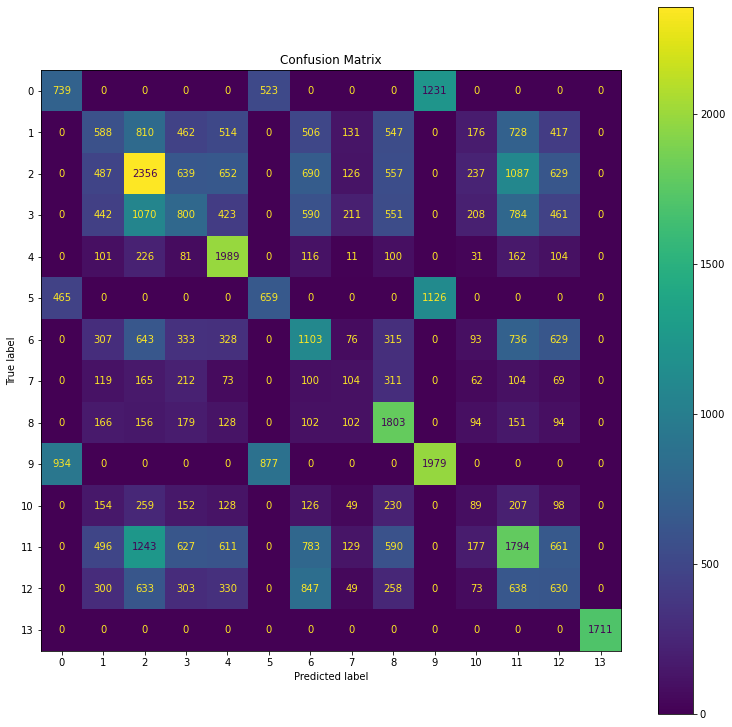

In [34]:
cm2 = confusion_matrix(y_test, CBC_test_pred2);
cmp2 = ConfusionMatrixDisplay(cm2);
fig, ax = plt.subplots(figsize=(13,13));
cmp2.plot(ax=ax);
cmp2.ax_.set_title("Confusion Matrix");

### Classification Report ###

Let's take a look at our classification report test results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .35, a recall score of .30, and an f1 score of .32. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 35% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 30% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .19, a recall score of .12, and an f1 score of .15. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 19% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 12% of them.
* There is an f1 score of .15, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .31, a recall score of .32, and an f1 score of .31. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 31% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 32% of them.
* There is an f1 score of .31, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .21, a recall score of .14, and an f1 score of .17. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 21% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 14% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .38, a recall score of .68, and an f1 score of .49. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 38% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 68% of them.
* There is an f1 score of .49, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .32, a recall score of .29, and an f1 score of .31. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 32% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 29% of them.
* There is an f1 score of .31, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .22, a recall score of .24, and an f1 score of .23. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 22% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 24% of them.
* There is an f1 score of .23, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .11, a recall score of .08, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 11% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .09, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .34, a recall score of .61, and an f1 score of .44. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 34% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 61% of them.
* There is an f1 score of .44, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .46, a recall score of .52, and an f1 score of .49. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 46% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 52% of them.
* There is an f1 score of .49, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .07, a recall score of .06, and an f1 score of .07. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 7% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 6% of them.
* There is an f1 score of .07, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .28, a recall score of .25, and an f1 score of .27. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 28% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 25% of them.
* There is an f1 score of .27, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .17, a recall score of .16, and an f1 score of .16. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 16% of them.
* There is an f1 score of .16, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 739 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,754 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,399 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,673 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 588 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,291 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,572 crimes were wrongly predicted as being "All Other Larceny" crimes
* 45,114 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,356 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 5,104 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,205 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 42,440 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 800 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,740 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,988 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 46,650 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 1,989 crimes were correctly predicted as being "Identity Theft" crimes
* 932 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,187 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,454 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 659 crimes were correctly predicted as being "Intimidation" crimes
* 1,591 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,400 crimes were wrongly predicted as being "Intimidation" crimes
* 49,903 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,103 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,460 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 3,860 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,655 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 104 crimes were correctly predicted as being "Robbery" crimes
* 1,215 crimes were wrongly predicted as not being "Robbery" crimes
* 884 crimes were wrongly predicted as being "Robbery" crimes
* 51,586 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting*** 

* 1,803 crimes were correctly predicted as being "Shoplifting" crimes
* 1,172 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,516 crimes were wrongly predicted as being "Shoplifting" crimes
* 47,366 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 1,979 crimes were correctly predicted as being "Simple Assault" crimes
* 1,811 crimes were wrongly predicted as not being "Simple Assault" crimes
* 2,357 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,583 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 89 crimes were correctly predicted as being "Theft From Building" crimes
* 1,403 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,151 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,918 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,794 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 5,317 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 4,597 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,469 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 630 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,431 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,162 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,932 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

## Seattle Crime Location ##

In [35]:
url = 'https://seattlecitygis.maps.arcgis.com/apps/instant/lookup/index.html?appid=cf1b0198a1b94db5a8152c9f93232fa5'

In [36]:
IFrame(url, width='100%', height=500)

## 1) Beat ##

In [37]:
df_beat = pd.read_csv("seattle_crime_beat.csv")

In [38]:
df_beat

Crime Against Category  Offense  Sector Beat  MCPP  Time  Day  Year
0                            2       44      22   U3    50  1753    6     0
1                            3       13       5   B2     4    77    2     0
2                            3       13      13   L2    43  1609    1     0
3                            2        9       8   E1     8  1715    1     0
4                            2       46      22   U2    58  1288    1     0
...                        ...      ...     ...  ...   ...   ...  ...   ...
104622                       2       33      24   W2     1   191    5     3
104623                       2       33      13   L2    43  1902    1     3
104624                       2       33       5   B1     4  1339    4     2
104625                       2       50      12   K3    11    39    3     2
104626                       1       21       7   D3    53   905    5     1

[104627 rows x 8 columns]

In [39]:
X_location = df_beat.drop("Beat", axis = 1)

#Target Variable
y_location = df_beat["Beat"]

In [40]:
X_location_train, X_location_test, y_location_train, y_location_test = train_test_split(X_location, y_location, random_state = 1)

In [41]:
SS = StandardScaler()
X_location_train = SS.fit_transform(X_location_train)
X_location_test = SS.transform(X_location_test)

In [42]:
sm = SMOTE(random_state = 1)
X_location_train, y_location_train = sm.fit_sample(X_location_train, y_location_train)

### CatBoost Model ###

In [43]:
CBC_beat = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
)

In [44]:
CBC_beat.fit(
    X_location_train, y_location_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.099858
0:	learn: 1.9881132	total: 73.6ms	remaining: 1m 13s
1:	learn: 1.6777520	total: 148ms	remaining: 1m 13s
2:	learn: 1.4383907	total: 225ms	remaining: 1m 14s
3:	learn: 1.2760023	total: 307ms	remaining: 1m 16s
4:	learn: 1.1483839	total: 382ms	remaining: 1m 15s
5:	learn: 1.0530416	total: 460ms	remaining: 1m 16s
6:	learn: 0.9710884	total: 536ms	remaining: 1m 16s
7:	learn: 0.9016932	total: 616ms	remaining: 1m 16s
8:	learn: 0.8435067	total: 694ms	remaining: 1m 16s
9:	learn: 0.7906495	total: 777ms	remaining: 1m 16s
10:	learn: 0.7462587	total: 852ms	remaining: 1m 16s
11:	learn: 0.7074829	total: 927ms	remaining: 1m 16s
12:	learn: 0.6742394	total: 1.01s	remaining: 1m 16s
13:	learn: 0.6439842	total: 1.08s	remaining: 1m 16s
14:	learn: 0.6168474	total: 1.16s	remaining: 1m 16s
15:	learn: 0.5929939	total: 1.24s	remaining: 1m 16s
16:	learn: 0.5714097	total: 1.31s	remaining: 1m 15s
17:	learn: 0.5539011	total: 1.39s	remaining: 1m 15s
18:	learn: 0.5369705	total: 1.47s	remaining

158:	learn: 0.3340024	total: 12.1s	remaining: 1m 4s
159:	learn: 0.3338400	total: 12.2s	remaining: 1m 4s
160:	learn: 0.3337316	total: 12.3s	remaining: 1m 4s
161:	learn: 0.3336209	total: 12.4s	remaining: 1m 4s
162:	learn: 0.3335514	total: 12.4s	remaining: 1m 3s
163:	learn: 0.3334488	total: 12.5s	remaining: 1m 3s
164:	learn: 0.3333452	total: 12.6s	remaining: 1m 3s
165:	learn: 0.3331935	total: 12.7s	remaining: 1m 3s
166:	learn: 0.3330902	total: 12.7s	remaining: 1m 3s
167:	learn: 0.3329071	total: 12.8s	remaining: 1m 3s
168:	learn: 0.3327947	total: 12.9s	remaining: 1m 3s
169:	learn: 0.3327136	total: 13s	remaining: 1m 3s
170:	learn: 0.3326134	total: 13.1s	remaining: 1m 3s
171:	learn: 0.3325203	total: 13.1s	remaining: 1m 3s
172:	learn: 0.3324627	total: 13.2s	remaining: 1m 3s
173:	learn: 0.3323728	total: 13.3s	remaining: 1m 3s
174:	learn: 0.3322601	total: 13.4s	remaining: 1m 2s
175:	learn: 0.3321133	total: 13.4s	remaining: 1m 2s
176:	learn: 0.3320128	total: 13.5s	remaining: 1m 2s
177:	learn: 0.

320:	learn: 0.3225361	total: 24.3s	remaining: 51.5s
321:	learn: 0.3224688	total: 24.4s	remaining: 51.4s
322:	learn: 0.3223617	total: 24.5s	remaining: 51.3s
323:	learn: 0.3223344	total: 24.6s	remaining: 51.2s
324:	learn: 0.3223058	total: 24.6s	remaining: 51.2s
325:	learn: 0.3222297	total: 24.7s	remaining: 51.1s
326:	learn: 0.3221997	total: 24.8s	remaining: 51s
327:	learn: 0.3221579	total: 24.9s	remaining: 50.9s
328:	learn: 0.3221359	total: 24.9s	remaining: 50.8s
329:	learn: 0.3221048	total: 25s	remaining: 50.8s
330:	learn: 0.3220539	total: 25.1s	remaining: 50.7s
331:	learn: 0.3219939	total: 25.2s	remaining: 50.6s
332:	learn: 0.3219505	total: 25.2s	remaining: 50.5s
333:	learn: 0.3219273	total: 25.3s	remaining: 50.5s
334:	learn: 0.3218750	total: 25.4s	remaining: 50.4s
335:	learn: 0.3218440	total: 25.5s	remaining: 50.3s
336:	learn: 0.3217783	total: 25.5s	remaining: 50.2s
337:	learn: 0.3217257	total: 25.6s	remaining: 50.2s
338:	learn: 0.3216776	total: 25.7s	remaining: 50.1s
339:	learn: 0.32

479:	learn: 0.3159601	total: 36.3s	remaining: 39.3s
480:	learn: 0.3159231	total: 36.3s	remaining: 39.2s
481:	learn: 0.3158735	total: 36.4s	remaining: 39.1s
482:	learn: 0.3158303	total: 36.5s	remaining: 39s
483:	learn: 0.3157875	total: 36.6s	remaining: 39s
484:	learn: 0.3157359	total: 36.6s	remaining: 38.9s
485:	learn: 0.3156908	total: 36.7s	remaining: 38.8s
486:	learn: 0.3156478	total: 36.8s	remaining: 38.8s
487:	learn: 0.3156257	total: 36.9s	remaining: 38.7s
488:	learn: 0.3155990	total: 36.9s	remaining: 38.6s
489:	learn: 0.3155643	total: 37s	remaining: 38.5s
490:	learn: 0.3155183	total: 37.1s	remaining: 38.4s
491:	learn: 0.3154915	total: 37.2s	remaining: 38.4s
492:	learn: 0.3154528	total: 37.2s	remaining: 38.3s
493:	learn: 0.3154247	total: 37.3s	remaining: 38.2s
494:	learn: 0.3153997	total: 37.4s	remaining: 38.1s
495:	learn: 0.3153526	total: 37.5s	remaining: 38.1s
496:	learn: 0.3153109	total: 37.5s	remaining: 38s
497:	learn: 0.3152630	total: 37.6s	remaining: 37.9s
498:	learn: 0.315220

640:	learn: 0.3104430	total: 48.5s	remaining: 27.1s
641:	learn: 0.3104183	total: 48.5s	remaining: 27.1s
642:	learn: 0.3103953	total: 48.6s	remaining: 27s
643:	learn: 0.3103619	total: 48.7s	remaining: 26.9s
644:	learn: 0.3103399	total: 48.7s	remaining: 26.8s
645:	learn: 0.3103098	total: 48.8s	remaining: 26.8s
646:	learn: 0.3102889	total: 48.9s	remaining: 26.7s
647:	learn: 0.3102432	total: 49s	remaining: 26.6s
648:	learn: 0.3102160	total: 49s	remaining: 26.5s
649:	learn: 0.3101970	total: 49.1s	remaining: 26.4s
650:	learn: 0.3101693	total: 49.2s	remaining: 26.4s
651:	learn: 0.3101390	total: 49.3s	remaining: 26.3s
652:	learn: 0.3100878	total: 49.3s	remaining: 26.2s
653:	learn: 0.3100673	total: 49.4s	remaining: 26.1s
654:	learn: 0.3100578	total: 49.5s	remaining: 26.1s
655:	learn: 0.3100373	total: 49.6s	remaining: 26s
656:	learn: 0.3100066	total: 49.7s	remaining: 25.9s
657:	learn: 0.3099767	total: 49.7s	remaining: 25.8s
658:	learn: 0.3099498	total: 49.8s	remaining: 25.8s
659:	learn: 0.309882

799:	learn: 0.3060797	total: 1m	remaining: 15.1s
800:	learn: 0.3060591	total: 1m	remaining: 15s
801:	learn: 0.3060316	total: 1m	remaining: 14.9s
802:	learn: 0.3060051	total: 1m	remaining: 14.9s
803:	learn: 0.3059913	total: 1m	remaining: 14.8s
804:	learn: 0.3059724	total: 1m	remaining: 14.7s
805:	learn: 0.3059624	total: 1m	remaining: 14.6s
806:	learn: 0.3059491	total: 1m	remaining: 14.6s
807:	learn: 0.3059188	total: 1m	remaining: 14.5s
808:	learn: 0.3059053	total: 1m 1s	remaining: 14.4s
809:	learn: 0.3058773	total: 1m 1s	remaining: 14.3s
810:	learn: 0.3058592	total: 1m 1s	remaining: 14.3s
811:	learn: 0.3058230	total: 1m 1s	remaining: 14.2s
812:	learn: 0.3057947	total: 1m 1s	remaining: 14.1s
813:	learn: 0.3057455	total: 1m 1s	remaining: 14s
814:	learn: 0.3057148	total: 1m 1s	remaining: 14s
815:	learn: 0.3057006	total: 1m 1s	remaining: 13.9s
816:	learn: 0.3056752	total: 1m 1s	remaining: 13.8s
817:	learn: 0.3056547	total: 1m 1s	remaining: 13.7s
818:	learn: 0.3056358	total: 1m 1s	remaining:

958:	learn: 0.3023510	total: 1m 12s	remaining: 3.09s
959:	learn: 0.3023301	total: 1m 12s	remaining: 3.01s
960:	learn: 0.3023037	total: 1m 12s	remaining: 2.94s
961:	learn: 0.3022688	total: 1m 12s	remaining: 2.86s
962:	learn: 0.3022623	total: 1m 12s	remaining: 2.79s
963:	learn: 0.3022344	total: 1m 12s	remaining: 2.71s
964:	learn: 0.3021985	total: 1m 12s	remaining: 2.64s
965:	learn: 0.3021887	total: 1m 12s	remaining: 2.56s
966:	learn: 0.3021662	total: 1m 12s	remaining: 2.49s
967:	learn: 0.3021593	total: 1m 12s	remaining: 2.41s
968:	learn: 0.3021219	total: 1m 13s	remaining: 2.34s
969:	learn: 0.3020803	total: 1m 13s	remaining: 2.26s
970:	learn: 0.3020644	total: 1m 13s	remaining: 2.19s
971:	learn: 0.3020486	total: 1m 13s	remaining: 2.11s
972:	learn: 0.3020327	total: 1m 13s	remaining: 2.03s
973:	learn: 0.3020141	total: 1m 13s	remaining: 1.96s
974:	learn: 0.3019833	total: 1m 13s	remaining: 1.88s
975:	learn: 0.3019665	total: 1m 13s	remaining: 1.81s
976:	learn: 0.3019473	total: 1m 13s	remaining:

In [45]:
CBC_location_train_pred = CBC_beat.predict(X_location_train)
CBC_location_test_pred = CBC_beat.predict(X_location_test)

In [46]:
print(classification_report(y_location_train, CBC_location_train_pred))

              precision    recall  f1-score   support

          B1       0.73      0.98      0.84      5638
          B2       0.74      0.63      0.68      5638
          B3       0.99      0.80      0.88      5638
          D2       0.82      0.74      0.78      5638
          D3       0.76      0.84      0.80      5638
          E1       0.80      1.00      0.89      5638
          E3       1.00      0.75      0.86      5638
          K3       1.00      1.00      1.00      5638
          L2       1.00      1.00      1.00      5638
          N2       1.00      1.00      1.00      5638
          Q2       0.69      0.77      0.72      5638
          Q3       0.74      0.65      0.69      5638
          R2       1.00      1.00      1.00      5638
          U1       0.68      0.54      0.60      5638
          U2       0.71      0.95      0.81      5638
          U3       0.90      0.78      0.84      5638
          W2       1.00      1.00      1.00      5638

    accuracy              

In [47]:
print(classification_report(y_location_test, CBC_location_test_pred))

              precision    recall  f1-score   support

          B1       0.68      0.95      0.80      1523
          B2       0.68      0.58      0.63      1686
          B3       0.96      0.75      0.84      1586
          D2       0.76      0.66      0.71      1435
          D3       0.68      0.77      0.72      1311
          E1       0.78      0.99      0.87      1415
          E3       0.99      0.71      0.83      1401
          K3       1.00      1.00      1.00      1748
          L2       1.00      1.00      1.00      1604
          N2       1.00      1.00      1.00      1282
          Q2       0.62      0.70      0.66      1497
          Q3       0.66      0.57      0.61      1522
          R2       1.00      1.00      1.00      1601
          U1       0.58      0.48      0.52      1813
          U2       0.63      0.90      0.75      1543
          U3       0.89      0.74      0.81      1911
          W2       1.00      1.00      1.00      1279

    accuracy              

ValueError: The number of FixedLocator locations (17), usually from a call to set_ticks, does not match the number of ticklabels (14).

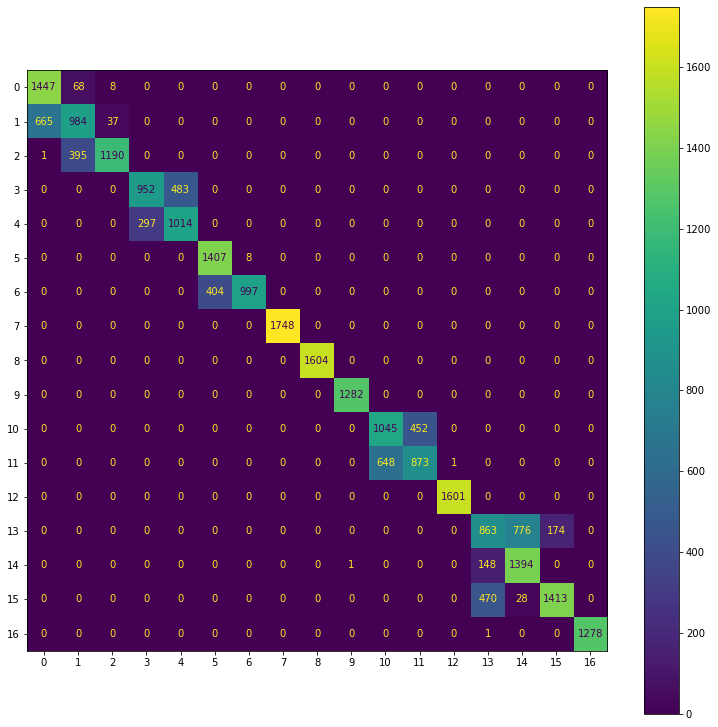

In [48]:
cm = confusion_matrix(y_location_test, CBC_location_test_pred);
cmp = ConfusionMatrixDisplay(cm, display_labels = CBC.classes_);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

In [ ]:
params = {'learning_rate': [0.05, 0.1, 0.5],
          'loss_function': ['MultiClass'],
          'random_state' : [1],
          'depth': [2, 4, 6],
          'iterations': [100, 500, 1000]
         }

In [ ]:
CBC_gs2 = GridSearchCV(CBC_beat, params)
CBC_gs2.fit(X_location_train, y_location_train, early_stopping_rounds=5, plot = True)
CBC_gs2.best_params_

In [ ]:
CBC_beat = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
)

In [ ]:
print ("My program took", time.time() - start_time, "to run")